# Seattle Crime #

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier, Pool, metrics, cv
import time

In [2]:
start_time = time.time()

## Opening Datafile ##

In a separate notebook, we preprocessed our "SPD_Crime_Data" file, and saved it as a new CSV file. We'll now open that file to use for our models.

In [3]:
df = pd.read_csv("preprocessed_data.csv")
df.head()

Crime Against Category                                      Offense  \
0                       2  Theft of Motor Vehicle Parts or Accessories   
1                       2                                      Robbery   
2                       2     Destruction/Damage/Vandalism of Property   
3                       2                                  Shoplifting   
4                       2     Destruction/Damage/Vandalism of Property   

   Sector  Beat  MCPP  Time  Day  Year  
0      11    22    50   661    0     0  
1      22    50    50  1753    6     0  
2      18    39    33   124    2     0  
3      14    29    16  2005    1     0  
4      11    22    44  1753    1     0

In [4]:
# Make a copy of the df for future models
#df2 = df

In [5]:
#df.info()

## Setting Up For Initial Model ##

Let's start off by first identifying our target variable

In [6]:
X = df.drop("Offense", axis = 1)

#Target Variable
y = df["Offense"]

Now we'll split our data using Train Test Split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

We'll scale our data, to make it easier for the model to work with

In [8]:
SS = StandardScaler()
X_train = SS.fit_transform(X_train)
X_test = SS.transform(X_test)

Let's look at the value counts for our dependent variable

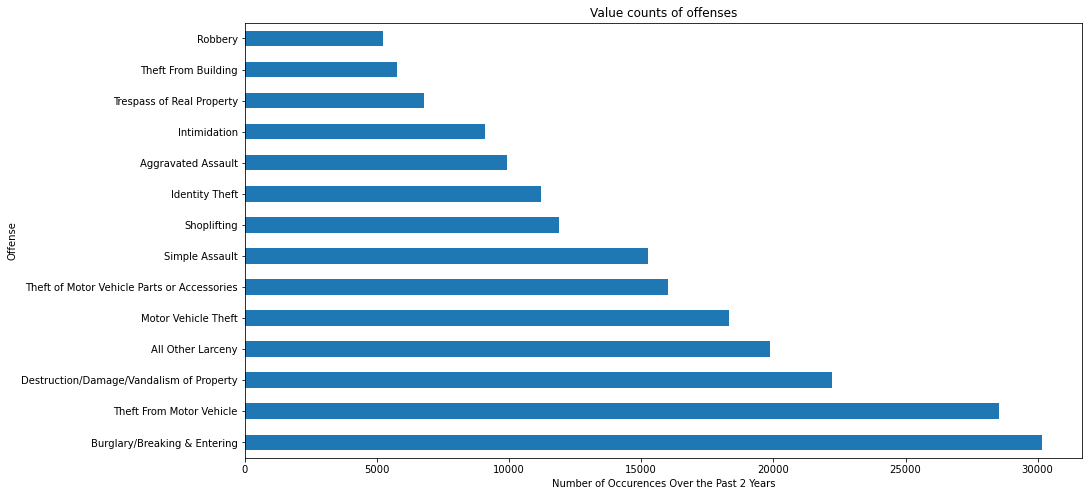

In [9]:
ax = df.value_counts('Offense').plot.barh(figsize = (15,8), title = "Value counts of offenses");
ax.set_xlabel("Number of Occurences Over the Past 2 Years");

We can see that there's an imbalance, so let's use SMOTE to address that

In [10]:
sm = SMOTE(random_state = 1)
X_train, y_train = sm.fit_sample(X_train, y_train)

Now it's time to initialize our model

## Random Forest Model ##

In [11]:
rf = RandomForestClassifier(criterion= "entropy",random_state = 1,  max_depth = 5)

rf.fit(X_train, y_train)
rf_train_pred = rf.predict(X_train)
rf_test_pred = rf.predict(X_test)

In [12]:
print(classification_report(y_train, rf_train_pred))

C:\Users\aleja\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                             precision    recall  f1-score   support

                         Aggravated Assault       0.38      0.61      0.47     22703
                          All Other Larceny       0.00      0.00      0.00     22703
               Burglary/Breaking & Entering       0.19      0.14      0.16     22703
   Destruction/Damage/Vandalism of Property       0.20      0.00      0.00     22703
                             Identity Theft       0.26      0.85      0.39     22703
                               Intimidation       0.47      0.32      0.38     22703
                        Motor Vehicle Theft       0.22      0.06      0.09     22703
                                    Robbery       0.23      0.11      0.15     22703
                                Shoplifting       0.19      0.47      0.27     22703
                             Simple Assault       0.39      0.28      0.33     22703
                        Theft From Building       0.15      0.24

In [13]:
print(classification_report(y_test, rf_test_pred))

                                             precision    recall  f1-score   support

                         Aggravated Assault       0.33      0.57      0.42      2493
                          All Other Larceny       0.00      0.00      0.00      4879
               Burglary/Breaking & Entering       0.30      0.13      0.18      7460
   Destruction/Damage/Vandalism of Property       0.20      0.00      0.00      5540
                             Identity Theft       0.18      0.86      0.29      2921
                               Intimidation       0.37      0.31      0.34      2250
                        Motor Vehicle Theft       0.22      0.06      0.10      4563
                                    Robbery       0.07      0.10      0.08      1319
                                Shoplifting       0.14      0.46      0.22      2975
                             Simple Assault       0.48      0.29      0.36      3790
                        Theft From Building       0.05      0.22

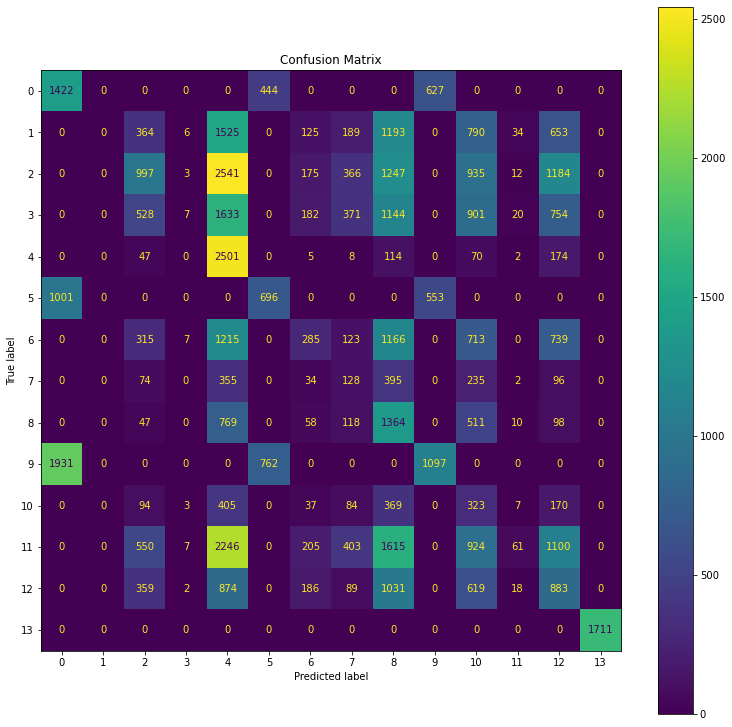

In [14]:
cm = confusion_matrix(y_test, rf_test_pred);
cmp = ConfusionMatrixDisplay(cm);
fig, ax = plt.subplots(figsize=(13,13));
cmp.plot(ax=ax);
cmp.ax_.set_title("Confusion Matrix");

### Crime Key ###

**To make our confusion matrix more readable, we represented the crimes as numeric values. Below is a key that matches the numeric value to the crime**

0) Aggravated Assault

1) All Other Larceny

2) Burglary/Breaking & Entering

3) Destruction/Damage/Vandalism of Property

4) Intimidation

5) Motor Vehicle Theft

6) Shoplifting

7) Simple Assault

8) Theft From Motor Vehicle

9) Theft of Motor Vehicle Parts or Accessories


### Classification Report ###

Let's take a look at our test model classification report results for each crime:

**0) Aggravated Assault**

For our "Aggravated Assault" results, we have a precision score of .36, a recall score of .28, and an f1 score of .32. This means that:


* Out of all the crimes that the model predicted would be Aggravated Assault crimes, 36% were actually Aggravated Assault crimes.
* Out of all the crimes that were Aggravated Assault crimes, the model correctly predicted 28% of them.
* There is an f1 score of .32, indicating poor performance on predicting probability of the crime being an Aggravated Assault crime.

**1) All Other Larceny**

For our "All Other Larceny" results, we have a precision score of .20, a recall score of .10, and an f1 score of .14. This means that:

* Out of all the crimes that the model predicted would be Larceny crimes, 20% were actually Larceny crimes.
* Out of all the crimes that were Larceny crimes, the model correctly predicted 10% of them.
* There is an f1 score of .14, indicating poor performance on predicting probability of the crime being a Larceny crime.

**2) Burglary/Breaking & Entering**

For our "Burglary/Breaking & Entering" results, we have a precision score of .32, a recall score of .33, and an f1 score of .32. This means that:

* Out of all the crimes that the model predicted would be Burglary/Breaking & Entering crimes, 32% were actually Burglary/Breaking & Entering crimes.
* Out of all the crimes that were Burglary/Breaking & Entering crimes, the model correctly predicted 33% of them.
* There is an f1 score of .32, indicating poor performance on predicting probability of the crime being a Burglary/Breaking & Entering crime.

**3) Destruction/Damage/Vandalism of Property**

For our "Destruction/Damage/Vandalism of Property" results, we have a precision score of .22, a recall score of .10, and an f1 score of .14. This means that:

* Out of all the crimes that the model predicted would be Destruction/Damage/Vandalism of Property crimes, 22% were actually Destruction/Damage/Vandalism of Property crimes.
* Out of all the crimes that were Destruction/Damage/Vandalism of Property crimes, the model correctly predicted 10% of them.
* There is an f1 score of .14, indicating poor performance on predicting probability of the crime being a Destruction/Damage/Vandalism of Property crime.

**4) Identity Theft**

For our "Identity Theft" results, we have a precision score of .36, a recall score of .73, and an f1 score of .48. This means that:

* Out of all the crimes that the model predicted would be Identity Theft crimes, 36% were actually Identity Theft crimes.
* Out of all the crimes that were Identity Theft crimes, the model correctly predicted 73% of them.
* There is an f1 score of .48, indicating poor performance on predicting probability of the crime being an Identity Theft crime.

**5) Intimidation**

For our "Intimidation" results, we have a precision score of .35, a recall score of .32, and an f1 score of .33. This means that:

* Out of all the crimes that the model predicted would be Intimidation crimes, 35% were actually Intimidation crimes.
* Out of all the crimes that were Intimidation crimes, the model correctly predicted 32% of them.
* There is an f1 score of .33, indicating poor performance on predicting probability of the crime being an Intimidation crime.

**6) Motor Vehicle Theft**

For our "Motor Vehicle Theft" results, we have a precision score of .24, a recall score of .29, and an f1 score of .26. This means that:

* Out of all the crimes that the model predicted would be Motor Vehicle Theft crimes, 24% were actually Motor Vehicle Theft crimes.
* Out of all the crimes that were Motor Vehicle Theft crimes, the model correctly predicted 29% of them.
* There is an f1 score of .26, indicating poor performance on predicting probability of the crime being a Motor Vehicle Theft crime.

**7) Robbery**

For our "Robbery" results, we have a precision score of .12, a recall score of .08, and an f1 score of .10. This means that:

* Out of all the crimes that the model predicted would be Robbery crimes, 12% were actually Robbery crimes.
* Out of all the crimes that were Robbery crimes, the model correctly predicted 8% of them.
* There is an f1 score of .10, indicating poor performance on predicting probability of the crime being a Robbery crime.

**8) Shoplifting**

For our "Shoplifting" results, we have a precision score of .32, a recall score of .62, and an f1 score of .42. This means that:

* Out of all the crimes that the model predicted would be Shoplifting crimes, 32% were actually Shoplifting crimes.
* Out of all the crimes that were Shoplifting crimes, the model correctly predicted 62% of them.
* There is an f1 score of .42, indicating poor performance on predicting probability of the crime being a Shoplifting crime.

**9) Simple Assault**

For our "Simple Assault" results, we have a precision score of .47, a recall score of .56, and an f1 score of .51. This means that:

* Out of all the crimes that the model predicted would be Simple Assault crimes, 47% were actually Simple Assault crimes.
* Out of all the crimes that were Simple Assault crimes, the model correctly predicted 56% of them.
* There is an f1 score of .51, indicating poor performance on predicting probability of the crime being a Simple Assault crime.

**10) Theft From Building**

For our "Theft From Building" results, we have a precision score of .09, a recall score of .09, and an f1 score of .09. This means that:

* Out of all the crimes that the model predicted would be Theft From Building crimes, 9% were actually Theft From Building crimes.
* Out of all the crimes that were Theft From Building crimes, the model correctly predicted 9% of them.
* There is an f1 score of .09, indicating extremely poor performance on predicting probability of the crime being a Theft From Building crime.

**11) Theft From Motor Vehicle**

For our "Theft From Motor Vehicle" results, we have a precision score of .30, a recall score of .24, and an f1 score of .26. This means that:

* Out of all the crimes that the model predicted would be Theft From Motor Vehicle crimes, 30% were actually Theft From Motor Vehicle crimes.
* Out of all the crimes that were Theft From Motor Vehicle crimes, the model correctly predicted 24% of them.
* There is an f1 score of .26, indicating poor performance on predicting probability of the crime being a Theft From Motor Vehicle crime.

**12) Theft of Motor Vehicle Parts or Accessories**

For our "Theft of Motor Vehicle Parts or Accessories" results, we have a precision score of .17, a recall score of .17, and an f1 score of .17. This means that:

* Out of all the crimes that the model predicted would be Theft of Motor Vehicle Parts or Accessories crimes, 17% were actually Theft of Motor Vehicle Parts or Accessories crimes.
* Out of all the crimes that were Theft of Motor Vehicle Parts or Accessories crimes, the model correctly predicted 17% of them.
* There is an f1 score of .17, indicating poor performance on predicting probability of the crime being a Theft of Motor Vehicle Parts or Accessories crime.

**13) Trespass of Real Property**

For our "Trespass of Real Property" results, we have a precision score of 1.0, a recall score of 1.0, and an f1 score of 1.0. This means that:

* Out of all the crimes that the model predicted would be Trespass of Real Property crimes, 100% were actually Trespass of Real Property crimes.
* Out of all the crimes that were Trespass of Real Property crimes, the model correctly predicted 100% of them.
* There is an f1 score of 1, indicating perfect performance on predicting probability of the crime being a Trespass of Real Property crime.

### Crime Confusion Matrix ###

**0) Aggravated Assault**

* 1422 crimes were correctly predicted as being "Aggravated Assault" crimes
* 1,071 crimes were wrongly predicted as not being "Aggravated Assault" crimes
* 2,932 crimes were wrongly predicted as being "Aggravated Assault" crimes
* 48,851 crimes were correctly predicted as not being "Aggravated Assault" crimes

**1) All Other Larceny**

* 0 crimes were correctly predicted as being "All Other Larceny" crimes
* 4,879 crimes were wrongly predicted as not being "All Other Larceny" crimes
* 0 crimes were wrongly predicted as being "All Other Larceny" crimes
* 47,686 crimes were correctly predicted as not being "All Other Larceny" crimes

**2) Burglary/Breaking & Entering**

* 997 crimes were correctly predicted as being "Burglary/Breaking & Entering" crimes
* 6,463 crimes were wrongly predicted as not being "Burglary/Breaking & Entering" crimes
* 2,378 crimes were wrongly predicted as being "Burglary/Breaking & Entering" crimes
* 43,091 crimes were correctly predicted as not being "Burglary/Breaking & Entering" crimes

**3) Destruction/Damage/Vandalism of Property**

* 7 crimes were correctly predicted as being "Destruction/Damage/Vandalism of Property" crimes
* 5,533 crimes were wrongly predicted as not being "Destruction/Damage/Vandalism of Property" crimes
* 28 crimes were wrongly predicted as being "Destruction/Damage/Vandalism of Property" crimes
* 47,525 crimes were correctly predicted as not being "Destruction/Damage/Vandalism of Property" crimes

**4) Identity Theft**

* 2,501 crimes were correctly predicted as being "Identity Theft" crimes
* 420 crimes were wrongly predicted as not being "Identity Theft" crimes
* 11,563 crimes were wrongly predicted as being "Identity Theft" crimes
* 44,701 crimes were correctly predicted as not being "Identity Theft" crimes

**5) Intimidation**

* 696 crimes were correctly predicted as being "Intimidation" crimes
* 1,554 crimes were wrongly predicted as not being "Intimidation" crimes
* 1,206 crimes were wrongly predicted as being "Intimidation" crimes
* 50,554 crimes were correctly predicted as not being "Intimidation" crimes

**6) Motor Vehicle Theft**

* 285 crimes were correctly predicted as being "Motor Vehicle Theft" crimes
* 4,278 crimes were wrongly predicted as not being "Motor Vehicle Theft" crimes
* 1,007 crimes were wrongly predicted as being "Motor Vehicle Theft" crimes
* 49,056 crimes were correctly predicted as not being "Motor Vehicle Theft" crimes

**7) Robbery**

* 128 crimes were correctly predicted as being "Robbery" crimes
* 1,191 crimes were wrongly predicted as not being "Robbery" crimes
* 1,751 crimes were wrongly predicted as being "Robbery" crimes
* 51,015 crimes were correctly predicted as not being "Robbery" crimes

**8) Shoplifting**

* 1,364 crimes were correctly predicted as being "Shoplifting" crimes
* 1,611 crimes were wrongly predicted as not being "Shoplifting" crimes
* 8,274 crimes were wrongly predicted as being "Shoplifting" crimes
* 47,567 crimes were correctly predicted as not being "Shoplifting" crimes

**9) Simple Assault**

* 1,097 crimes were correctly predicted as being "Simple Assault" crimes
* 2,693 crimes were wrongly predicted as not being "Simple Assault" crimes
* 1,180 crimes were wrongly predicted as being "Simple Assault" crimes
* 51,465 crimes were correctly predicted as not being "Simple Assault" crimes

**10) Theft From Building**

* 323 crimes were correctly predicted as being "Theft From Building" crimes
* 1,169 crimes were wrongly predicted as not being "Theft From Building" crimes
* 5,698 crimes were wrongly predicted as being "Theft From Building" crimes
* 50,519 crimes were correctly predicted as not being "Theft From Building" crimes

**11) Theft From Motor Vehicle**

* 61 crimes were correctly predicted as being "Theft From Motor Vehicle" crimes
* 7,050 crimes were wrongly predicted as not being "Theft From Motor Vehicle" crimes
* 105 crimes were wrongly predicted as being "Theft From Motor Vehicle" crimes
* 51,383 crimes were correctly predicted as not being "Theft From Motor Vehicle" crimes

**12) Theft of Motor Vehicle Parts or Accessories**

* 883 crimes were correctly predicted as being "Theft of Motor Vehicle Parts or Accessories" crimes
* 3,178 crimes were wrongly predicted as not being "Theft of Motor Vehicle Parts or Accessories" crimes
* 4,968 crimes were wrongly predicted as being "Theft of Motor Vehicle Parts or Accessories" crimes
* 51,679 crimes were correctly predicted as not being "Theft of Motor Vehicle Parts or Accessories" crimes

**13) Trespass of Real Property**

* 1,711 crimes were correctly predicted as being "Trespass of Real Property" crimes
* 0 crimes were wrongly predicted as not being "Trespass of Real Property" crimes
* 0 crimes were wrongly predicted as being "Trespass of Real Property" crimes
* 50,851 crimes were correctly predicted as not being "Trespass of Real Property" crimes

## Random Forest Tuning ##

In [15]:
rf2 = RandomForestClassifier()

param_grid = {
    'criterion': ['entropy'],
    'random_state': [1],
    'max_depth': [1, 3, 5],
    'min_samples_split': [0.2, 0.3, 0.4 ],
    'min_samples_leaf': [0.1, 0.2, 0.3]
}


gs_rf = GridSearchCV(rf2, param_grid)
gs_rf.fit(X_train, y_train)
gs_rf.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'min_samples_leaf': 0.1,
 'min_samples_split': 0.3,
 'random_state': 1}

In [16]:
rf2 = RandomForestClassifier(criterion= "entropy",random_state = 1,  max_depth = 3, min_samples_leaf = 0.1, min_samples_split = 0.3)

rf2.fit(X_train, y_train)
rf_train_pred2 = rf2.predict(X_train)
rf_test_pred2 = rf2.predict(X_test)

In [17]:
rf_train_pred2 = rf2.predict(X_train)
rf_test_pred2 = rf2.predict(X_test)

In [18]:
print(classification_report(y_train, rf_train_pred2))

C:\Users\aleja\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                             precision    recall  f1-score   support

                         Aggravated Assault       0.36      0.60      0.45     22703
                          All Other Larceny       0.00      0.00      0.00     22703
               Burglary/Breaking & Entering       0.15      0.20      0.17     22703
   Destruction/Damage/Vandalism of Property       0.00      0.00      0.00     22703
                             Identity Theft       0.22      0.85      0.35     22703
                               Intimidation       0.39      0.30      0.34     22703
                        Motor Vehicle Theft       0.16      0.07      0.10     22703
                                    Robbery       0.13      0.06      0.08     22703
                                Shoplifting       0.17      0.44      0.25     22703
                             Simple Assault       0.36      0.21      0.27     22703
                        Theft From Building       0.16      0.12

In [19]:
print(classification_report(y_test, rf_test_pred2))

                                             precision    recall  f1-score   support

                         Aggravated Assault       0.31      0.58      0.41      2493
                          All Other Larceny       0.00      0.00      0.00      4879
               Burglary/Breaking & Entering       0.24      0.19      0.22      7460
   Destruction/Damage/Vandalism of Property       0.00      0.00      0.00      5540
                             Identity Theft       0.17      0.85      0.28      2921
                               Intimidation       0.30      0.29      0.29      2250
                        Motor Vehicle Theft       0.17      0.07      0.10      4563
                                    Robbery       0.04      0.06      0.05      1319
                                Shoplifting       0.13      0.44      0.20      2975
                             Simple Assault       0.47      0.21      0.29      3790
                        Theft From Building       0.06      0.11

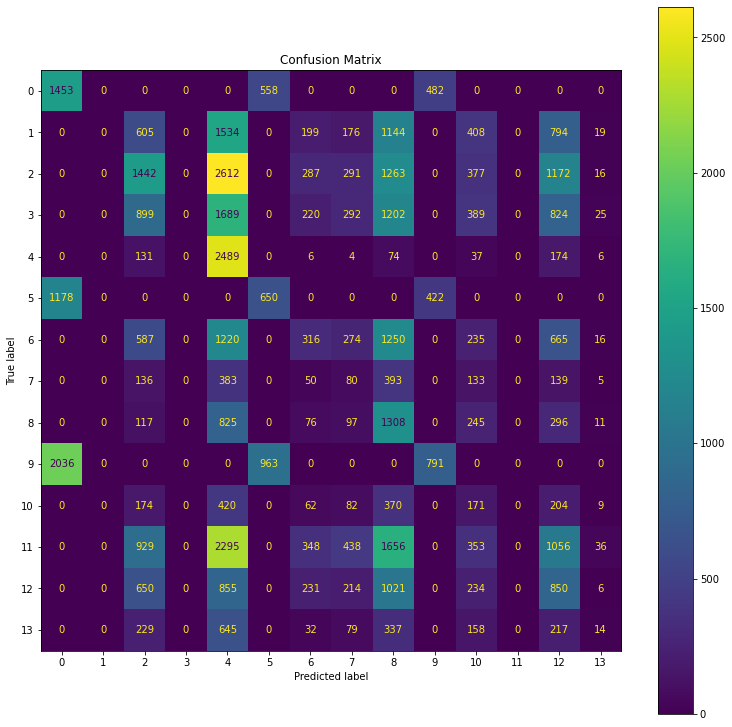

In [20]:
cm2 = confusion_matrix(y_test, rf_test_pred2);
cmp2 = ConfusionMatrixDisplay(cm2);
fig, ax = plt.subplots(figsize=(13,13));
cmp2.plot(ax=ax);
cmp2.ax_.set_title("Confusion Matrix");

### Crime Key ###

**To make our confusion matrix more readable, we represented the crimes as numeric values. Below is a key that matches the numeric value to the crime**

0) Aggravated Assault

1) All Other Larceny

2) Burglary/Breaking & Entering

3) Destruction/Damage/Vandalism of Property

4) Intimidation

5) Motor Vehicle Theft

6) Shoplifting

7) Simple Assault

8) Theft From Motor Vehicle

9) Theft of Motor Vehicle Parts or Accessories


### Classification Report ###

Let's take a look at our test model classification report results for each crime:

**0) Aggravated Assault**

For our "Aggravated Assault" results, we have a precision score of .36, a recall score of .28, and an f1 score of .32. This means that:


* Out of all the crimes that the model predicted would be Aggravated Assault crimes, 36% were actually Aggravated Assault crimes.
* Out of all the crimes that were Aggravated Assault crimes, the model correctly predicted 28% of them.
* There is an f1 score of .32, indicating poor performance on predicting probability of the crime being an Aggravated Assault crime.

**1) All Other Larceny**

For our "All Other Larceny" results, we have a precision score of .20, a recall score of .10, and an f1 score of .14. This means that:

* Out of all the crimes that the model predicted would be Larceny crimes, 20% were actually Larceny crimes.
* Out of all the crimes that were Larceny crimes, the model correctly predicted 10% of them.
* There is an f1 score of .14, indicating poor performance on predicting probability of the crime being a Larceny crime.

**2) Burglary/Breaking & Entering**

For our "Burglary/Breaking & Entering" results, we have a precision score of .32, a recall score of .33, and an f1 score of .32. This means that:

* Out of all the crimes that the model predicted would be Burglary/Breaking & Entering crimes, 32% were actually Burglary/Breaking & Entering crimes.
* Out of all the crimes that were Burglary/Breaking & Entering crimes, the model correctly predicted 33% of them.
* There is an f1 score of .32, indicating poor performance on predicting probability of the crime being a Burglary/Breaking & Entering crime.

**3) Destruction/Damage/Vandalism of Property**

For our "Destruction/Damage/Vandalism of Property" results, we have a precision score of .22, a recall score of .10, and an f1 score of .14. This means that:

* Out of all the crimes that the model predicted would be Destruction/Damage/Vandalism of Property crimes, 22% were actually Destruction/Damage/Vandalism of Property crimes.
* Out of all the crimes that were Destruction/Damage/Vandalism of Property crimes, the model correctly predicted 10% of them.
* There is an f1 score of .14, indicating poor performance on predicting probability of the crime being a Destruction/Damage/Vandalism of Property crime.

**4) Identity Theft**

For our "Identity Theft" results, we have a precision score of .36, a recall score of .73, and an f1 score of .48. This means that:

* Out of all the crimes that the model predicted would be Identity Theft crimes, 36% were actually Identity Theft crimes.
* Out of all the crimes that were Identity Theft crimes, the model correctly predicted 73% of them.
* There is an f1 score of .48, indicating poor performance on predicting probability of the crime being an Identity Theft crime.

**5) Intimidation**

For our "Intimidation" results, we have a precision score of .35, a recall score of .32, and an f1 score of .33. This means that:

* Out of all the crimes that the model predicted would be Intimidation crimes, 35% were actually Intimidation crimes.
* Out of all the crimes that were Intimidation crimes, the model correctly predicted 32% of them.
* There is an f1 score of .33, indicating poor performance on predicting probability of the crime being an Intimidation crime.

**6) Motor Vehicle Theft**

For our "Motor Vehicle Theft" results, we have a precision score of .24, a recall score of .29, and an f1 score of .26. This means that:

* Out of all the crimes that the model predicted would be Motor Vehicle Theft crimes, 24% were actually Motor Vehicle Theft crimes.
* Out of all the crimes that were Motor Vehicle Theft crimes, the model correctly predicted 29% of them.
* There is an f1 score of .26, indicating poor performance on predicting probability of the crime being a Motor Vehicle Theft crime.

**7) Robbery**

For our "Robbery" results, we have a precision score of .12, a recall score of .08, and an f1 score of .10. This means that:

* Out of all the crimes that the model predicted would be Robbery crimes, 12% were actually Robbery crimes.
* Out of all the crimes that were Robbery crimes, the model correctly predicted 8% of them.
* There is an f1 score of .10, indicating poor performance on predicting probability of the crime being a Robbery crime.

**8) Shoplifting**

For our "Shoplifting" results, we have a precision score of .32, a recall score of .62, and an f1 score of .42. This means that:

* Out of all the crimes that the model predicted would be Shoplifting crimes, 32% were actually Shoplifting crimes.
* Out of all the crimes that were Shoplifting crimes, the model correctly predicted 62% of them.
* There is an f1 score of .42, indicating poor performance on predicting probability of the crime being a Shoplifting crime.

**9) Simple Assault**

For our "Simple Assault" results, we have a precision score of .47, a recall score of .56, and an f1 score of .51. This means that:

* Out of all the crimes that the model predicted would be Simple Assault crimes, 47% were actually Simple Assault crimes.
* Out of all the crimes that were Simple Assault crimes, the model correctly predicted 56% of them.
* There is an f1 score of .51, indicating poor performance on predicting probability of the crime being a Simple Assault crime.

**10) Theft From Building**

For our "Theft From Building" results, we have a precision score of .09, a recall score of .09, and an f1 score of .09. This means that:

* Out of all the crimes that the model predicted would be Theft From Building crimes, 9% were actually Theft From Building crimes.
* Out of all the crimes that were Theft From Building crimes, the model correctly predicted 9% of them.
* There is an f1 score of .09, indicating extremely poor performance on predicting probability of the crime being a Theft From Building crime.

**11) Theft From Motor Vehicle**

For our "Theft From Motor Vehicle" results, we have a precision score of .30, a recall score of .24, and an f1 score of .26. This means that:

* Out of all the crimes that the model predicted would be Theft From Motor Vehicle crimes, 30% were actually Theft From Motor Vehicle crimes.
* Out of all the crimes that were Theft From Motor Vehicle crimes, the model correctly predicted 24% of them.
* There is an f1 score of .26, indicating poor performance on predicting probability of the crime being a Theft From Motor Vehicle crime.

**12) Theft of Motor Vehicle Parts or Accessories**

For our "Theft of Motor Vehicle Parts or Accessories" results, we have a precision score of .17, a recall score of .17, and an f1 score of .17. This means that:

* Out of all the crimes that the model predicted would be Theft of Motor Vehicle Parts or Accessories crimes, 17% were actually Theft of Motor Vehicle Parts or Accessories crimes.
* Out of all the crimes that were Theft of Motor Vehicle Parts or Accessories crimes, the model correctly predicted 17% of them.
* There is an f1 score of .17, indicating poor performance on predicting probability of the crime being a Theft of Motor Vehicle Parts or Accessories crime.

**13) Trespass of Real Property**

For our "Trespass of Real Property" results, we have a precision score of 1.0, a recall score of 1.0, and an f1 score of 1.0. This means that:

* Out of all the crimes that the model predicted would be Trespass of Real Property crimes, 100% were actually Trespass of Real Property crimes.
* Out of all the crimes that were Trespass of Real Property crimes, the model correctly predicted 100% of them.
* There is an f1 score of 1, indicating perfect performance on predicting probability of the crime being a Trespass of Real Property crime.

### Crime Confusion Matrix ###

**0) Aggravated Assault**

* 1,453 crimes were correctly predicted as being "Aggravated Assault" crimes
* 1,040 crimes were wrongly predicted as not being "Aggravated Assault" crimes
* 3,214 crimes were wrongly predicted as being "Aggravated Assault" crimes
* 46,858 crimes were correctly predicted as not being "Aggravated Assault" crimes

**1) All Other Larceny**

* 0 crimes were correctly predicted as being "All Other Larceny" crimes
* 4,879 crimes were wrongly predicted as not being "All Other Larceny" crimes
* 0 crimes were wrongly predicted as being "All Other Larceny" crimes
* 47,686 crimes were correctly predicted as not being "All Other Larceny" crimes

**2) Burglary/Breaking & Entering**

* 1,442 crimes were correctly predicted as being "Burglary/Breaking & Entering" crimes
* 6,018 crimes were wrongly predicted as not being "Burglary/Breaking & Entering" crimes
* 4,457 crimes were wrongly predicted as being "Burglary/Breaking & Entering" crimes
* 41,253 crimes were correctly predicted as not being "Burglary/Breaking & Entering" crimes

**3) Destruction/Damage/Vandalism of Property**

* 0 crimes were correctly predicted as being "Destruction/Damage/Vandalism of Property" crimes
* 5,540 crimes were wrongly predicted as not being "Destruction/Damage/Vandalism of Property" crimes
* 0 crimes were wrongly predicted as being "Destruction/Damage/Vandalism of Property" crimes
* 47,924 crimes were correctly predicted as not being "Destruction/Damage/Vandalism of Property" crimes

**4) Identity Theft**

* 2,489 crimes were correctly predicted as being "Identity Theft" crimes
* 432 crimes were wrongly predicted as not being "Identity Theft" crimes
* 12,478 crimes were wrongly predicted as being "Identity Theft" crimes
* 43,132 crimes were correctly predicted as not being "Identity Theft" crimes

**5) Intimidation**

* 650 crimes were correctly predicted as being "Intimidation" crimes
* 1,600 crimes were wrongly predicted as not being "Intimidation" crimes
* 1,521 crimes were wrongly predicted as being "Intimidation" crimes
* 50,530 crimes were correctly predicted as not being "Intimidation" crimes

**6) Motor Vehicle Theft**

* 316 crimes were correctly predicted as being "Motor Vehicle Theft" crimes
* 4,247 crimes were wrongly predicted as not being "Motor Vehicle Theft" crimes
* 1,511 crimes were wrongly predicted as being "Motor Vehicle Theft" crimes
* 49,010 crimes were correctly predicted as not being "Motor Vehicle Theft" crimes

**7) Robbery**

* 80 crimes were correctly predicted as being "Robbery" crimes
* 1,239 crimes were wrongly predicted as not being "Robbery" crimes
* 1,947 crimes were wrongly predicted as being "Robbery" crimes
* 50,905 crimes were correctly predicted as not being "Robbery" crimes

**8) Shoplifting**

* 1,308 crimes were correctly predicted as being "Shoplifting" crimes
* 1,611 crimes were wrongly predicted as not being "Shoplifting" crimes
* 8,274 crimes were wrongly predicted as being "Shoplifting" crimes
* 66,801 crimes were correctly predicted as not being "Shoplifting" crimes

**9) Simple Assault**

* 791 crimes were correctly predicted as being "Simple Assault" crimes
* 2,999 crimes were wrongly predicted as not being "Simple Assault" crimes
* 904 crimes were wrongly predicted as being "Simple Assault" crimes
* 51,771 crimes were correctly predicted as not being "Simple Assault" crimes

**10) Theft From Building**

* 171 crimes were correctly predicted as being "Theft From Building" crimes
* 1,312 crimes were wrongly predicted as not being "Theft From Building" crimes
* 2,569 crimes were wrongly predicted as being "Theft From Building" crimes
* 51,433 crimes were correctly predicted as not being "Theft From Building" crimes

**11) Theft From Motor Vehicle**

* 0 crimes were correctly predicted as being "Theft From Motor Vehicle" crimes
* 7,111 crimes were wrongly predicted as not being "Theft From Motor Vehicle" crimes
* 0 crimes were wrongly predicted as being "Theft From Motor Vehicle" crimes
* 51,470 crimes were correctly predicted as not being "Theft From Motor Vehicle" crimes

**12) Theft of Motor Vehicle Parts or Accessories**

* 850 crimes were correctly predicted as being "Theft of Motor Vehicle Parts or Accessories" crimes
* 3,211 crimes were wrongly predicted as not being "Theft of Motor Vehicle Parts or Accessories" crimes
* 5,541 crimes were wrongly predicted as being "Theft of Motor Vehicle Parts or Accessories" crimes
* 51,489 crimes were correctly predicted as not being "Theft of Motor Vehicle Parts or Accessories" crimes

**13) Trespass of Real Property**

* 14 crimes were correctly predicted as being "Trespass of Real Property" crimes
* 1,697 crimes were wrongly predicted as not being "Trespass of Real Property" crimes
* 149 crimes were wrongly predicted as being "Trespass of Real Property" crimes
* 50,854 crimes were correctly predicted as not being "Trespass of Real Property" crimes

## CatBoost Model ##

In [21]:
CBC = CatBoostClassifier(
    random_state = 1,
    loss_function = 'MultiClass',
)

In [22]:
CBC.fit(
    X_train, y_train,
    early_stopping_rounds=5,
    plot = True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.106154
0:	learn: 2.4152795	total: 351ms	remaining: 5m 50s
1:	learn: 2.2999611	total: 552ms	remaining: 4m 35s
2:	learn: 2.2194601	total: 753ms	remaining: 4m 10s
3:	learn: 2.1546015	total: 959ms	remaining: 3m 58s
4:	learn: 2.1023865	total: 1.16s	remaining: 3m 50s
5:	learn: 2.0583486	total: 1.35s	remaining: 3m 44s
6:	learn: 2.0212087	total: 1.56s	remaining: 3m 40s
7:	learn: 1.9898034	total: 1.76s	remaining: 3m 38s
8:	learn: 1.9629609	total: 1.96s	remaining: 3m 35s
9:	learn: 1.9385266	total: 2.15s	remaining: 3m 33s
10:	learn: 1.9170486	total: 2.35s	remaining: 3m 31s
11:	learn: 1.8977704	total: 2.54s	remaining: 3m 29s
12:	learn: 1.8810050	total: 2.74s	remaining: 3m 27s
13:	learn: 1.8659622	total: 2.94s	remaining: 3m 26s
14:	learn: 1.8528057	total: 3.14s	remaining: 3m 26s
15:	learn: 1.8413095	total: 3.34s	remaining: 3m 25s
16:	learn: 1.8304887	total: 3.53s	remaining: 3m 24s
17:	learn: 1.8207193	total: 3.73s	remaining: 3m 23s
18:	learn: 1.8118833	total: 3.93s	remaining:

159:	learn: 1.6246682	total: 31.1s	remaining: 2m 43s
160:	learn: 1.6240814	total: 31.3s	remaining: 2m 43s
161:	learn: 1.6234912	total: 31.5s	remaining: 2m 43s
162:	learn: 1.6227072	total: 31.7s	remaining: 2m 42s
163:	learn: 1.6221519	total: 31.9s	remaining: 2m 42s
164:	learn: 1.6218260	total: 32.1s	remaining: 2m 42s
165:	learn: 1.6211820	total: 32.3s	remaining: 2m 42s
166:	learn: 1.6204335	total: 32.5s	remaining: 2m 42s
167:	learn: 1.6199455	total: 32.7s	remaining: 2m 41s
168:	learn: 1.6193922	total: 32.9s	remaining: 2m 41s
169:	learn: 1.6187407	total: 33.1s	remaining: 2m 41s
170:	learn: 1.6180585	total: 33.3s	remaining: 2m 41s
171:	learn: 1.6176398	total: 33.5s	remaining: 2m 41s
172:	learn: 1.6170568	total: 33.7s	remaining: 2m 40s
173:	learn: 1.6165132	total: 33.9s	remaining: 2m 40s
174:	learn: 1.6159495	total: 34.1s	remaining: 2m 40s
175:	learn: 1.6153028	total: 34.3s	remaining: 2m 40s
176:	learn: 1.6146298	total: 34.5s	remaining: 2m 40s
177:	learn: 1.6140325	total: 34.6s	remaining: 

315:	learn: 1.5647062	total: 1m 1s	remaining: 2m 12s
316:	learn: 1.5645829	total: 1m 1s	remaining: 2m 12s
317:	learn: 1.5642024	total: 1m 1s	remaining: 2m 12s
318:	learn: 1.5640665	total: 1m 1s	remaining: 2m 12s
319:	learn: 1.5637100	total: 1m 2s	remaining: 2m 12s
320:	learn: 1.5633905	total: 1m 2s	remaining: 2m 11s
321:	learn: 1.5631116	total: 1m 2s	remaining: 2m 11s
322:	learn: 1.5627410	total: 1m 2s	remaining: 2m 11s
323:	learn: 1.5624283	total: 1m 2s	remaining: 2m 11s
324:	learn: 1.5621756	total: 1m 3s	remaining: 2m 11s
325:	learn: 1.5618323	total: 1m 3s	remaining: 2m 10s
326:	learn: 1.5616583	total: 1m 3s	remaining: 2m 10s
327:	learn: 1.5613896	total: 1m 3s	remaining: 2m 10s
328:	learn: 1.5609458	total: 1m 3s	remaining: 2m 10s
329:	learn: 1.5606630	total: 1m 4s	remaining: 2m 10s
330:	learn: 1.5603782	total: 1m 4s	remaining: 2m 9s
331:	learn: 1.5601729	total: 1m 4s	remaining: 2m 9s
332:	learn: 1.5598859	total: 1m 4s	remaining: 2m 9s
333:	learn: 1.5595414	total: 1m 4s	remaining: 2m 

469:	learn: 1.5302180	total: 1m 31s	remaining: 1m 43s
470:	learn: 1.5299901	total: 1m 31s	remaining: 1m 42s
471:	learn: 1.5297455	total: 1m 31s	remaining: 1m 42s
472:	learn: 1.5295825	total: 1m 31s	remaining: 1m 42s
473:	learn: 1.5294413	total: 1m 32s	remaining: 1m 42s
474:	learn: 1.5292287	total: 1m 32s	remaining: 1m 42s
475:	learn: 1.5289551	total: 1m 32s	remaining: 1m 41s
476:	learn: 1.5286701	total: 1m 32s	remaining: 1m 41s
477:	learn: 1.5285735	total: 1m 32s	remaining: 1m 41s
478:	learn: 1.5283585	total: 1m 33s	remaining: 1m 41s
479:	learn: 1.5281016	total: 1m 33s	remaining: 1m 41s
480:	learn: 1.5279492	total: 1m 33s	remaining: 1m 40s
481:	learn: 1.5278739	total: 1m 33s	remaining: 1m 40s
482:	learn: 1.5277657	total: 1m 33s	remaining: 1m 40s
483:	learn: 1.5276349	total: 1m 34s	remaining: 1m 40s
484:	learn: 1.5274693	total: 1m 34s	remaining: 1m 40s
485:	learn: 1.5272937	total: 1m 34s	remaining: 1m 39s
486:	learn: 1.5271195	total: 1m 34s	remaining: 1m 39s
487:	learn: 1.5268984	total:

622:	learn: 1.5058894	total: 2m 1s	remaining: 1m 13s
623:	learn: 1.5057118	total: 2m 1s	remaining: 1m 13s
624:	learn: 1.5056597	total: 2m 1s	remaining: 1m 12s
625:	learn: 1.5055096	total: 2m 1s	remaining: 1m 12s
626:	learn: 1.5053330	total: 2m 1s	remaining: 1m 12s
627:	learn: 1.5051102	total: 2m 2s	remaining: 1m 12s
628:	learn: 1.5049670	total: 2m 2s	remaining: 1m 12s
629:	learn: 1.5048555	total: 2m 2s	remaining: 1m 11s
630:	learn: 1.5047674	total: 2m 2s	remaining: 1m 11s
631:	learn: 1.5045301	total: 2m 2s	remaining: 1m 11s
632:	learn: 1.5044772	total: 2m 3s	remaining: 1m 11s
633:	learn: 1.5043542	total: 2m 3s	remaining: 1m 11s
634:	learn: 1.5042600	total: 2m 3s	remaining: 1m 11s
635:	learn: 1.5040910	total: 2m 3s	remaining: 1m 10s
636:	learn: 1.5039614	total: 2m 3s	remaining: 1m 10s
637:	learn: 1.5037723	total: 2m 4s	remaining: 1m 10s
638:	learn: 1.5036974	total: 2m 4s	remaining: 1m 10s
639:	learn: 1.5035726	total: 2m 4s	remaining: 1m 10s
640:	learn: 1.5034069	total: 2m 4s	remaining: 

778:	learn: 1.4852877	total: 2m 31s	remaining: 43.1s
779:	learn: 1.4851963	total: 2m 31s	remaining: 42.9s
780:	learn: 1.4849726	total: 2m 32s	remaining: 42.7s
781:	learn: 1.4849048	total: 2m 32s	remaining: 42.5s
782:	learn: 1.4848062	total: 2m 32s	remaining: 42.3s
783:	learn: 1.4847028	total: 2m 32s	remaining: 42.1s
784:	learn: 1.4846536	total: 2m 32s	remaining: 41.9s
785:	learn: 1.4843678	total: 2m 33s	remaining: 41.7s
786:	learn: 1.4842474	total: 2m 33s	remaining: 41.5s
787:	learn: 1.4841990	total: 2m 33s	remaining: 41.3s
788:	learn: 1.4840352	total: 2m 33s	remaining: 41.1s
789:	learn: 1.4838728	total: 2m 33s	remaining: 40.9s
790:	learn: 1.4837988	total: 2m 34s	remaining: 40.7s
791:	learn: 1.4836912	total: 2m 34s	remaining: 40.5s
792:	learn: 1.4835674	total: 2m 34s	remaining: 40.3s
793:	learn: 1.4834131	total: 2m 34s	remaining: 40.1s
794:	learn: 1.4832386	total: 2m 34s	remaining: 39.9s
795:	learn: 1.4831564	total: 2m 35s	remaining: 39.7s
796:	learn: 1.4830032	total: 2m 35s	remaining:

934:	learn: 1.4688580	total: 3m 2s	remaining: 12.7s
935:	learn: 1.4688009	total: 3m 2s	remaining: 12.5s
936:	learn: 1.4687425	total: 3m 2s	remaining: 12.3s
937:	learn: 1.4686443	total: 3m 3s	remaining: 12.1s
938:	learn: 1.4685779	total: 3m 3s	remaining: 11.9s
939:	learn: 1.4685203	total: 3m 3s	remaining: 11.7s
940:	learn: 1.4683926	total: 3m 3s	remaining: 11.5s
941:	learn: 1.4682419	total: 3m 3s	remaining: 11.3s
942:	learn: 1.4681218	total: 3m 4s	remaining: 11.1s
943:	learn: 1.4680295	total: 3m 4s	remaining: 10.9s
944:	learn: 1.4679649	total: 3m 4s	remaining: 10.7s
945:	learn: 1.4678936	total: 3m 4s	remaining: 10.5s
946:	learn: 1.4678353	total: 3m 4s	remaining: 10.3s
947:	learn: 1.4677239	total: 3m 5s	remaining: 10.2s
948:	learn: 1.4676501	total: 3m 5s	remaining: 9.96s
949:	learn: 1.4675029	total: 3m 5s	remaining: 9.76s
950:	learn: 1.4672623	total: 3m 5s	remaining: 9.57s
951:	learn: 1.4671748	total: 3m 5s	remaining: 9.37s
952:	learn: 1.4670202	total: 3m 6s	remaining: 9.18s
953:	learn: 

In [23]:
CBC_train_pred = CBC.predict(X_train)
CBC_test_pred = CBC.predict(X_test)

In [24]:
print(classification_report(y_train, CBC_train_pred))

                                             precision    recall  f1-score   support

                         Aggravated Assault       0.54      0.50      0.52     22703
                          All Other Larceny       0.27      0.13      0.17     22703
               Burglary/Breaking & Entering       0.31      0.35      0.33     22703
   Destruction/Damage/Vandalism of Property       0.28      0.13      0.18     22703
                             Identity Theft       0.51      0.76      0.61     22703
                               Intimidation       0.55      0.58      0.56     22703
                        Motor Vehicle Theft       0.31      0.28      0.29     22703
                                    Robbery       0.44      0.49      0.46     22703
                                Shoplifting       0.43      0.66      0.52     22703
                             Simple Assault       0.52      0.53      0.52     22703
                        Theft From Building       0.40      0.45

In [25]:
print(classification_report(y_test, CBC_test_pred))

                                             precision    recall  f1-score   support

                         Aggravated Assault       0.36      0.28      0.32      2493
                          All Other Larceny       0.20      0.10      0.14      4879
               Burglary/Breaking & Entering       0.32      0.33      0.32      7460
   Destruction/Damage/Vandalism of Property       0.22      0.10      0.14      5540
                             Identity Theft       0.36      0.73      0.48      2921
                               Intimidation       0.35      0.32      0.33      2250
                        Motor Vehicle Theft       0.24      0.29      0.26      4563
                                    Robbery       0.12      0.08      0.10      1319
                                Shoplifting       0.32      0.62      0.42      2975
                             Simple Assault       0.47      0.56      0.51      3790
                        Theft From Building       0.09      0.09

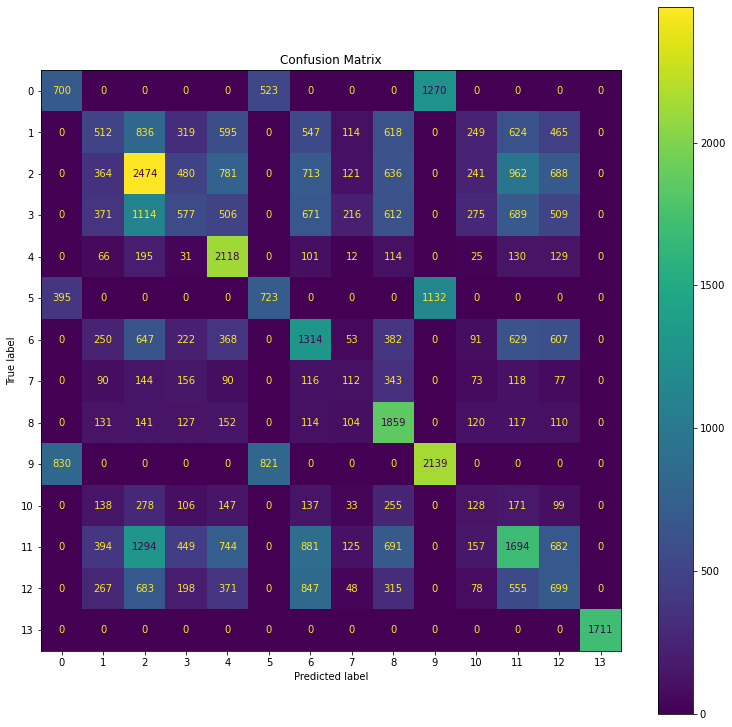

In [26]:
cm = confusion_matrix(y_test, CBC_test_pred);
cmp = ConfusionMatrixDisplay(cm);
fig, ax = plt.subplots(figsize=(13,13));
cmp.plot(ax=ax);
cmp.ax_.set_title("Confusion Matrix");

### Crime Key ###

**To make our confusion matrix more readable, we represented the crimes as numeric values. Below is a key that matches the numeric value to the crime**

0) Aggravated Assault

1) All Other Larceny

2) Burglary/Breaking & Entering

3) Destruction/Damage/Vandalism of Property

4) Identity Theft

5) Intimidation

6) Motor Vehicle Theft

7) Robbery

8) Shoplifting

9) Simple Assault

10) Theft From Building

11) Theft From Motor Vehicle

12) Theft of Motor Vehicle Parts or Accessories

13) Trespass of Real Property 

### Classification Report ###

Let's take a look at our test model classification report results for each crime:

**0) Aggravated Assault**

For our "Aggravated Assault" results, we have a precision score of .36, a recall score of .28, and an f1 score of .32. This means that:


* Out of all the crimes that the model predicted would be Aggravated Assault crimes, 36% were actually Aggravated Assault crimes.
* Out of all the crimes that were Aggravated Assault crimes, the model correctly predicted 28% of them.
* There is an f1 score of .32, indicating poor performance on predicting probability of the crime being an Aggravated Assault crime.

**1) All Other Larceny**

For our "All Other Larceny" results, we have a precision score of .20, a recall score of .10, and an f1 score of .14. This means that:

* Out of all the crimes that the model predicted would be Larceny crimes, 20% were actually Larceny crimes.
* Out of all the crimes that were Larceny crimes, the model correctly predicted 10% of them.
* There is an f1 score of .14, indicating poor performance on predicting probability of the crime being a Larceny crime.

**2) Burglary/Breaking & Entering**

For our "Burglary/Breaking & Entering" results, we have a precision score of .32, a recall score of .33, and an f1 score of .32. This means that:

* Out of all the crimes that the model predicted would be Burglary/Breaking & Entering crimes, 32% were actually Burglary/Breaking & Entering crimes.
* Out of all the crimes that were Burglary/Breaking & Entering crimes, the model correctly predicted 33% of them.
* There is an f1 score of .32, indicating poor performance on predicting probability of the crime being a Burglary/Breaking & Entering crime.

**3) Destruction/Damage/Vandalism of Property**

For our "Destruction/Damage/Vandalism of Property" results, we have a precision score of .22, a recall score of .10, and an f1 score of .14. This means that:

* Out of all the crimes that the model predicted would be Destruction/Damage/Vandalism of Property crimes, 22% were actually Destruction/Damage/Vandalism of Property crimes.
* Out of all the crimes that were Destruction/Damage/Vandalism of Property crimes, the model correctly predicted 10% of them.
* There is an f1 score of .14, indicating poor performance on predicting probability of the crime being a Destruction/Damage/Vandalism of Property crime.

**4) Identity Theft**

For our "Identity Theft" results, we have a precision score of .36, a recall score of .73, and an f1 score of .48. This means that:

* Out of all the crimes that the model predicted would be Identity Theft crimes, 36% were actually Identity Theft crimes.
* Out of all the crimes that were Identity Theft crimes, the model correctly predicted 73% of them.
* There is an f1 score of .48, indicating poor performance on predicting probability of the crime being an Identity Theft crime.

**5) Intimidation**

For our "Intimidation" results, we have a precision score of .35, a recall score of .32, and an f1 score of .33. This means that:

* Out of all the crimes that the model predicted would be Intimidation crimes, 35% were actually Intimidation crimes.
* Out of all the crimes that were Intimidation crimes, the model correctly predicted 32% of them.
* There is an f1 score of .33, indicating poor performance on predicting probability of the crime being an Intimidation crime.

**6) Motor Vehicle Theft**

For our "Motor Vehicle Theft" results, we have a precision score of .24, a recall score of .29, and an f1 score of .26. This means that:

* Out of all the crimes that the model predicted would be Motor Vehicle Theft crimes, 24% were actually Motor Vehicle Theft crimes.
* Out of all the crimes that were Motor Vehicle Theft crimes, the model correctly predicted 29% of them.
* There is an f1 score of .26, indicating poor performance on predicting probability of the crime being a Motor Vehicle Theft crime.

**7) Robbery**

For our "Robbery" results, we have a precision score of .12, a recall score of .08, and an f1 score of .10. This means that:

* Out of all the crimes that the model predicted would be Robbery crimes, 12% were actually Robbery crimes.
* Out of all the crimes that were Robbery crimes, the model correctly predicted 8% of them.
* There is an f1 score of .10, indicating poor performance on predicting probability of the crime being a Robbery crime.

**8) Shoplifting**

For our "Shoplifting" results, we have a precision score of .32, a recall score of .62, and an f1 score of .42. This means that:

* Out of all the crimes that the model predicted would be Shoplifting crimes, 32% were actually Shoplifting crimes.
* Out of all the crimes that were Shoplifting crimes, the model correctly predicted 62% of them.
* There is an f1 score of .42, indicating poor performance on predicting probability of the crime being a Shoplifting crime.

**9) Simple Assault**

For our "Simple Assault" results, we have a precision score of .47, a recall score of .56, and an f1 score of .51. This means that:

* Out of all the crimes that the model predicted would be Simple Assault crimes, 47% were actually Simple Assault crimes.
* Out of all the crimes that were Simple Assault crimes, the model correctly predicted 56% of them.
* There is an f1 score of .51, indicating poor performance on predicting probability of the crime being a Simple Assault crime.

**10) Theft From Building**

For our "Theft From Building" results, we have a precision score of .09, a recall score of .09, and an f1 score of .09. This means that:

* Out of all the crimes that the model predicted would be Theft From Building crimes, 9% were actually Theft From Building crimes.
* Out of all the crimes that were Theft From Building crimes, the model correctly predicted 9% of them.
* There is an f1 score of .09, indicating extremely poor performance on predicting probability of the crime being a Theft From Building crime.

**11) Theft From Motor Vehicle**

For our "Theft From Motor Vehicle" results, we have a precision score of .30, a recall score of .24, and an f1 score of .26. This means that:

* Out of all the crimes that the model predicted would be Theft From Motor Vehicle crimes, 30% were actually Theft From Motor Vehicle crimes.
* Out of all the crimes that were Theft From Motor Vehicle crimes, the model correctly predicted 24% of them.
* There is an f1 score of .26, indicating poor performance on predicting probability of the crime being a Theft From Motor Vehicle crime.

**12) Theft of Motor Vehicle Parts or Accessories**

For our "Theft of Motor Vehicle Parts or Accessories" results, we have a precision score of .17, a recall score of .17, and an f1 score of .17. This means that:

* Out of all the crimes that the model predicted would be Theft of Motor Vehicle Parts or Accessories crimes, 17% were actually Theft of Motor Vehicle Parts or Accessories crimes.
* Out of all the crimes that were Theft of Motor Vehicle Parts or Accessories crimes, the model correctly predicted 17% of them.
* There is an f1 score of .17, indicating poor performance on predicting probability of the crime being a Theft of Motor Vehicle Parts or Accessories crime.

**13) Trespass of Real Property**

For our "Trespass of Real Property" results, we have a precision score of 1.0, a recall score of 1.0, and an f1 score of 1.0. This means that:

* Out of all the crimes that the model predicted would be Trespass of Real Property crimes, 100% were actually Trespass of Real Property crimes.
* Out of all the crimes that were Trespass of Real Property crimes, the model correctly predicted 100% of them.
* There is an f1 score of 1, indicating perfect performance on predicting probability of the crime being a Trespass of Real Property crime.

### Crime Confusion Matrix ###

**0) Aggravated Assault**

* 700 crimes were correctly predicted as being "Aggravated Assault" crimes
* 1,793 crimes were wrongly predicted as not being "Aggravated Assault" crimes
* 1,225 crimes were wrongly predicted as being "Aggravated Assault" crimes
* 48,252 crimes were correctly predicted as not being "Aggravated Assault" crimes

**1) All Other Larceny**

* 512 crimes were correctly predicted as being "All Other Larceny" crimes
* 4,367 crimes were wrongly predicted as not being "All Other Larceny" crimes
* 2,071 crimes were wrongly predicted as being "All Other Larceny" crimes
* 44,863 crimes were correctly predicted as not being "All Other Larceny" crimes

**2) Burglary/Breaking & Entering**

* 2,474 crimes were correctly predicted as being "Burglary/Breaking & Entering" crimes
* 4,986 crimes were wrongly predicted as not being "Burglary/Breaking & Entering" crimes
* 5,332 crimes were wrongly predicted as being "Burglary/Breaking & Entering" crimes
* 40,973 crimes were correctly predicted as not being "Burglary/Breaking & Entering" crimes

**3) Destruction/Damage/Vandalism of Property**

* 577 crimes were correctly predicted as being "Destruction/Damage/Vandalism of Property" crimes
* 4,963 crimes were wrongly predicted as not being "Destruction/Damage/Vandalism of Property" crimes
* 2,088 crimes were wrongly predicted as being "Destruction/Damage/Vandalism of Property" crimes
* 47,221 crimes were correctly predicted as not being "Destruction/Damage/Vandalism of Property" crimes

**4) Identity Theft**

* 2,118 crimes were correctly predicted as being "Identity Theft" crimes
* 803 crimes were wrongly predicted as not being "Identity Theft" crimes
* 3,754 crimes were wrongly predicted as being "Identity Theft" crimes
* 48,064 crimes were correctly predicted as not being "Identity Theft" crimes

**5) Intimidation**

* 723 crimes were correctly predicted as being "Intimidation" crimes
* 1,527 crimes were wrongly predicted as not being "Intimidation" crimes
* 1,344 crimes were wrongly predicted as being "Intimidation" crimes
* 49,889 crimes were correctly predicted as not being "Intimidation" crimes

**6) Motor Vehicle Theft**

* 1,314 crimes were correctly predicted as being "Motor Vehicle Theft" crimes
* 3,249 crimes were wrongly predicted as not being "Motor Vehicle Theft" crimes
* 4,127 crimes were wrongly predicted as being "Motor Vehicle Theft" crimes
* 47,531 crimes were correctly predicted as not being "Motor Vehicle Theft" crimes

**7) Robbery**

* 112 crimes were correctly predicted as being "Robbery" crimes
* 1,207 crimes were wrongly predicted as not being "Robbery" crimes
* 826 crimes were wrongly predicted as being "Robbery" crimes
* 51,532 crimes were correctly predicted as not being "Robbery" crimes

**8) Shoplifting**

* 1,859 crimes were correctly predicted as being "Shoplifting" crimes
* 1,116 crimes were wrongly predicted as not being "Shoplifting" crimes
* 3,966 crimes were wrongly predicted as being "Shoplifting" crimes
* 49,098 crimes were correctly predicted as not being "Shoplifting" crimes

**9) Simple Assault**

* 2,139 crimes were correctly predicted as being "Simple Assault" crimes
* 1,651 crimes were wrongly predicted as not being "Simple Assault" crimes
* 3,409 crimes were wrongly predicted as being "Simple Assault" crimes
* 50,423 crimes were correctly predicted as not being "Simple Assault" crimes

**10) Theft From Building**

* 128 crimes were correctly predicted as being "Theft From Building" crimes
* 1,364 crimes were wrongly predicted as not being "Theft From Building" crimes
* 1,309 crimes were wrongly predicted as being "Theft From Building" crimes
* 51,929 crimes were correctly predicted as not being "Theft From Building" crimes

**11) Theft From Motor Vehicle**

* 1,694 crimes were correctly predicted as being "Theft From Motor Vehicle" crimes
* 7,111 crimes were wrongly predicted as not being "Theft From Motor Vehicle" crimes
* 3,995 crimes were wrongly predicted as being "Theft From Motor Vehicle" crimes
* 49,631 crimes were correctly predicted as not being "Theft From Motor Vehicle" crimes

**12) Theft of Motor Vehicle Parts or Accessories**

* 699 crimes were correctly predicted as being "Theft of Motor Vehicle Parts or Accessories" crimes
* 3,362 crimes were wrongly predicted as not being "Theft of Motor Vehicle Parts or Accessories" crimes
* 3,366 crimes were wrongly predicted as being "Theft of Motor Vehicle Parts or Accessories" crimes
* 51,863 crimes were correctly predicted as not being "Theft of Motor Vehicle Parts or Accessories" crimes

**13) Trespass of Real Property**

* 1,711 crimes were correctly predicted as being "Trespass of Real Property" crimes
* 0 crimes were wrongly predicted as not being "Trespass of Real Property" crimes
* 0 crimes were wrongly predicted as being "Trespass of Real Property" crimes
* 50,851 crimes were correctly predicted as not being "Trespass of Real Property" crimes

In [27]:
params = {'learning_rate': [0.05, 0.1, 0.5],
          'loss_function': ['MultiClass'],
          'task_type': ['GPU'],
          'random_state' : [1],
          'depth': [2, 4, 6],
          'iterations': [100, 500, 1000]
         }

In [28]:
CBC_gs = GridSearchCV(CBC, params)
CBC_gs.fit(X_train, y_train, early_stopping_rounds=5, plot = True)
CBC_gs.best_params_

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419846	total: 13.2ms	remaining: 1.31s
1:	learn: 2.4762514	total: 25ms	remaining: 1.22s
2:	learn: 2.4237441	total: 36.7ms	remaining: 1.19s
3:	learn: 2.3795726	total: 48.3ms	remaining: 1.16s
4:	learn: 2.3414035	total: 60.1ms	remaining: 1.14s
5:	learn: 2.3078011	total: 71.8ms	remaining: 1.13s
6:	learn: 2.2778566	total: 83.4ms	remaining: 1.11s
7:	learn: 2.2509267	total: 94.2ms	remaining: 1.08s
8:	learn: 2.2265152	total: 105ms	remaining: 1.06s
9:	learn: 2.2043153	total: 116ms	remaining: 1.04s
10:	learn: 2.1839448	total: 127ms	remaining: 1.03s
11:	learn: 2.1652505	total: 138ms	remaining: 1.01s
12:	learn: 2.1480046	total: 149ms	remaining: 994ms
13:	learn: 2.1320225	total: 159ms	remaining: 979ms
14:	learn: 2.1172347	total: 170ms	remaining: 964ms
15:	learn: 2.1034803	total: 181ms	remaining: 951ms
16:	learn: 2.0906592	total: 192ms	remaining: 938ms
17:	learn: 2.0787237	total: 203ms	remaining: 926ms
18:	learn: 2.0675539	total: 214ms	remaining: 913ms
19:	learn: 2.0571036	total: 225ms	r

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419856	total: 11.9ms	remaining: 1.18s
1:	learn: 2.4762573	total: 22.8ms	remaining: 1.12s
2:	learn: 2.4237355	total: 33.7ms	remaining: 1.09s
3:	learn: 2.3795672	total: 44.7ms	remaining: 1.07s
4:	learn: 2.3413907	total: 55.7ms	remaining: 1.06s
5:	learn: 2.3077991	total: 66.6ms	remaining: 1.04s
6:	learn: 2.2778537	total: 77.4ms	remaining: 1.03s
7:	learn: 2.2509244	total: 88.4ms	remaining: 1.02s
8:	learn: 2.2265174	total: 99.6ms	remaining: 1.01s
9:	learn: 2.2043129	total: 111ms	remaining: 996ms
10:	learn: 2.1839418	total: 122ms	remaining: 983ms
11:	learn: 2.1652518	total: 132ms	remaining: 970ms
12:	learn: 2.1479989	total: 143ms	remaining: 957ms
13:	learn: 2.1320212	total: 154ms	remaining: 945ms
14:	learn: 2.1172271	total: 165ms	remaining: 933ms
15:	learn: 2.1034695	total: 176ms	remaining: 922ms
16:	learn: 2.0906572	total: 186ms	remaining: 910ms
17:	learn: 2.0787215	total: 197ms	remaining: 899ms
18:	learn: 2.0675514	total: 208ms	remaining: 888ms
19:	learn: 2.0571039	total: 219m

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419882	total: 11.8ms	remaining: 1.17s
1:	learn: 2.4762643	total: 22.7ms	remaining: 1.11s
2:	learn: 2.4237410	total: 33.4ms	remaining: 1.08s
3:	learn: 2.3795753	total: 44.2ms	remaining: 1.06s
4:	learn: 2.3413940	total: 55.1ms	remaining: 1.05s
5:	learn: 2.3077917	total: 66ms	remaining: 1.03s
6:	learn: 2.2778548	total: 76.8ms	remaining: 1.02s
7:	learn: 2.2509158	total: 87.6ms	remaining: 1.01s
8:	learn: 2.2265216	total: 98.4ms	remaining: 995ms
9:	learn: 2.2043303	total: 109ms	remaining: 983ms
10:	learn: 2.1839467	total: 120ms	remaining: 972ms
11:	learn: 2.1652460	total: 131ms	remaining: 962ms
12:	learn: 2.1480037	total: 142ms	remaining: 951ms
13:	learn: 2.1320178	total: 153ms	remaining: 939ms
14:	learn: 2.1172227	total: 164ms	remaining: 929ms
15:	learn: 2.1034706	total: 175ms	remaining: 919ms
16:	learn: 2.0906616	total: 186ms	remaining: 909ms
17:	learn: 2.0787261	total: 197ms	remaining: 898ms
18:	learn: 2.0675762	total: 208ms	remaining: 887ms
19:	learn: 2.0571255	total: 219ms	

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419926	total: 11.9ms	remaining: 1.17s
1:	learn: 2.4762685	total: 23ms	remaining: 1.13s
2:	learn: 2.4237447	total: 33.9ms	remaining: 1.09s
3:	learn: 2.3795785	total: 44.9ms	remaining: 1.08s
4:	learn: 2.3413953	total: 56ms	remaining: 1.06s
5:	learn: 2.3078053	total: 66.9ms	remaining: 1.05s
6:	learn: 2.2778565	total: 78ms	remaining: 1.04s
7:	learn: 2.2509227	total: 88.9ms	remaining: 1.02s
8:	learn: 2.2265251	total: 99.8ms	remaining: 1.01s
9:	learn: 2.2043273	total: 111ms	remaining: 996ms
10:	learn: 2.1839504	total: 122ms	remaining: 984ms
11:	learn: 2.1652582	total: 132ms	remaining: 972ms
12:	learn: 2.1480047	total: 143ms	remaining: 959ms
13:	learn: 2.1320320	total: 154ms	remaining: 947ms
14:	learn: 2.1172286	total: 165ms	remaining: 936ms
15:	learn: 2.1034728	total: 176ms	remaining: 925ms
16:	learn: 2.0906645	total: 187ms	remaining: 913ms
17:	learn: 2.0787271	total: 198ms	remaining: 901ms
18:	learn: 2.0675735	total: 209ms	remaining: 890ms
19:	learn: 2.0571303	total: 220ms	rema

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419936	total: 11.9ms	remaining: 1.17s
1:	learn: 2.4762635	total: 22.8ms	remaining: 1.11s
2:	learn: 2.4237493	total: 33.6ms	remaining: 1.09s
3:	learn: 2.3795777	total: 44.6ms	remaining: 1.07s
4:	learn: 2.3413977	total: 55.4ms	remaining: 1.05s
5:	learn: 2.3077954	total: 66.1ms	remaining: 1.04s
6:	learn: 2.2778528	total: 77ms	remaining: 1.02s
7:	learn: 2.2509235	total: 87.8ms	remaining: 1.01s
8:	learn: 2.2265224	total: 98.7ms	remaining: 998ms
9:	learn: 2.2043104	total: 110ms	remaining: 986ms
10:	learn: 2.1839470	total: 120ms	remaining: 974ms
11:	learn: 2.1652482	total: 131ms	remaining: 963ms
12:	learn: 2.1479993	total: 142ms	remaining: 951ms
13:	learn: 2.1320242	total: 153ms	remaining: 939ms
14:	learn: 2.1172318	total: 164ms	remaining: 928ms
15:	learn: 2.1034802	total: 175ms	remaining: 917ms
16:	learn: 2.0906601	total: 186ms	remaining: 906ms
17:	learn: 2.0787222	total: 197ms	remaining: 895ms
18:	learn: 2.0675551	total: 208ms	remaining: 885ms
19:	learn: 2.0571095	total: 219ms	

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519488	total: 12ms	remaining: 1.19s
1:	learn: 2.3598895	total: 22.6ms	remaining: 1.11s
2:	learn: 2.2913397	total: 33.4ms	remaining: 1.08s
3:	learn: 2.2369277	total: 44.2ms	remaining: 1.06s
4:	learn: 2.1922569	total: 55ms	remaining: 1.04s
5:	learn: 2.1547724	total: 65.8ms	remaining: 1.03s
6:	learn: 2.1228984	total: 76.5ms	remaining: 1.02s
7:	learn: 2.0954139	total: 87.3ms	remaining: 1s
8:	learn: 2.0716174	total: 98ms	remaining: 991ms
9:	learn: 2.0508296	total: 109ms	remaining: 980ms
10:	learn: 2.0271506	total: 120ms	remaining: 970ms
11:	learn: 2.0081887	total: 131ms	remaining: 959ms
12:	learn: 1.9930108	total: 141ms	remaining: 946ms
13:	learn: 1.9817104	total: 152ms	remaining: 934ms
14:	learn: 1.9679394	total: 163ms	remaining: 923ms
15:	learn: 1.9588122	total: 174ms	remaining: 912ms
16:	learn: 1.9460534	total: 184ms	remaining: 901ms
17:	learn: 1.9355642	total: 195ms	remaining: 888ms
18:	learn: 1.9294894	total: 206ms	remaining: 878ms
19:	learn: 1.9230234	total: 217ms	remaini

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519402	total: 11.8ms	remaining: 1.16s
1:	learn: 2.3598792	total: 22.6ms	remaining: 1.11s
2:	learn: 2.2913389	total: 33.8ms	remaining: 1.09s
3:	learn: 2.2369235	total: 44.6ms	remaining: 1.07s
4:	learn: 2.1922461	total: 55.4ms	remaining: 1.05s
5:	learn: 2.1547680	total: 66.1ms	remaining: 1.03s
6:	learn: 2.1228947	total: 76.9ms	remaining: 1.02s
7:	learn: 2.0954127	total: 87.7ms	remaining: 1.01s
8:	learn: 2.0716162	total: 98.7ms	remaining: 998ms
9:	learn: 2.0508223	total: 110ms	remaining: 986ms
10:	learn: 2.0270751	total: 121ms	remaining: 976ms
11:	learn: 2.0104774	total: 131ms	remaining: 963ms
12:	learn: 1.9988610	total: 142ms	remaining: 952ms
13:	learn: 1.9820013	total: 153ms	remaining: 941ms
14:	learn: 1.9669211	total: 164ms	remaining: 930ms
15:	learn: 1.9591943	total: 175ms	remaining: 919ms
16:	learn: 1.9464717	total: 186ms	remaining: 908ms
17:	learn: 1.9359812	total: 196ms	remaining: 895ms
18:	learn: 1.9264026	total: 207ms	remaining: 884ms
19:	learn: 1.9200552	total: 218m

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519377	total: 11.7ms	remaining: 1.16s
1:	learn: 2.3598852	total: 22.8ms	remaining: 1.11s
2:	learn: 2.2913316	total: 34.3ms	remaining: 1.11s
3:	learn: 2.2369270	total: 45.2ms	remaining: 1.08s
4:	learn: 2.1922606	total: 56.1ms	remaining: 1.06s
5:	learn: 2.1547794	total: 66.9ms	remaining: 1.05s
6:	learn: 2.1228898	total: 77.9ms	remaining: 1.03s
7:	learn: 2.0954113	total: 88.9ms	remaining: 1.02s
8:	learn: 2.0716292	total: 100ms	remaining: 1.01s
9:	learn: 2.0508357	total: 111ms	remaining: 1000ms
10:	learn: 2.0271104	total: 122ms	remaining: 990ms
11:	learn: 2.0105111	total: 133ms	remaining: 976ms
12:	learn: 1.9924270	total: 144ms	remaining: 965ms
13:	learn: 1.9822249	total: 155ms	remaining: 952ms
14:	learn: 1.9684886	total: 166ms	remaining: 940ms
15:	learn: 1.9593069	total: 177ms	remaining: 928ms
16:	learn: 1.9465943	total: 188ms	remaining: 917ms
17:	learn: 1.9361021	total: 199ms	remaining: 906ms
18:	learn: 1.9296531	total: 210ms	remaining: 894ms
19:	learn: 1.9202075	total: 221m

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519387	total: 11.9ms	remaining: 1.18s
1:	learn: 2.3598864	total: 22.8ms	remaining: 1.12s
2:	learn: 2.2913452	total: 33.7ms	remaining: 1.09s
3:	learn: 2.2369312	total: 44.5ms	remaining: 1.07s
4:	learn: 2.1922601	total: 55.4ms	remaining: 1.05s
5:	learn: 2.1547794	total: 66.3ms	remaining: 1.04s
6:	learn: 2.1229024	total: 77.2ms	remaining: 1.02s
7:	learn: 2.0954266	total: 88.3ms	remaining: 1.01s
8:	learn: 2.0716275	total: 99.4ms	remaining: 1s
9:	learn: 2.0508480	total: 110ms	remaining: 993ms
10:	learn: 2.0271346	total: 121ms	remaining: 983ms
11:	learn: 2.0105356	total: 132ms	remaining: 970ms
12:	learn: 1.9924695	total: 143ms	remaining: 960ms
13:	learn: 1.9823055	total: 154ms	remaining: 948ms
14:	learn: 1.9673155	total: 165ms	remaining: 937ms
15:	learn: 1.9591126	total: 176ms	remaining: 925ms
16:	learn: 1.9467488	total: 187ms	remaining: 914ms
17:	learn: 1.9362574	total: 198ms	remaining: 902ms
18:	learn: 1.9302153	total: 209ms	remaining: 891ms
19:	learn: 1.9237624	total: 220ms	r

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519369	total: 11.9ms	remaining: 1.18s
1:	learn: 2.3598852	total: 22.8ms	remaining: 1.12s
2:	learn: 2.2913368	total: 33.9ms	remaining: 1.09s
3:	learn: 2.2369277	total: 44.7ms	remaining: 1.07s
4:	learn: 2.1922648	total: 55.6ms	remaining: 1.06s
5:	learn: 2.1547782	total: 66.5ms	remaining: 1.04s
6:	learn: 2.1228918	total: 77.4ms	remaining: 1.03s
7:	learn: 2.0954177	total: 88.3ms	remaining: 1.01s
8:	learn: 2.0716159	total: 99ms	remaining: 1s
9:	learn: 2.0508376	total: 110ms	remaining: 989ms
10:	learn: 2.0270728	total: 121ms	remaining: 981ms
11:	learn: 2.0104718	total: 132ms	remaining: 969ms
12:	learn: 1.9988462	total: 143ms	remaining: 957ms
13:	learn: 1.9821267	total: 154ms	remaining: 948ms
14:	learn: 1.9670318	total: 165ms	remaining: 937ms
15:	learn: 1.9588434	total: 176ms	remaining: 925ms
16:	learn: 1.9465868	total: 187ms	remaining: 915ms
17:	learn: 1.9360986	total: 198ms	remaining: 902ms
18:	learn: 1.9296690	total: 209ms	remaining: 891ms
19:	learn: 1.9202300	total: 220ms	rem

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756883	total: 11.9ms	remaining: 1.18s
1:	learn: 1.9520626	total: 22.8ms	remaining: 1.12s
2:	learn: 1.8880724	total: 33.8ms	remaining: 1.09s
3:	learn: 1.8521886	total: 45ms	remaining: 1.08s
4:	learn: 1.8356852	total: 56.5ms	remaining: 1.07s
5:	learn: 1.8255546	total: 67.7ms	remaining: 1.06s
6:	learn: 1.8101047	total: 78.5ms	remaining: 1.04s
7:	learn: 1.8011888	total: 89.6ms	remaining: 1.03s
8:	learn: 1.7935490	total: 101ms	remaining: 1.02s
9:	learn: 1.7872375	total: 112ms	remaining: 1.01s
10:	learn: 1.7818157	total: 123ms	remaining: 992ms
11:	learn: 1.7774935	total: 134ms	remaining: 980ms
12:	learn: 1.7720436	total: 145ms	remaining: 970ms
13:	learn: 1.7672704	total: 156ms	remaining: 958ms
14:	learn: 1.7647360	total: 167ms	remaining: 945ms
15:	learn: 1.7584613	total: 178ms	remaining: 933ms
16:	learn: 1.7548142	total: 189ms	remaining: 924ms
17:	learn: 1.7523385	total: 201ms	remaining: 914ms
18:	learn: 1.7449284	total: 212ms	remaining: 903ms
19:	learn: 1.7430137	total: 223ms	r

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756832	total: 12ms	remaining: 1.19s
1:	learn: 1.9517888	total: 23.3ms	remaining: 1.14s
2:	learn: 1.8886577	total: 34.1ms	remaining: 1.1s
3:	learn: 1.8529389	total: 45.4ms	remaining: 1.09s
4:	learn: 1.8330485	total: 56.6ms	remaining: 1.07s
5:	learn: 1.8228296	total: 67.6ms	remaining: 1.06s
6:	learn: 1.8124497	total: 78.9ms	remaining: 1.05s
7:	learn: 1.7977725	total: 89.8ms	remaining: 1.03s
8:	learn: 1.7908950	total: 101ms	remaining: 1.02s
9:	learn: 1.7853128	total: 112ms	remaining: 1.01s
10:	learn: 1.7791102	total: 123ms	remaining: 995ms
11:	learn: 1.7754519	total: 134ms	remaining: 982ms
12:	learn: 1.7716683	total: 146ms	remaining: 974ms
13:	learn: 1.7686968	total: 157ms	remaining: 964ms
14:	learn: 1.7658099	total: 168ms	remaining: 953ms
15:	learn: 1.7577359	total: 179ms	remaining: 942ms
16:	learn: 1.7550341	total: 190ms	remaining: 929ms
17:	learn: 1.7534945	total: 201ms	remaining: 916ms
18:	learn: 1.7500031	total: 212ms	remaining: 904ms
19:	learn: 1.7469649	total: 223ms	re

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756961	total: 12ms	remaining: 1.19s
1:	learn: 1.9519061	total: 23.1ms	remaining: 1.13s
2:	learn: 1.8888378	total: 34ms	remaining: 1.1s
3:	learn: 1.8532654	total: 45.1ms	remaining: 1.08s
4:	learn: 1.8370754	total: 56.4ms	remaining: 1.07s
5:	learn: 1.8272523	total: 67.3ms	remaining: 1.05s
6:	learn: 1.8181762	total: 78.6ms	remaining: 1.04s
7:	learn: 1.8077454	total: 90ms	remaining: 1.03s
8:	learn: 1.7947341	total: 101ms	remaining: 1.02s
9:	learn: 1.7880575	total: 112ms	remaining: 1.01s
10:	learn: 1.7825848	total: 123ms	remaining: 998ms
11:	learn: 1.7740260	total: 135ms	remaining: 991ms
12:	learn: 1.7695077	total: 147ms	remaining: 983ms
13:	learn: 1.7663956	total: 158ms	remaining: 971ms
14:	learn: 1.7627022	total: 169ms	remaining: 958ms
15:	learn: 1.7594749	total: 180ms	remaining: 944ms
16:	learn: 1.7548248	total: 191ms	remaining: 931ms
17:	learn: 1.7527021	total: 202ms	remaining: 921ms
18:	learn: 1.7499503	total: 213ms	remaining: 908ms
19:	learn: 1.7461351	total: 224ms	remain

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756966	total: 12.7ms	remaining: 1.26s
1:	learn: 1.9519927	total: 23.7ms	remaining: 1.16s
2:	learn: 1.8889247	total: 34.6ms	remaining: 1.12s
3:	learn: 1.8535364	total: 45.9ms	remaining: 1.1s
4:	learn: 1.8340449	total: 57.2ms	remaining: 1.09s
5:	learn: 1.8238952	total: 68.1ms	remaining: 1.07s
6:	learn: 1.8162299	total: 79.3ms	remaining: 1.05s
7:	learn: 1.8014082	total: 90.2ms	remaining: 1.04s
8:	learn: 1.7950080	total: 101ms	remaining: 1.02s
9:	learn: 1.7892779	total: 113ms	remaining: 1.01s
10:	learn: 1.7836331	total: 124ms	remaining: 1s
11:	learn: 1.7789927	total: 135ms	remaining: 989ms
12:	learn: 1.7714939	total: 146ms	remaining: 980ms
13:	learn: 1.7681401	total: 157ms	remaining: 967ms
14:	learn: 1.7653014	total: 169ms	remaining: 957ms
15:	learn: 1.7573029	total: 180ms	remaining: 946ms
16:	learn: 1.7539602	total: 191ms	remaining: 933ms
17:	learn: 1.7508532	total: 202ms	remaining: 920ms
18:	learn: 1.7481671	total: 213ms	remaining: 907ms
19:	learn: 1.7448731	total: 224ms	rem

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756927	total: 12.1ms	remaining: 1.19s
1:	learn: 1.9517451	total: 23.1ms	remaining: 1.13s
2:	learn: 1.8888390	total: 34ms	remaining: 1.1s
3:	learn: 1.8531955	total: 45.2ms	remaining: 1.08s
4:	learn: 1.8335321	total: 56.4ms	remaining: 1.07s
5:	learn: 1.8233262	total: 67.4ms	remaining: 1.06s
6:	learn: 1.8157679	total: 78.7ms	remaining: 1.04s
7:	learn: 1.8008696	total: 89.6ms	remaining: 1.03s
8:	learn: 1.7944985	total: 101ms	remaining: 1.02s
9:	learn: 1.7897203	total: 112ms	remaining: 1.01s
10:	learn: 1.7810923	total: 123ms	remaining: 996ms
11:	learn: 1.7755227	total: 134ms	remaining: 982ms
12:	learn: 1.7681780	total: 145ms	remaining: 972ms
13:	learn: 1.7640494	total: 156ms	remaining: 958ms
14:	learn: 1.7611053	total: 167ms	remaining: 948ms
15:	learn: 1.7569324	total: 178ms	remaining: 937ms
16:	learn: 1.7515369	total: 189ms	remaining: 924ms
17:	learn: 1.7484704	total: 200ms	remaining: 912ms
18:	learn: 1.7450671	total: 211ms	remaining: 900ms
19:	learn: 1.7421793	total: 222ms	re

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419846	total: 11.9ms	remaining: 5.91s
1:	learn: 2.4762514	total: 22.6ms	remaining: 5.63s
2:	learn: 2.4237441	total: 33.4ms	remaining: 5.53s
3:	learn: 2.3795726	total: 44.2ms	remaining: 5.48s
4:	learn: 2.3414035	total: 54.9ms	remaining: 5.44s
5:	learn: 2.3078011	total: 65.7ms	remaining: 5.41s
6:	learn: 2.2778569	total: 76.5ms	remaining: 5.39s
7:	learn: 2.2509264	total: 87.2ms	remaining: 5.36s
8:	learn: 2.2265149	total: 97.8ms	remaining: 5.34s
9:	learn: 2.2043153	total: 109ms	remaining: 5.32s
10:	learn: 2.1839448	total: 119ms	remaining: 5.31s
11:	learn: 2.1652505	total: 130ms	remaining: 5.29s
12:	learn: 2.1480046	total: 141ms	remaining: 5.28s
13:	learn: 2.1320227	total: 152ms	remaining: 5.26s
14:	learn: 2.1172350	total: 163ms	remaining: 5.26s
15:	learn: 2.1034803	total: 173ms	remaining: 5.24s
16:	learn: 2.0906592	total: 184ms	remaining: 5.23s
17:	learn: 2.0787240	total: 195ms	remaining: 5.22s
18:	learn: 2.0675539	total: 206ms	remaining: 5.21s
19:	learn: 2.0571036	total: 217m

166:	learn: 1.7705516	total: 1.85s	remaining: 3.69s
167:	learn: 1.7701776	total: 1.86s	remaining: 3.68s
168:	learn: 1.7697905	total: 1.87s	remaining: 3.67s
169:	learn: 1.7693406	total: 1.88s	remaining: 3.66s
170:	learn: 1.7689920	total: 1.9s	remaining: 3.65s
171:	learn: 1.7685853	total: 1.91s	remaining: 3.63s
172:	learn: 1.7681784	total: 1.92s	remaining: 3.62s
173:	learn: 1.7678955	total: 1.93s	remaining: 3.61s
174:	learn: 1.7672911	total: 1.94s	remaining: 3.6s
175:	learn: 1.7668743	total: 1.95s	remaining: 3.59s
176:	learn: 1.7659995	total: 1.96s	remaining: 3.58s
177:	learn: 1.7655908	total: 1.97s	remaining: 3.57s
178:	learn: 1.7653113	total: 1.98s	remaining: 3.56s
179:	learn: 1.7649122	total: 1.99s	remaining: 3.55s
180:	learn: 1.7645240	total: 2.01s	remaining: 3.54s
181:	learn: 1.7642733	total: 2.02s	remaining: 3.52s
182:	learn: 1.7639450	total: 2.03s	remaining: 3.51s
183:	learn: 1.7630631	total: 2.04s	remaining: 3.5s
184:	learn: 1.7627943	total: 2.05s	remaining: 3.49s
185:	learn: 1.7

334:	learn: 1.7178441	total: 3.7s	remaining: 1.82s
335:	learn: 1.7176064	total: 3.71s	remaining: 1.81s
336:	learn: 1.7174255	total: 3.73s	remaining: 1.8s
337:	learn: 1.7172928	total: 3.73s	remaining: 1.79s
338:	learn: 1.7171864	total: 3.75s	remaining: 1.78s
339:	learn: 1.7169286	total: 3.76s	remaining: 1.77s
340:	learn: 1.7167701	total: 3.77s	remaining: 1.76s
341:	learn: 1.7165617	total: 3.78s	remaining: 1.75s
342:	learn: 1.7164299	total: 3.79s	remaining: 1.74s
343:	learn: 1.7162823	total: 3.8s	remaining: 1.72s
344:	learn: 1.7160444	total: 3.81s	remaining: 1.71s
345:	learn: 1.7155438	total: 3.82s	remaining: 1.7s
346:	learn: 1.7151150	total: 3.83s	remaining: 1.69s
347:	learn: 1.7148386	total: 3.85s	remaining: 1.68s
348:	learn: 1.7146480	total: 3.86s	remaining: 1.67s
349:	learn: 1.7144624	total: 3.87s	remaining: 1.66s
350:	learn: 1.7140464	total: 3.88s	remaining: 1.65s
351:	learn: 1.7139349	total: 3.89s	remaining: 1.64s
352:	learn: 1.7137136	total: 3.9s	remaining: 1.62s
353:	learn: 1.713

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419859	total: 12ms	remaining: 5.97s
1:	learn: 2.4762573	total: 22.9ms	remaining: 5.71s
2:	learn: 2.4237358	total: 33.9ms	remaining: 5.62s
3:	learn: 2.3795674	total: 44.7ms	remaining: 5.55s
4:	learn: 2.3413909	total: 55.6ms	remaining: 5.51s
5:	learn: 2.3077993	total: 66.5ms	remaining: 5.47s
6:	learn: 2.2778537	total: 77.3ms	remaining: 5.44s
7:	learn: 2.2509244	total: 88.2ms	remaining: 5.42s
8:	learn: 2.2265174	total: 99ms	remaining: 5.4s
9:	learn: 2.2043129	total: 110ms	remaining: 5.38s
10:	learn: 2.1839418	total: 121ms	remaining: 5.38s
11:	learn: 2.1652515	total: 132ms	remaining: 5.37s
12:	learn: 2.1479991	total: 143ms	remaining: 5.36s
13:	learn: 2.1320212	total: 154ms	remaining: 5.34s
14:	learn: 2.1172271	total: 165ms	remaining: 5.32s
15:	learn: 2.1034693	total: 175ms	remaining: 5.31s
16:	learn: 2.0906570	total: 186ms	remaining: 5.29s
17:	learn: 2.0787215	total: 197ms	remaining: 5.28s
18:	learn: 2.0675514	total: 208ms	remaining: 5.27s
19:	learn: 2.0571040	total: 219ms	rem

168:	learn: 1.7720955	total: 1.87s	remaining: 3.66s
169:	learn: 1.7717652	total: 1.88s	remaining: 3.65s
170:	learn: 1.7715255	total: 1.89s	remaining: 3.64s
171:	learn: 1.7711414	total: 1.9s	remaining: 3.63s
172:	learn: 1.7702931	total: 1.91s	remaining: 3.62s
173:	learn: 1.7699678	total: 1.92s	remaining: 3.6s
174:	learn: 1.7696163	total: 1.94s	remaining: 3.59s
175:	learn: 1.7692865	total: 1.95s	remaining: 3.58s
176:	learn: 1.7688966	total: 1.96s	remaining: 3.57s
177:	learn: 1.7684585	total: 1.97s	remaining: 3.56s
178:	learn: 1.7680450	total: 1.98s	remaining: 3.55s
179:	learn: 1.7677043	total: 1.99s	remaining: 3.54s
180:	learn: 1.7673414	total: 2s	remaining: 3.53s
181:	learn: 1.7669493	total: 2.01s	remaining: 3.52s
182:	learn: 1.7663633	total: 2.02s	remaining: 3.5s
183:	learn: 1.7660971	total: 2.03s	remaining: 3.49s
184:	learn: 1.7656891	total: 2.04s	remaining: 3.48s
185:	learn: 1.7654497	total: 2.06s	remaining: 3.47s
186:	learn: 1.7651067	total: 2.07s	remaining: 3.46s
187:	learn: 1.7648

334:	learn: 1.7264053	total: 3.71s	remaining: 1.83s
335:	learn: 1.7259190	total: 3.73s	remaining: 1.82s
336:	learn: 1.7254811	total: 3.74s	remaining: 1.81s
337:	learn: 1.7252267	total: 3.75s	remaining: 1.8s
338:	learn: 1.7249978	total: 3.76s	remaining: 1.78s
339:	learn: 1.7248177	total: 3.77s	remaining: 1.77s
340:	learn: 1.7246846	total: 3.78s	remaining: 1.76s
341:	learn: 1.7245672	total: 3.79s	remaining: 1.75s
342:	learn: 1.7244358	total: 3.8s	remaining: 1.74s
343:	learn: 1.7241503	total: 3.81s	remaining: 1.73s
344:	learn: 1.7240548	total: 3.82s	remaining: 1.72s
345:	learn: 1.7238328	total: 3.83s	remaining: 1.71s
346:	learn: 1.7237443	total: 3.85s	remaining: 1.7s
347:	learn: 1.7235688	total: 3.86s	remaining: 1.68s
348:	learn: 1.7234319	total: 3.87s	remaining: 1.67s
349:	learn: 1.7232609	total: 3.88s	remaining: 1.66s
350:	learn: 1.7230722	total: 3.89s	remaining: 1.65s
351:	learn: 1.7229634	total: 3.9s	remaining: 1.64s
352:	learn: 1.7227547	total: 3.91s	remaining: 1.63s
353:	learn: 1.72

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419884	total: 11.8ms	remaining: 5.89s
1:	learn: 2.4762643	total: 22.7ms	remaining: 5.66s
2:	learn: 2.4237410	total: 33.6ms	remaining: 5.57s
3:	learn: 2.3795753	total: 44.6ms	remaining: 5.53s
4:	learn: 2.3413938	total: 55.8ms	remaining: 5.52s
5:	learn: 2.3077920	total: 67ms	remaining: 5.51s
6:	learn: 2.2778548	total: 77.8ms	remaining: 5.48s
7:	learn: 2.2509156	total: 88.8ms	remaining: 5.46s
8:	learn: 2.2265219	total: 99.8ms	remaining: 5.45s
9:	learn: 2.2043303	total: 111ms	remaining: 5.43s
10:	learn: 2.1839470	total: 122ms	remaining: 5.41s
11:	learn: 2.1652457	total: 133ms	remaining: 5.39s
12:	learn: 2.1480037	total: 143ms	remaining: 5.37s
13:	learn: 2.1320178	total: 154ms	remaining: 5.36s
14:	learn: 2.1172227	total: 165ms	remaining: 5.35s
15:	learn: 2.1034706	total: 176ms	remaining: 5.33s
16:	learn: 2.0906616	total: 187ms	remaining: 5.32s
17:	learn: 2.0787261	total: 198ms	remaining: 5.31s
18:	learn: 2.0675760	total: 210ms	remaining: 5.31s
19:	learn: 2.0571258	total: 221ms	

167:	learn: 1.7725893	total: 1.86s	remaining: 3.67s
168:	learn: 1.7721758	total: 1.87s	remaining: 3.66s
169:	learn: 1.7719295	total: 1.88s	remaining: 3.65s
170:	learn: 1.7716182	total: 1.89s	remaining: 3.63s
171:	learn: 1.7712591	total: 1.9s	remaining: 3.62s
172:	learn: 1.7709824	total: 1.91s	remaining: 3.61s
173:	learn: 1.7705021	total: 1.92s	remaining: 3.6s
174:	learn: 1.7701280	total: 1.93s	remaining: 3.59s
175:	learn: 1.7692792	total: 1.94s	remaining: 3.58s
176:	learn: 1.7689645	total: 1.96s	remaining: 3.57s
177:	learn: 1.7687203	total: 1.97s	remaining: 3.56s
178:	learn: 1.7684491	total: 1.98s	remaining: 3.54s
179:	learn: 1.7680293	total: 1.99s	remaining: 3.53s
180:	learn: 1.7676244	total: 2s	remaining: 3.52s
181:	learn: 1.7668320	total: 2.01s	remaining: 3.51s
182:	learn: 1.7664578	total: 2.02s	remaining: 3.5s
183:	learn: 1.7661541	total: 2.03s	remaining: 3.49s
184:	learn: 1.7658441	total: 2.04s	remaining: 3.48s
185:	learn: 1.7654210	total: 2.05s	remaining: 3.47s
186:	learn: 1.7652

334:	learn: 1.7270893	total: 3.71s	remaining: 1.82s
335:	learn: 1.7269900	total: 3.72s	remaining: 1.81s
336:	learn: 1.7268752	total: 3.73s	remaining: 1.8s
337:	learn: 1.7264111	total: 3.74s	remaining: 1.79s
338:	learn: 1.7261628	total: 3.75s	remaining: 1.78s
339:	learn: 1.7260437	total: 3.76s	remaining: 1.77s
340:	learn: 1.7258121	total: 3.77s	remaining: 1.76s
341:	learn: 1.7257232	total: 3.78s	remaining: 1.75s
342:	learn: 1.7255731	total: 3.79s	remaining: 1.74s
343:	learn: 1.7254246	total: 3.81s	remaining: 1.73s
344:	learn: 1.7251685	total: 3.82s	remaining: 1.71s
345:	learn: 1.7249523	total: 3.83s	remaining: 1.7s
346:	learn: 1.7247324	total: 3.84s	remaining: 1.69s
347:	learn: 1.7245129	total: 3.85s	remaining: 1.68s
348:	learn: 1.7244126	total: 3.86s	remaining: 1.67s
349:	learn: 1.7239393	total: 3.87s	remaining: 1.66s
350:	learn: 1.7237591	total: 3.88s	remaining: 1.65s
351:	learn: 1.7236529	total: 3.9s	remaining: 1.64s
352:	learn: 1.7232508	total: 3.91s	remaining: 1.63s
353:	learn: 1.7

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419926	total: 12ms	remaining: 5.98s
1:	learn: 2.4762682	total: 22.8ms	remaining: 5.68s
2:	learn: 2.4237449	total: 33.9ms	remaining: 5.62s
3:	learn: 2.3795785	total: 45.1ms	remaining: 5.59s
4:	learn: 2.3413950	total: 56.1ms	remaining: 5.55s
5:	learn: 2.3078053	total: 67ms	remaining: 5.51s
6:	learn: 2.2778563	total: 77.9ms	remaining: 5.49s
7:	learn: 2.2509225	total: 88.8ms	remaining: 5.46s
8:	learn: 2.2265251	total: 99.7ms	remaining: 5.44s
9:	learn: 2.2043271	total: 111ms	remaining: 5.42s
10:	learn: 2.1839507	total: 121ms	remaining: 5.4s
11:	learn: 2.1652582	total: 132ms	remaining: 5.38s
12:	learn: 2.1480047	total: 143ms	remaining: 5.36s
13:	learn: 2.1320325	total: 154ms	remaining: 5.34s
14:	learn: 2.1172286	total: 165ms	remaining: 5.33s
15:	learn: 2.1034728	total: 176ms	remaining: 5.32s
16:	learn: 2.0906645	total: 187ms	remaining: 5.31s
17:	learn: 2.0787276	total: 198ms	remaining: 5.29s
18:	learn: 2.0675735	total: 209ms	remaining: 5.28s
19:	learn: 2.0571302	total: 220ms	rem

168:	learn: 1.7723059	total: 1.87s	remaining: 3.67s
169:	learn: 1.7720011	total: 1.89s	remaining: 3.66s
170:	learn: 1.7716883	total: 1.9s	remaining: 3.65s
171:	learn: 1.7713321	total: 1.91s	remaining: 3.64s
172:	learn: 1.7707775	total: 1.92s	remaining: 3.63s
173:	learn: 1.7704597	total: 1.93s	remaining: 3.62s
174:	learn: 1.7700672	total: 1.94s	remaining: 3.61s
175:	learn: 1.7697452	total: 1.95s	remaining: 3.59s
176:	learn: 1.7693541	total: 1.96s	remaining: 3.58s
177:	learn: 1.7691082	total: 1.97s	remaining: 3.57s
178:	learn: 1.7687765	total: 1.98s	remaining: 3.56s
179:	learn: 1.7685007	total: 2s	remaining: 3.55s
180:	learn: 1.7681099	total: 2.01s	remaining: 3.54s
181:	learn: 1.7677543	total: 2.02s	remaining: 3.53s
182:	learn: 1.7669141	total: 2.03s	remaining: 3.51s
183:	learn: 1.7666118	total: 2.04s	remaining: 3.5s
184:	learn: 1.7662324	total: 2.05s	remaining: 3.49s
185:	learn: 1.7659429	total: 2.06s	remaining: 3.48s
186:	learn: 1.7656415	total: 2.07s	remaining: 3.47s
187:	learn: 1.765

334:	learn: 1.7250301	total: 3.72s	remaining: 1.83s
335:	learn: 1.7247611	total: 3.73s	remaining: 1.82s
336:	learn: 1.7245761	total: 3.74s	remaining: 1.81s
337:	learn: 1.7244252	total: 3.75s	remaining: 1.8s
338:	learn: 1.7242545	total: 3.77s	remaining: 1.79s
339:	learn: 1.7240798	total: 3.78s	remaining: 1.78s
340:	learn: 1.7235882	total: 3.79s	remaining: 1.77s
341:	learn: 1.7233628	total: 3.8s	remaining: 1.76s
342:	learn: 1.7231854	total: 3.81s	remaining: 1.75s
343:	learn: 1.7227291	total: 3.82s	remaining: 1.73s
344:	learn: 1.7225509	total: 3.84s	remaining: 1.72s
345:	learn: 1.7224265	total: 3.85s	remaining: 1.71s
346:	learn: 1.7223347	total: 3.86s	remaining: 1.7s
347:	learn: 1.7221956	total: 3.87s	remaining: 1.69s
348:	learn: 1.7220568	total: 3.88s	remaining: 1.68s
349:	learn: 1.7219128	total: 3.89s	remaining: 1.67s
350:	learn: 1.7216905	total: 3.9s	remaining: 1.66s
351:	learn: 1.7215356	total: 3.91s	remaining: 1.65s
352:	learn: 1.7212134	total: 3.92s	remaining: 1.63s
353:	learn: 1.72

499:	learn: 1.6973561	total: 5.56s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419936	total: 12ms	remaining: 5.98s
1:	learn: 2.4762635	total: 22.9ms	remaining: 5.69s
2:	learn: 2.4237493	total: 33.7ms	remaining: 5.58s
3:	learn: 2.3795777	total: 44.6ms	remaining: 5.53s
4:	learn: 2.3413977	total: 55.5ms	remaining: 5.5s
5:	learn: 2.3077957	total: 66.4ms	remaining: 5.47s
6:	learn: 2.2778531	total: 77.4ms	remaining: 5.45s
7:	learn: 2.2509235	total: 88.2ms	remaining: 5.42s
8:	learn: 2.2265224	total: 99.1ms	remaining: 5.4s
9:	learn: 2.2043104	total: 110ms	remaining: 5.38s
10:	learn: 2.1839470	total: 121ms	remaining: 5.37s
11:	learn: 2.1652482	total: 132ms	remaining: 5.35s
12:	learn: 2.1479995	total: 142ms	remaining: 5.34s
13:	learn: 2.1320242	total: 153ms	remaining: 5.32s
14:	learn: 2.1172321	total: 164ms	remaining: 5.31s
15:	learn: 2.1034802	total: 175ms	remaining: 5.29s
16:	learn: 2.0906598	total: 186ms	remaining: 5.28s
17:	learn: 2.0787219	total: 197ms	remaining: 5.26s
18:	learn: 2.0675551	total: 208ms	remaining: 5.26s
19:	learn: 2.0571095	total: 219ms	re

165:	learn: 1.7744278	total: 1.85s	remaining: 3.71s
166:	learn: 1.7740856	total: 1.86s	remaining: 3.7s
167:	learn: 1.7731936	total: 1.87s	remaining: 3.69s
168:	learn: 1.7727707	total: 1.88s	remaining: 3.68s
169:	learn: 1.7723726	total: 1.89s	remaining: 3.67s
170:	learn: 1.7719633	total: 1.9s	remaining: 3.66s
171:	learn: 1.7716735	total: 1.91s	remaining: 3.65s
172:	learn: 1.7713383	total: 1.93s	remaining: 3.64s
173:	learn: 1.7709523	total: 1.94s	remaining: 3.63s
174:	learn: 1.7701136	total: 1.95s	remaining: 3.62s
175:	learn: 1.7693699	total: 1.96s	remaining: 3.6s
176:	learn: 1.7688447	total: 1.97s	remaining: 3.6s
177:	learn: 1.7684078	total: 1.98s	remaining: 3.58s
178:	learn: 1.7680523	total: 1.99s	remaining: 3.57s
179:	learn: 1.7677713	total: 2s	remaining: 3.56s
180:	learn: 1.7674185	total: 2.01s	remaining: 3.55s
181:	learn: 1.7670810	total: 2.02s	remaining: 3.54s
182:	learn: 1.7666790	total: 2.04s	remaining: 3.53s
183:	learn: 1.7664472	total: 2.05s	remaining: 3.52s
184:	learn: 1.76607

332:	learn: 1.7258513	total: 3.7s	remaining: 1.86s
333:	learn: 1.7255731	total: 3.71s	remaining: 1.85s
334:	learn: 1.7253400	total: 3.73s	remaining: 1.83s
335:	learn: 1.7251090	total: 3.74s	remaining: 1.82s
336:	learn: 1.7247371	total: 3.75s	remaining: 1.81s
337:	learn: 1.7246043	total: 3.76s	remaining: 1.8s
338:	learn: 1.7243866	total: 3.77s	remaining: 1.79s
339:	learn: 1.7238979	total: 3.78s	remaining: 1.78s
340:	learn: 1.7237975	total: 3.79s	remaining: 1.77s
341:	learn: 1.7236947	total: 3.8s	remaining: 1.76s
342:	learn: 1.7234519	total: 3.82s	remaining: 1.75s
343:	learn: 1.7233017	total: 3.83s	remaining: 1.74s
344:	learn: 1.7230030	total: 3.84s	remaining: 1.72s
345:	learn: 1.7228821	total: 3.85s	remaining: 1.71s
346:	learn: 1.7227548	total: 3.86s	remaining: 1.7s
347:	learn: 1.7225243	total: 3.87s	remaining: 1.69s
348:	learn: 1.7223238	total: 3.88s	remaining: 1.68s
349:	learn: 1.7220893	total: 3.89s	remaining: 1.67s
350:	learn: 1.7219162	total: 3.9s	remaining: 1.66s
351:	learn: 1.721

498:	learn: 1.6965341	total: 5.54s	remaining: 11.1ms
499:	learn: 1.6963571	total: 5.55s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519488	total: 12ms	remaining: 5.99s
1:	learn: 2.3598895	total: 22.9ms	remaining: 5.7s
2:	learn: 2.2913397	total: 33.8ms	remaining: 5.59s
3:	learn: 2.2369277	total: 44.5ms	remaining: 5.52s
4:	learn: 2.1922569	total: 55.3ms	remaining: 5.48s
5:	learn: 2.1547724	total: 66.1ms	remaining: 5.45s
6:	learn: 2.1228984	total: 77ms	remaining: 5.42s
7:	learn: 2.0954139	total: 87.9ms	remaining: 5.41s
8:	learn: 2.0716174	total: 98.9ms	remaining: 5.39s
9:	learn: 2.0508296	total: 110ms	remaining: 5.37s
10:	learn: 2.0271507	total: 121ms	remaining: 5.37s
11:	learn: 2.0081885	total: 132ms	remaining: 5.36s
12:	learn: 1.9930110	total: 142ms	remaining: 5.34s
13:	learn: 1.9817104	total: 153ms	remaining: 5.32s
14:	learn: 1.9679394	total: 164ms	remaining: 5.31s
15:	learn: 1.9588124	total: 175ms	remaining: 5.29s
16:	learn: 1.9460532	total: 186ms	remaining: 5.28s
17:	learn: 1.9355642	total: 197ms	remaining: 5.27s
18:	learn: 1.9294894	total: 208ms	remaining: 5.27s
19:	learn: 1.9230232	total: 219ms	rem

167:	learn: 1.7174347	total: 1.86s	remaining: 3.68s
168:	learn: 1.7170584	total: 1.88s	remaining: 3.67s
169:	learn: 1.7168360	total: 1.89s	remaining: 3.66s
170:	learn: 1.7159011	total: 1.9s	remaining: 3.65s
171:	learn: 1.7155938	total: 1.91s	remaining: 3.64s
172:	learn: 1.7153972	total: 1.92s	remaining: 3.63s
173:	learn: 1.7150501	total: 1.93s	remaining: 3.62s
174:	learn: 1.7146614	total: 1.94s	remaining: 3.61s
175:	learn: 1.7138392	total: 1.95s	remaining: 3.6s
176:	learn: 1.7133016	total: 1.97s	remaining: 3.59s
177:	learn: 1.7129842	total: 1.98s	remaining: 3.58s
178:	learn: 1.7124140	total: 1.99s	remaining: 3.57s
179:	learn: 1.7119135	total: 2s	remaining: 3.55s
180:	learn: 1.7117450	total: 2.01s	remaining: 3.54s
181:	learn: 1.7113049	total: 2.02s	remaining: 3.53s
182:	learn: 1.7109581	total: 2.03s	remaining: 3.52s
183:	learn: 1.7107238	total: 2.04s	remaining: 3.51s
184:	learn: 1.7105026	total: 2.05s	remaining: 3.5s
185:	learn: 1.7100925	total: 2.06s	remaining: 3.49s
186:	learn: 1.7098

335:	learn: 1.6609625	total: 3.72s	remaining: 1.81s
336:	learn: 1.6606542	total: 3.73s	remaining: 1.8s
337:	learn: 1.6603121	total: 3.74s	remaining: 1.79s
338:	learn: 1.6600520	total: 3.75s	remaining: 1.78s
339:	learn: 1.6597711	total: 3.76s	remaining: 1.77s
340:	learn: 1.6596042	total: 3.77s	remaining: 1.76s
341:	learn: 1.6592685	total: 3.78s	remaining: 1.75s
342:	learn: 1.6590174	total: 3.79s	remaining: 1.74s
343:	learn: 1.6588411	total: 3.81s	remaining: 1.73s
344:	learn: 1.6586313	total: 3.82s	remaining: 1.72s
345:	learn: 1.6583871	total: 3.83s	remaining: 1.7s
346:	learn: 1.6575277	total: 3.84s	remaining: 1.69s
347:	learn: 1.6574470	total: 3.85s	remaining: 1.68s
348:	learn: 1.6572565	total: 3.86s	remaining: 1.67s
349:	learn: 1.6567303	total: 3.87s	remaining: 1.66s
350:	learn: 1.6566444	total: 3.88s	remaining: 1.65s
351:	learn: 1.6565441	total: 3.89s	remaining: 1.64s
352:	learn: 1.6563209	total: 3.9s	remaining: 1.63s
353:	learn: 1.6562075	total: 3.92s	remaining: 1.61s
354:	learn: 1.6

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519399	total: 12.1ms	remaining: 6.03s
1:	learn: 2.3598792	total: 23ms	remaining: 5.72s
2:	learn: 2.2913392	total: 33.8ms	remaining: 5.6s
3:	learn: 2.2369233	total: 44.8ms	remaining: 5.56s
4:	learn: 2.1922461	total: 55.9ms	remaining: 5.53s
5:	learn: 2.1547680	total: 66.7ms	remaining: 5.49s
6:	learn: 2.1228947	total: 77.6ms	remaining: 5.47s
7:	learn: 2.0954127	total: 88.3ms	remaining: 5.43s
8:	learn: 2.0716164	total: 99.2ms	remaining: 5.41s
9:	learn: 2.0508223	total: 110ms	remaining: 5.4s
10:	learn: 2.0270750	total: 121ms	remaining: 5.38s
11:	learn: 2.0104777	total: 132ms	remaining: 5.36s
12:	learn: 1.9988608	total: 143ms	remaining: 5.35s
13:	learn: 1.9820011	total: 154ms	remaining: 5.33s
14:	learn: 1.9669211	total: 165ms	remaining: 5.32s
15:	learn: 1.9591941	total: 175ms	remaining: 5.31s
16:	learn: 1.9464719	total: 187ms	remaining: 5.3s
17:	learn: 1.9359813	total: 197ms	remaining: 5.28s
18:	learn: 1.9264024	total: 208ms	remaining: 5.27s
19:	learn: 1.9200550	total: 220ms	rem

167:	learn: 1.7223319	total: 1.87s	remaining: 3.69s
168:	learn: 1.7219293	total: 1.88s	remaining: 3.68s
169:	learn: 1.7216966	total: 1.89s	remaining: 3.67s
170:	learn: 1.7215226	total: 1.9s	remaining: 3.65s
171:	learn: 1.7212688	total: 1.91s	remaining: 3.64s
172:	learn: 1.7210343	total: 1.92s	remaining: 3.63s
173:	learn: 1.7207305	total: 1.93s	remaining: 3.62s
174:	learn: 1.7205422	total: 1.94s	remaining: 3.61s
175:	learn: 1.7202876	total: 1.96s	remaining: 3.6s
176:	learn: 1.7200975	total: 1.97s	remaining: 3.59s
177:	learn: 1.7196662	total: 1.98s	remaining: 3.58s
178:	learn: 1.7193972	total: 1.99s	remaining: 3.56s
179:	learn: 1.7190077	total: 2s	remaining: 3.55s
180:	learn: 1.7187616	total: 2.01s	remaining: 3.54s
181:	learn: 1.7182856	total: 2.02s	remaining: 3.53s
182:	learn: 1.7180234	total: 2.03s	remaining: 3.52s
183:	learn: 1.7177863	total: 2.04s	remaining: 3.51s
184:	learn: 1.7170455	total: 2.05s	remaining: 3.5s
185:	learn: 1.7168878	total: 2.06s	remaining: 3.48s
186:	learn: 1.7165

333:	learn: 1.6778388	total: 3.7s	remaining: 1.84s
334:	learn: 1.6775782	total: 3.71s	remaining: 1.83s
335:	learn: 1.6769880	total: 3.72s	remaining: 1.82s
336:	learn: 1.6764732	total: 3.73s	remaining: 1.81s
337:	learn: 1.6762860	total: 3.75s	remaining: 1.79s
338:	learn: 1.6760653	total: 3.76s	remaining: 1.78s
339:	learn: 1.6758198	total: 3.77s	remaining: 1.77s
340:	learn: 1.6756681	total: 3.78s	remaining: 1.76s
341:	learn: 1.6755525	total: 3.79s	remaining: 1.75s
342:	learn: 1.6753201	total: 3.8s	remaining: 1.74s
343:	learn: 1.6750856	total: 3.81s	remaining: 1.73s
344:	learn: 1.6748447	total: 3.82s	remaining: 1.72s
345:	learn: 1.6746394	total: 3.83s	remaining: 1.71s
346:	learn: 1.6745184	total: 3.85s	remaining: 1.7s
347:	learn: 1.6743613	total: 3.86s	remaining: 1.68s
348:	learn: 1.6742803	total: 3.87s	remaining: 1.67s
349:	learn: 1.6741133	total: 3.88s	remaining: 1.66s
350:	learn: 1.6738866	total: 3.89s	remaining: 1.65s
351:	learn: 1.6737111	total: 3.9s	remaining: 1.64s
352:	learn: 1.67

499:	learn: 1.6513469	total: 5.54s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519374	total: 11.8ms	remaining: 5.9s
1:	learn: 2.3598852	total: 22.8ms	remaining: 5.67s
2:	learn: 2.2913316	total: 33.7ms	remaining: 5.58s
3:	learn: 2.2369272	total: 44.5ms	remaining: 5.52s
4:	learn: 2.1922604	total: 55.4ms	remaining: 5.48s
5:	learn: 2.1547794	total: 66.3ms	remaining: 5.46s
6:	learn: 2.1228893	total: 77.2ms	remaining: 5.44s
7:	learn: 2.0954111	total: 87.9ms	remaining: 5.41s
8:	learn: 2.0716292	total: 98.9ms	remaining: 5.4s
9:	learn: 2.0508357	total: 110ms	remaining: 5.39s
10:	learn: 2.0271103	total: 121ms	remaining: 5.38s
11:	learn: 2.0105111	total: 132ms	remaining: 5.36s
12:	learn: 1.9924268	total: 143ms	remaining: 5.35s
13:	learn: 1.9822250	total: 154ms	remaining: 5.33s
14:	learn: 1.9684887	total: 165ms	remaining: 5.32s
15:	learn: 1.9593069	total: 175ms	remaining: 5.31s
16:	learn: 1.9465943	total: 187ms	remaining: 5.31s
17:	learn: 1.9361020	total: 198ms	remaining: 5.29s
18:	learn: 1.9296534	total: 209ms	remaining: 5.28s
19:	learn: 1.9202076	total: 220ms	

166:	learn: 1.7259140	total: 1.86s	remaining: 3.71s
167:	learn: 1.7256048	total: 1.87s	remaining: 3.7s
168:	learn: 1.7252553	total: 1.88s	remaining: 3.69s
169:	learn: 1.7247658	total: 1.89s	remaining: 3.68s
170:	learn: 1.7245981	total: 1.91s	remaining: 3.67s
171:	learn: 1.7243725	total: 1.92s	remaining: 3.65s
172:	learn: 1.7235927	total: 1.93s	remaining: 3.64s
173:	learn: 1.7226712	total: 1.94s	remaining: 3.63s
174:	learn: 1.7224599	total: 1.95s	remaining: 3.62s
175:	learn: 1.7222863	total: 1.96s	remaining: 3.61s
176:	learn: 1.7220748	total: 1.97s	remaining: 3.6s
177:	learn: 1.7219106	total: 1.98s	remaining: 3.58s
178:	learn: 1.7215327	total: 1.99s	remaining: 3.57s
179:	learn: 1.7212230	total: 2s	remaining: 3.56s
180:	learn: 1.7208164	total: 2.01s	remaining: 3.55s
181:	learn: 1.7202950	total: 2.02s	remaining: 3.54s
182:	learn: 1.7199875	total: 2.04s	remaining: 3.53s
183:	learn: 1.7197922	total: 2.05s	remaining: 3.51s
184:	learn: 1.7194713	total: 2.06s	remaining: 3.5s
185:	learn: 1.7191

332:	learn: 1.6816280	total: 3.7s	remaining: 1.85s
333:	learn: 1.6815111	total: 3.71s	remaining: 1.84s
334:	learn: 1.6814381	total: 3.72s	remaining: 1.83s
335:	learn: 1.6812438	total: 3.73s	remaining: 1.82s
336:	learn: 1.6810120	total: 3.74s	remaining: 1.81s
337:	learn: 1.6807434	total: 3.75s	remaining: 1.8s
338:	learn: 1.6805969	total: 3.77s	remaining: 1.79s
339:	learn: 1.6804718	total: 3.78s	remaining: 1.78s
340:	learn: 1.6802864	total: 3.79s	remaining: 1.77s
341:	learn: 1.6800378	total: 3.8s	remaining: 1.75s
342:	learn: 1.6798986	total: 3.81s	remaining: 1.74s
343:	learn: 1.6798059	total: 3.82s	remaining: 1.73s
344:	learn: 1.6789722	total: 3.83s	remaining: 1.72s
345:	learn: 1.6787047	total: 3.84s	remaining: 1.71s
346:	learn: 1.6781586	total: 3.85s	remaining: 1.7s
347:	learn: 1.6780088	total: 3.87s	remaining: 1.69s
348:	learn: 1.6779394	total: 3.88s	remaining: 1.68s
349:	learn: 1.6776864	total: 3.89s	remaining: 1.67s
350:	learn: 1.6775526	total: 3.9s	remaining: 1.66s
351:	learn: 1.677

499:	learn: 1.6553360	total: 5.55s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519387	total: 12ms	remaining: 5.98s
1:	learn: 2.3598861	total: 22.9ms	remaining: 5.7s
2:	learn: 2.2913449	total: 33.8ms	remaining: 5.6s
3:	learn: 2.2369309	total: 44.8ms	remaining: 5.55s
4:	learn: 2.1922601	total: 55.7ms	remaining: 5.51s
5:	learn: 2.1547791	total: 66.6ms	remaining: 5.48s
6:	learn: 2.1229024	total: 77.6ms	remaining: 5.46s
7:	learn: 2.0954268	total: 88.5ms	remaining: 5.44s
8:	learn: 2.0716272	total: 99.3ms	remaining: 5.42s
9:	learn: 2.0508480	total: 110ms	remaining: 5.4s
10:	learn: 2.0271346	total: 121ms	remaining: 5.39s
11:	learn: 2.0105358	total: 132ms	remaining: 5.37s
12:	learn: 1.9924692	total: 143ms	remaining: 5.35s
13:	learn: 1.9823053	total: 154ms	remaining: 5.33s
14:	learn: 1.9673153	total: 165ms	remaining: 5.33s
15:	learn: 1.9591126	total: 176ms	remaining: 5.32s
16:	learn: 1.9467488	total: 187ms	remaining: 5.31s
17:	learn: 1.9362572	total: 198ms	remaining: 5.3s
18:	learn: 1.9302152	total: 209ms	remaining: 5.29s
19:	learn: 1.9237624	total: 220ms	rema

165:	learn: 1.7250422	total: 1.86s	remaining: 3.74s
166:	learn: 1.7245984	total: 1.87s	remaining: 3.73s
167:	learn: 1.7241208	total: 1.88s	remaining: 3.72s
168:	learn: 1.7231385	total: 1.89s	remaining: 3.71s
169:	learn: 1.7229273	total: 1.9s	remaining: 3.69s
170:	learn: 1.7226030	total: 1.91s	remaining: 3.68s
171:	learn: 1.7217336	total: 1.92s	remaining: 3.67s
172:	learn: 1.7212976	total: 1.94s	remaining: 3.66s
173:	learn: 1.7210906	total: 1.95s	remaining: 3.65s
174:	learn: 1.7201573	total: 1.96s	remaining: 3.63s
175:	learn: 1.7198214	total: 1.97s	remaining: 3.62s
176:	learn: 1.7194423	total: 1.98s	remaining: 3.61s
177:	learn: 1.7188317	total: 1.99s	remaining: 3.6s
178:	learn: 1.7185172	total: 2s	remaining: 3.59s
179:	learn: 1.7181447	total: 2.01s	remaining: 3.58s
180:	learn: 1.7178310	total: 2.02s	remaining: 3.57s
181:	learn: 1.7174285	total: 2.03s	remaining: 3.56s
182:	learn: 1.7171962	total: 2.04s	remaining: 3.54s
183:	learn: 1.7167640	total: 2.06s	remaining: 3.53s
184:	learn: 1.716

332:	learn: 1.6749311	total: 3.71s	remaining: 1.86s
333:	learn: 1.6747642	total: 3.72s	remaining: 1.85s
334:	learn: 1.6746391	total: 3.73s	remaining: 1.84s
335:	learn: 1.6744856	total: 3.75s	remaining: 1.83s
336:	learn: 1.6743960	total: 3.76s	remaining: 1.82s
337:	learn: 1.6741426	total: 3.77s	remaining: 1.81s
338:	learn: 1.6737995	total: 3.78s	remaining: 1.79s
339:	learn: 1.6736575	total: 3.79s	remaining: 1.78s
340:	learn: 1.6735302	total: 3.8s	remaining: 1.77s
341:	learn: 1.6734511	total: 3.81s	remaining: 1.76s
342:	learn: 1.6732511	total: 3.82s	remaining: 1.75s
343:	learn: 1.6731459	total: 3.83s	remaining: 1.74s
344:	learn: 1.6730527	total: 3.85s	remaining: 1.73s
345:	learn: 1.6726683	total: 3.86s	remaining: 1.72s
346:	learn: 1.6725228	total: 3.87s	remaining: 1.71s
347:	learn: 1.6724070	total: 3.88s	remaining: 1.69s
348:	learn: 1.6722125	total: 3.89s	remaining: 1.68s
349:	learn: 1.6720258	total: 3.9s	remaining: 1.67s
350:	learn: 1.6719514	total: 3.91s	remaining: 1.66s
351:	learn: 1.

499:	learn: 1.6468919	total: 5.55s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519367	total: 12ms	remaining: 5.97s
1:	learn: 2.3598854	total: 23ms	remaining: 5.72s
2:	learn: 2.2913371	total: 34.1ms	remaining: 5.65s
3:	learn: 2.2369275	total: 45.3ms	remaining: 5.61s
4:	learn: 2.1922648	total: 56.4ms	remaining: 5.59s
5:	learn: 2.1547777	total: 67.6ms	remaining: 5.57s
6:	learn: 2.1228920	total: 78.5ms	remaining: 5.53s
7:	learn: 2.0954177	total: 89.5ms	remaining: 5.5s
8:	learn: 2.0716157	total: 100ms	remaining: 5.48s
9:	learn: 2.0508376	total: 111ms	remaining: 5.46s
10:	learn: 2.0270728	total: 123ms	remaining: 5.46s
11:	learn: 2.0104721	total: 134ms	remaining: 5.46s
12:	learn: 1.9988460	total: 146ms	remaining: 5.47s
13:	learn: 1.9821266	total: 158ms	remaining: 5.48s
14:	learn: 1.9670316	total: 169ms	remaining: 5.47s
15:	learn: 1.9588434	total: 180ms	remaining: 5.45s
16:	learn: 1.9465870	total: 191ms	remaining: 5.43s
17:	learn: 1.9360990	total: 202ms	remaining: 5.4s
18:	learn: 1.9296686	total: 213ms	remaining: 5.38s
19:	learn: 1.9202298	total: 224ms	remai

168:	learn: 1.7220270	total: 1.87s	remaining: 3.67s
169:	learn: 1.7216312	total: 1.88s	remaining: 3.66s
170:	learn: 1.7211812	total: 1.9s	remaining: 3.65s
171:	learn: 1.7208808	total: 1.91s	remaining: 3.64s
172:	learn: 1.7205870	total: 1.92s	remaining: 3.63s
173:	learn: 1.7203053	total: 1.93s	remaining: 3.61s
174:	learn: 1.7198839	total: 1.94s	remaining: 3.6s
175:	learn: 1.7195342	total: 1.95s	remaining: 3.59s
176:	learn: 1.7192072	total: 1.96s	remaining: 3.58s
177:	learn: 1.7189187	total: 1.97s	remaining: 3.57s
178:	learn: 1.7184166	total: 1.98s	remaining: 3.56s
179:	learn: 1.7181047	total: 2s	remaining: 3.55s
180:	learn: 1.7179263	total: 2.01s	remaining: 3.54s
181:	learn: 1.7177288	total: 2.02s	remaining: 3.52s
182:	learn: 1.7167785	total: 2.03s	remaining: 3.51s
183:	learn: 1.7165184	total: 2.04s	remaining: 3.5s
184:	learn: 1.7163107	total: 2.05s	remaining: 3.49s
185:	learn: 1.7160402	total: 2.06s	remaining: 3.48s
186:	learn: 1.7155678	total: 2.07s	remaining: 3.47s
187:	learn: 1.7152

334:	learn: 1.6735431	total: 3.71s	remaining: 1.83s
335:	learn: 1.6733162	total: 3.73s	remaining: 1.82s
336:	learn: 1.6731763	total: 3.74s	remaining: 1.81s
337:	learn: 1.6729070	total: 3.75s	remaining: 1.8s
338:	learn: 1.6726501	total: 3.76s	remaining: 1.78s
339:	learn: 1.6724731	total: 3.77s	remaining: 1.77s
340:	learn: 1.6719865	total: 3.78s	remaining: 1.76s
341:	learn: 1.6718519	total: 3.79s	remaining: 1.75s
342:	learn: 1.6716500	total: 3.8s	remaining: 1.74s
343:	learn: 1.6715670	total: 3.81s	remaining: 1.73s
344:	learn: 1.6713152	total: 3.83s	remaining: 1.72s
345:	learn: 1.6710735	total: 3.84s	remaining: 1.71s
346:	learn: 1.6706304	total: 3.85s	remaining: 1.7s
347:	learn: 1.6705106	total: 3.86s	remaining: 1.69s
348:	learn: 1.6704328	total: 3.87s	remaining: 1.67s
349:	learn: 1.6700915	total: 3.88s	remaining: 1.66s
350:	learn: 1.6700216	total: 3.89s	remaining: 1.65s
351:	learn: 1.6698420	total: 3.9s	remaining: 1.64s
352:	learn: 1.6696711	total: 3.91s	remaining: 1.63s
353:	learn: 1.66

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756883	total: 12ms	remaining: 5.98s
1:	learn: 1.9520627	total: 23ms	remaining: 5.74s
2:	learn: 1.8880724	total: 34ms	remaining: 5.63s
3:	learn: 1.8521886	total: 44.9ms	remaining: 5.57s
4:	learn: 1.8356853	total: 56.2ms	remaining: 5.57s
5:	learn: 1.8255547	total: 67.3ms	remaining: 5.54s
6:	learn: 1.8101048	total: 78.1ms	remaining: 5.5s
7:	learn: 1.8011887	total: 89.3ms	remaining: 5.49s
8:	learn: 1.7935488	total: 100ms	remaining: 5.48s
9:	learn: 1.7872377	total: 112ms	remaining: 5.47s
10:	learn: 1.7818153	total: 122ms	remaining: 5.43s
11:	learn: 1.7774932	total: 133ms	remaining: 5.42s
12:	learn: 1.7720437	total: 144ms	remaining: 5.41s
13:	learn: 1.7672708	total: 155ms	remaining: 5.39s
14:	learn: 1.7647358	total: 166ms	remaining: 5.37s
15:	learn: 1.7584613	total: 177ms	remaining: 5.35s
16:	learn: 1.7548141	total: 188ms	remaining: 5.34s
17:	learn: 1.7523387	total: 200ms	remaining: 5.34s
18:	learn: 1.7449283	total: 211ms	remaining: 5.34s
19:	learn: 1.7430138	total: 222ms	remain

166:	learn: 1.5774335	total: 1.85s	remaining: 3.7s
167:	learn: 1.5768193	total: 1.86s	remaining: 3.69s
168:	learn: 1.5766273	total: 1.88s	remaining: 3.67s
169:	learn: 1.5760377	total: 1.89s	remaining: 3.66s
170:	learn: 1.5751505	total: 1.9s	remaining: 3.65s
171:	learn: 1.5748935	total: 1.91s	remaining: 3.64s
172:	learn: 1.5743550	total: 1.92s	remaining: 3.63s
173:	learn: 1.5741338	total: 1.93s	remaining: 3.62s
174:	learn: 1.5734887	total: 1.94s	remaining: 3.61s
175:	learn: 1.5728538	total: 1.96s	remaining: 3.6s
176:	learn: 1.5714616	total: 1.97s	remaining: 3.59s
177:	learn: 1.5712570	total: 1.98s	remaining: 3.58s
178:	learn: 1.5706557	total: 1.99s	remaining: 3.57s
179:	learn: 1.5696049	total: 2s	remaining: 3.55s
180:	learn: 1.5692619	total: 2.01s	remaining: 3.54s
181:	learn: 1.5686423	total: 2.02s	remaining: 3.53s
182:	learn: 1.5682369	total: 2.03s	remaining: 3.52s
183:	learn: 1.5677048	total: 2.04s	remaining: 3.51s
184:	learn: 1.5672474	total: 2.05s	remaining: 3.5s
185:	learn: 1.56715

333:	learn: 1.5280567	total: 3.71s	remaining: 1.84s
334:	learn: 1.5279521	total: 3.72s	remaining: 1.83s
335:	learn: 1.5278400	total: 3.73s	remaining: 1.82s
336:	learn: 1.5277385	total: 3.74s	remaining: 1.81s
337:	learn: 1.5275644	total: 3.75s	remaining: 1.8s
338:	learn: 1.5274898	total: 3.77s	remaining: 1.79s
339:	learn: 1.5273597	total: 3.78s	remaining: 1.78s
340:	learn: 1.5272591	total: 3.79s	remaining: 1.76s
341:	learn: 1.5270816	total: 3.8s	remaining: 1.75s
342:	learn: 1.5269838	total: 3.81s	remaining: 1.74s
343:	learn: 1.5267461	total: 3.82s	remaining: 1.73s
344:	learn: 1.5266049	total: 3.83s	remaining: 1.72s
345:	learn: 1.5265186	total: 3.84s	remaining: 1.71s
346:	learn: 1.5262344	total: 3.85s	remaining: 1.7s
347:	learn: 1.5259546	total: 3.87s	remaining: 1.69s
348:	learn: 1.5256318	total: 3.88s	remaining: 1.68s
349:	learn: 1.5255301	total: 3.89s	remaining: 1.67s
350:	learn: 1.5254432	total: 3.9s	remaining: 1.65s
351:	learn: 1.5253894	total: 3.91s	remaining: 1.64s
352:	learn: 1.52

499:	learn: 1.5082772	total: 5.55s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756834	total: 12ms	remaining: 5.97s
1:	learn: 1.9517887	total: 23.1ms	remaining: 5.75s
2:	learn: 1.8886576	total: 34.4ms	remaining: 5.69s
3:	learn: 1.8529388	total: 46.5ms	remaining: 5.76s
4:	learn: 1.8330483	total: 57.5ms	remaining: 5.7s
5:	learn: 1.8228298	total: 68.7ms	remaining: 5.65s
6:	learn: 1.8124494	total: 80ms	remaining: 5.63s
7:	learn: 1.7977725	total: 90.9ms	remaining: 5.59s
8:	learn: 1.7908949	total: 102ms	remaining: 5.57s
9:	learn: 1.7853126	total: 113ms	remaining: 5.54s
10:	learn: 1.7791106	total: 124ms	remaining: 5.51s
11:	learn: 1.7754519	total: 135ms	remaining: 5.48s
12:	learn: 1.7716680	total: 146ms	remaining: 5.47s
13:	learn: 1.7686968	total: 157ms	remaining: 5.46s
14:	learn: 1.7658099	total: 168ms	remaining: 5.44s
15:	learn: 1.7577360	total: 179ms	remaining: 5.42s
16:	learn: 1.7550340	total: 190ms	remaining: 5.39s
17:	learn: 1.7534944	total: 201ms	remaining: 5.37s
18:	learn: 1.7500033	total: 212ms	remaining: 5.36s
19:	learn: 1.7469649	total: 223ms	rema

168:	learn: 1.6105292	total: 1.87s	remaining: 3.66s
169:	learn: 1.6099709	total: 1.88s	remaining: 3.65s
170:	learn: 1.6092675	total: 1.89s	remaining: 3.64s
171:	learn: 1.6090182	total: 1.91s	remaining: 3.63s
172:	learn: 1.6087499	total: 1.92s	remaining: 3.62s
173:	learn: 1.6081738	total: 1.93s	remaining: 3.61s
174:	learn: 1.6080462	total: 1.94s	remaining: 3.6s
175:	learn: 1.6078581	total: 1.95s	remaining: 3.59s
176:	learn: 1.6076380	total: 1.96s	remaining: 3.58s
177:	learn: 1.6069630	total: 1.97s	remaining: 3.56s
178:	learn: 1.6066542	total: 1.98s	remaining: 3.56s
179:	learn: 1.6065353	total: 1.99s	remaining: 3.54s
180:	learn: 1.6062218	total: 2s	remaining: 3.53s
181:	learn: 1.6060080	total: 2.02s	remaining: 3.52s
182:	learn: 1.6058208	total: 2.03s	remaining: 3.51s
183:	learn: 1.6055255	total: 2.04s	remaining: 3.5s
184:	learn: 1.6052174	total: 2.05s	remaining: 3.49s
185:	learn: 1.6049206	total: 2.06s	remaining: 3.48s
186:	learn: 1.6047201	total: 2.07s	remaining: 3.47s
187:	learn: 1.604

334:	learn: 1.5718971	total: 3.72s	remaining: 1.83s
335:	learn: 1.5717903	total: 3.73s	remaining: 1.82s
336:	learn: 1.5716700	total: 3.75s	remaining: 1.81s
337:	learn: 1.5715755	total: 3.76s	remaining: 1.8s
338:	learn: 1.5714240	total: 3.77s	remaining: 1.79s
339:	learn: 1.5712196	total: 3.78s	remaining: 1.78s
340:	learn: 1.5709072	total: 3.79s	remaining: 1.77s
341:	learn: 1.5707495	total: 3.8s	remaining: 1.76s
342:	learn: 1.5706522	total: 3.81s	remaining: 1.75s
343:	learn: 1.5705772	total: 3.82s	remaining: 1.73s
344:	learn: 1.5703991	total: 3.83s	remaining: 1.72s
345:	learn: 1.5702869	total: 3.85s	remaining: 1.71s
346:	learn: 1.5702262	total: 3.86s	remaining: 1.7s
347:	learn: 1.5700363	total: 3.87s	remaining: 1.69s
348:	learn: 1.5698137	total: 3.88s	remaining: 1.68s
349:	learn: 1.5696092	total: 3.89s	remaining: 1.67s
350:	learn: 1.5694734	total: 3.9s	remaining: 1.66s
351:	learn: 1.5693804	total: 3.91s	remaining: 1.64s
352:	learn: 1.5693074	total: 3.92s	remaining: 1.63s
353:	learn: 1.56

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756959	total: 12ms	remaining: 6s
1:	learn: 1.9519061	total: 23.1ms	remaining: 5.75s
2:	learn: 1.8888378	total: 34ms	remaining: 5.63s
3:	learn: 1.8532653	total: 45.1ms	remaining: 5.59s
4:	learn: 1.8370752	total: 56.3ms	remaining: 5.57s
5:	learn: 1.8272525	total: 67.3ms	remaining: 5.54s
6:	learn: 1.8181762	total: 78.4ms	remaining: 5.52s
7:	learn: 1.8077453	total: 89.8ms	remaining: 5.52s
8:	learn: 1.7947343	total: 101ms	remaining: 5.5s
9:	learn: 1.7880572	total: 112ms	remaining: 5.5s
10:	learn: 1.7825847	total: 123ms	remaining: 5.47s
11:	learn: 1.7740260	total: 134ms	remaining: 5.45s
12:	learn: 1.7695079	total: 145ms	remaining: 5.43s
13:	learn: 1.7663958	total: 156ms	remaining: 5.41s
14:	learn: 1.7627023	total: 167ms	remaining: 5.4s
15:	learn: 1.7594748	total: 178ms	remaining: 5.38s
16:	learn: 1.7548248	total: 189ms	remaining: 5.36s
17:	learn: 1.7527021	total: 201ms	remaining: 5.37s
18:	learn: 1.7499505	total: 212ms	remaining: 5.36s
19:	learn: 1.7461348	total: 223ms	remaining

166:	learn: 1.6147826	total: 1.85s	remaining: 3.69s
167:	learn: 1.6146501	total: 1.86s	remaining: 3.68s
168:	learn: 1.6142969	total: 1.88s	remaining: 3.67s
169:	learn: 1.6140029	total: 1.89s	remaining: 3.66s
170:	learn: 1.6135861	total: 1.9s	remaining: 3.65s
171:	learn: 1.6134222	total: 1.91s	remaining: 3.64s
172:	learn: 1.6130380	total: 1.92s	remaining: 3.63s
173:	learn: 1.6126624	total: 1.93s	remaining: 3.62s
174:	learn: 1.6125451	total: 1.94s	remaining: 3.6s
175:	learn: 1.6121853	total: 1.95s	remaining: 3.59s
176:	learn: 1.6115141	total: 1.96s	remaining: 3.58s
177:	learn: 1.6111772	total: 1.97s	remaining: 3.57s
178:	learn: 1.6106512	total: 1.99s	remaining: 3.56s
179:	learn: 1.6101408	total: 2s	remaining: 3.55s
180:	learn: 1.6099225	total: 2.01s	remaining: 3.54s
181:	learn: 1.6098248	total: 2.02s	remaining: 3.53s
182:	learn: 1.6096121	total: 2.03s	remaining: 3.52s
183:	learn: 1.6092810	total: 2.04s	remaining: 3.51s
184:	learn: 1.6090153	total: 2.05s	remaining: 3.5s
185:	learn: 1.6088

333:	learn: 1.5791705	total: 3.71s	remaining: 1.84s
334:	learn: 1.5789032	total: 3.72s	remaining: 1.83s
335:	learn: 1.5788692	total: 3.73s	remaining: 1.82s
336:	learn: 1.5787624	total: 3.74s	remaining: 1.81s
337:	learn: 1.5786134	total: 3.75s	remaining: 1.8s
338:	learn: 1.5784866	total: 3.76s	remaining: 1.79s
339:	learn: 1.5783921	total: 3.77s	remaining: 1.77s
340:	learn: 1.5783111	total: 3.78s	remaining: 1.76s
341:	learn: 1.5782107	total: 3.79s	remaining: 1.75s
342:	learn: 1.5781083	total: 3.81s	remaining: 1.74s
343:	learn: 1.5778648	total: 3.82s	remaining: 1.73s
344:	learn: 1.5777747	total: 3.83s	remaining: 1.72s
345:	learn: 1.5775386	total: 3.84s	remaining: 1.71s
346:	learn: 1.5769682	total: 3.85s	remaining: 1.7s
347:	learn: 1.5768992	total: 3.86s	remaining: 1.69s
348:	learn: 1.5768314	total: 3.87s	remaining: 1.68s
349:	learn: 1.5767286	total: 3.88s	remaining: 1.66s
350:	learn: 1.5766512	total: 3.9s	remaining: 1.65s
351:	learn: 1.5765433	total: 3.91s	remaining: 1.64s
352:	learn: 1.5

498:	learn: 1.5615190	total: 5.54s	remaining: 11.1ms
499:	learn: 1.5613272	total: 5.55s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756966	total: 12ms	remaining: 5.99s
1:	learn: 1.9519926	total: 23.1ms	remaining: 5.75s
2:	learn: 1.8889244	total: 34.1ms	remaining: 5.64s
3:	learn: 1.8535364	total: 45.4ms	remaining: 5.63s
4:	learn: 1.8340449	total: 56.6ms	remaining: 5.6s
5:	learn: 1.8238952	total: 67.5ms	remaining: 5.56s
6:	learn: 1.8162299	total: 78.6ms	remaining: 5.54s
7:	learn: 1.8014081	total: 89.8ms	remaining: 5.52s
8:	learn: 1.7950082	total: 101ms	remaining: 5.52s
9:	learn: 1.7892779	total: 112ms	remaining: 5.5s
10:	learn: 1.7836330	total: 123ms	remaining: 5.48s
11:	learn: 1.7789925	total: 134ms	remaining: 5.46s
12:	learn: 1.7714939	total: 145ms	remaining: 5.44s
13:	learn: 1.7681401	total: 156ms	remaining: 5.42s
14:	learn: 1.7653015	total: 167ms	remaining: 5.42s
15:	learn: 1.7573029	total: 179ms	remaining: 5.4s
16:	learn: 1.7539602	total: 190ms	remaining: 5.39s
17:	learn: 1.7508532	total: 201ms	remaining: 5.37s
18:	learn: 1.7481670	total: 212ms	remaining: 5.36s
19:	learn: 1.7448729	total: 223ms	rema

166:	learn: 1.6063185	total: 1.86s	remaining: 3.71s
167:	learn: 1.6056639	total: 1.87s	remaining: 3.69s
168:	learn: 1.6053529	total: 1.88s	remaining: 3.68s
169:	learn: 1.6051774	total: 1.89s	remaining: 3.67s
170:	learn: 1.6046305	total: 1.9s	remaining: 3.66s
171:	learn: 1.6044791	total: 1.91s	remaining: 3.65s
172:	learn: 1.6042823	total: 1.92s	remaining: 3.64s
173:	learn: 1.6041088	total: 1.94s	remaining: 3.63s
174:	learn: 1.6037325	total: 1.95s	remaining: 3.62s
175:	learn: 1.6035546	total: 1.96s	remaining: 3.6s
176:	learn: 1.6030115	total: 1.97s	remaining: 3.59s
177:	learn: 1.6024802	total: 1.98s	remaining: 3.58s
178:	learn: 1.6022631	total: 1.99s	remaining: 3.57s
179:	learn: 1.6019869	total: 2s	remaining: 3.56s
180:	learn: 1.6013801	total: 2.01s	remaining: 3.55s
181:	learn: 1.6011129	total: 2.02s	remaining: 3.54s
182:	learn: 1.6008865	total: 2.04s	remaining: 3.52s
183:	learn: 1.6007514	total: 2.05s	remaining: 3.51s
184:	learn: 1.6002666	total: 2.06s	remaining: 3.5s
185:	learn: 1.6000

333:	learn: 1.5685265	total: 3.71s	remaining: 1.84s
334:	learn: 1.5683322	total: 3.72s	remaining: 1.83s
335:	learn: 1.5681810	total: 3.73s	remaining: 1.82s
336:	learn: 1.5680159	total: 3.74s	remaining: 1.81s
337:	learn: 1.5678878	total: 3.75s	remaining: 1.8s
338:	learn: 1.5677998	total: 3.76s	remaining: 1.79s
339:	learn: 1.5675741	total: 3.77s	remaining: 1.78s
340:	learn: 1.5673653	total: 3.79s	remaining: 1.76s
341:	learn: 1.5672948	total: 3.8s	remaining: 1.75s
342:	learn: 1.5671224	total: 3.81s	remaining: 1.74s
343:	learn: 1.5669644	total: 3.82s	remaining: 1.73s
344:	learn: 1.5668699	total: 3.83s	remaining: 1.72s
345:	learn: 1.5667454	total: 3.84s	remaining: 1.71s
346:	learn: 1.5666128	total: 3.85s	remaining: 1.7s
347:	learn: 1.5663836	total: 3.87s	remaining: 1.69s
348:	learn: 1.5662791	total: 3.88s	remaining: 1.68s
349:	learn: 1.5661296	total: 3.89s	remaining: 1.67s
350:	learn: 1.5660925	total: 3.9s	remaining: 1.65s
351:	learn: 1.5660517	total: 3.91s	remaining: 1.64s
352:	learn: 1.56

498:	learn: 1.5516883	total: 5.55s	remaining: 11.1ms
499:	learn: 1.5516317	total: 5.56s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756925	total: 12ms	remaining: 6.01s
1:	learn: 1.9517450	total: 23.1ms	remaining: 5.76s
2:	learn: 1.8888388	total: 34.1ms	remaining: 5.65s
3:	learn: 1.8531956	total: 45.4ms	remaining: 5.62s
4:	learn: 1.8335322	total: 56.5ms	remaining: 5.59s
5:	learn: 1.8233262	total: 67.6ms	remaining: 5.56s
6:	learn: 1.8157680	total: 79ms	remaining: 5.56s
7:	learn: 1.8008696	total: 90.1ms	remaining: 5.54s
8:	learn: 1.7944984	total: 101ms	remaining: 5.53s
9:	learn: 1.7897203	total: 113ms	remaining: 5.52s
10:	learn: 1.7810922	total: 124ms	remaining: 5.5s
11:	learn: 1.7755225	total: 135ms	remaining: 5.48s
12:	learn: 1.7681780	total: 146ms	remaining: 5.48s
13:	learn: 1.7640494	total: 157ms	remaining: 5.46s
14:	learn: 1.7611053	total: 169ms	remaining: 5.46s
15:	learn: 1.7569325	total: 180ms	remaining: 5.44s
16:	learn: 1.7515369	total: 191ms	remaining: 5.42s
17:	learn: 1.7484703	total: 202ms	remaining: 5.4s
18:	learn: 1.7450671	total: 213ms	remaining: 5.39s
19:	learn: 1.7421793	total: 224ms	remai

167:	learn: 1.5964036	total: 1.86s	remaining: 3.68s
168:	learn: 1.5957187	total: 1.88s	remaining: 3.67s
169:	learn: 1.5953984	total: 1.89s	remaining: 3.66s
170:	learn: 1.5950337	total: 1.9s	remaining: 3.65s
171:	learn: 1.5947873	total: 1.91s	remaining: 3.64s
172:	learn: 1.5942190	total: 1.92s	remaining: 3.63s
173:	learn: 1.5940953	total: 1.93s	remaining: 3.62s
174:	learn: 1.5938095	total: 1.94s	remaining: 3.6s
175:	learn: 1.5936053	total: 1.95s	remaining: 3.59s
176:	learn: 1.5933141	total: 1.96s	remaining: 3.58s
177:	learn: 1.5932482	total: 1.97s	remaining: 3.57s
178:	learn: 1.5930485	total: 1.99s	remaining: 3.56s
179:	learn: 1.5928354	total: 2s	remaining: 3.55s
180:	learn: 1.5925929	total: 2.01s	remaining: 3.54s
181:	learn: 1.5924213	total: 2.02s	remaining: 3.53s
182:	learn: 1.5921325	total: 2.03s	remaining: 3.52s
183:	learn: 1.5918000	total: 2.04s	remaining: 3.5s
184:	learn: 1.5917362	total: 2.05s	remaining: 3.49s
185:	learn: 1.5915233	total: 2.06s	remaining: 3.48s
186:	learn: 1.5912

331:	learn: 1.5586807	total: 3.7s	remaining: 1.87s
332:	learn: 1.5586080	total: 3.71s	remaining: 1.86s
333:	learn: 1.5582476	total: 3.72s	remaining: 1.85s
334:	learn: 1.5578894	total: 3.73s	remaining: 1.84s
335:	learn: 1.5576800	total: 3.75s	remaining: 1.83s
336:	learn: 1.5575002	total: 3.76s	remaining: 1.82s
337:	learn: 1.5572004	total: 3.77s	remaining: 1.81s
338:	learn: 1.5570943	total: 3.78s	remaining: 1.79s
339:	learn: 1.5569714	total: 3.79s	remaining: 1.78s
340:	learn: 1.5568798	total: 3.8s	remaining: 1.77s
341:	learn: 1.5567937	total: 3.81s	remaining: 1.76s
342:	learn: 1.5567018	total: 3.82s	remaining: 1.75s
343:	learn: 1.5566192	total: 3.83s	remaining: 1.74s
344:	learn: 1.5564765	total: 3.85s	remaining: 1.73s
345:	learn: 1.5563968	total: 3.86s	remaining: 1.72s
346:	learn: 1.5562675	total: 3.87s	remaining: 1.71s
347:	learn: 1.5560394	total: 3.88s	remaining: 1.69s
348:	learn: 1.5559492	total: 3.89s	remaining: 1.68s
349:	learn: 1.5558710	total: 3.9s	remaining: 1.67s
350:	learn: 1.5

497:	learn: 1.5411607	total: 5.55s	remaining: 22.3ms
498:	learn: 1.5411210	total: 5.56s	remaining: 11.1ms
499:	learn: 1.5410581	total: 5.57s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419844	total: 11.9ms	remaining: 11.9s
1:	learn: 2.4762514	total: 22.8ms	remaining: 11.4s
2:	learn: 2.4237441	total: 33.6ms	remaining: 11.2s
3:	learn: 2.3795726	total: 44.4ms	remaining: 11.1s
4:	learn: 2.3414032	total: 55.3ms	remaining: 11s
5:	learn: 2.3078013	total: 66.2ms	remaining: 11s
6:	learn: 2.2778566	total: 77ms	remaining: 10.9s
7:	learn: 2.2509267	total: 87.9ms	remaining: 10.9s
8:	learn: 2.2265149	total: 98.8ms	remaining: 10.9s
9:	learn: 2.2043153	total: 110ms	remaining: 10.8s
10:	learn: 2.1839448	total: 120ms	remaining: 10.8s
11:	learn: 2.1652505	total: 131ms	remaining: 10.8s
12:	learn: 2.1480046	total: 142ms	remaining: 10.8s
13:	learn: 2.1320227	total: 153ms	remaining: 10.8s
14:	learn: 2.1172350	total: 163ms	remaining: 10.7s
15:	learn: 2.1034806	total: 174ms	remaining: 10.7s
16:	learn: 2.0906592	total: 185ms	remaining: 10.7s
17:	learn: 2.0787237	total: 197ms	remaining: 10.7s
18:	learn: 2.0675539	total: 209ms	remaining: 10.8s
19:	learn: 2.0571036	total: 219ms	rema

167:	learn: 1.7701779	total: 1.86s	remaining: 9.22s
168:	learn: 1.7697907	total: 1.87s	remaining: 9.21s
169:	learn: 1.7693403	total: 1.88s	remaining: 9.2s
170:	learn: 1.7689919	total: 1.9s	remaining: 9.19s
171:	learn: 1.7685852	total: 1.91s	remaining: 9.19s
172:	learn: 1.7681787	total: 1.92s	remaining: 9.18s
173:	learn: 1.7678954	total: 1.93s	remaining: 9.17s
174:	learn: 1.7672912	total: 1.94s	remaining: 9.17s
175:	learn: 1.7668746	total: 1.96s	remaining: 9.15s
176:	learn: 1.7659995	total: 1.97s	remaining: 9.14s
177:	learn: 1.7655906	total: 1.98s	remaining: 9.13s
178:	learn: 1.7653112	total: 1.99s	remaining: 9.12s
179:	learn: 1.7649125	total: 2s	remaining: 9.11s
180:	learn: 1.7645241	total: 2.01s	remaining: 9.1s
181:	learn: 1.7642734	total: 2.02s	remaining: 9.09s
182:	learn: 1.7639449	total: 2.03s	remaining: 9.08s
183:	learn: 1.7630629	total: 2.04s	remaining: 9.07s
184:	learn: 1.7627942	total: 2.06s	remaining: 9.06s
185:	learn: 1.7621815	total: 2.07s	remaining: 9.05s
186:	learn: 1.7618

333:	learn: 1.7180192	total: 3.7s	remaining: 7.38s
334:	learn: 1.7178439	total: 3.71s	remaining: 7.37s
335:	learn: 1.7176065	total: 3.72s	remaining: 7.36s
336:	learn: 1.7174255	total: 3.73s	remaining: 7.35s
337:	learn: 1.7172930	total: 3.75s	remaining: 7.34s
338:	learn: 1.7171862	total: 3.76s	remaining: 7.32s
339:	learn: 1.7169289	total: 3.77s	remaining: 7.31s
340:	learn: 1.7167703	total: 3.78s	remaining: 7.3s
341:	learn: 1.7165619	total: 3.79s	remaining: 7.29s
342:	learn: 1.7164298	total: 3.8s	remaining: 7.28s
343:	learn: 1.7162823	total: 3.81s	remaining: 7.27s
344:	learn: 1.7160444	total: 3.82s	remaining: 7.26s
345:	learn: 1.7155439	total: 3.83s	remaining: 7.25s
346:	learn: 1.7151151	total: 3.84s	remaining: 7.24s
347:	learn: 1.7148388	total: 3.86s	remaining: 7.22s
348:	learn: 1.7146481	total: 3.87s	remaining: 7.21s
349:	learn: 1.7144623	total: 3.88s	remaining: 7.2s
350:	learn: 1.7140461	total: 3.89s	remaining: 7.19s
351:	learn: 1.7139350	total: 3.9s	remaining: 7.18s
352:	learn: 1.713

499:	learn: 1.6868304	total: 5.54s	remaining: 5.54s
500:	learn: 1.6866141	total: 5.55s	remaining: 5.53s
501:	learn: 1.6864797	total: 5.56s	remaining: 5.52s
502:	learn: 1.6864056	total: 5.57s	remaining: 5.51s
503:	learn: 1.6863277	total: 5.58s	remaining: 5.5s
504:	learn: 1.6858271	total: 5.6s	remaining: 5.49s
505:	learn: 1.6856099	total: 5.61s	remaining: 5.47s
506:	learn: 1.6855127	total: 5.62s	remaining: 5.46s
507:	learn: 1.6853451	total: 5.63s	remaining: 5.45s
508:	learn: 1.6850678	total: 5.64s	remaining: 5.44s
509:	learn: 1.6849584	total: 5.65s	remaining: 5.43s
510:	learn: 1.6848413	total: 5.66s	remaining: 5.42s
511:	learn: 1.6846811	total: 5.67s	remaining: 5.41s
512:	learn: 1.6845209	total: 5.68s	remaining: 5.39s
513:	learn: 1.6844292	total: 5.69s	remaining: 5.38s
514:	learn: 1.6842981	total: 5.7s	remaining: 5.37s
515:	learn: 1.6842322	total: 5.71s	remaining: 5.36s
516:	learn: 1.6840866	total: 5.73s	remaining: 5.35s
517:	learn: 1.6840104	total: 5.74s	remaining: 5.34s
518:	learn: 1.6

664:	learn: 1.6631422	total: 7.36s	remaining: 3.71s
665:	learn: 1.6630445	total: 7.38s	remaining: 3.7s
666:	learn: 1.6629258	total: 7.39s	remaining: 3.69s
667:	learn: 1.6628487	total: 7.4s	remaining: 3.68s
668:	learn: 1.6625459	total: 7.41s	remaining: 3.67s
669:	learn: 1.6622985	total: 7.42s	remaining: 3.65s
670:	learn: 1.6622061	total: 7.43s	remaining: 3.64s
671:	learn: 1.6620257	total: 7.44s	remaining: 3.63s
672:	learn: 1.6618441	total: 7.45s	remaining: 3.62s
673:	learn: 1.6616983	total: 7.46s	remaining: 3.61s
674:	learn: 1.6616511	total: 7.47s	remaining: 3.6s
675:	learn: 1.6613482	total: 7.49s	remaining: 3.59s
676:	learn: 1.6612385	total: 7.5s	remaining: 3.58s
677:	learn: 1.6611935	total: 7.51s	remaining: 3.57s
678:	learn: 1.6610792	total: 7.52s	remaining: 3.55s
679:	learn: 1.6610432	total: 7.53s	remaining: 3.54s
680:	learn: 1.6608955	total: 7.54s	remaining: 3.53s
681:	learn: 1.6605027	total: 7.55s	remaining: 3.52s
682:	learn: 1.6603550	total: 7.56s	remaining: 3.51s
683:	learn: 1.66

830:	learn: 1.6448245	total: 9.2s	remaining: 1.87s
831:	learn: 1.6447778	total: 9.21s	remaining: 1.86s
832:	learn: 1.6447154	total: 9.22s	remaining: 1.85s
833:	learn: 1.6444506	total: 9.23s	remaining: 1.84s
834:	learn: 1.6444169	total: 9.24s	remaining: 1.83s
835:	learn: 1.6443481	total: 9.26s	remaining: 1.81s
836:	learn: 1.6442862	total: 9.27s	remaining: 1.8s
837:	learn: 1.6440356	total: 9.28s	remaining: 1.79s
838:	learn: 1.6439978	total: 9.29s	remaining: 1.78s
839:	learn: 1.6439470	total: 9.3s	remaining: 1.77s
840:	learn: 1.6439105	total: 9.31s	remaining: 1.76s
841:	learn: 1.6437945	total: 9.32s	remaining: 1.75s
842:	learn: 1.6437331	total: 9.33s	remaining: 1.74s
843:	learn: 1.6433887	total: 9.34s	remaining: 1.73s
844:	learn: 1.6433188	total: 9.35s	remaining: 1.72s
845:	learn: 1.6432561	total: 9.37s	remaining: 1.7s
846:	learn: 1.6429443	total: 9.38s	remaining: 1.69s
847:	learn: 1.6428715	total: 9.39s	remaining: 1.68s
848:	learn: 1.6427877	total: 9.4s	remaining: 1.67s
849:	learn: 1.642

989:	learn: 1.6308366	total: 11s	remaining: 111ms
990:	learn: 1.6307795	total: 11s	remaining: 99.6ms
991:	learn: 1.6306766	total: 11s	remaining: 88.6ms
992:	learn: 1.6306249	total: 11s	remaining: 77.5ms
993:	learn: 1.6305559	total: 11s	remaining: 66.4ms
994:	learn: 1.6303288	total: 11s	remaining: 55.4ms
995:	learn: 1.6302059	total: 11s	remaining: 44.3ms
996:	learn: 1.6301266	total: 11s	remaining: 33.2ms
997:	learn: 1.6300601	total: 11.1s	remaining: 22.1ms
998:	learn: 1.6300305	total: 11.1s	remaining: 11.1ms
999:	learn: 1.6298970	total: 11.1s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419859	total: 12.1ms	remaining: 12.1s
1:	learn: 2.4762573	total: 23.3ms	remaining: 11.6s
2:	learn: 2.4237358	total: 34.3ms	remaining: 11.4s
3:	learn: 2.3795674	total: 45.5ms	remaining: 11.3s
4:	learn: 2.3413909	total: 56.7ms	remaining: 11.3s
5:	learn: 2.3077991	total: 67.6ms	remaining: 11.2s
6:	learn: 2.2778537	total: 78.5ms	remaining: 11.1s
7:	learn: 2.2509244	total: 89.3ms	remaining: 11.1s
8:	learn: 2.2265174	total: 100ms	remaining: 11s
9:	learn: 2.2043129	total: 111ms	remaining: 11s
10:	learn: 2.1839418	total: 122ms	remaining: 11s
11:	learn: 2.1652518	total: 133ms	remaining: 10.9s
12:	learn: 2.1479991	total: 144ms	remaining: 10.9s
13:	learn: 2.1320212	total: 154ms	remaining: 10.9s
14:	learn: 2.1172271	total: 165ms	remaining: 10.9s
15:	learn: 2.1034695	total: 176ms	remaining: 10.8s
16:	learn: 2.0906570	total: 187ms	remaining: 10.8s
17:	learn: 2.0787215	total: 198ms	remaining: 10.8s
18:	learn: 2.0675514	total: 210ms	remaining: 10.8s
19:	learn: 2.0571039	total: 221ms	remai

165:	learn: 1.7733447	total: 1.85s	remaining: 9.29s
166:	learn: 1.7729593	total: 1.86s	remaining: 9.28s
167:	learn: 1.7725445	total: 1.87s	remaining: 9.26s
168:	learn: 1.7720953	total: 1.88s	remaining: 9.25s
169:	learn: 1.7717654	total: 1.89s	remaining: 9.24s
170:	learn: 1.7715257	total: 1.9s	remaining: 9.23s
171:	learn: 1.7711416	total: 1.92s	remaining: 9.22s
172:	learn: 1.7702931	total: 1.93s	remaining: 9.21s
173:	learn: 1.7699677	total: 1.94s	remaining: 9.2s
174:	learn: 1.7696166	total: 1.95s	remaining: 9.19s
175:	learn: 1.7692864	total: 1.96s	remaining: 9.17s
176:	learn: 1.7688966	total: 1.97s	remaining: 9.16s
177:	learn: 1.7684584	total: 1.98s	remaining: 9.15s
178:	learn: 1.7680452	total: 1.99s	remaining: 9.14s
179:	learn: 1.7677044	total: 2s	remaining: 9.13s
180:	learn: 1.7673412	total: 2.01s	remaining: 9.12s
181:	learn: 1.7669492	total: 2.03s	remaining: 9.11s
182:	learn: 1.7663632	total: 2.04s	remaining: 9.1s
183:	learn: 1.7660971	total: 2.05s	remaining: 9.09s
184:	learn: 1.7656

332:	learn: 1.7267504	total: 3.71s	remaining: 7.42s
333:	learn: 1.7265647	total: 3.72s	remaining: 7.41s
334:	learn: 1.7264053	total: 3.73s	remaining: 7.4s
335:	learn: 1.7259192	total: 3.74s	remaining: 7.39s
336:	learn: 1.7254812	total: 3.75s	remaining: 7.38s
337:	learn: 1.7252266	total: 3.76s	remaining: 7.37s
338:	learn: 1.7249981	total: 3.77s	remaining: 7.36s
339:	learn: 1.7248177	total: 3.78s	remaining: 7.34s
340:	learn: 1.7246847	total: 3.79s	remaining: 7.33s
341:	learn: 1.7245672	total: 3.81s	remaining: 7.33s
342:	learn: 1.7244357	total: 3.82s	remaining: 7.31s
343:	learn: 1.7241502	total: 3.83s	remaining: 7.3s
344:	learn: 1.7240550	total: 3.84s	remaining: 7.29s
345:	learn: 1.7238328	total: 3.85s	remaining: 7.28s
346:	learn: 1.7237444	total: 3.86s	remaining: 7.27s
347:	learn: 1.7235689	total: 3.88s	remaining: 7.26s
348:	learn: 1.7234317	total: 3.89s	remaining: 7.25s
349:	learn: 1.7232609	total: 3.9s	remaining: 7.24s
350:	learn: 1.7230724	total: 3.91s	remaining: 7.23s
351:	learn: 1.7

498:	learn: 1.6997183	total: 5.54s	remaining: 5.57s
499:	learn: 1.6993582	total: 5.55s	remaining: 5.55s
500:	learn: 1.6993042	total: 5.57s	remaining: 5.54s
501:	learn: 1.6991951	total: 5.58s	remaining: 5.53s
502:	learn: 1.6990584	total: 5.59s	remaining: 5.52s
503:	learn: 1.6988929	total: 5.6s	remaining: 5.51s
504:	learn: 1.6987130	total: 5.61s	remaining: 5.5s
505:	learn: 1.6986267	total: 5.62s	remaining: 5.49s
506:	learn: 1.6982302	total: 5.63s	remaining: 5.48s
507:	learn: 1.6980621	total: 5.64s	remaining: 5.47s
508:	learn: 1.6980009	total: 5.66s	remaining: 5.46s
509:	learn: 1.6979375	total: 5.67s	remaining: 5.44s
510:	learn: 1.6977842	total: 5.68s	remaining: 5.43s
511:	learn: 1.6976794	total: 5.69s	remaining: 5.42s
512:	learn: 1.6976245	total: 5.7s	remaining: 5.41s
513:	learn: 1.6974451	total: 5.71s	remaining: 5.4s
514:	learn: 1.6973875	total: 5.72s	remaining: 5.39s
515:	learn: 1.6971381	total: 5.73s	remaining: 5.38s
516:	learn: 1.6970868	total: 5.74s	remaining: 5.37s
517:	learn: 1.69

664:	learn: 1.6801903	total: 7.38s	remaining: 3.72s
665:	learn: 1.6800071	total: 7.39s	remaining: 3.71s
666:	learn: 1.6799212	total: 7.4s	remaining: 3.7s
667:	learn: 1.6798382	total: 7.42s	remaining: 3.69s
668:	learn: 1.6795472	total: 7.42s	remaining: 3.67s
669:	learn: 1.6794977	total: 7.44s	remaining: 3.66s
670:	learn: 1.6793335	total: 7.45s	remaining: 3.65s
671:	learn: 1.6791732	total: 7.46s	remaining: 3.64s
672:	learn: 1.6790949	total: 7.47s	remaining: 3.63s
673:	learn: 1.6789653	total: 7.48s	remaining: 3.62s
674:	learn: 1.6788607	total: 7.49s	remaining: 3.61s
675:	learn: 1.6788184	total: 7.5s	remaining: 3.6s
676:	learn: 1.6787580	total: 7.51s	remaining: 3.58s
677:	learn: 1.6787004	total: 7.52s	remaining: 3.57s
678:	learn: 1.6785825	total: 7.54s	remaining: 3.56s
679:	learn: 1.6784984	total: 7.55s	remaining: 3.55s
680:	learn: 1.6783928	total: 7.56s	remaining: 3.54s
681:	learn: 1.6782914	total: 7.57s	remaining: 3.53s
682:	learn: 1.6782413	total: 7.58s	remaining: 3.52s
683:	learn: 1.67

828:	learn: 1.6647051	total: 9.2s	remaining: 1.9s
829:	learn: 1.6646555	total: 9.21s	remaining: 1.89s
830:	learn: 1.6646225	total: 9.22s	remaining: 1.88s
831:	learn: 1.6645258	total: 9.23s	remaining: 1.86s
832:	learn: 1.6644781	total: 9.24s	remaining: 1.85s
833:	learn: 1.6643768	total: 9.25s	remaining: 1.84s
834:	learn: 1.6643364	total: 9.27s	remaining: 1.83s
835:	learn: 1.6643075	total: 9.28s	remaining: 1.82s
836:	learn: 1.6640664	total: 9.29s	remaining: 1.81s
837:	learn: 1.6639737	total: 9.3s	remaining: 1.8s
838:	learn: 1.6638990	total: 9.31s	remaining: 1.79s
839:	learn: 1.6638340	total: 9.32s	remaining: 1.77s
840:	learn: 1.6638036	total: 9.33s	remaining: 1.76s
841:	learn: 1.6637612	total: 9.34s	remaining: 1.75s
842:	learn: 1.6637244	total: 9.35s	remaining: 1.74s
843:	learn: 1.6636605	total: 9.36s	remaining: 1.73s
844:	learn: 1.6635806	total: 9.38s	remaining: 1.72s
845:	learn: 1.6634637	total: 9.39s	remaining: 1.71s
846:	learn: 1.6633831	total: 9.4s	remaining: 1.7s
847:	learn: 1.6633

995:	learn: 1.6529326	total: 11.1s	remaining: 44.4ms
996:	learn: 1.6528974	total: 11.1s	remaining: 33.3ms
997:	learn: 1.6528784	total: 11.1s	remaining: 22.2ms
998:	learn: 1.6528223	total: 11.1s	remaining: 11.1ms
999:	learn: 1.6527766	total: 11.1s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419884	total: 11.9ms	remaining: 11.9s
1:	learn: 2.4762643	total: 23.1ms	remaining: 11.5s
2:	learn: 2.4237410	total: 34ms	remaining: 11.3s
3:	learn: 2.3795755	total: 44.8ms	remaining: 11.2s
4:	learn: 2.3413938	total: 55.7ms	remaining: 11.1s
5:	learn: 2.3077920	total: 66.6ms	remaining: 11s
6:	learn: 2.2778548	total: 77.6ms	remaining: 11s
7:	learn: 2.2509156	total: 88.7ms	remaining: 11s
8:	learn: 2.2265216	total: 99.7ms	remaining: 11s
9:	learn: 2.2043303	total: 111ms	remaining: 11s
10:	learn: 2.1839470	total: 123ms	remaining: 11s
11:	learn: 2.1652460	total: 133ms	remaining: 11s
12:	learn: 2.1480037	total: 144ms	remaining: 11s
13:	learn: 2.1320178	total: 156ms	remaining: 11s
14:	learn: 2.1172227	total: 168ms	remaining: 11s
15:	learn: 2.1034703	total: 179ms	remaining: 11s
16:	learn: 2.0906616	total: 189ms	remaining: 11s
17:	learn: 2.0787261	total: 201ms	remaining: 10.9s
18:	learn: 2.0675762	total: 212ms	remaining: 10.9s
19:	learn: 2.0571256	total: 223ms	remaining: 10.9s
20:	lea

169:	learn: 1.7719295	total: 1.88s	remaining: 9.19s
170:	learn: 1.7716183	total: 1.89s	remaining: 9.18s
171:	learn: 1.7712592	total: 1.9s	remaining: 9.17s
172:	learn: 1.7709825	total: 1.92s	remaining: 9.16s
173:	learn: 1.7705021	total: 1.93s	remaining: 9.14s
174:	learn: 1.7701279	total: 1.94s	remaining: 9.13s
175:	learn: 1.7692792	total: 1.95s	remaining: 9.12s
176:	learn: 1.7689647	total: 1.96s	remaining: 9.11s
177:	learn: 1.7687203	total: 1.97s	remaining: 9.1s
178:	learn: 1.7684490	total: 1.98s	remaining: 9.08s
179:	learn: 1.7680291	total: 1.99s	remaining: 9.07s
180:	learn: 1.7676244	total: 2s	remaining: 9.06s
181:	learn: 1.7668321	total: 2.01s	remaining: 9.05s
182:	learn: 1.7664578	total: 2.02s	remaining: 9.04s
183:	learn: 1.7661544	total: 2.04s	remaining: 9.03s
184:	learn: 1.7658439	total: 2.05s	remaining: 9.02s
185:	learn: 1.7654212	total: 2.06s	remaining: 9.01s
186:	learn: 1.7652019	total: 2.07s	remaining: 8.99s
187:	learn: 1.7648604	total: 2.08s	remaining: 8.98s
188:	learn: 1.764

336:	learn: 1.7268752	total: 3.72s	remaining: 7.32s
337:	learn: 1.7264111	total: 3.73s	remaining: 7.31s
338:	learn: 1.7261628	total: 3.74s	remaining: 7.3s
339:	learn: 1.7260437	total: 3.75s	remaining: 7.29s
340:	learn: 1.7258121	total: 3.77s	remaining: 7.28s
341:	learn: 1.7257230	total: 3.78s	remaining: 7.27s
342:	learn: 1.7255731	total: 3.79s	remaining: 7.26s
343:	learn: 1.7254245	total: 3.8s	remaining: 7.24s
344:	learn: 1.7251686	total: 3.81s	remaining: 7.23s
345:	learn: 1.7249526	total: 3.82s	remaining: 7.22s
346:	learn: 1.7247322	total: 3.83s	remaining: 7.21s
347:	learn: 1.7245130	total: 3.84s	remaining: 7.2s
348:	learn: 1.7244127	total: 3.85s	remaining: 7.19s
349:	learn: 1.7239392	total: 3.87s	remaining: 7.18s
350:	learn: 1.7237590	total: 3.88s	remaining: 7.17s
351:	learn: 1.7236532	total: 3.89s	remaining: 7.16s
352:	learn: 1.7232509	total: 3.9s	remaining: 7.14s
353:	learn: 1.7231655	total: 3.91s	remaining: 7.13s
354:	learn: 1.7229577	total: 3.92s	remaining: 7.12s
355:	learn: 1.72

503:	learn: 1.7004940	total: 5.57s	remaining: 5.48s
504:	learn: 1.7004403	total: 5.58s	remaining: 5.47s
505:	learn: 1.7003334	total: 5.59s	remaining: 5.46s
506:	learn: 1.7002777	total: 5.6s	remaining: 5.45s
507:	learn: 1.7001473	total: 5.61s	remaining: 5.44s
508:	learn: 1.6999704	total: 5.63s	remaining: 5.43s
509:	learn: 1.6998416	total: 5.64s	remaining: 5.42s
510:	learn: 1.6997662	total: 5.65s	remaining: 5.4s
511:	learn: 1.6996756	total: 5.66s	remaining: 5.39s
512:	learn: 1.6995824	total: 5.67s	remaining: 5.38s
513:	learn: 1.6994280	total: 5.68s	remaining: 5.37s
514:	learn: 1.6993030	total: 5.69s	remaining: 5.36s
515:	learn: 1.6991637	total: 5.7s	remaining: 5.35s
516:	learn: 1.6991181	total: 5.71s	remaining: 5.34s
517:	learn: 1.6989604	total: 5.72s	remaining: 5.33s
518:	learn: 1.6988560	total: 5.74s	remaining: 5.32s
519:	learn: 1.6987032	total: 5.75s	remaining: 5.3s
520:	learn: 1.6985969	total: 5.76s	remaining: 5.29s
521:	learn: 1.6984292	total: 5.77s	remaining: 5.28s
522:	learn: 1.69

669:	learn: 1.6821100	total: 7.4s	remaining: 3.65s
670:	learn: 1.6820160	total: 7.41s	remaining: 3.63s
671:	learn: 1.6819434	total: 7.42s	remaining: 3.62s
672:	learn: 1.6818730	total: 7.43s	remaining: 3.61s
673:	learn: 1.6817719	total: 7.45s	remaining: 3.6s
674:	learn: 1.6817153	total: 7.46s	remaining: 3.59s
675:	learn: 1.6816256	total: 7.47s	remaining: 3.58s
676:	learn: 1.6815183	total: 7.48s	remaining: 3.57s
677:	learn: 1.6812997	total: 7.49s	remaining: 3.56s
678:	learn: 1.6812122	total: 7.5s	remaining: 3.54s
679:	learn: 1.6811692	total: 7.51s	remaining: 3.53s
680:	learn: 1.6810289	total: 7.52s	remaining: 3.52s
681:	learn: 1.6809540	total: 7.53s	remaining: 3.51s
682:	learn: 1.6809043	total: 7.54s	remaining: 3.5s
683:	learn: 1.6808386	total: 7.55s	remaining: 3.49s
684:	learn: 1.6805155	total: 7.57s	remaining: 3.48s
685:	learn: 1.6804430	total: 7.58s	remaining: 3.47s
686:	learn: 1.6803858	total: 7.59s	remaining: 3.46s
687:	learn: 1.6803333	total: 7.6s	remaining: 3.45s
688:	learn: 1.680

835:	learn: 1.6679472	total: 9.24s	remaining: 1.81s
836:	learn: 1.6678322	total: 9.25s	remaining: 1.8s
837:	learn: 1.6678037	total: 9.26s	remaining: 1.79s
838:	learn: 1.6677371	total: 9.28s	remaining: 1.78s
839:	learn: 1.6676757	total: 9.29s	remaining: 1.77s
840:	learn: 1.6676142	total: 9.3s	remaining: 1.76s
841:	learn: 1.6674968	total: 9.31s	remaining: 1.75s
842:	learn: 1.6671312	total: 9.32s	remaining: 1.74s
843:	learn: 1.6670934	total: 9.33s	remaining: 1.72s
844:	learn: 1.6670013	total: 9.34s	remaining: 1.71s
845:	learn: 1.6668922	total: 9.35s	remaining: 1.7s
846:	learn: 1.6668137	total: 9.36s	remaining: 1.69s
847:	learn: 1.6667564	total: 9.38s	remaining: 1.68s
848:	learn: 1.6667096	total: 9.39s	remaining: 1.67s
849:	learn: 1.6666221	total: 9.4s	remaining: 1.66s
850:	learn: 1.6665978	total: 9.41s	remaining: 1.65s
851:	learn: 1.6665396	total: 9.42s	remaining: 1.64s
852:	learn: 1.6664545	total: 9.43s	remaining: 1.63s
853:	learn: 1.6664185	total: 9.44s	remaining: 1.61s
854:	learn: 1.66

999:	learn: 1.6562258	total: 11.1s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419926	total: 12ms	remaining: 11.9s
1:	learn: 2.4762682	total: 22.9ms	remaining: 11.4s
2:	learn: 2.4237449	total: 33.9ms	remaining: 11.3s
3:	learn: 2.3795785	total: 45ms	remaining: 11.2s
4:	learn: 2.3413950	total: 55.8ms	remaining: 11.1s
5:	learn: 2.3078050	total: 66.9ms	remaining: 11.1s
6:	learn: 2.2778565	total: 77.9ms	remaining: 11.1s
7:	learn: 2.2509227	total: 89.1ms	remaining: 11.1s
8:	learn: 2.2265253	total: 101ms	remaining: 11.1s
9:	learn: 2.2043273	total: 112ms	remaining: 11.1s
10:	learn: 2.1839504	total: 123ms	remaining: 11s
11:	learn: 2.1652580	total: 134ms	remaining: 11s
12:	learn: 2.1480045	total: 145ms	remaining: 11s
13:	learn: 2.1320325	total: 155ms	remaining: 10.9s
14:	learn: 2.1172286	total: 166ms	remaining: 10.9s
15:	learn: 2.1034728	total: 177ms	remaining: 10.9s
16:	learn: 2.0906643	total: 188ms	remaining: 10.9s
17:	learn: 2.0787273	total: 199ms	remaining: 10.9s
18:	learn: 2.0675738	total: 210ms	remaining: 10.8s
19:	learn: 2.0571302	total: 221ms	remaining

166:	learn: 1.7736937	total: 1.86s	remaining: 9.26s
167:	learn: 1.7727560	total: 1.87s	remaining: 9.25s
168:	learn: 1.7723057	total: 1.88s	remaining: 9.24s
169:	learn: 1.7720014	total: 1.89s	remaining: 9.23s
170:	learn: 1.7716882	total: 1.9s	remaining: 9.22s
171:	learn: 1.7713321	total: 1.91s	remaining: 9.21s
172:	learn: 1.7707777	total: 1.92s	remaining: 9.2s
173:	learn: 1.7704596	total: 1.93s	remaining: 9.18s
174:	learn: 1.7700672	total: 1.95s	remaining: 9.17s
175:	learn: 1.7697453	total: 1.96s	remaining: 9.16s
176:	learn: 1.7693541	total: 1.97s	remaining: 9.15s
177:	learn: 1.7691082	total: 1.98s	remaining: 9.13s
178:	learn: 1.7687765	total: 1.99s	remaining: 9.12s
179:	learn: 1.7685008	total: 2s	remaining: 9.11s
180:	learn: 1.7681098	total: 2.01s	remaining: 9.1s
181:	learn: 1.7677545	total: 2.02s	remaining: 9.09s
182:	learn: 1.7669141	total: 2.03s	remaining: 9.08s
183:	learn: 1.7666116	total: 2.04s	remaining: 9.07s
184:	learn: 1.7662324	total: 2.06s	remaining: 9.06s
185:	learn: 1.7659

333:	learn: 1.7251812	total: 3.71s	remaining: 7.4s
334:	learn: 1.7250300	total: 3.72s	remaining: 7.39s
335:	learn: 1.7247611	total: 3.73s	remaining: 7.38s
336:	learn: 1.7245760	total: 3.74s	remaining: 7.36s
337:	learn: 1.7244253	total: 3.75s	remaining: 7.35s
338:	learn: 1.7242545	total: 3.77s	remaining: 7.34s
339:	learn: 1.7240799	total: 3.78s	remaining: 7.33s
340:	learn: 1.7235883	total: 3.79s	remaining: 7.32s
341:	learn: 1.7233626	total: 3.8s	remaining: 7.31s
342:	learn: 1.7231855	total: 3.81s	remaining: 7.3s
343:	learn: 1.7227292	total: 3.82s	remaining: 7.29s
344:	learn: 1.7225508	total: 3.83s	remaining: 7.27s
345:	learn: 1.7224264	total: 3.84s	remaining: 7.26s
346:	learn: 1.7223347	total: 3.85s	remaining: 7.25s
347:	learn: 1.7221957	total: 3.86s	remaining: 7.24s
348:	learn: 1.7220568	total: 3.87s	remaining: 7.23s
349:	learn: 1.7219128	total: 3.89s	remaining: 7.22s
350:	learn: 1.7216906	total: 3.9s	remaining: 7.21s
351:	learn: 1.7215357	total: 3.91s	remaining: 7.2s
352:	learn: 1.721

498:	learn: 1.6975126	total: 5.54s	remaining: 5.56s
499:	learn: 1.6973559	total: 5.55s	remaining: 5.55s
500:	learn: 1.6972982	total: 5.56s	remaining: 5.54s
501:	learn: 1.6970549	total: 5.58s	remaining: 5.53s
502:	learn: 1.6968785	total: 5.59s	remaining: 5.52s
503:	learn: 1.6967763	total: 5.6s	remaining: 5.51s
504:	learn: 1.6966047	total: 5.61s	remaining: 5.5s
505:	learn: 1.6965312	total: 5.62s	remaining: 5.49s
506:	learn: 1.6964805	total: 5.63s	remaining: 5.47s
507:	learn: 1.6964293	total: 5.64s	remaining: 5.46s
508:	learn: 1.6962578	total: 5.65s	remaining: 5.45s
509:	learn: 1.6961083	total: 5.66s	remaining: 5.44s
510:	learn: 1.6960083	total: 5.67s	remaining: 5.43s
511:	learn: 1.6959149	total: 5.68s	remaining: 5.42s
512:	learn: 1.6958187	total: 5.7s	remaining: 5.41s
513:	learn: 1.6957114	total: 5.71s	remaining: 5.4s
514:	learn: 1.6956272	total: 5.72s	remaining: 5.38s
515:	learn: 1.6955630	total: 5.73s	remaining: 5.37s
516:	learn: 1.6954892	total: 5.74s	remaining: 5.36s
517:	learn: 1.69

663:	learn: 1.6770202	total: 7.37s	remaining: 3.73s
664:	learn: 1.6768739	total: 7.38s	remaining: 3.72s
665:	learn: 1.6767978	total: 7.39s	remaining: 3.71s
666:	learn: 1.6767365	total: 7.4s	remaining: 3.69s
667:	learn: 1.6766736	total: 7.41s	remaining: 3.68s
668:	learn: 1.6765354	total: 7.42s	remaining: 3.67s
669:	learn: 1.6764398	total: 7.43s	remaining: 3.66s
670:	learn: 1.6763904	total: 7.44s	remaining: 3.65s
671:	learn: 1.6762645	total: 7.46s	remaining: 3.64s
672:	learn: 1.6762042	total: 7.47s	remaining: 3.63s
673:	learn: 1.6761150	total: 7.48s	remaining: 3.62s
674:	learn: 1.6759888	total: 7.49s	remaining: 3.6s
675:	learn: 1.6758290	total: 7.5s	remaining: 3.59s
676:	learn: 1.6753555	total: 7.51s	remaining: 3.58s
677:	learn: 1.6752983	total: 7.52s	remaining: 3.57s
678:	learn: 1.6752677	total: 7.53s	remaining: 3.56s
679:	learn: 1.6752198	total: 7.54s	remaining: 3.55s
680:	learn: 1.6751806	total: 7.55s	remaining: 3.54s
681:	learn: 1.6750486	total: 7.57s	remaining: 3.53s
682:	learn: 1.6

828:	learn: 1.6610845	total: 9.19s	remaining: 1.9s
829:	learn: 1.6609874	total: 9.21s	remaining: 1.89s
830:	learn: 1.6609608	total: 9.22s	remaining: 1.87s
831:	learn: 1.6608561	total: 9.23s	remaining: 1.86s
832:	learn: 1.6607783	total: 9.24s	remaining: 1.85s
833:	learn: 1.6606953	total: 9.25s	remaining: 1.84s
834:	learn: 1.6606213	total: 9.26s	remaining: 1.83s
835:	learn: 1.6605548	total: 9.27s	remaining: 1.82s
836:	learn: 1.6605132	total: 9.28s	remaining: 1.81s
837:	learn: 1.6604273	total: 9.29s	remaining: 1.8s
838:	learn: 1.6603366	total: 9.3s	remaining: 1.78s
839:	learn: 1.6603031	total: 9.32s	remaining: 1.77s
840:	learn: 1.6602472	total: 9.33s	remaining: 1.76s
841:	learn: 1.6601674	total: 9.34s	remaining: 1.75s
842:	learn: 1.6601034	total: 9.35s	remaining: 1.74s
843:	learn: 1.6598622	total: 9.36s	remaining: 1.73s
844:	learn: 1.6597577	total: 9.37s	remaining: 1.72s
845:	learn: 1.6596808	total: 9.38s	remaining: 1.71s
846:	learn: 1.6595740	total: 9.39s	remaining: 1.7s
847:	learn: 1.65

991:	learn: 1.6491569	total: 11s	remaining: 88.8ms
992:	learn: 1.6491307	total: 11s	remaining: 77.7ms
993:	learn: 1.6490700	total: 11s	remaining: 66.6ms
994:	learn: 1.6489469	total: 11s	remaining: 55.5ms
995:	learn: 1.6488903	total: 11.1s	remaining: 44.4ms
996:	learn: 1.6488173	total: 11.1s	remaining: 33.3ms
997:	learn: 1.6487746	total: 11.1s	remaining: 22.2ms
998:	learn: 1.6487093	total: 11.1s	remaining: 11.1ms
999:	learn: 1.6486558	total: 11.1s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419936	total: 11.9ms	remaining: 11.9s
1:	learn: 2.4762631	total: 22.8ms	remaining: 11.4s
2:	learn: 2.4237491	total: 33.8ms	remaining: 11.2s
3:	learn: 2.3795777	total: 44.8ms	remaining: 11.2s
4:	learn: 2.3413977	total: 56ms	remaining: 11.1s
5:	learn: 2.3077954	total: 67.1ms	remaining: 11.1s
6:	learn: 2.2778531	total: 77.9ms	remaining: 11s
7:	learn: 2.2509232	total: 88.7ms	remaining: 11s
8:	learn: 2.2265221	total: 99.5ms	remaining: 11s
9:	learn: 2.2043106	total: 110ms	remaining: 10.9s
10:	learn: 2.1839472	total: 121ms	remaining: 10.9s
11:	learn: 2.1652479	total: 132ms	remaining: 10.9s
12:	learn: 2.1479995	total: 143ms	remaining: 10.9s
13:	learn: 2.1320242	total: 154ms	remaining: 10.9s
14:	learn: 2.1172318	total: 165ms	remaining: 10.8s
15:	learn: 2.1034802	total: 176ms	remaining: 10.8s
16:	learn: 2.0906601	total: 187ms	remaining: 10.8s
17:	learn: 2.0787219	total: 198ms	remaining: 10.8s
18:	learn: 2.0675551	total: 209ms	remaining: 10.8s
19:	learn: 2.0571095	total: 220ms	remain

166:	learn: 1.7740855	total: 1.85s	remaining: 9.24s
167:	learn: 1.7731935	total: 1.86s	remaining: 9.23s
168:	learn: 1.7727707	total: 1.88s	remaining: 9.25s
169:	learn: 1.7723726	total: 1.89s	remaining: 9.24s
170:	learn: 1.7719634	total: 1.9s	remaining: 9.23s
171:	learn: 1.7716735	total: 1.92s	remaining: 9.22s
172:	learn: 1.7713383	total: 1.93s	remaining: 9.21s
173:	learn: 1.7709525	total: 1.94s	remaining: 9.2s
174:	learn: 1.7701136	total: 1.95s	remaining: 9.19s
175:	learn: 1.7693697	total: 1.96s	remaining: 9.17s
176:	learn: 1.7688443	total: 1.97s	remaining: 9.16s
177:	learn: 1.7684077	total: 1.98s	remaining: 9.15s
178:	learn: 1.7680524	total: 1.99s	remaining: 9.14s
179:	learn: 1.7677712	total: 2s	remaining: 9.13s
180:	learn: 1.7674186	total: 2.02s	remaining: 9.12s
181:	learn: 1.7670811	total: 2.03s	remaining: 9.11s
182:	learn: 1.7666790	total: 2.04s	remaining: 9.09s
183:	learn: 1.7664473	total: 2.05s	remaining: 9.08s
184:	learn: 1.7660728	total: 2.06s	remaining: 9.07s
185:	learn: 1.765

333:	learn: 1.7255731	total: 3.71s	remaining: 7.39s
334:	learn: 1.7253400	total: 3.72s	remaining: 7.38s
335:	learn: 1.7251089	total: 3.73s	remaining: 7.37s
336:	learn: 1.7247371	total: 3.74s	remaining: 7.36s
337:	learn: 1.7246043	total: 3.75s	remaining: 7.34s
338:	learn: 1.7243865	total: 3.76s	remaining: 7.33s
339:	learn: 1.7238980	total: 3.77s	remaining: 7.32s
340:	learn: 1.7237975	total: 3.78s	remaining: 7.31s
341:	learn: 1.7236947	total: 3.79s	remaining: 7.3s
342:	learn: 1.7234520	total: 3.8s	remaining: 7.29s
343:	learn: 1.7233017	total: 3.81s	remaining: 7.28s
344:	learn: 1.7230030	total: 3.83s	remaining: 7.26s
345:	learn: 1.7228822	total: 3.84s	remaining: 7.25s
346:	learn: 1.7227549	total: 3.85s	remaining: 7.24s
347:	learn: 1.7225242	total: 3.86s	remaining: 7.23s
348:	learn: 1.7223238	total: 3.87s	remaining: 7.22s
349:	learn: 1.7220889	total: 3.88s	remaining: 7.21s
350:	learn: 1.7219161	total: 3.89s	remaining: 7.2s
351:	learn: 1.7218278	total: 3.9s	remaining: 7.19s
352:	learn: 1.72

500:	learn: 1.6962470	total: 5.55s	remaining: 5.53s
501:	learn: 1.6961242	total: 5.57s	remaining: 5.52s
502:	learn: 1.6960575	total: 5.58s	remaining: 5.51s
503:	learn: 1.6959266	total: 5.59s	remaining: 5.5s
504:	learn: 1.6955633	total: 5.6s	remaining: 5.49s
505:	learn: 1.6954555	total: 5.61s	remaining: 5.48s
506:	learn: 1.6953711	total: 5.62s	remaining: 5.47s
507:	learn: 1.6949879	total: 5.63s	remaining: 5.46s
508:	learn: 1.6947985	total: 5.64s	remaining: 5.45s
509:	learn: 1.6947394	total: 5.66s	remaining: 5.43s
510:	learn: 1.6945964	total: 5.67s	remaining: 5.42s
511:	learn: 1.6945072	total: 5.68s	remaining: 5.41s
512:	learn: 1.6944488	total: 5.69s	remaining: 5.4s
513:	learn: 1.6943342	total: 5.7s	remaining: 5.39s
514:	learn: 1.6941652	total: 5.71s	remaining: 5.38s
515:	learn: 1.6938942	total: 5.72s	remaining: 5.37s
516:	learn: 1.6937506	total: 5.74s	remaining: 5.36s
517:	learn: 1.6936907	total: 5.75s	remaining: 5.35s
518:	learn: 1.6936064	total: 5.76s	remaining: 5.34s
519:	learn: 1.69

666:	learn: 1.6746465	total: 7.39s	remaining: 3.69s
667:	learn: 1.6746064	total: 7.4s	remaining: 3.68s
668:	learn: 1.6745269	total: 7.41s	remaining: 3.67s
669:	learn: 1.6743918	total: 7.42s	remaining: 3.66s
670:	learn: 1.6743519	total: 7.43s	remaining: 3.65s
671:	learn: 1.6742757	total: 7.45s	remaining: 3.63s
672:	learn: 1.6741778	total: 7.46s	remaining: 3.62s
673:	learn: 1.6741164	total: 7.47s	remaining: 3.61s
674:	learn: 1.6740625	total: 7.48s	remaining: 3.6s
675:	learn: 1.6739649	total: 7.49s	remaining: 3.59s
676:	learn: 1.6738579	total: 7.5s	remaining: 3.58s
677:	learn: 1.6737904	total: 7.51s	remaining: 3.57s
678:	learn: 1.6737246	total: 7.53s	remaining: 3.56s
679:	learn: 1.6735429	total: 7.54s	remaining: 3.55s
680:	learn: 1.6734935	total: 7.55s	remaining: 3.54s
681:	learn: 1.6734272	total: 7.56s	remaining: 3.52s
682:	learn: 1.6733196	total: 7.57s	remaining: 3.51s
683:	learn: 1.6732359	total: 7.58s	remaining: 3.5s
684:	learn: 1.6730638	total: 7.59s	remaining: 3.49s
685:	learn: 1.67

832:	learn: 1.6581354	total: 9.24s	remaining: 1.85s
833:	learn: 1.6580849	total: 9.25s	remaining: 1.84s
834:	learn: 1.6580122	total: 9.26s	remaining: 1.83s
835:	learn: 1.6579783	total: 9.28s	remaining: 1.82s
836:	learn: 1.6577470	total: 9.29s	remaining: 1.81s
837:	learn: 1.6575030	total: 9.3s	remaining: 1.8s
838:	learn: 1.6573986	total: 9.31s	remaining: 1.79s
839:	learn: 1.6571926	total: 9.32s	remaining: 1.77s
840:	learn: 1.6571633	total: 9.33s	remaining: 1.76s
841:	learn: 1.6570825	total: 9.34s	remaining: 1.75s
842:	learn: 1.6570158	total: 9.35s	remaining: 1.74s
843:	learn: 1.6569661	total: 9.36s	remaining: 1.73s
844:	learn: 1.6569353	total: 9.37s	remaining: 1.72s
845:	learn: 1.6568894	total: 9.38s	remaining: 1.71s
846:	learn: 1.6568152	total: 9.4s	remaining: 1.7s
847:	learn: 1.6566656	total: 9.41s	remaining: 1.69s
848:	learn: 1.6565819	total: 9.42s	remaining: 1.68s
849:	learn: 1.6565150	total: 9.43s	remaining: 1.66s
850:	learn: 1.6564364	total: 9.44s	remaining: 1.65s
851:	learn: 1.65

997:	learn: 1.6447710	total: 11.1s	remaining: 22.2ms
998:	learn: 1.6446925	total: 11.1s	remaining: 11.1ms
999:	learn: 1.6446670	total: 11.1s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519488	total: 11.9ms	remaining: 11.9s
1:	learn: 2.3598895	total: 22.7ms	remaining: 11.4s
2:	learn: 2.2913397	total: 33.6ms	remaining: 11.2s
3:	learn: 2.2369277	total: 44.4ms	remaining: 11.1s
4:	learn: 2.1922569	total: 55.3ms	remaining: 11s
5:	learn: 2.1547724	total: 66.1ms	remaining: 10.9s
6:	learn: 2.1228987	total: 77.2ms	remaining: 10.9s
7:	learn: 2.0954139	total: 88.1ms	remaining: 10.9s
8:	learn: 2.0716174	total: 99.2ms	remaining: 10.9s
9:	learn: 2.0508296	total: 110ms	remaining: 10.9s
10:	learn: 2.0271503	total: 121ms	remaining: 10.9s
11:	learn: 2.0081887	total: 132ms	remaining: 10.9s
12:	learn: 1.9930107	total: 143ms	remaining: 10.9s
13:	learn: 1.9817104	total: 154ms	remaining: 10.8s
14:	learn: 1.9679392	total: 165ms	remaining: 10.8s
15:	learn: 1.9588124	total: 176ms	remaining: 10.8s
16:	learn: 1.9460532	total: 187ms	remaining: 10.8s
17:	learn: 1.9355643	total: 197ms	remaining: 10.8s
18:	learn: 1.9294894	total: 208ms	remaining: 10.8s
19:	learn: 1.9230231	total: 219ms	

167:	learn: 1.7174346	total: 1.86s	remaining: 9.21s
168:	learn: 1.7170584	total: 1.87s	remaining: 9.2s
169:	learn: 1.7168360	total: 1.88s	remaining: 9.19s
170:	learn: 1.7159009	total: 1.89s	remaining: 9.18s
171:	learn: 1.7155938	total: 1.9s	remaining: 9.17s
172:	learn: 1.7153971	total: 1.92s	remaining: 9.15s
173:	learn: 1.7150504	total: 1.93s	remaining: 9.14s
174:	learn: 1.7146614	total: 1.94s	remaining: 9.13s
175:	learn: 1.7138391	total: 1.95s	remaining: 9.12s
176:	learn: 1.7133016	total: 1.96s	remaining: 9.11s
177:	learn: 1.7129842	total: 1.97s	remaining: 9.1s
178:	learn: 1.7124143	total: 1.98s	remaining: 9.09s
179:	learn: 1.7119135	total: 1.99s	remaining: 9.07s
180:	learn: 1.7117450	total: 2s	remaining: 9.06s
181:	learn: 1.7113048	total: 2.01s	remaining: 9.05s
182:	learn: 1.7109581	total: 2.02s	remaining: 9.04s
183:	learn: 1.7107237	total: 2.04s	remaining: 9.03s
184:	learn: 1.7105023	total: 2.05s	remaining: 9.02s
185:	learn: 1.7100926	total: 2.06s	remaining: 9.01s
186:	learn: 1.7098

333:	learn: 1.6614281	total: 3.69s	remaining: 7.37s
334:	learn: 1.6612659	total: 3.71s	remaining: 7.36s
335:	learn: 1.6609625	total: 3.72s	remaining: 7.34s
336:	learn: 1.6606539	total: 3.73s	remaining: 7.33s
337:	learn: 1.6603121	total: 3.74s	remaining: 7.32s
338:	learn: 1.6600521	total: 3.75s	remaining: 7.31s
339:	learn: 1.6597712	total: 3.76s	remaining: 7.3s
340:	learn: 1.6596045	total: 3.77s	remaining: 7.29s
341:	learn: 1.6592688	total: 3.78s	remaining: 7.28s
342:	learn: 1.6590174	total: 3.79s	remaining: 7.27s
343:	learn: 1.6588411	total: 3.8s	remaining: 7.25s
344:	learn: 1.6586314	total: 3.81s	remaining: 7.24s
345:	learn: 1.6583871	total: 3.83s	remaining: 7.23s
346:	learn: 1.6575277	total: 3.84s	remaining: 7.22s
347:	learn: 1.6574468	total: 3.85s	remaining: 7.21s
348:	learn: 1.6572565	total: 3.86s	remaining: 7.2s
349:	learn: 1.6567300	total: 3.87s	remaining: 7.19s
350:	learn: 1.6566443	total: 3.88s	remaining: 7.18s
351:	learn: 1.6565443	total: 3.89s	remaining: 7.17s
352:	learn: 1.6

499:	learn: 1.6285182	total: 5.54s	remaining: 5.54s
500:	learn: 1.6282519	total: 5.55s	remaining: 5.53s
501:	learn: 1.6281101	total: 5.56s	remaining: 5.51s
502:	learn: 1.6279825	total: 5.57s	remaining: 5.5s
503:	learn: 1.6279245	total: 5.58s	remaining: 5.49s
504:	learn: 1.6277399	total: 5.59s	remaining: 5.48s
505:	learn: 1.6276444	total: 5.6s	remaining: 5.47s
506:	learn: 1.6275483	total: 5.61s	remaining: 5.46s
507:	learn: 1.6274917	total: 5.62s	remaining: 5.45s
508:	learn: 1.6270672	total: 5.63s	remaining: 5.44s
509:	learn: 1.6269237	total: 5.65s	remaining: 5.42s
510:	learn: 1.6267629	total: 5.66s	remaining: 5.41s
511:	learn: 1.6266850	total: 5.67s	remaining: 5.4s
512:	learn: 1.6263840	total: 5.68s	remaining: 5.39s
513:	learn: 1.6263121	total: 5.69s	remaining: 5.38s
514:	learn: 1.6262734	total: 5.7s	remaining: 5.37s
515:	learn: 1.6261478	total: 5.71s	remaining: 5.36s
516:	learn: 1.6259814	total: 5.72s	remaining: 5.35s
517:	learn: 1.6259328	total: 5.74s	remaining: 5.34s
518:	learn: 1.62

665:	learn: 1.6060621	total: 7.37s	remaining: 3.7s
666:	learn: 1.6060111	total: 7.38s	remaining: 3.69s
667:	learn: 1.6059660	total: 7.39s	remaining: 3.67s
668:	learn: 1.6059269	total: 7.4s	remaining: 3.66s
669:	learn: 1.6057923	total: 7.41s	remaining: 3.65s
670:	learn: 1.6056855	total: 7.42s	remaining: 3.64s
671:	learn: 1.6055598	total: 7.44s	remaining: 3.63s
672:	learn: 1.6054360	total: 7.45s	remaining: 3.62s
673:	learn: 1.6053698	total: 7.46s	remaining: 3.61s
674:	learn: 1.6052492	total: 7.47s	remaining: 3.6s
675:	learn: 1.6051312	total: 7.48s	remaining: 3.58s
676:	learn: 1.6050134	total: 7.49s	remaining: 3.57s
677:	learn: 1.6048457	total: 7.5s	remaining: 3.56s
678:	learn: 1.6048105	total: 7.51s	remaining: 3.55s
679:	learn: 1.6047771	total: 7.52s	remaining: 3.54s
680:	learn: 1.6045719	total: 7.54s	remaining: 3.53s
681:	learn: 1.6044389	total: 7.55s	remaining: 3.52s
682:	learn: 1.6043364	total: 7.56s	remaining: 3.51s
683:	learn: 1.6041497	total: 7.57s	remaining: 3.5s
684:	learn: 1.603

831:	learn: 1.5879146	total: 9.2s	remaining: 1.86s
832:	learn: 1.5877773	total: 9.21s	remaining: 1.85s
833:	learn: 1.5877226	total: 9.23s	remaining: 1.84s
834:	learn: 1.5875946	total: 9.24s	remaining: 1.82s
835:	learn: 1.5873963	total: 9.25s	remaining: 1.81s
836:	learn: 1.5873472	total: 9.26s	remaining: 1.8s
837:	learn: 1.5873131	total: 9.27s	remaining: 1.79s
838:	learn: 1.5872915	total: 9.28s	remaining: 1.78s
839:	learn: 1.5872651	total: 9.29s	remaining: 1.77s
840:	learn: 1.5872113	total: 9.3s	remaining: 1.76s
841:	learn: 1.5871655	total: 9.32s	remaining: 1.75s
842:	learn: 1.5869888	total: 9.33s	remaining: 1.74s
843:	learn: 1.5869436	total: 9.34s	remaining: 1.73s
844:	learn: 1.5868803	total: 9.35s	remaining: 1.72s
845:	learn: 1.5868320	total: 9.36s	remaining: 1.7s
846:	learn: 1.5867017	total: 9.37s	remaining: 1.69s
847:	learn: 1.5866339	total: 9.38s	remaining: 1.68s
848:	learn: 1.5865667	total: 9.39s	remaining: 1.67s
849:	learn: 1.5864735	total: 9.41s	remaining: 1.66s
850:	learn: 1.58

995:	learn: 1.5730412	total: 11s	remaining: 44.3ms
996:	learn: 1.5730094	total: 11s	remaining: 33.2ms
997:	learn: 1.5729794	total: 11s	remaining: 22.1ms
998:	learn: 1.5728802	total: 11.1s	remaining: 11.1ms
999:	learn: 1.5727429	total: 11.1s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519399	total: 11.9ms	remaining: 11.9s
1:	learn: 2.3598789	total: 22.6ms	remaining: 11.3s
2:	learn: 2.2913389	total: 33.3ms	remaining: 11.1s
3:	learn: 2.2369233	total: 44.2ms	remaining: 11s
4:	learn: 2.1922464	total: 55.1ms	remaining: 11s
5:	learn: 2.1547680	total: 65.9ms	remaining: 10.9s
6:	learn: 2.1228947	total: 76.8ms	remaining: 10.9s
7:	learn: 2.0954127	total: 87.7ms	remaining: 10.9s
8:	learn: 2.0716164	total: 98.6ms	remaining: 10.9s
9:	learn: 2.0508223	total: 109ms	remaining: 10.8s
10:	learn: 2.0270752	total: 120ms	remaining: 10.8s
11:	learn: 2.0104775	total: 131ms	remaining: 10.8s
12:	learn: 1.9988611	total: 142ms	remaining: 10.8s
13:	learn: 1.9820014	total: 153ms	remaining: 10.8s
14:	learn: 1.9669210	total: 164ms	remaining: 10.8s
15:	learn: 1.9591943	total: 175ms	remaining: 10.7s
16:	learn: 1.9464715	total: 186ms	remaining: 10.7s
17:	learn: 1.9359811	total: 196ms	remaining: 10.7s
18:	learn: 1.9264024	total: 207ms	remaining: 10.7s
19:	learn: 1.9200552	total: 218ms	re

167:	learn: 1.7223321	total: 1.86s	remaining: 9.22s
168:	learn: 1.7219290	total: 1.87s	remaining: 9.22s
169:	learn: 1.7216965	total: 1.89s	remaining: 9.21s
170:	learn: 1.7215226	total: 1.9s	remaining: 9.19s
171:	learn: 1.7212688	total: 1.91s	remaining: 9.18s
172:	learn: 1.7210345	total: 1.92s	remaining: 9.17s
173:	learn: 1.7207305	total: 1.93s	remaining: 9.16s
174:	learn: 1.7205421	total: 1.94s	remaining: 9.15s
175:	learn: 1.7202877	total: 1.95s	remaining: 9.14s
176:	learn: 1.7200973	total: 1.96s	remaining: 9.13s
177:	learn: 1.7196662	total: 1.97s	remaining: 9.12s
178:	learn: 1.7193971	total: 1.99s	remaining: 9.11s
179:	learn: 1.7190078	total: 2s	remaining: 9.09s
180:	learn: 1.7187616	total: 2.01s	remaining: 9.08s
181:	learn: 1.7182854	total: 2.02s	remaining: 9.07s
182:	learn: 1.7180232	total: 2.03s	remaining: 9.06s
183:	learn: 1.7177865	total: 2.04s	remaining: 9.05s
184:	learn: 1.7170455	total: 2.05s	remaining: 9.04s
185:	learn: 1.7168878	total: 2.06s	remaining: 9.03s
186:	learn: 1.71

334:	learn: 1.6775781	total: 3.71s	remaining: 7.36s
335:	learn: 1.6769882	total: 3.72s	remaining: 7.35s
336:	learn: 1.6764735	total: 3.73s	remaining: 7.34s
337:	learn: 1.6762862	total: 3.74s	remaining: 7.33s
338:	learn: 1.6760652	total: 3.75s	remaining: 7.32s
339:	learn: 1.6758196	total: 3.76s	remaining: 7.31s
340:	learn: 1.6756681	total: 3.77s	remaining: 7.29s
341:	learn: 1.6755525	total: 3.79s	remaining: 7.28s
342:	learn: 1.6753201	total: 3.8s	remaining: 7.27s
343:	learn: 1.6750857	total: 3.81s	remaining: 7.26s
344:	learn: 1.6748447	total: 3.82s	remaining: 7.25s
345:	learn: 1.6746396	total: 3.83s	remaining: 7.24s
346:	learn: 1.6745184	total: 3.84s	remaining: 7.23s
347:	learn: 1.6743613	total: 3.85s	remaining: 7.22s
348:	learn: 1.6742804	total: 3.86s	remaining: 7.21s
349:	learn: 1.6741132	total: 3.87s	remaining: 7.19s
350:	learn: 1.6738864	total: 3.88s	remaining: 7.18s
351:	learn: 1.6737111	total: 3.9s	remaining: 7.17s
352:	learn: 1.6733916	total: 3.91s	remaining: 7.16s
353:	learn: 1.

501:	learn: 1.6510548	total: 5.56s	remaining: 5.51s
502:	learn: 1.6509922	total: 5.57s	remaining: 5.5s
503:	learn: 1.6509503	total: 5.58s	remaining: 5.49s
504:	learn: 1.6507908	total: 5.59s	remaining: 5.48s
505:	learn: 1.6507532	total: 5.6s	remaining: 5.47s
506:	learn: 1.6505765	total: 5.61s	remaining: 5.46s
507:	learn: 1.6504829	total: 5.62s	remaining: 5.45s
508:	learn: 1.6503630	total: 5.63s	remaining: 5.43s
509:	learn: 1.6502958	total: 5.64s	remaining: 5.42s
510:	learn: 1.6502038	total: 5.66s	remaining: 5.41s
511:	learn: 1.6500269	total: 5.67s	remaining: 5.4s
512:	learn: 1.6499741	total: 5.68s	remaining: 5.39s
513:	learn: 1.6498022	total: 5.69s	remaining: 5.38s
514:	learn: 1.6497624	total: 5.7s	remaining: 5.37s
515:	learn: 1.6496818	total: 5.71s	remaining: 5.36s
516:	learn: 1.6496097	total: 5.72s	remaining: 5.35s
517:	learn: 1.6494728	total: 5.73s	remaining: 5.33s
518:	learn: 1.6492893	total: 5.75s	remaining: 5.32s
519:	learn: 1.6491185	total: 5.76s	remaining: 5.31s
520:	learn: 1.64

666:	learn: 1.6332327	total: 7.39s	remaining: 3.69s
667:	learn: 1.6331475	total: 7.4s	remaining: 3.68s
668:	learn: 1.6331148	total: 7.41s	remaining: 3.67s
669:	learn: 1.6330180	total: 7.42s	remaining: 3.65s
670:	learn: 1.6329477	total: 7.43s	remaining: 3.64s
671:	learn: 1.6328927	total: 7.44s	remaining: 3.63s
672:	learn: 1.6328427	total: 7.46s	remaining: 3.62s
673:	learn: 1.6327946	total: 7.47s	remaining: 3.61s
674:	learn: 1.6327545	total: 7.48s	remaining: 3.6s
675:	learn: 1.6327128	total: 7.49s	remaining: 3.59s
676:	learn: 1.6325411	total: 7.5s	remaining: 3.58s
677:	learn: 1.6324975	total: 7.51s	remaining: 3.57s
678:	learn: 1.6324439	total: 7.52s	remaining: 3.56s
679:	learn: 1.6323725	total: 7.54s	remaining: 3.55s
680:	learn: 1.6322275	total: 7.55s	remaining: 3.54s
681:	learn: 1.6320822	total: 7.56s	remaining: 3.52s
682:	learn: 1.6320190	total: 7.57s	remaining: 3.51s
683:	learn: 1.6319631	total: 7.58s	remaining: 3.5s
684:	learn: 1.6317029	total: 7.59s	remaining: 3.49s
685:	learn: 1.63

831:	learn: 1.6187187	total: 9.22s	remaining: 1.86s
832:	learn: 1.6186776	total: 9.23s	remaining: 1.85s
833:	learn: 1.6185436	total: 9.24s	remaining: 1.84s
834:	learn: 1.6184637	total: 9.26s	remaining: 1.83s
835:	learn: 1.6183462	total: 9.27s	remaining: 1.82s
836:	learn: 1.6182058	total: 9.28s	remaining: 1.81s
837:	learn: 1.6181325	total: 9.29s	remaining: 1.79s
838:	learn: 1.6179349	total: 9.3s	remaining: 1.78s
839:	learn: 1.6179074	total: 9.31s	remaining: 1.77s
840:	learn: 1.6178139	total: 9.32s	remaining: 1.76s
841:	learn: 1.6177767	total: 9.34s	remaining: 1.75s
842:	learn: 1.6177460	total: 9.35s	remaining: 1.74s
843:	learn: 1.6176807	total: 9.36s	remaining: 1.73s
844:	learn: 1.6175870	total: 9.37s	remaining: 1.72s
845:	learn: 1.6174607	total: 9.38s	remaining: 1.71s
846:	learn: 1.6173665	total: 9.39s	remaining: 1.7s
847:	learn: 1.6172548	total: 9.4s	remaining: 1.69s
848:	learn: 1.6172289	total: 9.41s	remaining: 1.67s
849:	learn: 1.6171353	total: 9.42s	remaining: 1.66s
850:	learn: 1.6

995:	learn: 1.6075038	total: 11s	remaining: 44.3ms
996:	learn: 1.6073893	total: 11.1s	remaining: 33.3ms
997:	learn: 1.6073177	total: 11.1s	remaining: 22.2ms
998:	learn: 1.6072589	total: 11.1s	remaining: 11.1ms
999:	learn: 1.6072188	total: 11.1s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519372	total: 11.8ms	remaining: 11.8s
1:	learn: 2.3598852	total: 22.8ms	remaining: 11.4s
2:	learn: 2.2913316	total: 33.6ms	remaining: 11.2s
3:	learn: 2.2369270	total: 44.5ms	remaining: 11.1s
4:	learn: 2.1922604	total: 55.6ms	remaining: 11.1s
5:	learn: 2.1547794	total: 66.5ms	remaining: 11s
6:	learn: 2.1228896	total: 77.4ms	remaining: 11s
7:	learn: 2.0954111	total: 88.3ms	remaining: 10.9s
8:	learn: 2.0716289	total: 99.2ms	remaining: 10.9s
9:	learn: 2.0508355	total: 110ms	remaining: 10.9s
10:	learn: 2.0271104	total: 121ms	remaining: 10.9s
11:	learn: 2.0105111	total: 132ms	remaining: 10.9s
12:	learn: 1.9924270	total: 143ms	remaining: 10.9s
13:	learn: 1.9822251	total: 154ms	remaining: 10.8s
14:	learn: 1.9684887	total: 165ms	remaining: 10.8s
15:	learn: 1.9593072	total: 176ms	remaining: 10.8s
16:	learn: 1.9465945	total: 187ms	remaining: 10.8s
17:	learn: 1.9361020	total: 198ms	remaining: 10.8s
18:	learn: 1.9296531	total: 209ms	remaining: 10.8s
19:	learn: 1.9202076	total: 220ms	re

167:	learn: 1.7256051	total: 1.86s	remaining: 9.22s
168:	learn: 1.7252553	total: 1.87s	remaining: 9.21s
169:	learn: 1.7247660	total: 1.88s	remaining: 9.2s
170:	learn: 1.7245981	total: 1.9s	remaining: 9.19s
171:	learn: 1.7243723	total: 1.91s	remaining: 9.18s
172:	learn: 1.7235927	total: 1.92s	remaining: 9.16s
173:	learn: 1.7226713	total: 1.93s	remaining: 9.15s
174:	learn: 1.7224599	total: 1.94s	remaining: 9.14s
175:	learn: 1.7222862	total: 1.95s	remaining: 9.13s
176:	learn: 1.7220745	total: 1.96s	remaining: 9.11s
177:	learn: 1.7219106	total: 1.97s	remaining: 9.1s
178:	learn: 1.7215329	total: 1.98s	remaining: 9.09s
179:	learn: 1.7212230	total: 1.99s	remaining: 9.08s
180:	learn: 1.7208164	total: 2s	remaining: 9.07s
181:	learn: 1.7202950	total: 2.02s	remaining: 9.06s
182:	learn: 1.7199875	total: 2.03s	remaining: 9.04s
183:	learn: 1.7197921	total: 2.04s	remaining: 9.03s
184:	learn: 1.7194713	total: 2.05s	remaining: 9.02s
185:	learn: 1.7191847	total: 2.06s	remaining: 9.01s
186:	learn: 1.7187

333:	learn: 1.6815114	total: 3.7s	remaining: 7.37s
334:	learn: 1.6814380	total: 3.71s	remaining: 7.36s
335:	learn: 1.6812436	total: 3.72s	remaining: 7.35s
336:	learn: 1.6810122	total: 3.73s	remaining: 7.34s
337:	learn: 1.6807434	total: 3.74s	remaining: 7.33s
338:	learn: 1.6805969	total: 3.75s	remaining: 7.32s
339:	learn: 1.6804718	total: 3.76s	remaining: 7.31s
340:	learn: 1.6802867	total: 3.77s	remaining: 7.3s
341:	learn: 1.6800379	total: 3.79s	remaining: 7.29s
342:	learn: 1.6798988	total: 3.8s	remaining: 7.27s
343:	learn: 1.6798058	total: 3.81s	remaining: 7.26s
344:	learn: 1.6789724	total: 3.82s	remaining: 7.25s
345:	learn: 1.6787045	total: 3.83s	remaining: 7.24s
346:	learn: 1.6781585	total: 3.84s	remaining: 7.23s
347:	learn: 1.6780086	total: 3.85s	remaining: 7.22s
348:	learn: 1.6779392	total: 3.86s	remaining: 7.21s
349:	learn: 1.6776863	total: 3.87s	remaining: 7.2s
350:	learn: 1.6775524	total: 3.88s	remaining: 7.18s
351:	learn: 1.6774716	total: 3.9s	remaining: 7.17s
352:	learn: 1.677

500:	learn: 1.6552140	total: 5.54s	remaining: 5.51s
501:	learn: 1.6551670	total: 5.55s	remaining: 5.5s
502:	learn: 1.6550780	total: 5.56s	remaining: 5.49s
503:	learn: 1.6549710	total: 5.57s	remaining: 5.48s
504:	learn: 1.6548718	total: 5.58s	remaining: 5.47s
505:	learn: 1.6547944	total: 5.59s	remaining: 5.46s
506:	learn: 1.6546470	total: 5.61s	remaining: 5.45s
507:	learn: 1.6544804	total: 5.62s	remaining: 5.44s
508:	learn: 1.6543720	total: 5.63s	remaining: 5.43s
509:	learn: 1.6543100	total: 5.64s	remaining: 5.42s
510:	learn: 1.6541579	total: 5.65s	remaining: 5.41s
511:	learn: 1.6540431	total: 5.66s	remaining: 5.4s
512:	learn: 1.6539012	total: 5.67s	remaining: 5.38s
513:	learn: 1.6537271	total: 5.68s	remaining: 5.37s
514:	learn: 1.6535752	total: 5.69s	remaining: 5.36s
515:	learn: 1.6534974	total: 5.71s	remaining: 5.35s
516:	learn: 1.6534592	total: 5.72s	remaining: 5.34s
517:	learn: 1.6533654	total: 5.73s	remaining: 5.33s
518:	learn: 1.6531988	total: 5.74s	remaining: 5.32s
519:	learn: 1.

665:	learn: 1.6372347	total: 7.37s	remaining: 3.7s
666:	learn: 1.6372074	total: 7.38s	remaining: 3.69s
667:	learn: 1.6371422	total: 7.4s	remaining: 3.68s
668:	learn: 1.6370719	total: 7.41s	remaining: 3.66s
669:	learn: 1.6369050	total: 7.42s	remaining: 3.65s
670:	learn: 1.6367699	total: 7.43s	remaining: 3.64s
671:	learn: 1.6367146	total: 7.44s	remaining: 3.63s
672:	learn: 1.6366559	total: 7.45s	remaining: 3.62s
673:	learn: 1.6365294	total: 7.46s	remaining: 3.61s
674:	learn: 1.6364216	total: 7.47s	remaining: 3.6s
675:	learn: 1.6363654	total: 7.48s	remaining: 3.59s
676:	learn: 1.6362832	total: 7.5s	remaining: 3.58s
677:	learn: 1.6362113	total: 7.51s	remaining: 3.56s
678:	learn: 1.6361398	total: 7.52s	remaining: 3.55s
679:	learn: 1.6360200	total: 7.53s	remaining: 3.54s
680:	learn: 1.6359441	total: 7.54s	remaining: 3.53s
681:	learn: 1.6358903	total: 7.55s	remaining: 3.52s
682:	learn: 1.6357755	total: 7.56s	remaining: 3.51s
683:	learn: 1.6357160	total: 7.57s	remaining: 3.5s
684:	learn: 1.635

824:	learn: 1.6241118	total: 9.13s	remaining: 1.94s
825:	learn: 1.6239865	total: 9.14s	remaining: 1.93s
826:	learn: 1.6239370	total: 9.15s	remaining: 1.92s
827:	learn: 1.6238844	total: 9.17s	remaining: 1.9s
828:	learn: 1.6238208	total: 9.18s	remaining: 1.89s
829:	learn: 1.6237913	total: 9.19s	remaining: 1.88s
830:	learn: 1.6237414	total: 9.2s	remaining: 1.87s
831:	learn: 1.6236480	total: 9.21s	remaining: 1.86s
832:	learn: 1.6235201	total: 9.22s	remaining: 1.85s
833:	learn: 1.6232514	total: 9.23s	remaining: 1.84s
834:	learn: 1.6231742	total: 9.24s	remaining: 1.83s
835:	learn: 1.6230867	total: 9.26s	remaining: 1.81s
836:	learn: 1.6229589	total: 9.27s	remaining: 1.8s
837:	learn: 1.6229230	total: 9.28s	remaining: 1.79s
838:	learn: 1.6228748	total: 9.29s	remaining: 1.78s
839:	learn: 1.6228359	total: 9.3s	remaining: 1.77s
840:	learn: 1.6227278	total: 9.31s	remaining: 1.76s
841:	learn: 1.6225860	total: 9.32s	remaining: 1.75s
842:	learn: 1.6224710	total: 9.33s	remaining: 1.74s
843:	learn: 1.62

990:	learn: 1.6119512	total: 11s	remaining: 99.7ms
991:	learn: 1.6118773	total: 11s	remaining: 88.6ms
992:	learn: 1.6118598	total: 11s	remaining: 77.5ms
993:	learn: 1.6117935	total: 11s	remaining: 66.4ms
994:	learn: 1.6117313	total: 11s	remaining: 55.4ms
995:	learn: 1.6116864	total: 11s	remaining: 44.3ms
996:	learn: 1.6116571	total: 11s	remaining: 33.2ms
997:	learn: 1.6115090	total: 11.1s	remaining: 22.1ms
998:	learn: 1.6114733	total: 11.1s	remaining: 11.1ms
999:	learn: 1.6114468	total: 11.1s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519387	total: 12ms	remaining: 12s
1:	learn: 2.3598864	total: 23ms	remaining: 11.5s
2:	learn: 2.2913452	total: 33.9ms	remaining: 11.3s
3:	learn: 2.2369309	total: 44.8ms	remaining: 11.1s
4:	learn: 2.1922601	total: 55.9ms	remaining: 11.1s
5:	learn: 2.1547791	total: 66.8ms	remaining: 11.1s
6:	learn: 2.1229021	total: 77.8ms	remaining: 11s
7:	learn: 2.0954266	total: 88.8ms	remaining: 11s
8:	learn: 2.0716272	total: 99.9ms	remaining: 11s
9:	learn: 2.0508480	total: 111ms	remaining: 11s
10:	learn: 2.0271346	total: 122ms	remaining: 11s
11:	learn: 2.0105356	total: 133ms	remaining: 10.9s
12:	learn: 1.9924691	total: 144ms	remaining: 10.9s
13:	learn: 1.9823054	total: 155ms	remaining: 10.9s
14:	learn: 1.9673154	total: 166ms	remaining: 10.9s
15:	learn: 1.9591124	total: 177ms	remaining: 10.9s
16:	learn: 1.9467488	total: 189ms	remaining: 10.9s
17:	learn: 1.9362570	total: 201ms	remaining: 10.9s
18:	learn: 1.9302153	total: 213ms	remaining: 11s
19:	learn: 1.9237624	total: 225ms	remaining: 11s
2

167:	learn: 1.7241207	total: 1.87s	remaining: 9.26s
168:	learn: 1.7231384	total: 1.88s	remaining: 9.25s
169:	learn: 1.7229273	total: 1.89s	remaining: 9.23s
170:	learn: 1.7226030	total: 1.9s	remaining: 9.22s
171:	learn: 1.7217337	total: 1.91s	remaining: 9.21s
172:	learn: 1.7212977	total: 1.92s	remaining: 9.2s
173:	learn: 1.7210907	total: 1.94s	remaining: 9.19s
174:	learn: 1.7201576	total: 1.95s	remaining: 9.17s
175:	learn: 1.7198213	total: 1.96s	remaining: 9.16s
176:	learn: 1.7194422	total: 1.97s	remaining: 9.15s
177:	learn: 1.7188316	total: 1.98s	remaining: 9.14s
178:	learn: 1.7185171	total: 1.99s	remaining: 9.13s
179:	learn: 1.7181447	total: 2s	remaining: 9.11s
180:	learn: 1.7178308	total: 2.01s	remaining: 9.1s
181:	learn: 1.7174285	total: 2.02s	remaining: 9.09s
182:	learn: 1.7171961	total: 2.03s	remaining: 9.08s
183:	learn: 1.7167640	total: 2.04s	remaining: 9.07s
184:	learn: 1.7165333	total: 2.06s	remaining: 9.05s
185:	learn: 1.7162661	total: 2.07s	remaining: 9.04s
186:	learn: 1.7158

334:	learn: 1.6746389	total: 3.72s	remaining: 7.39s
335:	learn: 1.6744854	total: 3.73s	remaining: 7.38s
336:	learn: 1.6743963	total: 3.75s	remaining: 7.37s
337:	learn: 1.6741424	total: 3.76s	remaining: 7.36s
338:	learn: 1.6737994	total: 3.77s	remaining: 7.35s
339:	learn: 1.6736575	total: 3.78s	remaining: 7.34s
340:	learn: 1.6735303	total: 3.79s	remaining: 7.32s
341:	learn: 1.6734511	total: 3.8s	remaining: 7.31s
342:	learn: 1.6732512	total: 3.81s	remaining: 7.3s
343:	learn: 1.6731460	total: 3.82s	remaining: 7.29s
344:	learn: 1.6730526	total: 3.83s	remaining: 7.28s
345:	learn: 1.6726683	total: 3.85s	remaining: 7.27s
346:	learn: 1.6725228	total: 3.86s	remaining: 7.26s
347:	learn: 1.6724072	total: 3.87s	remaining: 7.25s
348:	learn: 1.6722122	total: 3.88s	remaining: 7.23s
349:	learn: 1.6720258	total: 3.89s	remaining: 7.22s
350:	learn: 1.6719512	total: 3.9s	remaining: 7.21s
351:	learn: 1.6718145	total: 3.91s	remaining: 7.2s
352:	learn: 1.6716855	total: 3.92s	remaining: 7.19s
353:	learn: 1.67

499:	learn: 1.6468919	total: 5.56s	remaining: 5.56s
500:	learn: 1.6467785	total: 5.58s	remaining: 5.55s
501:	learn: 1.6465357	total: 5.59s	remaining: 5.54s
502:	learn: 1.6463625	total: 5.6s	remaining: 5.53s
503:	learn: 1.6462720	total: 5.61s	remaining: 5.52s
504:	learn: 1.6462181	total: 5.62s	remaining: 5.51s
505:	learn: 1.6460129	total: 5.63s	remaining: 5.5s
506:	learn: 1.6458381	total: 5.64s	remaining: 5.49s
507:	learn: 1.6457720	total: 5.65s	remaining: 5.47s
508:	learn: 1.6455782	total: 5.66s	remaining: 5.46s
509:	learn: 1.6453940	total: 5.67s	remaining: 5.45s
510:	learn: 1.6453161	total: 5.69s	remaining: 5.44s
511:	learn: 1.6451782	total: 5.7s	remaining: 5.43s
512:	learn: 1.6449931	total: 5.71s	remaining: 5.42s
513:	learn: 1.6448932	total: 5.72s	remaining: 5.41s
514:	learn: 1.6447331	total: 5.73s	remaining: 5.4s
515:	learn: 1.6446560	total: 5.74s	remaining: 5.38s
516:	learn: 1.6445800	total: 5.75s	remaining: 5.37s
517:	learn: 1.6444996	total: 5.76s	remaining: 5.36s
518:	learn: 1.64

665:	learn: 1.6277225	total: 7.4s	remaining: 3.71s
666:	learn: 1.6276770	total: 7.41s	remaining: 3.7s
667:	learn: 1.6275386	total: 7.42s	remaining: 3.69s
668:	learn: 1.6273621	total: 7.43s	remaining: 3.68s
669:	learn: 1.6272670	total: 7.44s	remaining: 3.67s
670:	learn: 1.6271992	total: 7.46s	remaining: 3.65s
671:	learn: 1.6271452	total: 7.47s	remaining: 3.64s
672:	learn: 1.6270255	total: 7.48s	remaining: 3.63s
673:	learn: 1.6269626	total: 7.49s	remaining: 3.62s
674:	learn: 1.6268933	total: 7.5s	remaining: 3.61s
675:	learn: 1.6267600	total: 7.51s	remaining: 3.6s
676:	learn: 1.6264396	total: 7.52s	remaining: 3.59s
677:	learn: 1.6262542	total: 7.53s	remaining: 3.58s
678:	learn: 1.6262283	total: 7.54s	remaining: 3.57s
679:	learn: 1.6260964	total: 7.55s	remaining: 3.56s
680:	learn: 1.6260338	total: 7.57s	remaining: 3.54s
681:	learn: 1.6259865	total: 7.58s	remaining: 3.53s
682:	learn: 1.6259618	total: 7.59s	remaining: 3.52s
683:	learn: 1.6259219	total: 7.6s	remaining: 3.51s
684:	learn: 1.625

831:	learn: 1.6132264	total: 9.24s	remaining: 1.86s
832:	learn: 1.6131860	total: 9.25s	remaining: 1.85s
833:	learn: 1.6131551	total: 9.26s	remaining: 1.84s
834:	learn: 1.6130848	total: 9.27s	remaining: 1.83s
835:	learn: 1.6130698	total: 9.28s	remaining: 1.82s
836:	learn: 1.6130272	total: 9.29s	remaining: 1.81s
837:	learn: 1.6129575	total: 9.3s	remaining: 1.8s
838:	learn: 1.6128643	total: 9.31s	remaining: 1.79s
839:	learn: 1.6128024	total: 9.32s	remaining: 1.78s
840:	learn: 1.6127423	total: 9.34s	remaining: 1.76s
841:	learn: 1.6125750	total: 9.35s	remaining: 1.75s
842:	learn: 1.6124599	total: 9.36s	remaining: 1.74s
843:	learn: 1.6124249	total: 9.37s	remaining: 1.73s
844:	learn: 1.6123612	total: 9.38s	remaining: 1.72s
845:	learn: 1.6122519	total: 9.39s	remaining: 1.71s
846:	learn: 1.6121306	total: 9.4s	remaining: 1.7s
847:	learn: 1.6118615	total: 9.41s	remaining: 1.69s
848:	learn: 1.6118021	total: 9.43s	remaining: 1.68s
849:	learn: 1.6117342	total: 9.44s	remaining: 1.67s
850:	learn: 1.61

996:	learn: 1.6021190	total: 11.1s	remaining: 33.3ms
997:	learn: 1.6020996	total: 11.1s	remaining: 22.2ms
998:	learn: 1.6020340	total: 11.1s	remaining: 11.1ms
999:	learn: 1.6019996	total: 11.1s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519367	total: 12ms	remaining: 12s
1:	learn: 2.3598854	total: 22.8ms	remaining: 11.4s
2:	learn: 2.2913371	total: 33.7ms	remaining: 11.2s
3:	learn: 2.2369272	total: 44.6ms	remaining: 11.1s
4:	learn: 2.1922648	total: 55.7ms	remaining: 11.1s
5:	learn: 2.1547782	total: 66.8ms	remaining: 11.1s
6:	learn: 2.1228920	total: 78.1ms	remaining: 11.1s
7:	learn: 2.0954175	total: 89.8ms	remaining: 11.1s
8:	learn: 2.0716157	total: 102ms	remaining: 11.2s
9:	learn: 2.0508375	total: 113ms	remaining: 11.1s
10:	learn: 2.0270727	total: 124ms	remaining: 11.1s
11:	learn: 2.0104718	total: 135ms	remaining: 11.1s
12:	learn: 1.9988460	total: 147ms	remaining: 11.1s
13:	learn: 1.9821267	total: 159ms	remaining: 11.2s
14:	learn: 1.9670318	total: 170ms	remaining: 11.1s
15:	learn: 1.9588434	total: 180ms	remaining: 11.1s
16:	learn: 1.9465871	total: 191ms	remaining: 11.1s
17:	learn: 1.9360990	total: 202ms	remaining: 11s
18:	learn: 1.9296689	total: 213ms	remaining: 11s
19:	learn: 1.9202300	total: 224ms	remaini

166:	learn: 1.7228090	total: 1.85s	remaining: 9.25s
167:	learn: 1.7224424	total: 1.86s	remaining: 9.24s
168:	learn: 1.7220272	total: 1.88s	remaining: 9.23s
169:	learn: 1.7216312	total: 1.89s	remaining: 9.22s
170:	learn: 1.7211813	total: 1.9s	remaining: 9.21s
171:	learn: 1.7208809	total: 1.91s	remaining: 9.2s
172:	learn: 1.7205868	total: 1.92s	remaining: 9.19s
173:	learn: 1.7203055	total: 1.93s	remaining: 9.18s
174:	learn: 1.7198840	total: 1.94s	remaining: 9.16s
175:	learn: 1.7195343	total: 1.95s	remaining: 9.15s
176:	learn: 1.7192071	total: 1.97s	remaining: 9.14s
177:	learn: 1.7189189	total: 1.98s	remaining: 9.13s
178:	learn: 1.7184166	total: 1.99s	remaining: 9.12s
179:	learn: 1.7181047	total: 2s	remaining: 9.11s
180:	learn: 1.7179265	total: 2.01s	remaining: 9.1s
181:	learn: 1.7177288	total: 2.02s	remaining: 9.08s
182:	learn: 1.7167785	total: 2.03s	remaining: 9.07s
183:	learn: 1.7165186	total: 2.04s	remaining: 9.06s
184:	learn: 1.7163107	total: 2.05s	remaining: 9.05s
185:	learn: 1.7160

333:	learn: 1.6737775	total: 3.71s	remaining: 7.39s
334:	learn: 1.6735431	total: 3.72s	remaining: 7.38s
335:	learn: 1.6733166	total: 3.73s	remaining: 7.37s
336:	learn: 1.6731763	total: 3.74s	remaining: 7.36s
337:	learn: 1.6729067	total: 3.75s	remaining: 7.35s
338:	learn: 1.6726500	total: 3.76s	remaining: 7.34s
339:	learn: 1.6724731	total: 3.77s	remaining: 7.33s
340:	learn: 1.6719863	total: 3.79s	remaining: 7.32s
341:	learn: 1.6718521	total: 3.8s	remaining: 7.3s
342:	learn: 1.6716500	total: 3.81s	remaining: 7.29s
343:	learn: 1.6715670	total: 3.82s	remaining: 7.28s
344:	learn: 1.6713153	total: 3.83s	remaining: 7.27s
345:	learn: 1.6710733	total: 3.84s	remaining: 7.26s
346:	learn: 1.6706304	total: 3.85s	remaining: 7.25s
347:	learn: 1.6705107	total: 3.86s	remaining: 7.24s
348:	learn: 1.6704327	total: 3.87s	remaining: 7.22s
349:	learn: 1.6700912	total: 3.88s	remaining: 7.21s
350:	learn: 1.6700217	total: 3.9s	remaining: 7.2s
351:	learn: 1.6698421	total: 3.91s	remaining: 7.19s
352:	learn: 1.66

499:	learn: 1.6439186	total: 5.54s	remaining: 5.54s
500:	learn: 1.6438802	total: 5.55s	remaining: 5.53s
501:	learn: 1.6437472	total: 5.56s	remaining: 5.52s
502:	learn: 1.6436691	total: 5.57s	remaining: 5.5s
503:	learn: 1.6435883	total: 5.58s	remaining: 5.49s
504:	learn: 1.6431777	total: 5.59s	remaining: 5.48s
505:	learn: 1.6431029	total: 5.61s	remaining: 5.47s
506:	learn: 1.6430091	total: 5.62s	remaining: 5.46s
507:	learn: 1.6428641	total: 5.63s	remaining: 5.45s
508:	learn: 1.6427076	total: 5.64s	remaining: 5.44s
509:	learn: 1.6426692	total: 5.65s	remaining: 5.43s
510:	learn: 1.6426177	total: 5.66s	remaining: 5.42s
511:	learn: 1.6424438	total: 5.67s	remaining: 5.41s
512:	learn: 1.6423431	total: 5.68s	remaining: 5.39s
513:	learn: 1.6421160	total: 5.69s	remaining: 5.38s
514:	learn: 1.6419677	total: 5.7s	remaining: 5.37s
515:	learn: 1.6417843	total: 5.71s	remaining: 5.36s
516:	learn: 1.6416385	total: 5.73s	remaining: 5.35s
517:	learn: 1.6415601	total: 5.74s	remaining: 5.34s
518:	learn: 1.

665:	learn: 1.6229342	total: 7.38s	remaining: 3.7s
666:	learn: 1.6228727	total: 7.39s	remaining: 3.69s
667:	learn: 1.6228345	total: 7.4s	remaining: 3.68s
668:	learn: 1.6226079	total: 7.41s	remaining: 3.67s
669:	learn: 1.6224685	total: 7.42s	remaining: 3.65s
670:	learn: 1.6224400	total: 7.43s	remaining: 3.64s
671:	learn: 1.6223675	total: 7.44s	remaining: 3.63s
672:	learn: 1.6222817	total: 7.45s	remaining: 3.62s
673:	learn: 1.6221625	total: 7.46s	remaining: 3.61s
674:	learn: 1.6220783	total: 7.48s	remaining: 3.6s
675:	learn: 1.6220397	total: 7.49s	remaining: 3.59s
676:	learn: 1.6219574	total: 7.5s	remaining: 3.58s
677:	learn: 1.6218823	total: 7.51s	remaining: 3.57s
678:	learn: 1.6217596	total: 7.52s	remaining: 3.56s
679:	learn: 1.6217137	total: 7.53s	remaining: 3.54s
680:	learn: 1.6216515	total: 7.54s	remaining: 3.53s
681:	learn: 1.6215969	total: 7.55s	remaining: 3.52s
682:	learn: 1.6215034	total: 7.56s	remaining: 3.51s
683:	learn: 1.6214470	total: 7.58s	remaining: 3.5s
684:	learn: 1.621

830:	learn: 1.6085333	total: 9.2s	remaining: 1.87s
831:	learn: 1.6084678	total: 9.21s	remaining: 1.86s
832:	learn: 1.6083639	total: 9.23s	remaining: 1.85s
833:	learn: 1.6083173	total: 9.24s	remaining: 1.84s
834:	learn: 1.6082633	total: 9.25s	remaining: 1.83s
835:	learn: 1.6082291	total: 9.26s	remaining: 1.82s
836:	learn: 1.6080606	total: 9.27s	remaining: 1.8s
837:	learn: 1.6079937	total: 9.28s	remaining: 1.79s
838:	learn: 1.6079618	total: 9.29s	remaining: 1.78s
839:	learn: 1.6078406	total: 9.3s	remaining: 1.77s
840:	learn: 1.6077320	total: 9.31s	remaining: 1.76s
841:	learn: 1.6075724	total: 9.32s	remaining: 1.75s
842:	learn: 1.6075003	total: 9.34s	remaining: 1.74s
843:	learn: 1.6073860	total: 9.35s	remaining: 1.73s
844:	learn: 1.6073478	total: 9.36s	remaining: 1.72s
845:	learn: 1.6072968	total: 9.37s	remaining: 1.71s
846:	learn: 1.6072460	total: 9.38s	remaining: 1.69s
847:	learn: 1.6071895	total: 9.39s	remaining: 1.68s
848:	learn: 1.6069179	total: 9.4s	remaining: 1.67s
849:	learn: 1.60

996:	learn: 1.5955309	total: 11s	remaining: 33.2ms
997:	learn: 1.5954939	total: 11.1s	remaining: 22.1ms
998:	learn: 1.5954463	total: 11.1s	remaining: 11.1ms
999:	learn: 1.5954218	total: 11.1s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756883	total: 12ms	remaining: 12s
1:	learn: 1.9520626	total: 23ms	remaining: 11.5s
2:	learn: 1.8880726	total: 33.8ms	remaining: 11.2s
3:	learn: 1.8521886	total: 44.9ms	remaining: 11.2s
4:	learn: 1.8356851	total: 56.1ms	remaining: 11.2s
5:	learn: 1.8255545	total: 67.1ms	remaining: 11.1s
6:	learn: 1.8101047	total: 78ms	remaining: 11.1s
7:	learn: 1.8011888	total: 89.1ms	remaining: 11.1s
8:	learn: 1.7935487	total: 100ms	remaining: 11.1s
9:	learn: 1.7872375	total: 112ms	remaining: 11.1s
10:	learn: 1.7818153	total: 122ms	remaining: 11s
11:	learn: 1.7774932	total: 134ms	remaining: 11s
12:	learn: 1.7720437	total: 145ms	remaining: 11s
13:	learn: 1.7672707	total: 156ms	remaining: 11s
14:	learn: 1.7647359	total: 167ms	remaining: 11s
15:	learn: 1.7584611	total: 178ms	remaining: 11s
16:	learn: 1.7548138	total: 189ms	remaining: 10.9s
17:	learn: 1.7523387	total: 201ms	remaining: 10.9s
18:	learn: 1.7449283	total: 212ms	remaining: 10.9s
19:	learn: 1.7430138	total: 222ms	remaining: 10.9s
20

166:	learn: 1.5774338	total: 1.86s	remaining: 9.28s
167:	learn: 1.5768194	total: 1.87s	remaining: 9.28s
168:	learn: 1.5766273	total: 1.88s	remaining: 9.27s
169:	learn: 1.5760377	total: 1.9s	remaining: 9.25s
170:	learn: 1.5751507	total: 1.91s	remaining: 9.24s
171:	learn: 1.5748932	total: 1.92s	remaining: 9.23s
172:	learn: 1.5743550	total: 1.93s	remaining: 9.22s
173:	learn: 1.5741339	total: 1.94s	remaining: 9.21s
174:	learn: 1.5734886	total: 1.95s	remaining: 9.2s
175:	learn: 1.5728539	total: 1.96s	remaining: 9.18s
176:	learn: 1.5714615	total: 1.97s	remaining: 9.17s
177:	learn: 1.5712570	total: 1.98s	remaining: 9.16s
178:	learn: 1.5706557	total: 1.99s	remaining: 9.15s
179:	learn: 1.5696048	total: 2s	remaining: 9.13s
180:	learn: 1.5692619	total: 2.02s	remaining: 9.12s
181:	learn: 1.5686424	total: 2.03s	remaining: 9.11s
182:	learn: 1.5682369	total: 2.04s	remaining: 9.1s
183:	learn: 1.5677048	total: 2.05s	remaining: 9.09s
184:	learn: 1.5672471	total: 2.06s	remaining: 9.08s
185:	learn: 1.5671

333:	learn: 1.5280566	total: 3.71s	remaining: 7.39s
334:	learn: 1.5279521	total: 3.72s	remaining: 7.38s
335:	learn: 1.5278400	total: 3.73s	remaining: 7.37s
336:	learn: 1.5277385	total: 3.74s	remaining: 7.36s
337:	learn: 1.5275644	total: 3.75s	remaining: 7.35s
338:	learn: 1.5274896	total: 3.76s	remaining: 7.34s
339:	learn: 1.5273599	total: 3.77s	remaining: 7.33s
340:	learn: 1.5272591	total: 3.79s	remaining: 7.32s
341:	learn: 1.5270814	total: 3.8s	remaining: 7.3s
342:	learn: 1.5269838	total: 3.81s	remaining: 7.29s
343:	learn: 1.5267464	total: 3.82s	remaining: 7.29s
344:	learn: 1.5266050	total: 3.83s	remaining: 7.28s
345:	learn: 1.5265185	total: 3.84s	remaining: 7.27s
346:	learn: 1.5262342	total: 3.85s	remaining: 7.25s
347:	learn: 1.5259545	total: 3.87s	remaining: 7.24s
348:	learn: 1.5256317	total: 3.88s	remaining: 7.23s
349:	learn: 1.5255303	total: 3.89s	remaining: 7.22s
350:	learn: 1.5254432	total: 3.9s	remaining: 7.21s
351:	learn: 1.5253893	total: 3.91s	remaining: 7.2s
352:	learn: 1.52

500:	learn: 1.5082141	total: 5.56s	remaining: 5.53s
501:	learn: 1.5081409	total: 5.57s	remaining: 5.52s
502:	learn: 1.5080617	total: 5.58s	remaining: 5.51s
503:	learn: 1.5078256	total: 5.59s	remaining: 5.5s
504:	learn: 1.5077529	total: 5.6s	remaining: 5.49s
505:	learn: 1.5076749	total: 5.61s	remaining: 5.48s
506:	learn: 1.5074074	total: 5.62s	remaining: 5.47s
507:	learn: 1.5073572	total: 5.63s	remaining: 5.46s
508:	learn: 1.5073151	total: 5.64s	remaining: 5.45s
509:	learn: 1.5072105	total: 5.66s	remaining: 5.43s
510:	learn: 1.5071229	total: 5.67s	remaining: 5.42s
511:	learn: 1.5070734	total: 5.68s	remaining: 5.41s
512:	learn: 1.5069449	total: 5.69s	remaining: 5.4s
513:	learn: 1.5068714	total: 5.7s	remaining: 5.39s
514:	learn: 1.5067984	total: 5.71s	remaining: 5.38s
515:	learn: 1.5067205	total: 5.72s	remaining: 5.37s
516:	learn: 1.5065370	total: 5.73s	remaining: 5.36s
517:	learn: 1.5063835	total: 5.75s	remaining: 5.35s
518:	learn: 1.5063242	total: 5.76s	remaining: 5.33s
519:	learn: 1.50

665:	learn: 1.4961123	total: 7.38s	remaining: 3.7s
666:	learn: 1.4959221	total: 7.39s	remaining: 3.69s
667:	learn: 1.4958872	total: 7.4s	remaining: 3.68s
668:	learn: 1.4958547	total: 7.41s	remaining: 3.67s
669:	learn: 1.4958045	total: 7.42s	remaining: 3.65s
670:	learn: 1.4957476	total: 7.43s	remaining: 3.64s
671:	learn: 1.4957001	total: 7.44s	remaining: 3.63s
672:	learn: 1.4956424	total: 7.45s	remaining: 3.62s
673:	learn: 1.4956121	total: 7.46s	remaining: 3.61s
674:	learn: 1.4955847	total: 7.47s	remaining: 3.6s
675:	learn: 1.4955485	total: 7.49s	remaining: 3.59s
676:	learn: 1.4955020	total: 7.5s	remaining: 3.58s
677:	learn: 1.4954638	total: 7.51s	remaining: 3.56s
678:	learn: 1.4954318	total: 7.52s	remaining: 3.55s
679:	learn: 1.4954022	total: 7.53s	remaining: 3.54s
680:	learn: 1.4953542	total: 7.54s	remaining: 3.53s
681:	learn: 1.4953143	total: 7.55s	remaining: 3.52s
682:	learn: 1.4952875	total: 7.56s	remaining: 3.51s
683:	learn: 1.4952137	total: 7.57s	remaining: 3.5s
684:	learn: 1.495

830:	learn: 1.4876165	total: 9.2s	remaining: 1.87s
831:	learn: 1.4875822	total: 9.21s	remaining: 1.86s
832:	learn: 1.4875239	total: 9.22s	remaining: 1.85s
833:	learn: 1.4874794	total: 9.23s	remaining: 1.84s
834:	learn: 1.4874445	total: 9.24s	remaining: 1.83s
835:	learn: 1.4874219	total: 9.26s	remaining: 1.81s
836:	learn: 1.4874158	total: 9.27s	remaining: 1.8s
837:	learn: 1.4873897	total: 9.28s	remaining: 1.79s
838:	learn: 1.4873471	total: 9.29s	remaining: 1.78s
839:	learn: 1.4872900	total: 9.3s	remaining: 1.77s
840:	learn: 1.4872591	total: 9.31s	remaining: 1.76s
841:	learn: 1.4871946	total: 9.32s	remaining: 1.75s
842:	learn: 1.4871257	total: 9.33s	remaining: 1.74s
843:	learn: 1.4870943	total: 9.34s	remaining: 1.73s
844:	learn: 1.4870125	total: 9.36s	remaining: 1.72s
845:	learn: 1.4869831	total: 9.37s	remaining: 1.71s
846:	learn: 1.4869383	total: 9.38s	remaining: 1.69s
847:	learn: 1.4869020	total: 9.39s	remaining: 1.68s
848:	learn: 1.4868902	total: 9.4s	remaining: 1.67s
849:	learn: 1.48

997:	learn: 1.4800704	total: 11.1s	remaining: 22.2ms
998:	learn: 1.4800393	total: 11.1s	remaining: 11.1ms
999:	learn: 1.4799540	total: 11.1s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756832	total: 12ms	remaining: 12s
1:	learn: 1.9517885	total: 23.1ms	remaining: 11.5s
2:	learn: 1.8886576	total: 34ms	remaining: 11.3s
3:	learn: 1.8529391	total: 45.2ms	remaining: 11.3s
4:	learn: 1.8330488	total: 56.3ms	remaining: 11.2s
5:	learn: 1.8228299	total: 67.3ms	remaining: 11.1s
6:	learn: 1.8124495	total: 78.6ms	remaining: 11.2s
7:	learn: 1.7977725	total: 89.5ms	remaining: 11.1s
8:	learn: 1.7908950	total: 101ms	remaining: 11.1s
9:	learn: 1.7853127	total: 112ms	remaining: 11.1s
10:	learn: 1.7791103	total: 122ms	remaining: 11s
11:	learn: 1.7754517	total: 133ms	remaining: 11s
12:	learn: 1.7716680	total: 145ms	remaining: 11s
13:	learn: 1.7686968	total: 156ms	remaining: 11s
14:	learn: 1.7658099	total: 167ms	remaining: 11s
15:	learn: 1.7577360	total: 178ms	remaining: 11s
16:	learn: 1.7550343	total: 189ms	remaining: 10.9s
17:	learn: 1.7534942	total: 200ms	remaining: 10.9s
18:	learn: 1.7500031	total: 211ms	remaining: 10.9s
19:	learn: 1.7469651	total: 222ms	remaining: 10.9s


168:	learn: 1.6105293	total: 1.86s	remaining: 9.16s
169:	learn: 1.6099710	total: 1.87s	remaining: 9.15s
170:	learn: 1.6092674	total: 1.89s	remaining: 9.14s
171:	learn: 1.6090179	total: 1.9s	remaining: 9.13s
172:	learn: 1.6087499	total: 1.91s	remaining: 9.12s
173:	learn: 1.6081735	total: 1.92s	remaining: 9.11s
174:	learn: 1.6080460	total: 1.93s	remaining: 9.09s
175:	learn: 1.6078584	total: 1.94s	remaining: 9.08s
176:	learn: 1.6076380	total: 1.95s	remaining: 9.07s
177:	learn: 1.6069634	total: 1.96s	remaining: 9.06s
178:	learn: 1.6066541	total: 1.97s	remaining: 9.05s
179:	learn: 1.6065353	total: 1.98s	remaining: 9.04s
180:	learn: 1.6062220	total: 2s	remaining: 9.03s
181:	learn: 1.6060079	total: 2.01s	remaining: 9.02s
182:	learn: 1.6058209	total: 2.02s	remaining: 9.01s
183:	learn: 1.6055255	total: 2.03s	remaining: 9s
184:	learn: 1.6052174	total: 2.04s	remaining: 8.99s
185:	learn: 1.6049203	total: 2.05s	remaining: 8.98s
186:	learn: 1.6047201	total: 2.06s	remaining: 8.97s
187:	learn: 1.60435

335:	learn: 1.5717901	total: 3.71s	remaining: 7.33s
336:	learn: 1.5716700	total: 3.72s	remaining: 7.32s
337:	learn: 1.5715755	total: 3.73s	remaining: 7.31s
338:	learn: 1.5714242	total: 3.74s	remaining: 7.3s
339:	learn: 1.5712193	total: 3.75s	remaining: 7.29s
340:	learn: 1.5709073	total: 3.77s	remaining: 7.28s
341:	learn: 1.5707496	total: 3.78s	remaining: 7.27s
342:	learn: 1.5706523	total: 3.79s	remaining: 7.26s
343:	learn: 1.5705771	total: 3.8s	remaining: 7.25s
344:	learn: 1.5703994	total: 3.81s	remaining: 7.23s
345:	learn: 1.5702867	total: 3.82s	remaining: 7.22s
346:	learn: 1.5702261	total: 3.83s	remaining: 7.21s
347:	learn: 1.5700363	total: 3.84s	remaining: 7.2s
348:	learn: 1.5698135	total: 3.85s	remaining: 7.19s
349:	learn: 1.5696090	total: 3.87s	remaining: 7.18s
350:	learn: 1.5694736	total: 3.88s	remaining: 7.17s
351:	learn: 1.5693803	total: 3.89s	remaining: 7.16s
352:	learn: 1.5693075	total: 3.9s	remaining: 7.14s
353:	learn: 1.5692042	total: 3.91s	remaining: 7.13s
354:	learn: 1.56

500:	learn: 1.5545049	total: 5.54s	remaining: 5.52s
501:	learn: 1.5544323	total: 5.55s	remaining: 5.51s
502:	learn: 1.5543826	total: 5.56s	remaining: 5.5s
503:	learn: 1.5542149	total: 5.57s	remaining: 5.48s
504:	learn: 1.5541451	total: 5.58s	remaining: 5.47s
505:	learn: 1.5540956	total: 5.59s	remaining: 5.46s
506:	learn: 1.5540089	total: 5.61s	remaining: 5.45s
507:	learn: 1.5539396	total: 5.62s	remaining: 5.44s
508:	learn: 1.5539052	total: 5.63s	remaining: 5.43s
509:	learn: 1.5538553	total: 5.64s	remaining: 5.42s
510:	learn: 1.5537674	total: 5.65s	remaining: 5.41s
511:	learn: 1.5537336	total: 5.66s	remaining: 5.4s
512:	learn: 1.5536879	total: 5.67s	remaining: 5.38s
513:	learn: 1.5536653	total: 5.68s	remaining: 5.37s
514:	learn: 1.5535133	total: 5.7s	remaining: 5.36s
515:	learn: 1.5534819	total: 5.71s	remaining: 5.35s
516:	learn: 1.5534423	total: 5.72s	remaining: 5.34s
517:	learn: 1.5533685	total: 5.73s	remaining: 5.33s
518:	learn: 1.5532013	total: 5.74s	remaining: 5.32s
519:	learn: 1.5

662:	learn: 1.5432242	total: 7.33s	remaining: 3.73s
663:	learn: 1.5431746	total: 7.34s	remaining: 3.72s
664:	learn: 1.5430722	total: 7.36s	remaining: 3.71s
665:	learn: 1.5430277	total: 7.37s	remaining: 3.69s
666:	learn: 1.5429692	total: 7.38s	remaining: 3.68s
667:	learn: 1.5429323	total: 7.39s	remaining: 3.67s
668:	learn: 1.5429041	total: 7.4s	remaining: 3.66s
669:	learn: 1.5428640	total: 7.41s	remaining: 3.65s
670:	learn: 1.5428506	total: 7.42s	remaining: 3.64s
671:	learn: 1.5428209	total: 7.43s	remaining: 3.63s
672:	learn: 1.5427889	total: 7.45s	remaining: 3.62s
673:	learn: 1.5427389	total: 7.46s	remaining: 3.61s
674:	learn: 1.5426863	total: 7.47s	remaining: 3.6s
675:	learn: 1.5426553	total: 7.48s	remaining: 3.58s
676:	learn: 1.5425846	total: 7.49s	remaining: 3.57s
677:	learn: 1.5425510	total: 7.5s	remaining: 3.56s
678:	learn: 1.5425249	total: 7.51s	remaining: 3.55s
679:	learn: 1.5424776	total: 7.53s	remaining: 3.54s
680:	learn: 1.5424468	total: 7.54s	remaining: 3.53s
681:	learn: 1.5

827:	learn: 1.5357624	total: 9.16s	remaining: 1.9s
828:	learn: 1.5357312	total: 9.17s	remaining: 1.89s
829:	learn: 1.5357110	total: 9.18s	remaining: 1.88s
830:	learn: 1.5356730	total: 9.19s	remaining: 1.87s
831:	learn: 1.5356434	total: 9.21s	remaining: 1.86s
832:	learn: 1.5356038	total: 9.22s	remaining: 1.85s
833:	learn: 1.5355768	total: 9.23s	remaining: 1.84s
834:	learn: 1.5355329	total: 9.24s	remaining: 1.82s
835:	learn: 1.5355045	total: 9.25s	remaining: 1.81s
836:	learn: 1.5354522	total: 9.26s	remaining: 1.8s
837:	learn: 1.5354197	total: 9.27s	remaining: 1.79s
838:	learn: 1.5353880	total: 9.28s	remaining: 1.78s
839:	learn: 1.5353733	total: 9.29s	remaining: 1.77s
840:	learn: 1.5353024	total: 9.3s	remaining: 1.76s
841:	learn: 1.5352666	total: 9.32s	remaining: 1.75s
842:	learn: 1.5352342	total: 9.33s	remaining: 1.74s
843:	learn: 1.5352074	total: 9.34s	remaining: 1.73s
844:	learn: 1.5351801	total: 9.35s	remaining: 1.72s
845:	learn: 1.5351288	total: 9.36s	remaining: 1.7s
846:	learn: 1.53

991:	learn: 1.5299824	total: 11s	remaining: 88.7ms
992:	learn: 1.5299446	total: 11s	remaining: 77.6ms
993:	learn: 1.5299208	total: 11s	remaining: 66.6ms
994:	learn: 1.5299154	total: 11s	remaining: 55.5ms
995:	learn: 1.5298913	total: 11s	remaining: 44.4ms
996:	learn: 1.5298712	total: 11.1s	remaining: 33.3ms
997:	learn: 1.5298502	total: 11.1s	remaining: 22.2ms
998:	learn: 1.5298204	total: 11.1s	remaining: 11.1ms
999:	learn: 1.5297702	total: 11.1s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756959	total: 12.2ms	remaining: 12.2s
1:	learn: 1.9519058	total: 23.6ms	remaining: 11.8s
2:	learn: 1.8888379	total: 34.5ms	remaining: 11.5s
3:	learn: 1.8532653	total: 45.7ms	remaining: 11.4s
4:	learn: 1.8370752	total: 57.1ms	remaining: 11.4s
5:	learn: 1.8272525	total: 68.2ms	remaining: 11.3s
6:	learn: 1.8181758	total: 79.3ms	remaining: 11.3s
7:	learn: 1.8077455	total: 90.9ms	remaining: 11.3s
8:	learn: 1.7947342	total: 102ms	remaining: 11.2s
9:	learn: 1.7880574	total: 113ms	remaining: 11.2s
10:	learn: 1.7825849	total: 124ms	remaining: 11.2s
11:	learn: 1.7740262	total: 135ms	remaining: 11.1s
12:	learn: 1.7695079	total: 147ms	remaining: 11.1s
13:	learn: 1.7663955	total: 158ms	remaining: 11.1s
14:	learn: 1.7627023	total: 169ms	remaining: 11.1s
15:	learn: 1.7594746	total: 180ms	remaining: 11.1s
16:	learn: 1.7548246	total: 191ms	remaining: 11s
17:	learn: 1.7527022	total: 202ms	remaining: 11s
18:	learn: 1.7499503	total: 213ms	remaining: 11s
19:	learn: 1.7461350	total: 224ms	remai

167:	learn: 1.6146499	total: 1.89s	remaining: 9.37s
168:	learn: 1.6142969	total: 1.9s	remaining: 9.36s
169:	learn: 1.6140029	total: 1.91s	remaining: 9.35s
170:	learn: 1.6135859	total: 1.93s	remaining: 9.33s
171:	learn: 1.6134222	total: 1.94s	remaining: 9.32s
172:	learn: 1.6130380	total: 1.95s	remaining: 9.31s
173:	learn: 1.6126624	total: 1.96s	remaining: 9.3s
174:	learn: 1.6125452	total: 1.97s	remaining: 9.28s
175:	learn: 1.6121853	total: 1.98s	remaining: 9.27s
176:	learn: 1.6115143	total: 1.99s	remaining: 9.26s
177:	learn: 1.6111772	total: 2s	remaining: 9.25s
178:	learn: 1.6106513	total: 2.01s	remaining: 9.23s
179:	learn: 1.6101408	total: 2.02s	remaining: 9.22s
180:	learn: 1.6099228	total: 2.04s	remaining: 9.21s
181:	learn: 1.6098251	total: 2.04s	remaining: 9.19s
182:	learn: 1.6096124	total: 2.06s	remaining: 9.18s
183:	learn: 1.6092810	total: 2.07s	remaining: 9.17s
184:	learn: 1.6090150	total: 2.08s	remaining: 9.16s
185:	learn: 1.6088492	total: 2.09s	remaining: 9.15s
186:	learn: 1.608

335:	learn: 1.5788692	total: 3.75s	remaining: 7.41s
336:	learn: 1.5787624	total: 3.76s	remaining: 7.4s
337:	learn: 1.5786133	total: 3.77s	remaining: 7.39s
338:	learn: 1.5784867	total: 3.79s	remaining: 7.38s
339:	learn: 1.5783921	total: 3.8s	remaining: 7.37s
340:	learn: 1.5783109	total: 3.81s	remaining: 7.36s
341:	learn: 1.5782105	total: 3.82s	remaining: 7.35s
342:	learn: 1.5781083	total: 3.83s	remaining: 7.34s
343:	learn: 1.5778648	total: 3.84s	remaining: 7.33s
344:	learn: 1.5777749	total: 3.85s	remaining: 7.32s
345:	learn: 1.5775384	total: 3.86s	remaining: 7.3s
346:	learn: 1.5769682	total: 3.88s	remaining: 7.29s
347:	learn: 1.5768992	total: 3.89s	remaining: 7.28s
348:	learn: 1.5768311	total: 3.9s	remaining: 7.27s
349:	learn: 1.5767286	total: 3.91s	remaining: 7.26s
350:	learn: 1.5766511	total: 3.92s	remaining: 7.25s
351:	learn: 1.5765433	total: 3.93s	remaining: 7.24s
352:	learn: 1.5764516	total: 3.94s	remaining: 7.22s
353:	learn: 1.5761906	total: 3.95s	remaining: 7.21s
354:	learn: 1.57

501:	learn: 1.5612260	total: 5.59s	remaining: 5.55s
502:	learn: 1.5611984	total: 5.6s	remaining: 5.54s
503:	learn: 1.5611495	total: 5.61s	remaining: 5.53s
504:	learn: 1.5610631	total: 5.63s	remaining: 5.51s
505:	learn: 1.5610277	total: 5.64s	remaining: 5.5s
506:	learn: 1.5609614	total: 5.65s	remaining: 5.49s
507:	learn: 1.5609211	total: 5.66s	remaining: 5.48s
508:	learn: 1.5608004	total: 5.67s	remaining: 5.47s
509:	learn: 1.5607078	total: 5.68s	remaining: 5.46s
510:	learn: 1.5604478	total: 5.69s	remaining: 5.45s
511:	learn: 1.5604138	total: 5.7s	remaining: 5.44s
512:	learn: 1.5603564	total: 5.71s	remaining: 5.42s
513:	learn: 1.5602717	total: 5.73s	remaining: 5.41s
514:	learn: 1.5602403	total: 5.74s	remaining: 5.4s
515:	learn: 1.5600586	total: 5.75s	remaining: 5.39s
516:	learn: 1.5599691	total: 5.76s	remaining: 5.38s
517:	learn: 1.5598907	total: 5.77s	remaining: 5.37s
518:	learn: 1.5598351	total: 5.78s	remaining: 5.36s
519:	learn: 1.5597785	total: 5.79s	remaining: 5.35s
520:	learn: 1.55

668:	learn: 1.5508831	total: 7.45s	remaining: 3.68s
669:	learn: 1.5507409	total: 7.46s	remaining: 3.67s
670:	learn: 1.5506937	total: 7.47s	remaining: 3.66s
671:	learn: 1.5506611	total: 7.48s	remaining: 3.65s
672:	learn: 1.5506374	total: 7.49s	remaining: 3.64s
673:	learn: 1.5506105	total: 7.5s	remaining: 3.63s
674:	learn: 1.5505704	total: 7.51s	remaining: 3.62s
675:	learn: 1.5505390	total: 7.52s	remaining: 3.61s
676:	learn: 1.5504904	total: 7.54s	remaining: 3.6s
677:	learn: 1.5504538	total: 7.55s	remaining: 3.58s
678:	learn: 1.5504240	total: 7.56s	remaining: 3.57s
679:	learn: 1.5503867	total: 7.57s	remaining: 3.56s
680:	learn: 1.5503560	total: 7.58s	remaining: 3.55s
681:	learn: 1.5503109	total: 7.59s	remaining: 3.54s
682:	learn: 1.5502836	total: 7.6s	remaining: 3.53s
683:	learn: 1.5501517	total: 7.61s	remaining: 3.52s
684:	learn: 1.5501103	total: 7.62s	remaining: 3.5s
685:	learn: 1.5500063	total: 7.63s	remaining: 3.49s
686:	learn: 1.5499754	total: 7.65s	remaining: 3.48s
687:	learn: 1.54

833:	learn: 1.5435540	total: 9.28s	remaining: 1.85s
834:	learn: 1.5435063	total: 9.29s	remaining: 1.83s
835:	learn: 1.5434695	total: 9.3s	remaining: 1.82s
836:	learn: 1.5434048	total: 9.31s	remaining: 1.81s
837:	learn: 1.5433914	total: 9.32s	remaining: 1.8s
838:	learn: 1.5433446	total: 9.33s	remaining: 1.79s
839:	learn: 1.5433124	total: 9.34s	remaining: 1.78s
840:	learn: 1.5432548	total: 9.35s	remaining: 1.77s
841:	learn: 1.5432066	total: 9.36s	remaining: 1.76s
842:	learn: 1.5431861	total: 9.38s	remaining: 1.75s
843:	learn: 1.5431578	total: 9.39s	remaining: 1.74s
844:	learn: 1.5431256	total: 9.4s	remaining: 1.72s
845:	learn: 1.5430911	total: 9.41s	remaining: 1.71s
846:	learn: 1.5430633	total: 9.42s	remaining: 1.7s
847:	learn: 1.5429832	total: 9.43s	remaining: 1.69s
848:	learn: 1.5429453	total: 9.44s	remaining: 1.68s
849:	learn: 1.5429215	total: 9.45s	remaining: 1.67s
850:	learn: 1.5428933	total: 9.46s	remaining: 1.66s
851:	learn: 1.5428542	total: 9.48s	remaining: 1.65s
852:	learn: 1.54

997:	learn: 1.5379748	total: 11.1s	remaining: 22.2ms
998:	learn: 1.5379539	total: 11.1s	remaining: 11.1ms
999:	learn: 1.5379203	total: 11.1s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756966	total: 12.3ms	remaining: 12.3s
1:	learn: 1.9519926	total: 23.3ms	remaining: 11.6s
2:	learn: 1.8889246	total: 34.2ms	remaining: 11.4s
3:	learn: 1.8535363	total: 45.5ms	remaining: 11.3s
4:	learn: 1.8340450	total: 56.7ms	remaining: 11.3s
5:	learn: 1.8238953	total: 67.8ms	remaining: 11.2s
6:	learn: 1.8162299	total: 78.8ms	remaining: 11.2s
7:	learn: 1.8014084	total: 89.8ms	remaining: 11.1s
8:	learn: 1.7950082	total: 101ms	remaining: 11.1s
9:	learn: 1.7892780	total: 112ms	remaining: 11.1s
10:	learn: 1.7836330	total: 123ms	remaining: 11s
11:	learn: 1.7789927	total: 134ms	remaining: 11s
12:	learn: 1.7714939	total: 145ms	remaining: 11s
13:	learn: 1.7681401	total: 156ms	remaining: 11s
14:	learn: 1.7653017	total: 167ms	remaining: 11s
15:	learn: 1.7573030	total: 178ms	remaining: 11s
16:	learn: 1.7539600	total: 189ms	remaining: 11s
17:	learn: 1.7508532	total: 200ms	remaining: 10.9s
18:	learn: 1.7481672	total: 211ms	remaining: 10.9s
19:	learn: 1.7448730	total: 223ms	remaining: 10

170:	learn: 1.6046306	total: 1.89s	remaining: 9.16s
171:	learn: 1.6044790	total: 1.9s	remaining: 9.15s
172:	learn: 1.6042823	total: 1.91s	remaining: 9.13s
173:	learn: 1.6041085	total: 1.92s	remaining: 9.12s
174:	learn: 1.6037325	total: 1.93s	remaining: 9.11s
175:	learn: 1.6035548	total: 1.94s	remaining: 9.1s
176:	learn: 1.6030114	total: 1.95s	remaining: 9.09s
177:	learn: 1.6024802	total: 1.97s	remaining: 9.08s
178:	learn: 1.6022631	total: 1.98s	remaining: 9.06s
179:	learn: 1.6019871	total: 1.99s	remaining: 9.05s
180:	learn: 1.6013801	total: 2s	remaining: 9.04s
181:	learn: 1.6011129	total: 2.01s	remaining: 9.03s
182:	learn: 1.6008866	total: 2.02s	remaining: 9.02s
183:	learn: 1.6007517	total: 2.03s	remaining: 9.01s
184:	learn: 1.6002663	total: 2.04s	remaining: 9s
185:	learn: 1.6000745	total: 2.05s	remaining: 8.99s
186:	learn: 1.5998249	total: 2.06s	remaining: 8.98s
187:	learn: 1.5996033	total: 2.08s	remaining: 8.97s
188:	learn: 1.5992019	total: 2.09s	remaining: 8.96s
189:	learn: 1.599071

336:	learn: 1.5680161	total: 3.72s	remaining: 7.32s
337:	learn: 1.5678878	total: 3.73s	remaining: 7.31s
338:	learn: 1.5677998	total: 3.74s	remaining: 7.3s
339:	learn: 1.5675740	total: 3.75s	remaining: 7.29s
340:	learn: 1.5673654	total: 3.77s	remaining: 7.28s
341:	learn: 1.5672948	total: 3.78s	remaining: 7.27s
342:	learn: 1.5671224	total: 3.79s	remaining: 7.26s
343:	learn: 1.5669643	total: 3.8s	remaining: 7.25s
344:	learn: 1.5668700	total: 3.81s	remaining: 7.24s
345:	learn: 1.5667453	total: 3.82s	remaining: 7.22s
346:	learn: 1.5666126	total: 3.83s	remaining: 7.21s
347:	learn: 1.5663836	total: 3.84s	remaining: 7.2s
348:	learn: 1.5662793	total: 3.85s	remaining: 7.19s
349:	learn: 1.5661296	total: 3.87s	remaining: 7.18s
350:	learn: 1.5660925	total: 3.88s	remaining: 7.17s
351:	learn: 1.5660515	total: 3.89s	remaining: 7.16s
352:	learn: 1.5658049	total: 3.9s	remaining: 7.15s
353:	learn: 1.5657036	total: 3.91s	remaining: 7.14s
354:	learn: 1.5655226	total: 3.92s	remaining: 7.13s
355:	learn: 1.56

502:	learn: 1.5514127	total: 5.57s	remaining: 5.5s
503:	learn: 1.5513690	total: 5.58s	remaining: 5.49s
504:	learn: 1.5513403	total: 5.59s	remaining: 5.48s
505:	learn: 1.5512981	total: 5.6s	remaining: 5.47s
506:	learn: 1.5512336	total: 5.61s	remaining: 5.46s
507:	learn: 1.5510142	total: 5.62s	remaining: 5.44s
508:	learn: 1.5509726	total: 5.63s	remaining: 5.43s
509:	learn: 1.5508868	total: 5.64s	remaining: 5.42s
510:	learn: 1.5507828	total: 5.65s	remaining: 5.41s
511:	learn: 1.5507278	total: 5.67s	remaining: 5.4s
512:	learn: 1.5506734	total: 5.68s	remaining: 5.39s
513:	learn: 1.5506335	total: 5.69s	remaining: 5.38s
514:	learn: 1.5505363	total: 5.7s	remaining: 5.37s
515:	learn: 1.5504853	total: 5.71s	remaining: 5.35s
516:	learn: 1.5504452	total: 5.72s	remaining: 5.34s
517:	learn: 1.5504011	total: 5.73s	remaining: 5.33s
518:	learn: 1.5503600	total: 5.74s	remaining: 5.32s
519:	learn: 1.5501393	total: 5.75s	remaining: 5.31s
520:	learn: 1.5500271	total: 5.76s	remaining: 5.3s
521:	learn: 1.549

668:	learn: 1.5412215	total: 7.41s	remaining: 3.66s
669:	learn: 1.5411854	total: 7.42s	remaining: 3.65s
670:	learn: 1.5411462	total: 7.43s	remaining: 3.64s
671:	learn: 1.5411022	total: 7.44s	remaining: 3.63s
672:	learn: 1.5410876	total: 7.45s	remaining: 3.62s
673:	learn: 1.5410603	total: 7.46s	remaining: 3.61s
674:	learn: 1.5410399	total: 7.47s	remaining: 3.6s
675:	learn: 1.5409970	total: 7.48s	remaining: 3.59s
676:	learn: 1.5409176	total: 7.49s	remaining: 3.58s
677:	learn: 1.5408950	total: 7.5s	remaining: 3.56s
678:	learn: 1.5408516	total: 7.52s	remaining: 3.55s
679:	learn: 1.5408071	total: 7.53s	remaining: 3.54s
680:	learn: 1.5407595	total: 7.54s	remaining: 3.53s
681:	learn: 1.5407054	total: 7.55s	remaining: 3.52s
682:	learn: 1.5406627	total: 7.56s	remaining: 3.51s
683:	learn: 1.5405965	total: 7.57s	remaining: 3.5s
684:	learn: 1.5405559	total: 7.58s	remaining: 3.49s
685:	learn: 1.5405294	total: 7.59s	remaining: 3.48s
686:	learn: 1.5404819	total: 7.61s	remaining: 3.46s
687:	learn: 1.5

834:	learn: 1.5345192	total: 9.24s	remaining: 1.83s
835:	learn: 1.5344849	total: 9.25s	remaining: 1.81s
836:	learn: 1.5344548	total: 9.27s	remaining: 1.8s
837:	learn: 1.5344078	total: 9.28s	remaining: 1.79s
838:	learn: 1.5343711	total: 9.29s	remaining: 1.78s
839:	learn: 1.5343389	total: 9.3s	remaining: 1.77s
840:	learn: 1.5343000	total: 9.31s	remaining: 1.76s
841:	learn: 1.5342587	total: 9.32s	remaining: 1.75s
842:	learn: 1.5342517	total: 9.33s	remaining: 1.74s
843:	learn: 1.5341763	total: 9.34s	remaining: 1.73s
844:	learn: 1.5341338	total: 9.36s	remaining: 1.72s
845:	learn: 1.5340915	total: 9.37s	remaining: 1.71s
846:	learn: 1.5340713	total: 9.38s	remaining: 1.69s
847:	learn: 1.5338815	total: 9.39s	remaining: 1.68s
848:	learn: 1.5338451	total: 9.4s	remaining: 1.67s
849:	learn: 1.5338252	total: 9.41s	remaining: 1.66s
850:	learn: 1.5337576	total: 9.42s	remaining: 1.65s
851:	learn: 1.5337275	total: 9.43s	remaining: 1.64s
852:	learn: 1.5336882	total: 9.44s	remaining: 1.63s
853:	learn: 1.5

998:	learn: 1.5286992	total: 11.1s	remaining: 11.1ms
999:	learn: 1.5286851	total: 11.1s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756927	total: 11.9ms	remaining: 11.9s
1:	learn: 1.9517453	total: 23.1ms	remaining: 11.5s
2:	learn: 1.8888389	total: 34.1ms	remaining: 11.3s
3:	learn: 1.8531955	total: 45.6ms	remaining: 11.4s
4:	learn: 1.8335321	total: 56.9ms	remaining: 11.3s
5:	learn: 1.8233260	total: 68.1ms	remaining: 11.3s
6:	learn: 1.8157679	total: 79.3ms	remaining: 11.2s
7:	learn: 1.8008696	total: 90.5ms	remaining: 11.2s
8:	learn: 1.7944986	total: 102ms	remaining: 11.2s
9:	learn: 1.7897201	total: 113ms	remaining: 11.2s
10:	learn: 1.7810922	total: 124ms	remaining: 11.1s
11:	learn: 1.7755223	total: 134ms	remaining: 11.1s
12:	learn: 1.7681781	total: 146ms	remaining: 11.1s
13:	learn: 1.7640496	total: 157ms	remaining: 11s
14:	learn: 1.7611051	total: 168ms	remaining: 11s
15:	learn: 1.7569325	total: 179ms	remaining: 11s
16:	learn: 1.7515369	total: 190ms	remaining: 11s
17:	learn: 1.7484704	total: 201ms	remaining: 10.9s
18:	learn: 1.7450672	total: 212ms	remaining: 10.9s
19:	learn: 1.7421793	total: 223ms	remaini

170:	learn: 1.5950337	total: 1.89s	remaining: 9.16s
171:	learn: 1.5947871	total: 1.9s	remaining: 9.15s
172:	learn: 1.5942189	total: 1.91s	remaining: 9.14s
173:	learn: 1.5940955	total: 1.92s	remaining: 9.12s
174:	learn: 1.5938096	total: 1.93s	remaining: 9.11s
175:	learn: 1.5936055	total: 1.94s	remaining: 9.1s
176:	learn: 1.5933143	total: 1.96s	remaining: 9.09s
177:	learn: 1.5932481	total: 1.97s	remaining: 9.08s
178:	learn: 1.5930485	total: 1.98s	remaining: 9.06s
179:	learn: 1.5928354	total: 1.99s	remaining: 9.05s
180:	learn: 1.5925929	total: 2s	remaining: 9.04s
181:	learn: 1.5924215	total: 2.01s	remaining: 9.03s
182:	learn: 1.5921324	total: 2.02s	remaining: 9.02s
183:	learn: 1.5918000	total: 2.03s	remaining: 9.01s
184:	learn: 1.5917365	total: 2.04s	remaining: 9s
185:	learn: 1.5915232	total: 2.05s	remaining: 8.98s
186:	learn: 1.5912008	total: 2.06s	remaining: 8.97s
187:	learn: 1.5907843	total: 2.08s	remaining: 8.96s
188:	learn: 1.5904483	total: 2.09s	remaining: 8.95s
189:	learn: 1.590287

337:	learn: 1.5572002	total: 3.73s	remaining: 7.31s
338:	learn: 1.5570942	total: 3.74s	remaining: 7.3s
339:	learn: 1.5569713	total: 3.75s	remaining: 7.29s
340:	learn: 1.5568798	total: 3.76s	remaining: 7.28s
341:	learn: 1.5567938	total: 3.77s	remaining: 7.26s
342:	learn: 1.5567019	total: 3.79s	remaining: 7.25s
343:	learn: 1.5566192	total: 3.8s	remaining: 7.24s
344:	learn: 1.5564764	total: 3.81s	remaining: 7.23s
345:	learn: 1.5563968	total: 3.82s	remaining: 7.22s
346:	learn: 1.5562675	total: 3.83s	remaining: 7.21s
347:	learn: 1.5560396	total: 3.84s	remaining: 7.2s
348:	learn: 1.5559491	total: 3.85s	remaining: 7.19s
349:	learn: 1.5558710	total: 3.86s	remaining: 7.18s
350:	learn: 1.5558118	total: 3.88s	remaining: 7.17s
351:	learn: 1.5557235	total: 3.89s	remaining: 7.15s
352:	learn: 1.5556678	total: 3.9s	remaining: 7.14s
353:	learn: 1.5550787	total: 3.91s	remaining: 7.13s
354:	learn: 1.5549763	total: 3.92s	remaining: 7.12s
355:	learn: 1.5548381	total: 3.93s	remaining: 7.11s
356:	learn: 1.55

503:	learn: 1.5408877	total: 5.57s	remaining: 5.48s
504:	learn: 1.5408184	total: 5.58s	remaining: 5.47s
505:	learn: 1.5407613	total: 5.59s	remaining: 5.46s
506:	learn: 1.5406848	total: 5.61s	remaining: 5.45s
507:	learn: 1.5406257	total: 5.62s	remaining: 5.44s
508:	learn: 1.5405257	total: 5.63s	remaining: 5.43s
509:	learn: 1.5404442	total: 5.64s	remaining: 5.42s
510:	learn: 1.5403816	total: 5.65s	remaining: 5.41s
511:	learn: 1.5403123	total: 5.66s	remaining: 5.4s
512:	learn: 1.5402761	total: 5.67s	remaining: 5.39s
513:	learn: 1.5402124	total: 5.68s	remaining: 5.38s
514:	learn: 1.5400721	total: 5.7s	remaining: 5.36s
515:	learn: 1.5400353	total: 5.71s	remaining: 5.35s
516:	learn: 1.5395254	total: 5.72s	remaining: 5.34s
517:	learn: 1.5394236	total: 5.73s	remaining: 5.33s
518:	learn: 1.5393731	total: 5.74s	remaining: 5.32s
519:	learn: 1.5393375	total: 5.75s	remaining: 5.31s
520:	learn: 1.5392873	total: 5.76s	remaining: 5.3s
521:	learn: 1.5391188	total: 5.77s	remaining: 5.29s
522:	learn: 1.5

668:	learn: 1.5301383	total: 7.4s	remaining: 3.66s
669:	learn: 1.5301202	total: 7.41s	remaining: 3.65s
670:	learn: 1.5300584	total: 7.42s	remaining: 3.64s
671:	learn: 1.5300257	total: 7.43s	remaining: 3.63s
672:	learn: 1.5299462	total: 7.45s	remaining: 3.62s
673:	learn: 1.5299302	total: 7.46s	remaining: 3.61s
674:	learn: 1.5298885	total: 7.47s	remaining: 3.6s
675:	learn: 1.5298085	total: 7.48s	remaining: 3.58s
676:	learn: 1.5297707	total: 7.49s	remaining: 3.57s
677:	learn: 1.5297259	total: 7.5s	remaining: 3.56s
678:	learn: 1.5296711	total: 7.51s	remaining: 3.55s
679:	learn: 1.5296315	total: 7.52s	remaining: 3.54s
680:	learn: 1.5295931	total: 7.54s	remaining: 3.53s
681:	learn: 1.5295490	total: 7.54s	remaining: 3.52s
682:	learn: 1.5295018	total: 7.56s	remaining: 3.51s
683:	learn: 1.5294805	total: 7.57s	remaining: 3.5s
684:	learn: 1.5294519	total: 7.58s	remaining: 3.48s
685:	learn: 1.5294052	total: 7.59s	remaining: 3.47s
686:	learn: 1.5291610	total: 7.6s	remaining: 3.46s
687:	learn: 1.529

833:	learn: 1.5232147	total: 9.23s	remaining: 1.84s
834:	learn: 1.5231892	total: 9.24s	remaining: 1.82s
835:	learn: 1.5231596	total: 9.25s	remaining: 1.81s
836:	learn: 1.5231065	total: 9.26s	remaining: 1.8s
837:	learn: 1.5230916	total: 9.27s	remaining: 1.79s
838:	learn: 1.5230716	total: 9.28s	remaining: 1.78s
839:	learn: 1.5230491	total: 9.29s	remaining: 1.77s
840:	learn: 1.5230267	total: 9.3s	remaining: 1.76s
841:	learn: 1.5229912	total: 9.32s	remaining: 1.75s
842:	learn: 1.5229034	total: 9.33s	remaining: 1.74s
843:	learn: 1.5228753	total: 9.34s	remaining: 1.73s
844:	learn: 1.5227807	total: 9.35s	remaining: 1.72s
845:	learn: 1.5227503	total: 9.36s	remaining: 1.7s
846:	learn: 1.5227243	total: 9.37s	remaining: 1.69s
847:	learn: 1.5226930	total: 9.38s	remaining: 1.68s
848:	learn: 1.5226440	total: 9.39s	remaining: 1.67s
849:	learn: 1.5226159	total: 9.4s	remaining: 1.66s
850:	learn: 1.5225786	total: 9.42s	remaining: 1.65s
851:	learn: 1.5224498	total: 9.43s	remaining: 1.64s
852:	learn: 1.52

999:	learn: 1.5173052	total: 11.1s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5303198	total: 15.9ms	remaining: 1.58s
1:	learn: 2.4562844	total: 30.9ms	remaining: 1.51s
2:	learn: 2.3972986	total: 45.8ms	remaining: 1.48s
3:	learn: 2.3478727	total: 60.7ms	remaining: 1.46s
4:	learn: 2.3040738	total: 75.8ms	remaining: 1.44s
5:	learn: 2.2666563	total: 90.8ms	remaining: 1.42s
6:	learn: 2.2324940	total: 106ms	remaining: 1.41s
7:	learn: 2.2019527	total: 121ms	remaining: 1.39s
8:	learn: 2.1749564	total: 136ms	remaining: 1.37s
9:	learn: 2.1497025	total: 151ms	remaining: 1.36s
10:	learn: 2.1267530	total: 166ms	remaining: 1.34s
11:	learn: 2.1056672	total: 181ms	remaining: 1.33s
12:	learn: 2.0860451	total: 196ms	remaining: 1.31s
13:	learn: 2.0679462	total: 211ms	remaining: 1.29s
14:	learn: 2.0505102	total: 226ms	remaining: 1.28s
15:	learn: 2.0349635	total: 241ms	remaining: 1.26s
16:	learn: 2.0202657	total: 256ms	remaining: 1.25s
17:	learn: 2.0065539	total: 271ms	remaining: 1.23s
18:	learn: 1.9938834	total: 285ms	remaining: 1.22s
19:	learn: 1.9818823	total: 300ms	r

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5305194	total: 16ms	remaining: 1.59s
1:	learn: 2.4565826	total: 30.9ms	remaining: 1.51s
2:	learn: 2.3976666	total: 45.8ms	remaining: 1.48s
3:	learn: 2.3470340	total: 60.9ms	remaining: 1.46s
4:	learn: 2.3043793	total: 75.8ms	remaining: 1.44s
5:	learn: 2.2660258	total: 90.9ms	remaining: 1.42s
6:	learn: 2.2320464	total: 106ms	remaining: 1.41s
7:	learn: 2.2021621	total: 121ms	remaining: 1.39s
8:	learn: 2.1746258	total: 136ms	remaining: 1.37s
9:	learn: 2.1494462	total: 151ms	remaining: 1.36s
10:	learn: 2.1269836	total: 166ms	remaining: 1.34s
11:	learn: 2.1059108	total: 181ms	remaining: 1.33s
12:	learn: 2.0862879	total: 196ms	remaining: 1.31s
13:	learn: 2.0681546	total: 210ms	remaining: 1.29s
14:	learn: 2.0513777	total: 226ms	remaining: 1.28s
15:	learn: 2.0357312	total: 240ms	remaining: 1.26s
16:	learn: 2.0211826	total: 255ms	remaining: 1.25s
17:	learn: 2.0070178	total: 270ms	remaining: 1.23s
18:	learn: 1.9943711	total: 285ms	remaining: 1.21s
19:	learn: 1.9819536	total: 300ms	rem

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5305797	total: 16ms	remaining: 1.59s
1:	learn: 2.4566784	total: 31.3ms	remaining: 1.53s
2:	learn: 2.3977769	total: 46.7ms	remaining: 1.51s
3:	learn: 2.3472219	total: 61.8ms	remaining: 1.48s
4:	learn: 2.3045814	total: 76.8ms	remaining: 1.46s
5:	learn: 2.2662846	total: 92ms	remaining: 1.44s
6:	learn: 2.2330242	total: 107ms	remaining: 1.42s
7:	learn: 2.2024976	total: 122ms	remaining: 1.4s
8:	learn: 2.1748780	total: 137ms	remaining: 1.39s
9:	learn: 2.1503248	total: 152ms	remaining: 1.37s
10:	learn: 2.1274155	total: 168ms	remaining: 1.36s
11:	learn: 2.1063346	total: 183ms	remaining: 1.34s
12:	learn: 2.0867376	total: 199ms	remaining: 1.33s
13:	learn: 2.0688288	total: 214ms	remaining: 1.31s
14:	learn: 2.0519055	total: 229ms	remaining: 1.3s
15:	learn: 2.0364039	total: 244ms	remaining: 1.28s
16:	learn: 2.0213113	total: 259ms	remaining: 1.26s
17:	learn: 2.0076264	total: 273ms	remaining: 1.25s
18:	learn: 1.9950019	total: 289ms	remaining: 1.23s
19:	learn: 1.9827155	total: 304ms	remaini

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5306267	total: 16.1ms	remaining: 1.59s
1:	learn: 2.4567283	total: 31.1ms	remaining: 1.52s
2:	learn: 2.3978290	total: 45.9ms	remaining: 1.48s
3:	learn: 2.3472762	total: 61ms	remaining: 1.46s
4:	learn: 2.3046268	total: 75.9ms	remaining: 1.44s
5:	learn: 2.2663374	total: 91.1ms	remaining: 1.43s
6:	learn: 2.2324114	total: 106ms	remaining: 1.41s
7:	learn: 2.2025288	total: 121ms	remaining: 1.39s
8:	learn: 2.1749255	total: 136ms	remaining: 1.38s
9:	learn: 2.1498934	total: 151ms	remaining: 1.36s
10:	learn: 2.1274307	total: 166ms	remaining: 1.34s
11:	learn: 2.1063776	total: 181ms	remaining: 1.33s
12:	learn: 2.0867846	total: 196ms	remaining: 1.31s
13:	learn: 2.0686769	total: 211ms	remaining: 1.29s
14:	learn: 2.0519171	total: 226ms	remaining: 1.28s
15:	learn: 2.0364271	total: 241ms	remaining: 1.26s
16:	learn: 2.0213300	total: 256ms	remaining: 1.25s
17:	learn: 2.0076466	total: 270ms	remaining: 1.23s
18:	learn: 1.9950180	total: 285ms	remaining: 1.22s
19:	learn: 1.9830493	total: 300ms	rem

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5306628	total: 16.5ms	remaining: 1.64s
1:	learn: 2.4567578	total: 31.7ms	remaining: 1.55s
2:	learn: 2.3978395	total: 46.6ms	remaining: 1.51s
3:	learn: 2.3472079	total: 61.7ms	remaining: 1.48s
4:	learn: 2.3036606	total: 76.9ms	remaining: 1.46s
5:	learn: 2.2661551	total: 91.9ms	remaining: 1.44s
6:	learn: 2.2321907	total: 107ms	remaining: 1.42s
7:	learn: 2.2017892	total: 122ms	remaining: 1.41s
8:	learn: 2.1747347	total: 137ms	remaining: 1.39s
9:	learn: 2.1495884	total: 152ms	remaining: 1.37s
10:	learn: 2.1271075	total: 167ms	remaining: 1.35s
11:	learn: 2.1061296	total: 182ms	remaining: 1.33s
12:	learn: 2.0866590	total: 197ms	remaining: 1.32s
13:	learn: 2.0683888	total: 212ms	remaining: 1.3s
14:	learn: 2.0515248	total: 227ms	remaining: 1.28s
15:	learn: 2.0359411	total: 242ms	remaining: 1.27s
16:	learn: 2.0208108	total: 257ms	remaining: 1.25s
17:	learn: 2.0071725	total: 271ms	remaining: 1.24s
18:	learn: 1.9944849	total: 286ms	remaining: 1.22s
19:	learn: 1.9825547	total: 301ms	re

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4293139	total: 16.1ms	remaining: 1.59s
1:	learn: 2.3258506	total: 30.9ms	remaining: 1.51s
2:	learn: 2.2470013	total: 45.8ms	remaining: 1.48s
3:	learn: 2.1853075	total: 60.8ms	remaining: 1.46s
4:	learn: 2.1347167	total: 75.6ms	remaining: 1.44s
5:	learn: 2.0933337	total: 90.5ms	remaining: 1.42s
6:	learn: 2.0558546	total: 105ms	remaining: 1.4s
7:	learn: 2.0254799	total: 120ms	remaining: 1.38s
8:	learn: 1.9975357	total: 135ms	remaining: 1.36s
9:	learn: 1.9737894	total: 150ms	remaining: 1.35s
10:	learn: 1.9525962	total: 164ms	remaining: 1.33s
11:	learn: 1.9340382	total: 179ms	remaining: 1.31s
12:	learn: 1.9173717	total: 194ms	remaining: 1.29s
13:	learn: 1.9025379	total: 208ms	remaining: 1.28s
14:	learn: 1.8893982	total: 223ms	remaining: 1.26s
15:	learn: 1.8769073	total: 238ms	remaining: 1.25s
16:	learn: 1.8664316	total: 252ms	remaining: 1.23s
17:	learn: 1.8563981	total: 267ms	remaining: 1.22s
18:	learn: 1.8463902	total: 282ms	remaining: 1.2s
19:	learn: 1.8385488	total: 296ms	rem

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4296964	total: 15.9ms	remaining: 1.58s
1:	learn: 2.3263200	total: 30.9ms	remaining: 1.51s
2:	learn: 2.2473299	total: 46ms	remaining: 1.49s
3:	learn: 2.1855447	total: 61ms	remaining: 1.46s
4:	learn: 2.1349792	total: 76ms	remaining: 1.44s
5:	learn: 2.0924427	total: 91.1ms	remaining: 1.43s
6:	learn: 2.0564181	total: 106ms	remaining: 1.4s
7:	learn: 2.0251394	total: 121ms	remaining: 1.39s
8:	learn: 1.9982155	total: 135ms	remaining: 1.36s
9:	learn: 1.9744556	total: 150ms	remaining: 1.35s
10:	learn: 1.9527455	total: 165ms	remaining: 1.33s
11:	learn: 1.9341613	total: 180ms	remaining: 1.32s
12:	learn: 1.9178280	total: 194ms	remaining: 1.3s
13:	learn: 1.9027477	total: 209ms	remaining: 1.28s
14:	learn: 1.8896485	total: 224ms	remaining: 1.27s
15:	learn: 1.8776321	total: 238ms	remaining: 1.25s
16:	learn: 1.8658059	total: 253ms	remaining: 1.24s
17:	learn: 1.8563993	total: 268ms	remaining: 1.22s
18:	learn: 1.8474763	total: 283ms	remaining: 1.21s
19:	learn: 1.8397644	total: 297ms	remaining

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4298122	total: 16ms	remaining: 1.58s
1:	learn: 2.3264672	total: 30.9ms	remaining: 1.51s
2:	learn: 2.2476079	total: 46.1ms	remaining: 1.49s
3:	learn: 2.1859072	total: 61.3ms	remaining: 1.47s
4:	learn: 2.1354181	total: 76.4ms	remaining: 1.45s
5:	learn: 2.0941234	total: 91.4ms	remaining: 1.43s
6:	learn: 2.0579114	total: 106ms	remaining: 1.41s
7:	learn: 2.0267531	total: 121ms	remaining: 1.39s
8:	learn: 1.9995695	total: 136ms	remaining: 1.38s
9:	learn: 1.9748508	total: 151ms	remaining: 1.36s
10:	learn: 1.9540667	total: 166ms	remaining: 1.34s
11:	learn: 1.9354830	total: 181ms	remaining: 1.32s
12:	learn: 1.9185162	total: 195ms	remaining: 1.3s
13:	learn: 1.9038892	total: 210ms	remaining: 1.29s
14:	learn: 1.8909630	total: 225ms	remaining: 1.27s
15:	learn: 1.8790522	total: 239ms	remaining: 1.26s
16:	learn: 1.8684524	total: 254ms	remaining: 1.24s
17:	learn: 1.8574237	total: 269ms	remaining: 1.23s
18:	learn: 1.8488212	total: 284ms	remaining: 1.21s
19:	learn: 1.8406446	total: 298ms	rema

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4298970	total: 16.1ms	remaining: 1.59s
1:	learn: 2.3265301	total: 31ms	remaining: 1.52s
2:	learn: 2.2476755	total: 46.1ms	remaining: 1.49s
3:	learn: 2.1859822	total: 61ms	remaining: 1.46s
4:	learn: 2.1355433	total: 76ms	remaining: 1.44s
5:	learn: 2.0930679	total: 91ms	remaining: 1.43s
6:	learn: 2.0572828	total: 106ms	remaining: 1.41s
7:	learn: 2.0258471	total: 121ms	remaining: 1.39s
8:	learn: 1.9990657	total: 136ms	remaining: 1.37s
9:	learn: 1.9745843	total: 150ms	remaining: 1.35s
10:	learn: 1.9536237	total: 165ms	remaining: 1.33s
11:	learn: 1.9350692	total: 180ms	remaining: 1.32s
12:	learn: 1.9187150	total: 194ms	remaining: 1.3s
13:	learn: 1.9037376	total: 209ms	remaining: 1.28s
14:	learn: 1.8906637	total: 224ms	remaining: 1.27s
15:	learn: 1.8787304	total: 239ms	remaining: 1.25s
16:	learn: 1.8678096	total: 254ms	remaining: 1.24s
17:	learn: 1.8582787	total: 269ms	remaining: 1.22s
18:	learn: 1.8497201	total: 283ms	remaining: 1.21s
19:	learn: 1.8416096	total: 298ms	remaining:

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4299636	total: 16.1ms	remaining: 1.59s
1:	learn: 2.3241316	total: 31.2ms	remaining: 1.53s
2:	learn: 2.2473712	total: 46.2ms	remaining: 1.49s
3:	learn: 2.1857123	total: 61.2ms	remaining: 1.47s
4:	learn: 2.1362947	total: 76.2ms	remaining: 1.45s
5:	learn: 2.0939063	total: 91.3ms	remaining: 1.43s
6:	learn: 2.0573337	total: 106ms	remaining: 1.41s
7:	learn: 2.0261930	total: 121ms	remaining: 1.39s
8:	learn: 1.9989979	total: 136ms	remaining: 1.37s
9:	learn: 1.9742761	total: 151ms	remaining: 1.36s
10:	learn: 1.9534932	total: 166ms	remaining: 1.34s
11:	learn: 1.9343097	total: 181ms	remaining: 1.32s
12:	learn: 1.9178791	total: 195ms	remaining: 1.3s
13:	learn: 1.9033697	total: 210ms	remaining: 1.29s
14:	learn: 1.8898704	total: 225ms	remaining: 1.27s
15:	learn: 1.8782906	total: 239ms	remaining: 1.26s
16:	learn: 1.8677879	total: 254ms	remaining: 1.24s
17:	learn: 1.8568806	total: 269ms	remaining: 1.23s
18:	learn: 1.8483445	total: 284ms	remaining: 1.21s
19:	learn: 1.8401112	total: 299ms	re

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0166428	total: 17.1ms	remaining: 1.69s
1:	learn: 1.8971944	total: 33.6ms	remaining: 1.65s
2:	learn: 1.8405347	total: 49.8ms	remaining: 1.61s
3:	learn: 1.8095939	total: 65ms	remaining: 1.56s
4:	learn: 1.7843728	total: 80.1ms	remaining: 1.52s
5:	learn: 1.7693147	total: 94.9ms	remaining: 1.49s
6:	learn: 1.7588220	total: 110ms	remaining: 1.46s
7:	learn: 1.7476881	total: 124ms	remaining: 1.43s
8:	learn: 1.7428613	total: 139ms	remaining: 1.41s
9:	learn: 1.7335521	total: 153ms	remaining: 1.38s
10:	learn: 1.7280725	total: 169ms	remaining: 1.36s
11:	learn: 1.7217204	total: 183ms	remaining: 1.34s
12:	learn: 1.7156234	total: 198ms	remaining: 1.32s
13:	learn: 1.7098955	total: 212ms	remaining: 1.3s
14:	learn: 1.7008770	total: 226ms	remaining: 1.28s
15:	learn: 1.6934727	total: 241ms	remaining: 1.26s
16:	learn: 1.6889272	total: 255ms	remaining: 1.25s
17:	learn: 1.6864586	total: 270ms	remaining: 1.23s
18:	learn: 1.6836068	total: 284ms	remaining: 1.21s
19:	learn: 1.6774889	total: 298ms	rema

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0173085	total: 15.8ms	remaining: 1.57s
1:	learn: 1.8982344	total: 31.4ms	remaining: 1.54s
2:	learn: 1.8417920	total: 46.6ms	remaining: 1.51s
3:	learn: 1.8100384	total: 61.9ms	remaining: 1.49s
4:	learn: 1.7845428	total: 76.7ms	remaining: 1.46s
5:	learn: 1.7738719	total: 91.4ms	remaining: 1.43s
6:	learn: 1.7625485	total: 106ms	remaining: 1.41s
7:	learn: 1.7566737	total: 121ms	remaining: 1.39s
8:	learn: 1.7442422	total: 136ms	remaining: 1.37s
9:	learn: 1.7369536	total: 151ms	remaining: 1.36s
10:	learn: 1.7290767	total: 165ms	remaining: 1.34s
11:	learn: 1.7240155	total: 179ms	remaining: 1.31s
12:	learn: 1.7172612	total: 194ms	remaining: 1.3s
13:	learn: 1.7132214	total: 210ms	remaining: 1.29s
14:	learn: 1.7095536	total: 225ms	remaining: 1.27s
15:	learn: 1.7062855	total: 239ms	remaining: 1.25s
16:	learn: 1.7002798	total: 253ms	remaining: 1.24s
17:	learn: 1.6958943	total: 268ms	remaining: 1.22s
18:	learn: 1.6924445	total: 283ms	remaining: 1.21s
19:	learn: 1.6891437	total: 297ms	re

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0174965	total: 16.2ms	remaining: 1.61s
1:	learn: 1.8991136	total: 31.8ms	remaining: 1.56s
2:	learn: 1.8433428	total: 47ms	remaining: 1.52s
3:	learn: 1.8095395	total: 62.2ms	remaining: 1.49s
4:	learn: 1.7904900	total: 77.6ms	remaining: 1.47s
5:	learn: 1.7772649	total: 92.7ms	remaining: 1.45s
6:	learn: 1.7659848	total: 107ms	remaining: 1.43s
7:	learn: 1.7544430	total: 123ms	remaining: 1.41s
8:	learn: 1.7456169	total: 137ms	remaining: 1.39s
9:	learn: 1.7383369	total: 152ms	remaining: 1.37s
10:	learn: 1.7337895	total: 167ms	remaining: 1.35s
11:	learn: 1.7274069	total: 182ms	remaining: 1.33s
12:	learn: 1.7232546	total: 197ms	remaining: 1.31s
13:	learn: 1.7160647	total: 211ms	remaining: 1.3s
14:	learn: 1.7128989	total: 226ms	remaining: 1.28s
15:	learn: 1.7092160	total: 240ms	remaining: 1.26s
16:	learn: 1.7050906	total: 255ms	remaining: 1.25s
17:	learn: 1.7015940	total: 271ms	remaining: 1.23s
18:	learn: 1.6981915	total: 286ms	remaining: 1.22s
19:	learn: 1.6957325	total: 300ms	rema

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0173876	total: 16.2ms	remaining: 1.6s
1:	learn: 1.8990865	total: 31.8ms	remaining: 1.56s
2:	learn: 1.8427792	total: 47.1ms	remaining: 1.52s
3:	learn: 1.8100232	total: 62.5ms	remaining: 1.5s
4:	learn: 1.7888050	total: 77.6ms	remaining: 1.47s
5:	learn: 1.7784544	total: 92.6ms	remaining: 1.45s
6:	learn: 1.7666589	total: 107ms	remaining: 1.43s
7:	learn: 1.7567307	total: 122ms	remaining: 1.4s
8:	learn: 1.7487321	total: 136ms	remaining: 1.37s
9:	learn: 1.7398989	total: 150ms	remaining: 1.35s
10:	learn: 1.7339683	total: 165ms	remaining: 1.33s
11:	learn: 1.7264043	total: 179ms	remaining: 1.31s
12:	learn: 1.7204152	total: 194ms	remaining: 1.3s
13:	learn: 1.7146018	total: 209ms	remaining: 1.28s
14:	learn: 1.7104041	total: 224ms	remaining: 1.27s
15:	learn: 1.7063071	total: 239ms	remaining: 1.25s
16:	learn: 1.7008381	total: 253ms	remaining: 1.24s
17:	learn: 1.6961124	total: 267ms	remaining: 1.22s
18:	learn: 1.6926339	total: 282ms	remaining: 1.2s
19:	learn: 1.6891531	total: 296ms	remain

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0172340	total: 16.1ms	remaining: 1.6s
1:	learn: 1.8984889	total: 31.8ms	remaining: 1.56s
2:	learn: 1.8422449	total: 47ms	remaining: 1.52s
3:	learn: 1.8106935	total: 62.4ms	remaining: 1.5s
4:	learn: 1.7868683	total: 77.5ms	remaining: 1.47s
5:	learn: 1.7728924	total: 92.8ms	remaining: 1.45s
6:	learn: 1.7582342	total: 108ms	remaining: 1.43s
7:	learn: 1.7486312	total: 123ms	remaining: 1.41s
8:	learn: 1.7412544	total: 138ms	remaining: 1.39s
9:	learn: 1.7294084	total: 152ms	remaining: 1.37s
10:	learn: 1.7245405	total: 167ms	remaining: 1.35s
11:	learn: 1.7201541	total: 181ms	remaining: 1.32s
12:	learn: 1.7129047	total: 195ms	remaining: 1.31s
13:	learn: 1.7090669	total: 210ms	remaining: 1.29s
14:	learn: 1.7053254	total: 224ms	remaining: 1.27s
15:	learn: 1.7028705	total: 238ms	remaining: 1.25s
16:	learn: 1.6982403	total: 253ms	remaining: 1.23s
17:	learn: 1.6937226	total: 267ms	remaining: 1.22s
18:	learn: 1.6884863	total: 282ms	remaining: 1.2s
19:	learn: 1.6835202	total: 296ms	remain

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5303198	total: 15.8ms	remaining: 7.9s
1:	learn: 2.4562847	total: 30.7ms	remaining: 7.64s
2:	learn: 2.3972991	total: 45.5ms	remaining: 7.53s
3:	learn: 2.3478727	total: 60.2ms	remaining: 7.47s
4:	learn: 2.3040735	total: 75.2ms	remaining: 7.44s
5:	learn: 2.2666558	total: 90ms	remaining: 7.41s
6:	learn: 2.2324942	total: 105ms	remaining: 7.4s
7:	learn: 2.2019527	total: 120ms	remaining: 7.38s
8:	learn: 2.1749564	total: 135ms	remaining: 7.36s
9:	learn: 2.1497023	total: 150ms	remaining: 7.34s
10:	learn: 2.1267530	total: 165ms	remaining: 7.32s
11:	learn: 2.1056669	total: 180ms	remaining: 7.31s
12:	learn: 2.0860451	total: 194ms	remaining: 7.27s
13:	learn: 2.0679459	total: 209ms	remaining: 7.26s
14:	learn: 2.0505101	total: 224ms	remaining: 7.24s
15:	learn: 2.0349634	total: 239ms	remaining: 7.23s
16:	learn: 2.0202659	total: 253ms	remaining: 7.2s
17:	learn: 2.0065540	total: 268ms	remaining: 7.18s
18:	learn: 1.9938834	total: 283ms	remaining: 7.16s
19:	learn: 1.9818822	total: 297ms	remain

165:	learn: 1.7020234	total: 2.43s	remaining: 4.89s
166:	learn: 1.7016506	total: 2.45s	remaining: 4.88s
167:	learn: 1.7010439	total: 2.46s	remaining: 4.87s
168:	learn: 1.7006426	total: 2.48s	remaining: 4.85s
169:	learn: 1.7003550	total: 2.49s	remaining: 4.84s
170:	learn: 1.7000292	total: 2.51s	remaining: 4.82s
171:	learn: 1.6995266	total: 2.52s	remaining: 4.81s
172:	learn: 1.6988434	total: 2.54s	remaining: 4.79s
173:	learn: 1.6979428	total: 2.55s	remaining: 4.78s
174:	learn: 1.6972413	total: 2.56s	remaining: 4.76s
175:	learn: 1.6965143	total: 2.58s	remaining: 4.75s
176:	learn: 1.6961241	total: 2.59s	remaining: 4.73s
177:	learn: 1.6956681	total: 2.61s	remaining: 4.72s
178:	learn: 1.6953470	total: 2.62s	remaining: 4.7s
179:	learn: 1.6949625	total: 2.64s	remaining: 4.69s
180:	learn: 1.6947412	total: 2.65s	remaining: 4.67s
181:	learn: 1.6942485	total: 2.67s	remaining: 4.66s
182:	learn: 1.6938431	total: 2.68s	remaining: 4.64s
183:	learn: 1.6933216	total: 2.69s	remaining: 4.63s
184:	learn: 1

330:	learn: 1.6412990	total: 4.84s	remaining: 2.47s
331:	learn: 1.6411233	total: 4.85s	remaining: 2.46s
332:	learn: 1.6409269	total: 4.87s	remaining: 2.44s
333:	learn: 1.6407335	total: 4.88s	remaining: 2.42s
334:	learn: 1.6405453	total: 4.89s	remaining: 2.41s
335:	learn: 1.6402014	total: 4.91s	remaining: 2.4s
336:	learn: 1.6399098	total: 4.92s	remaining: 2.38s
337:	learn: 1.6394601	total: 4.94s	remaining: 2.37s
338:	learn: 1.6391002	total: 4.95s	remaining: 2.35s
339:	learn: 1.6388611	total: 4.97s	remaining: 2.34s
340:	learn: 1.6385801	total: 4.98s	remaining: 2.32s
341:	learn: 1.6383459	total: 5s	remaining: 2.31s
342:	learn: 1.6381869	total: 5.01s	remaining: 2.29s
343:	learn: 1.6377213	total: 5.03s	remaining: 2.28s
344:	learn: 1.6374227	total: 5.04s	remaining: 2.26s
345:	learn: 1.6370100	total: 5.06s	remaining: 2.25s
346:	learn: 1.6367605	total: 5.07s	remaining: 2.23s
347:	learn: 1.6366114	total: 5.08s	remaining: 2.22s
348:	learn: 1.6363977	total: 5.1s	remaining: 2.21s
349:	learn: 1.635

496:	learn: 1.6054546	total: 7.25s	remaining: 43.7ms
497:	learn: 1.6052377	total: 7.26s	remaining: 29.2ms
498:	learn: 1.6050964	total: 7.28s	remaining: 14.6ms
499:	learn: 1.6049275	total: 7.29s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5305196	total: 16.1ms	remaining: 8.03s
1:	learn: 2.4565826	total: 30.9ms	remaining: 7.68s
2:	learn: 2.3976668	total: 45.7ms	remaining: 7.57s
3:	learn: 2.3470342	total: 60.8ms	remaining: 7.54s
4:	learn: 2.3043791	total: 75.6ms	remaining: 7.48s
5:	learn: 2.2660261	total: 90.5ms	remaining: 7.45s
6:	learn: 2.2320466	total: 105ms	remaining: 7.42s
7:	learn: 2.2021624	total: 120ms	remaining: 7.39s
8:	learn: 2.1746253	total: 135ms	remaining: 7.37s
9:	learn: 2.1494462	total: 150ms	remaining: 7.35s
10:	learn: 2.1269834	total: 165ms	remaining: 7.32s
11:	learn: 2.1059108	total: 180ms	remaining: 7.3s
12:	learn: 2.0862882	total: 195ms	remaining: 7.29s
13:	learn: 2.0681544	total: 209ms	remaining: 7.25s
14:	learn: 2.0513777	total: 224ms	remaining: 7.24s
15:	learn: 2.0357310	total: 239ms	remaining: 7.22s
16:	learn: 2.0211826	total: 254ms	remaining: 7.21s
17:	learn: 2.0070178	total: 268ms	remaining: 7.19s
18:	learn: 1.9943708	total: 283ms	remaining: 7.17s
19:	learn: 1.9819537	total: 298ms	re

164:	learn: 1.7118725	total: 2.43s	remaining: 4.94s
165:	learn: 1.7113446	total: 2.45s	remaining: 4.92s
166:	learn: 1.7107121	total: 2.46s	remaining: 4.91s
167:	learn: 1.7102199	total: 2.48s	remaining: 4.9s
168:	learn: 1.7098822	total: 2.49s	remaining: 4.88s
169:	learn: 1.7092719	total: 2.51s	remaining: 4.87s
170:	learn: 1.7088775	total: 2.52s	remaining: 4.85s
171:	learn: 1.7085691	total: 2.54s	remaining: 4.84s
172:	learn: 1.7079255	total: 2.55s	remaining: 4.82s
173:	learn: 1.7076666	total: 2.57s	remaining: 4.81s
174:	learn: 1.7072121	total: 2.58s	remaining: 4.79s
175:	learn: 1.7066944	total: 2.6s	remaining: 4.78s
176:	learn: 1.7061812	total: 2.61s	remaining: 4.76s
177:	learn: 1.7056309	total: 2.62s	remaining: 4.75s
178:	learn: 1.7052817	total: 2.64s	remaining: 4.73s
179:	learn: 1.7048889	total: 2.65s	remaining: 4.72s
180:	learn: 1.7044224	total: 2.67s	remaining: 4.7s
181:	learn: 1.7038809	total: 2.68s	remaining: 4.69s
182:	learn: 1.7033154	total: 2.7s	remaining: 4.67s
183:	learn: 1.70

329:	learn: 1.6592146	total: 4.83s	remaining: 2.49s
330:	learn: 1.6589308	total: 4.85s	remaining: 2.47s
331:	learn: 1.6587879	total: 4.86s	remaining: 2.46s
332:	learn: 1.6585032	total: 4.88s	remaining: 2.44s
333:	learn: 1.6583786	total: 4.89s	remaining: 2.43s
334:	learn: 1.6581411	total: 4.9s	remaining: 2.42s
335:	learn: 1.6576546	total: 4.92s	remaining: 2.4s
336:	learn: 1.6575526	total: 4.93s	remaining: 2.39s
337:	learn: 1.6574146	total: 4.95s	remaining: 2.37s
338:	learn: 1.6572239	total: 4.96s	remaining: 2.36s
339:	learn: 1.6570281	total: 4.98s	remaining: 2.34s
340:	learn: 1.6567208	total: 4.99s	remaining: 2.33s
341:	learn: 1.6564447	total: 5.01s	remaining: 2.31s
342:	learn: 1.6560657	total: 5.02s	remaining: 2.3s
343:	learn: 1.6557836	total: 5.04s	remaining: 2.28s
344:	learn: 1.6555854	total: 5.05s	remaining: 2.27s
345:	learn: 1.6553929	total: 5.07s	remaining: 2.25s
346:	learn: 1.6552544	total: 5.08s	remaining: 2.24s
347:	learn: 1.6549135	total: 5.09s	remaining: 2.23s
348:	learn: 1.6

494:	learn: 1.6285852	total: 7.24s	remaining: 73.1ms
495:	learn: 1.6285160	total: 7.25s	remaining: 58.5ms
496:	learn: 1.6284068	total: 7.26s	remaining: 43.9ms
497:	learn: 1.6282708	total: 7.28s	remaining: 29.2ms
498:	learn: 1.6281339	total: 7.29s	remaining: 14.6ms
499:	learn: 1.6279528	total: 7.31s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5305800	total: 15.9ms	remaining: 7.93s
1:	learn: 2.4566784	total: 30.9ms	remaining: 7.69s
2:	learn: 2.3977769	total: 45.8ms	remaining: 7.58s
3:	learn: 2.3472219	total: 60.8ms	remaining: 7.54s
4:	learn: 2.3045814	total: 76ms	remaining: 7.52s
5:	learn: 2.2662846	total: 90.9ms	remaining: 7.49s
6:	learn: 2.2330245	total: 106ms	remaining: 7.45s
7:	learn: 2.2024976	total: 121ms	remaining: 7.43s
8:	learn: 2.1748783	total: 136ms	remaining: 7.41s
9:	learn: 2.1503248	total: 151ms	remaining: 7.39s
10:	learn: 2.1274155	total: 166ms	remaining: 7.38s
11:	learn: 2.1063344	total: 181ms	remaining: 7.36s
12:	learn: 2.0867379	total: 196ms	remaining: 7.34s
13:	learn: 2.0688290	total: 211ms	remaining: 7.33s
14:	learn: 2.0519057	total: 226ms	remaining: 7.29s
15:	learn: 2.0364039	total: 241ms	remaining: 7.28s
16:	learn: 2.0213114	total: 255ms	remaining: 7.26s
17:	learn: 2.0076264	total: 270ms	remaining: 7.23s
18:	learn: 1.9950018	total: 286ms	remaining: 7.24s
19:	learn: 1.9827156	total: 302ms	rem

163:	learn: 1.7134282	total: 2.44s	remaining: 4.99s
164:	learn: 1.7129212	total: 2.45s	remaining: 4.98s
165:	learn: 1.7125554	total: 2.47s	remaining: 4.96s
166:	learn: 1.7118716	total: 2.48s	remaining: 4.95s
167:	learn: 1.7112695	total: 2.5s	remaining: 4.93s
168:	learn: 1.7108633	total: 2.51s	remaining: 4.92s
169:	learn: 1.7106022	total: 2.52s	remaining: 4.9s
170:	learn: 1.7102875	total: 2.54s	remaining: 4.88s
171:	learn: 1.7100360	total: 2.55s	remaining: 4.87s
172:	learn: 1.7092138	total: 2.57s	remaining: 4.85s
173:	learn: 1.7088002	total: 2.58s	remaining: 4.84s
174:	learn: 1.7084554	total: 2.6s	remaining: 4.82s
175:	learn: 1.7081313	total: 2.61s	remaining: 4.81s
176:	learn: 1.7077893	total: 2.63s	remaining: 4.79s
177:	learn: 1.7074230	total: 2.64s	remaining: 4.77s
178:	learn: 1.7070200	total: 2.65s	remaining: 4.76s
179:	learn: 1.7067623	total: 2.67s	remaining: 4.74s
180:	learn: 1.7063128	total: 2.68s	remaining: 4.73s
181:	learn: 1.7058782	total: 2.7s	remaining: 4.71s
182:	learn: 1.70

329:	learn: 1.6633747	total: 4.86s	remaining: 2.5s
330:	learn: 1.6630604	total: 4.88s	remaining: 2.49s
331:	learn: 1.6628146	total: 4.89s	remaining: 2.48s
332:	learn: 1.6624597	total: 4.91s	remaining: 2.46s
333:	learn: 1.6621450	total: 4.92s	remaining: 2.44s
334:	learn: 1.6618564	total: 4.93s	remaining: 2.43s
335:	learn: 1.6617356	total: 4.95s	remaining: 2.42s
336:	learn: 1.6615933	total: 4.96s	remaining: 2.4s
337:	learn: 1.6613094	total: 4.98s	remaining: 2.39s
338:	learn: 1.6610998	total: 4.99s	remaining: 2.37s
339:	learn: 1.6609293	total: 5.01s	remaining: 2.36s
340:	learn: 1.6607858	total: 5.02s	remaining: 2.34s
341:	learn: 1.6606413	total: 5.04s	remaining: 2.33s
342:	learn: 1.6604433	total: 5.05s	remaining: 2.31s
343:	learn: 1.6601345	total: 5.07s	remaining: 2.3s
344:	learn: 1.6599110	total: 5.08s	remaining: 2.28s
345:	learn: 1.6596586	total: 5.09s	remaining: 2.27s
346:	learn: 1.6593714	total: 5.11s	remaining: 2.25s
347:	learn: 1.6591032	total: 5.12s	remaining: 2.24s
348:	learn: 1.6

494:	learn: 1.6332114	total: 7.27s	remaining: 73.4ms
495:	learn: 1.6330579	total: 7.28s	remaining: 58.7ms
496:	learn: 1.6328842	total: 7.3s	remaining: 44ms
497:	learn: 1.6326586	total: 7.31s	remaining: 29.4ms
498:	learn: 1.6324933	total: 7.33s	remaining: 14.7ms
499:	learn: 1.6323424	total: 7.34s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5306271	total: 15.9ms	remaining: 7.96s
1:	learn: 2.4567285	total: 30.9ms	remaining: 7.7s
2:	learn: 2.3978290	total: 45.7ms	remaining: 7.57s
3:	learn: 2.3472760	total: 60.7ms	remaining: 7.53s
4:	learn: 2.3046271	total: 75.6ms	remaining: 7.49s
5:	learn: 2.2663374	total: 90.8ms	remaining: 7.48s
6:	learn: 2.2324117	total: 106ms	remaining: 7.46s
7:	learn: 2.2025288	total: 121ms	remaining: 7.44s
8:	learn: 2.1749255	total: 136ms	remaining: 7.42s
9:	learn: 2.1498934	total: 151ms	remaining: 7.4s
10:	learn: 2.1274309	total: 166ms	remaining: 7.38s
11:	learn: 2.1063776	total: 181ms	remaining: 7.36s
12:	learn: 2.0867843	total: 196ms	remaining: 7.34s
13:	learn: 2.0686774	total: 211ms	remaining: 7.31s
14:	learn: 2.0519171	total: 226ms	remaining: 7.31s
15:	learn: 2.0364271	total: 241ms	remaining: 7.29s
16:	learn: 2.0213301	total: 256ms	remaining: 7.28s
17:	learn: 2.0076464	total: 271ms	remaining: 7.25s
18:	learn: 1.9950179	total: 286ms	remaining: 7.23s
19:	learn: 1.9830493	total: 300ms	rem

164:	learn: 1.7094603	total: 2.44s	remaining: 4.96s
165:	learn: 1.7091114	total: 2.46s	remaining: 4.94s
166:	learn: 1.7086381	total: 2.47s	remaining: 4.93s
167:	learn: 1.7082709	total: 2.49s	remaining: 4.92s
168:	learn: 1.7075977	total: 2.5s	remaining: 4.9s
169:	learn: 1.7073127	total: 2.52s	remaining: 4.88s
170:	learn: 1.7066971	total: 2.53s	remaining: 4.87s
171:	learn: 1.7058438	total: 2.54s	remaining: 4.85s
172:	learn: 1.7054248	total: 2.56s	remaining: 4.84s
173:	learn: 1.7051051	total: 2.57s	remaining: 4.82s
174:	learn: 1.7046148	total: 2.59s	remaining: 4.81s
175:	learn: 1.7041276	total: 2.6s	remaining: 4.79s
176:	learn: 1.7037801	total: 2.62s	remaining: 4.78s
177:	learn: 1.7035028	total: 2.63s	remaining: 4.76s
178:	learn: 1.7030911	total: 2.65s	remaining: 4.75s
179:	learn: 1.7028599	total: 2.66s	remaining: 4.73s
180:	learn: 1.7024820	total: 2.68s	remaining: 4.72s
181:	learn: 1.7021542	total: 2.69s	remaining: 4.7s
182:	learn: 1.7018475	total: 2.7s	remaining: 4.68s
183:	learn: 1.701

329:	learn: 1.6566994	total: 4.85s	remaining: 2.5s
330:	learn: 1.6565128	total: 4.87s	remaining: 2.49s
331:	learn: 1.6563590	total: 4.88s	remaining: 2.47s
332:	learn: 1.6562034	total: 4.9s	remaining: 2.46s
333:	learn: 1.6558149	total: 4.91s	remaining: 2.44s
334:	learn: 1.6556435	total: 4.93s	remaining: 2.43s
335:	learn: 1.6553853	total: 4.94s	remaining: 2.41s
336:	learn: 1.6551448	total: 4.96s	remaining: 2.4s
337:	learn: 1.6548738	total: 4.97s	remaining: 2.38s
338:	learn: 1.6546130	total: 4.99s	remaining: 2.37s
339:	learn: 1.6543669	total: 5s	remaining: 2.35s
340:	learn: 1.6540041	total: 5.01s	remaining: 2.34s
341:	learn: 1.6537485	total: 5.03s	remaining: 2.32s
342:	learn: 1.6534896	total: 5.04s	remaining: 2.31s
343:	learn: 1.6533001	total: 5.06s	remaining: 2.29s
344:	learn: 1.6529019	total: 5.07s	remaining: 2.28s
345:	learn: 1.6527405	total: 5.09s	remaining: 2.26s
346:	learn: 1.6525114	total: 5.1s	remaining: 2.25s
347:	learn: 1.6524071	total: 5.12s	remaining: 2.23s
348:	learn: 1.65215

496:	learn: 1.6251405	total: 7.29s	remaining: 44ms
497:	learn: 1.6249864	total: 7.3s	remaining: 29.3ms
498:	learn: 1.6248756	total: 7.32s	remaining: 14.7ms
499:	learn: 1.6245627	total: 7.33s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5306625	total: 16.1ms	remaining: 8.03s
1:	learn: 2.4567575	total: 31ms	remaining: 7.71s
2:	learn: 2.3978398	total: 46ms	remaining: 7.62s
3:	learn: 2.3472076	total: 61.2ms	remaining: 7.59s
4:	learn: 2.3036606	total: 76.4ms	remaining: 7.56s
5:	learn: 2.2661551	total: 91.4ms	remaining: 7.52s
6:	learn: 2.2321907	total: 107ms	remaining: 7.5s
7:	learn: 2.2017890	total: 122ms	remaining: 7.48s
8:	learn: 2.1747347	total: 137ms	remaining: 7.45s
9:	learn: 2.1495881	total: 152ms	remaining: 7.43s
10:	learn: 2.1271075	total: 167ms	remaining: 7.4s
11:	learn: 2.1061296	total: 182ms	remaining: 7.38s
12:	learn: 2.0866592	total: 197ms	remaining: 7.36s
13:	learn: 2.0683886	total: 212ms	remaining: 7.35s
14:	learn: 2.0515245	total: 226ms	remaining: 7.32s
15:	learn: 2.0359408	total: 241ms	remaining: 7.3s
16:	learn: 2.0208110	total: 256ms	remaining: 7.28s
17:	learn: 2.0071726	total: 271ms	remaining: 7.25s
18:	learn: 1.9944852	total: 286ms	remaining: 7.24s
19:	learn: 1.9825549	total: 300ms	remainin

165:	learn: 1.7093635	total: 2.45s	remaining: 4.94s
166:	learn: 1.7087935	total: 2.47s	remaining: 4.92s
167:	learn: 1.7077262	total: 2.48s	remaining: 4.91s
168:	learn: 1.7072905	total: 2.5s	remaining: 4.89s
169:	learn: 1.7070016	total: 2.51s	remaining: 4.88s
170:	learn: 1.7066684	total: 2.53s	remaining: 4.86s
171:	learn: 1.7063006	total: 2.54s	remaining: 4.85s
172:	learn: 1.7058526	total: 2.56s	remaining: 4.83s
173:	learn: 1.7055575	total: 2.57s	remaining: 4.82s
174:	learn: 1.7050889	total: 2.58s	remaining: 4.8s
175:	learn: 1.7043400	total: 2.6s	remaining: 4.79s
176:	learn: 1.7038148	total: 2.61s	remaining: 4.77s
177:	learn: 1.7033876	total: 2.63s	remaining: 4.76s
178:	learn: 1.7024595	total: 2.65s	remaining: 4.75s
179:	learn: 1.7021366	total: 2.66s	remaining: 4.73s
180:	learn: 1.7017802	total: 2.67s	remaining: 4.71s
181:	learn: 1.7013533	total: 2.69s	remaining: 4.7s
182:	learn: 1.7005219	total: 2.7s	remaining: 4.68s
183:	learn: 1.7002264	total: 2.72s	remaining: 4.67s
184:	learn: 1.699

331:	learn: 1.6532708	total: 4.87s	remaining: 2.47s
332:	learn: 1.6531474	total: 4.89s	remaining: 2.45s
333:	learn: 1.6529702	total: 4.9s	remaining: 2.44s
334:	learn: 1.6527002	total: 4.92s	remaining: 2.42s
335:	learn: 1.6525173	total: 4.93s	remaining: 2.41s
336:	learn: 1.6522858	total: 4.95s	remaining: 2.39s
337:	learn: 1.6519504	total: 4.96s	remaining: 2.38s
338:	learn: 1.6516472	total: 4.97s	remaining: 2.36s
339:	learn: 1.6514351	total: 4.99s	remaining: 2.35s
340:	learn: 1.6513205	total: 5s	remaining: 2.33s
341:	learn: 1.6511249	total: 5.02s	remaining: 2.32s
342:	learn: 1.6510208	total: 5.03s	remaining: 2.3s
343:	learn: 1.6507884	total: 5.04s	remaining: 2.29s
344:	learn: 1.6504547	total: 5.06s	remaining: 2.27s
345:	learn: 1.6503120	total: 5.07s	remaining: 2.26s
346:	learn: 1.6498768	total: 5.09s	remaining: 2.24s
347:	learn: 1.6496763	total: 5.1s	remaining: 2.23s
348:	learn: 1.6494244	total: 5.12s	remaining: 2.21s
349:	learn: 1.6492870	total: 5.13s	remaining: 2.2s
350:	learn: 1.64913

498:	learn: 1.6220417	total: 7.3s	remaining: 14.6ms
499:	learn: 1.6218660	total: 7.32s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4293137	total: 16.1ms	remaining: 8.03s
1:	learn: 2.3258506	total: 30.9ms	remaining: 7.7s
2:	learn: 2.2470015	total: 45.9ms	remaining: 7.61s
3:	learn: 2.1853075	total: 60.8ms	remaining: 7.54s
4:	learn: 2.1347164	total: 75.7ms	remaining: 7.5s
5:	learn: 2.0933337	total: 90.5ms	remaining: 7.45s
6:	learn: 2.0558545	total: 105ms	remaining: 7.42s
7:	learn: 2.0254800	total: 120ms	remaining: 7.39s
8:	learn: 1.9975360	total: 135ms	remaining: 7.36s
9:	learn: 1.9737894	total: 150ms	remaining: 7.33s
10:	learn: 1.9525963	total: 164ms	remaining: 7.29s
11:	learn: 1.9340378	total: 179ms	remaining: 7.28s
12:	learn: 1.9173718	total: 194ms	remaining: 7.26s
13:	learn: 1.9025381	total: 209ms	remaining: 7.24s
14:	learn: 1.8893984	total: 224ms	remaining: 7.23s
15:	learn: 1.8769073	total: 238ms	remaining: 7.21s
16:	learn: 1.8664318	total: 253ms	remaining: 7.19s
17:	learn: 1.8563979	total: 268ms	remaining: 7.17s
18:	learn: 1.8463902	total: 283ms	remaining: 7.15s
19:	learn: 1.8385487	total: 297ms	rem

166:	learn: 1.6406660	total: 2.44s	remaining: 4.87s
167:	learn: 1.6400264	total: 2.46s	remaining: 4.86s
168:	learn: 1.6395523	total: 2.47s	remaining: 4.84s
169:	learn: 1.6392797	total: 2.49s	remaining: 4.83s
170:	learn: 1.6387137	total: 2.5s	remaining: 4.81s
171:	learn: 1.6383348	total: 2.52s	remaining: 4.8s
172:	learn: 1.6370991	total: 2.53s	remaining: 4.78s
173:	learn: 1.6366773	total: 2.54s	remaining: 4.77s
174:	learn: 1.6362304	total: 2.56s	remaining: 4.75s
175:	learn: 1.6357890	total: 2.57s	remaining: 4.74s
176:	learn: 1.6354610	total: 2.59s	remaining: 4.72s
177:	learn: 1.6351406	total: 2.6s	remaining: 4.71s
178:	learn: 1.6349021	total: 2.62s	remaining: 4.69s
179:	learn: 1.6342753	total: 2.63s	remaining: 4.68s
180:	learn: 1.6340605	total: 2.64s	remaining: 4.66s
181:	learn: 1.6336751	total: 2.66s	remaining: 4.65s
182:	learn: 1.6335046	total: 2.67s	remaining: 4.63s
183:	learn: 1.6329110	total: 2.69s	remaining: 4.62s
184:	learn: 1.6323006	total: 2.7s	remaining: 4.6s
185:	learn: 1.631

330:	learn: 1.5778668	total: 4.84s	remaining: 2.47s
331:	learn: 1.5776867	total: 4.85s	remaining: 2.46s
332:	learn: 1.5775971	total: 4.87s	remaining: 2.44s
333:	learn: 1.5771532	total: 4.88s	remaining: 2.43s
334:	learn: 1.5767872	total: 4.9s	remaining: 2.41s
335:	learn: 1.5766372	total: 4.91s	remaining: 2.4s
336:	learn: 1.5763305	total: 4.92s	remaining: 2.38s
337:	learn: 1.5759066	total: 4.94s	remaining: 2.37s
338:	learn: 1.5756393	total: 4.95s	remaining: 2.35s
339:	learn: 1.5754535	total: 4.97s	remaining: 2.34s
340:	learn: 1.5751923	total: 4.98s	remaining: 2.32s
341:	learn: 1.5750076	total: 5s	remaining: 2.31s
342:	learn: 1.5746992	total: 5.01s	remaining: 2.29s
343:	learn: 1.5744855	total: 5.03s	remaining: 2.28s
344:	learn: 1.5741983	total: 5.04s	remaining: 2.26s
345:	learn: 1.5739433	total: 5.06s	remaining: 2.25s
346:	learn: 1.5735397	total: 5.07s	remaining: 2.23s
347:	learn: 1.5733353	total: 5.08s	remaining: 2.22s
348:	learn: 1.5730042	total: 5.1s	remaining: 2.21s
349:	learn: 1.5728

495:	learn: 1.5419051	total: 7.25s	remaining: 58.5ms
496:	learn: 1.5416966	total: 7.27s	remaining: 43.9ms
497:	learn: 1.5413266	total: 7.28s	remaining: 29.3ms
498:	learn: 1.5411730	total: 7.3s	remaining: 14.6ms
499:	learn: 1.5409383	total: 7.31s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4296966	total: 16.1ms	remaining: 8.02s
1:	learn: 2.3263200	total: 31.1ms	remaining: 7.74s
2:	learn: 2.2473304	total: 46.5ms	remaining: 7.7s
3:	learn: 2.1855444	total: 61.7ms	remaining: 7.66s
4:	learn: 2.1349792	total: 76.8ms	remaining: 7.6s
5:	learn: 2.0924427	total: 92ms	remaining: 7.58s
6:	learn: 2.0564181	total: 106ms	remaining: 7.49s
7:	learn: 2.0251398	total: 121ms	remaining: 7.46s
8:	learn: 1.9982155	total: 136ms	remaining: 7.4s
9:	learn: 1.9744556	total: 150ms	remaining: 7.37s
10:	learn: 1.9527455	total: 165ms	remaining: 7.34s
11:	learn: 1.9341612	total: 180ms	remaining: 7.32s
12:	learn: 1.9178280	total: 195ms	remaining: 7.29s
13:	learn: 1.9027479	total: 209ms	remaining: 7.27s
14:	learn: 1.8896486	total: 224ms	remaining: 7.25s
15:	learn: 1.8776320	total: 239ms	remaining: 7.23s
16:	learn: 1.8658060	total: 254ms	remaining: 7.21s
17:	learn: 1.8563991	total: 269ms	remaining: 7.2s
18:	learn: 1.8474763	total: 283ms	remaining: 7.17s
19:	learn: 1.8397645	total: 298ms	remaini

165:	learn: 1.6576069	total: 2.44s	remaining: 4.91s
166:	learn: 1.6572660	total: 2.45s	remaining: 4.89s
167:	learn: 1.6561954	total: 2.47s	remaining: 4.88s
168:	learn: 1.6559913	total: 2.48s	remaining: 4.86s
169:	learn: 1.6553251	total: 2.5s	remaining: 4.85s
170:	learn: 1.6548065	total: 2.51s	remaining: 4.83s
171:	learn: 1.6545052	total: 2.52s	remaining: 4.82s
172:	learn: 1.6539556	total: 2.54s	remaining: 4.8s
173:	learn: 1.6535997	total: 2.56s	remaining: 4.79s
174:	learn: 1.6531227	total: 2.57s	remaining: 4.77s
175:	learn: 1.6528838	total: 2.58s	remaining: 4.76s
176:	learn: 1.6525505	total: 2.6s	remaining: 4.74s
177:	learn: 1.6522760	total: 2.61s	remaining: 4.73s
178:	learn: 1.6519861	total: 2.63s	remaining: 4.71s
179:	learn: 1.6515212	total: 2.65s	remaining: 4.71s
180:	learn: 1.6509759	total: 2.67s	remaining: 4.7s
181:	learn: 1.6506277	total: 2.68s	remaining: 4.68s
182:	learn: 1.6500792	total: 2.69s	remaining: 4.67s
183:	learn: 1.6496444	total: 2.71s	remaining: 4.65s
184:	learn: 1.64

330:	learn: 1.6072409	total: 4.85s	remaining: 2.48s
331:	learn: 1.6070555	total: 4.87s	remaining: 2.46s
332:	learn: 1.6068426	total: 4.88s	remaining: 2.45s
333:	learn: 1.6066817	total: 4.9s	remaining: 2.44s
334:	learn: 1.6065382	total: 4.91s	remaining: 2.42s
335:	learn: 1.6063709	total: 4.93s	remaining: 2.41s
336:	learn: 1.6060742	total: 4.94s	remaining: 2.39s
337:	learn: 1.6057855	total: 4.96s	remaining: 2.38s
338:	learn: 1.6056329	total: 4.97s	remaining: 2.36s
339:	learn: 1.6053742	total: 4.99s	remaining: 2.35s
340:	learn: 1.6050522	total: 5s	remaining: 2.33s
341:	learn: 1.6048140	total: 5.02s	remaining: 2.32s
342:	learn: 1.6045750	total: 5.03s	remaining: 2.3s
343:	learn: 1.6042744	total: 5.04s	remaining: 2.29s
344:	learn: 1.6041005	total: 5.06s	remaining: 2.27s
345:	learn: 1.6038436	total: 5.08s	remaining: 2.26s
346:	learn: 1.6036897	total: 5.09s	remaining: 2.24s
347:	learn: 1.6032627	total: 5.1s	remaining: 2.23s
348:	learn: 1.6031042	total: 5.12s	remaining: 2.21s
349:	learn: 1.6029

495:	learn: 1.5767137	total: 7.27s	remaining: 58.7ms
496:	learn: 1.5765737	total: 7.29s	remaining: 44ms
497:	learn: 1.5763918	total: 7.3s	remaining: 29.3ms
498:	learn: 1.5761750	total: 7.32s	remaining: 14.7ms
499:	learn: 1.5760248	total: 7.33s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4298119	total: 16.1ms	remaining: 8.03s
1:	learn: 2.3264675	total: 31.1ms	remaining: 7.73s
2:	learn: 2.2476081	total: 46.2ms	remaining: 7.65s
3:	learn: 2.1859072	total: 61.3ms	remaining: 7.6s
4:	learn: 2.1354179	total: 76.4ms	remaining: 7.56s
5:	learn: 2.0941231	total: 91.3ms	remaining: 7.52s
6:	learn: 2.0579111	total: 106ms	remaining: 7.49s
7:	learn: 2.0267531	total: 121ms	remaining: 7.43s
8:	learn: 1.9995694	total: 136ms	remaining: 7.41s
9:	learn: 1.9748509	total: 151ms	remaining: 7.38s
10:	learn: 1.9540667	total: 166ms	remaining: 7.37s
11:	learn: 1.9354827	total: 180ms	remaining: 7.34s
12:	learn: 1.9185160	total: 195ms	remaining: 7.31s
13:	learn: 1.9038894	total: 210ms	remaining: 7.3s
14:	learn: 1.8909631	total: 225ms	remaining: 7.28s
15:	learn: 1.8790525	total: 240ms	remaining: 7.26s
16:	learn: 1.8684526	total: 255ms	remaining: 7.23s
17:	learn: 1.8574236	total: 270ms	remaining: 7.22s
18:	learn: 1.8488212	total: 284ms	remaining: 7.2s
19:	learn: 1.8406446	total: 299ms	rema

166:	learn: 1.6591772	total: 2.46s	remaining: 4.9s
167:	learn: 1.6589548	total: 2.47s	remaining: 4.88s
168:	learn: 1.6587478	total: 2.48s	remaining: 4.87s
169:	learn: 1.6582455	total: 2.5s	remaining: 4.85s
170:	learn: 1.6579134	total: 2.51s	remaining: 4.84s
171:	learn: 1.6576072	total: 2.53s	remaining: 4.82s
172:	learn: 1.6570391	total: 2.54s	remaining: 4.8s
173:	learn: 1.6567486	total: 2.56s	remaining: 4.79s
174:	learn: 1.6563745	total: 2.57s	remaining: 4.78s
175:	learn: 1.6560598	total: 2.59s	remaining: 4.76s
176:	learn: 1.6556473	total: 2.6s	remaining: 4.75s
177:	learn: 1.6547659	total: 2.62s	remaining: 4.73s
178:	learn: 1.6541733	total: 2.63s	remaining: 4.72s
179:	learn: 1.6538980	total: 2.65s	remaining: 4.7s
180:	learn: 1.6535058	total: 2.66s	remaining: 4.69s
181:	learn: 1.6532649	total: 2.67s	remaining: 4.67s
182:	learn: 1.6529483	total: 2.69s	remaining: 4.66s
183:	learn: 1.6523395	total: 2.7s	remaining: 4.64s
184:	learn: 1.6519983	total: 2.72s	remaining: 4.63s
185:	learn: 1.6518

329:	learn: 1.6106282	total: 4.85s	remaining: 2.5s
330:	learn: 1.6103885	total: 4.86s	remaining: 2.48s
331:	learn: 1.6102323	total: 4.88s	remaining: 2.47s
332:	learn: 1.6100233	total: 4.89s	remaining: 2.45s
333:	learn: 1.6098416	total: 4.91s	remaining: 2.44s
334:	learn: 1.6096294	total: 4.92s	remaining: 2.42s
335:	learn: 1.6094245	total: 4.94s	remaining: 2.41s
336:	learn: 1.6092458	total: 4.95s	remaining: 2.39s
337:	learn: 1.6090730	total: 4.96s	remaining: 2.38s
338:	learn: 1.6087825	total: 4.98s	remaining: 2.37s
339:	learn: 1.6085197	total: 4.99s	remaining: 2.35s
340:	learn: 1.6083300	total: 5.01s	remaining: 2.33s
341:	learn: 1.6081750	total: 5.02s	remaining: 2.32s
342:	learn: 1.6078329	total: 5.04s	remaining: 2.31s
343:	learn: 1.6076067	total: 5.05s	remaining: 2.29s
344:	learn: 1.6074486	total: 5.07s	remaining: 2.28s
345:	learn: 1.6070854	total: 5.08s	remaining: 2.26s
346:	learn: 1.6066371	total: 5.1s	remaining: 2.25s
347:	learn: 1.6065491	total: 5.11s	remaining: 2.23s
348:	learn: 1.

494:	learn: 1.5814690	total: 7.26s	remaining: 73.3ms
495:	learn: 1.5812836	total: 7.28s	remaining: 58.7ms
496:	learn: 1.5811946	total: 7.29s	remaining: 44ms
497:	learn: 1.5810496	total: 7.3s	remaining: 29.3ms
498:	learn: 1.5809168	total: 7.32s	remaining: 14.7ms
499:	learn: 1.5808268	total: 7.33s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4298970	total: 16ms	remaining: 7.98s
1:	learn: 2.3265299	total: 30.9ms	remaining: 7.7s
2:	learn: 2.2476757	total: 46.1ms	remaining: 7.63s
3:	learn: 2.1859822	total: 61.1ms	remaining: 7.58s
4:	learn: 2.1355430	total: 76ms	remaining: 7.53s
5:	learn: 2.0930679	total: 91.1ms	remaining: 7.5s
6:	learn: 2.0572827	total: 106ms	remaining: 7.48s
7:	learn: 2.0258471	total: 121ms	remaining: 7.43s
8:	learn: 1.9990657	total: 136ms	remaining: 7.41s
9:	learn: 1.9745844	total: 151ms	remaining: 7.38s
10:	learn: 1.9536236	total: 165ms	remaining: 7.34s
11:	learn: 1.9350692	total: 180ms	remaining: 7.32s
12:	learn: 1.9187150	total: 194ms	remaining: 7.28s
13:	learn: 1.9037376	total: 209ms	remaining: 7.27s
14:	learn: 1.8906638	total: 225ms	remaining: 7.27s
15:	learn: 1.8787302	total: 239ms	remaining: 7.24s
16:	learn: 1.8678094	total: 254ms	remaining: 7.22s
17:	learn: 1.8582786	total: 269ms	remaining: 7.21s
18:	learn: 1.8497202	total: 284ms	remaining: 7.19s
19:	learn: 1.8416095	total: 299ms	remaini

166:	learn: 1.6543570	total: 2.45s	remaining: 4.88s
167:	learn: 1.6541181	total: 2.46s	remaining: 4.87s
168:	learn: 1.6538631	total: 2.48s	remaining: 4.85s
169:	learn: 1.6535830	total: 2.49s	remaining: 4.84s
170:	learn: 1.6530022	total: 2.51s	remaining: 4.82s
171:	learn: 1.6524262	total: 2.52s	remaining: 4.81s
172:	learn: 1.6518674	total: 2.54s	remaining: 4.79s
173:	learn: 1.6515537	total: 2.55s	remaining: 4.78s
174:	learn: 1.6511404	total: 2.56s	remaining: 4.76s
175:	learn: 1.6505767	total: 2.58s	remaining: 4.75s
176:	learn: 1.6500801	total: 2.59s	remaining: 4.73s
177:	learn: 1.6497284	total: 2.61s	remaining: 4.72s
178:	learn: 1.6490877	total: 2.62s	remaining: 4.7s
179:	learn: 1.6483702	total: 2.64s	remaining: 4.69s
180:	learn: 1.6480520	total: 2.65s	remaining: 4.67s
181:	learn: 1.6477083	total: 2.67s	remaining: 4.66s
182:	learn: 1.6470980	total: 2.68s	remaining: 4.64s
183:	learn: 1.6466484	total: 2.69s	remaining: 4.63s
184:	learn: 1.6460188	total: 2.71s	remaining: 4.61s
185:	learn: 1

330:	learn: 1.6041170	total: 4.84s	remaining: 2.47s
331:	learn: 1.6038833	total: 4.85s	remaining: 2.46s
332:	learn: 1.6037434	total: 4.87s	remaining: 2.44s
333:	learn: 1.6033957	total: 4.88s	remaining: 2.43s
334:	learn: 1.6031332	total: 4.9s	remaining: 2.41s
335:	learn: 1.6029855	total: 4.91s	remaining: 2.4s
336:	learn: 1.6027436	total: 4.92s	remaining: 2.38s
337:	learn: 1.6025069	total: 4.94s	remaining: 2.37s
338:	learn: 1.6023163	total: 4.95s	remaining: 2.35s
339:	learn: 1.6020669	total: 4.97s	remaining: 2.34s
340:	learn: 1.6018436	total: 4.98s	remaining: 2.32s
341:	learn: 1.6017774	total: 5s	remaining: 2.31s
342:	learn: 1.6013506	total: 5.01s	remaining: 2.29s
343:	learn: 1.6011426	total: 5.03s	remaining: 2.28s
344:	learn: 1.6009741	total: 5.04s	remaining: 2.27s
345:	learn: 1.6007796	total: 5.06s	remaining: 2.25s
346:	learn: 1.6006132	total: 5.07s	remaining: 2.23s
347:	learn: 1.6004622	total: 5.08s	remaining: 2.22s
348:	learn: 1.6003521	total: 5.1s	remaining: 2.21s
349:	learn: 1.6001

495:	learn: 1.5756036	total: 7.24s	remaining: 58.4ms
496:	learn: 1.5753927	total: 7.26s	remaining: 43.8ms
497:	learn: 1.5753331	total: 7.28s	remaining: 29.2ms
498:	learn: 1.5752267	total: 7.29s	remaining: 14.6ms
499:	learn: 1.5750379	total: 7.3s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4299636	total: 17.2ms	remaining: 8.6s
1:	learn: 2.3241316	total: 33.3ms	remaining: 8.29s
2:	learn: 2.2473712	total: 48.3ms	remaining: 8s
3:	learn: 2.1857123	total: 63.5ms	remaining: 7.87s
4:	learn: 2.1362947	total: 78.4ms	remaining: 7.76s
5:	learn: 2.0939066	total: 93.4ms	remaining: 7.69s
6:	learn: 2.0573336	total: 108ms	remaining: 7.63s
7:	learn: 2.0261931	total: 123ms	remaining: 7.57s
8:	learn: 1.9989979	total: 138ms	remaining: 7.53s
9:	learn: 1.9742763	total: 153ms	remaining: 7.49s
10:	learn: 1.9534932	total: 168ms	remaining: 7.46s
11:	learn: 1.9343094	total: 183ms	remaining: 7.42s
12:	learn: 1.9178787	total: 197ms	remaining: 7.38s
13:	learn: 1.9033697	total: 212ms	remaining: 7.36s
14:	learn: 1.8898703	total: 227ms	remaining: 7.33s
15:	learn: 1.8782905	total: 241ms	remaining: 7.3s
16:	learn: 1.8677878	total: 256ms	remaining: 7.27s
17:	learn: 1.8568810	total: 271ms	remaining: 7.26s
18:	learn: 1.8483446	total: 286ms	remaining: 7.25s
19:	learn: 1.8401111	total: 301ms	remain

163:	learn: 1.6519420	total: 2.44s	remaining: 4.99s
164:	learn: 1.6516381	total: 2.45s	remaining: 4.97s
165:	learn: 1.6512946	total: 2.46s	remaining: 4.96s
166:	learn: 1.6503969	total: 2.48s	remaining: 4.95s
167:	learn: 1.6497968	total: 2.5s	remaining: 4.93s
168:	learn: 1.6494727	total: 2.51s	remaining: 4.92s
169:	learn: 1.6489242	total: 2.53s	remaining: 4.9s
170:	learn: 1.6485627	total: 2.54s	remaining: 4.89s
171:	learn: 1.6481399	total: 2.56s	remaining: 4.87s
172:	learn: 1.6477622	total: 2.57s	remaining: 4.86s
173:	learn: 1.6473639	total: 2.58s	remaining: 4.84s
174:	learn: 1.6471756	total: 2.6s	remaining: 4.82s
175:	learn: 1.6469635	total: 2.61s	remaining: 4.81s
176:	learn: 1.6464595	total: 2.63s	remaining: 4.79s
177:	learn: 1.6459648	total: 2.64s	remaining: 4.78s
178:	learn: 1.6455821	total: 2.66s	remaining: 4.76s
179:	learn: 1.6453009	total: 2.67s	remaining: 4.75s
180:	learn: 1.6450065	total: 2.68s	remaining: 4.73s
181:	learn: 1.6445402	total: 2.7s	remaining: 4.71s
182:	learn: 1.64

328:	learn: 1.5984358	total: 4.84s	remaining: 2.51s
329:	learn: 1.5981365	total: 4.85s	remaining: 2.5s
330:	learn: 1.5978477	total: 4.87s	remaining: 2.48s
331:	learn: 1.5976090	total: 4.88s	remaining: 2.47s
332:	learn: 1.5973132	total: 4.9s	remaining: 2.46s
333:	learn: 1.5970345	total: 4.91s	remaining: 2.44s
334:	learn: 1.5969016	total: 4.93s	remaining: 2.43s
335:	learn: 1.5966761	total: 4.94s	remaining: 2.41s
336:	learn: 1.5964415	total: 4.96s	remaining: 2.4s
337:	learn: 1.5962460	total: 4.97s	remaining: 2.38s
338:	learn: 1.5960027	total: 4.99s	remaining: 2.37s
339:	learn: 1.5958505	total: 5s	remaining: 2.35s
340:	learn: 1.5957343	total: 5.01s	remaining: 2.34s
341:	learn: 1.5955572	total: 5.03s	remaining: 2.32s
342:	learn: 1.5952081	total: 5.04s	remaining: 2.31s
343:	learn: 1.5950655	total: 5.06s	remaining: 2.29s
344:	learn: 1.5948807	total: 5.07s	remaining: 2.28s
345:	learn: 1.5945718	total: 5.09s	remaining: 2.26s
346:	learn: 1.5943148	total: 5.1s	remaining: 2.25s
347:	learn: 1.59392

492:	learn: 1.5690152	total: 7.23s	remaining: 103ms
493:	learn: 1.5688692	total: 7.25s	remaining: 88ms
494:	learn: 1.5687300	total: 7.26s	remaining: 73.4ms
495:	learn: 1.5684994	total: 7.28s	remaining: 58.7ms
496:	learn: 1.5683828	total: 7.29s	remaining: 44ms
497:	learn: 1.5682672	total: 7.31s	remaining: 29.4ms
498:	learn: 1.5681345	total: 7.32s	remaining: 14.7ms
499:	learn: 1.5679460	total: 7.34s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0166429	total: 15.8ms	remaining: 7.86s
1:	learn: 1.8971943	total: 31.3ms	remaining: 7.78s
2:	learn: 1.8405347	total: 46.5ms	remaining: 7.7s
3:	learn: 1.8095939	total: 61.7ms	remaining: 7.65s
4:	learn: 1.7843729	total: 76.8ms	remaining: 7.6s
5:	learn: 1.7693144	total: 91.5ms	remaining: 7.53s
6:	learn: 1.7588220	total: 106ms	remaining: 7.48s
7:	learn: 1.7476883	total: 120ms	remaining: 7.4s
8:	learn: 1.7428611	total: 135ms	remaining: 7.38s
9:	learn: 1.7335522	total: 150ms	remaining: 7.33s
10:	learn: 1.7280727	total: 164ms	remaining: 7.31s
11:	learn: 1.7217202	total: 179ms	remaining: 7.26s
12:	learn: 1.7156233	total: 193ms	remaining: 7.23s
13:	learn: 1.7098956	total: 207ms	remaining: 7.19s
14:	learn: 1.7008769	total: 222ms	remaining: 7.16s
15:	learn: 1.6934727	total: 236ms	remaining: 7.14s
16:	learn: 1.6889274	total: 251ms	remaining: 7.12s
17:	learn: 1.6864584	total: 264ms	remaining: 7.08s
18:	learn: 1.6836068	total: 279ms	remaining: 7.05s
19:	learn: 1.6774889	total: 293ms	rema

165:	learn: 1.4944502	total: 2.44s	remaining: 4.91s
166:	learn: 1.4936425	total: 2.45s	remaining: 4.89s
167:	learn: 1.4930298	total: 2.47s	remaining: 4.88s
168:	learn: 1.4927047	total: 2.48s	remaining: 4.87s
169:	learn: 1.4923668	total: 2.5s	remaining: 4.85s
170:	learn: 1.4919804	total: 2.51s	remaining: 4.84s
171:	learn: 1.4916129	total: 2.53s	remaining: 4.82s
172:	learn: 1.4912744	total: 2.54s	remaining: 4.81s
173:	learn: 1.4905764	total: 2.56s	remaining: 4.79s
174:	learn: 1.4902644	total: 2.57s	remaining: 4.78s
175:	learn: 1.4897982	total: 2.59s	remaining: 4.76s
176:	learn: 1.4894629	total: 2.6s	remaining: 4.75s
177:	learn: 1.4891096	total: 2.62s	remaining: 4.74s
178:	learn: 1.4886483	total: 2.63s	remaining: 4.72s
179:	learn: 1.4883194	total: 2.65s	remaining: 4.71s
180:	learn: 1.4880242	total: 2.66s	remaining: 4.69s
181:	learn: 1.4876444	total: 2.68s	remaining: 4.68s
182:	learn: 1.4871774	total: 2.69s	remaining: 4.66s
183:	learn: 1.4865457	total: 2.71s	remaining: 4.65s
184:	learn: 1.

328:	learn: 1.4455304	total: 4.86s	remaining: 2.52s
329:	learn: 1.4451881	total: 4.87s	remaining: 2.51s
330:	learn: 1.4448613	total: 4.89s	remaining: 2.5s
331:	learn: 1.4446928	total: 4.9s	remaining: 2.48s
332:	learn: 1.4444900	total: 4.92s	remaining: 2.47s
333:	learn: 1.4443229	total: 4.93s	remaining: 2.45s
334:	learn: 1.4440595	total: 4.95s	remaining: 2.44s
335:	learn: 1.4439128	total: 4.96s	remaining: 2.42s
336:	learn: 1.4435947	total: 4.98s	remaining: 2.41s
337:	learn: 1.4433070	total: 4.99s	remaining: 2.39s
338:	learn: 1.4430902	total: 5.01s	remaining: 2.38s
339:	learn: 1.4429081	total: 5.02s	remaining: 2.36s
340:	learn: 1.4427457	total: 5.04s	remaining: 2.35s
341:	learn: 1.4426528	total: 5.05s	remaining: 2.33s
342:	learn: 1.4423462	total: 5.07s	remaining: 2.32s
343:	learn: 1.4421408	total: 5.08s	remaining: 2.3s
344:	learn: 1.4419089	total: 5.09s	remaining: 2.29s
345:	learn: 1.4417204	total: 5.11s	remaining: 2.27s
346:	learn: 1.4415096	total: 5.12s	remaining: 2.26s
347:	learn: 1.4

488:	learn: 1.4154616	total: 7.26s	remaining: 163ms
489:	learn: 1.4151978	total: 7.27s	remaining: 148ms
490:	learn: 1.4151333	total: 7.29s	remaining: 134ms
491:	learn: 1.4150635	total: 7.3s	remaining: 119ms
492:	learn: 1.4149293	total: 7.32s	remaining: 104ms
493:	learn: 1.4147555	total: 7.33s	remaining: 89ms
494:	learn: 1.4145885	total: 7.35s	remaining: 74.3ms
495:	learn: 1.4144967	total: 7.37s	remaining: 59.4ms
496:	learn: 1.4143043	total: 7.38s	remaining: 44.6ms
497:	learn: 1.4141177	total: 7.4s	remaining: 29.7ms
498:	learn: 1.4139884	total: 7.42s	remaining: 14.9ms
499:	learn: 1.4138286	total: 7.43s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0173085	total: 15.9ms	remaining: 7.96s
1:	learn: 1.8982343	total: 31.5ms	remaining: 7.84s
2:	learn: 1.8417920	total: 46.6ms	remaining: 7.72s
3:	learn: 1.8100384	total: 61.9ms	remaining: 7.68s
4:	learn: 1.7845432	total: 76.6ms	remaining: 7.58s
5:	learn: 1.7738721	total: 91.3ms	remaining: 7.52s
6:	learn: 1.7625486	total: 106ms	remaining: 7.48s
7:	learn: 1.7566739	total: 121ms	remaining: 7.45s
8:	learn: 1.7442422	total: 136ms	remaining: 7.41s
9:	learn: 1.7369536	total: 150ms	remaining: 7.37s
10:	learn: 1.7290766	total: 165ms	remaining: 7.34s
11:	learn: 1.7240157	total: 179ms	remaining: 7.29s
12:	learn: 1.7172612	total: 194ms	remaining: 7.26s
13:	learn: 1.7132215	total: 209ms	remaining: 7.27s
14:	learn: 1.7095536	total: 224ms	remaining: 7.25s
15:	learn: 1.7062857	total: 239ms	remaining: 7.21s
16:	learn: 1.7002796	total: 253ms	remaining: 7.2s
17:	learn: 1.6958944	total: 268ms	remaining: 7.18s
18:	learn: 1.6924446	total: 283ms	remaining: 7.17s
19:	learn: 1.6891437	total: 297ms	re

163:	learn: 1.5389297	total: 2.43s	remaining: 4.99s
164:	learn: 1.5385497	total: 2.45s	remaining: 4.98s
165:	learn: 1.5383660	total: 2.47s	remaining: 4.97s
166:	learn: 1.5381180	total: 2.48s	remaining: 4.95s
167:	learn: 1.5379023	total: 2.5s	remaining: 4.94s
168:	learn: 1.5376945	total: 2.51s	remaining: 4.92s
169:	learn: 1.5374981	total: 2.53s	remaining: 4.91s
170:	learn: 1.5373807	total: 2.54s	remaining: 4.89s
171:	learn: 1.5371337	total: 2.56s	remaining: 4.87s
172:	learn: 1.5365728	total: 2.57s	remaining: 4.86s
173:	learn: 1.5361608	total: 2.58s	remaining: 4.84s
174:	learn: 1.5360128	total: 2.6s	remaining: 4.83s
175:	learn: 1.5353869	total: 2.61s	remaining: 4.81s
176:	learn: 1.5351395	total: 2.63s	remaining: 4.8s
177:	learn: 1.5347963	total: 2.64s	remaining: 4.78s
178:	learn: 1.5345126	total: 2.66s	remaining: 4.77s
179:	learn: 1.5341079	total: 2.67s	remaining: 4.75s
180:	learn: 1.5338638	total: 2.69s	remaining: 4.73s
181:	learn: 1.5333935	total: 2.7s	remaining: 4.72s
182:	learn: 1.53

324:	learn: 1.4950035	total: 4.83s	remaining: 2.6s
325:	learn: 1.4948102	total: 4.84s	remaining: 2.58s
326:	learn: 1.4945923	total: 4.86s	remaining: 2.57s
327:	learn: 1.4943267	total: 4.87s	remaining: 2.56s
328:	learn: 1.4942267	total: 4.89s	remaining: 2.54s
329:	learn: 1.4941056	total: 4.9s	remaining: 2.53s
330:	learn: 1.4938217	total: 4.92s	remaining: 2.51s
331:	learn: 1.4936295	total: 4.93s	remaining: 2.5s
332:	learn: 1.4933872	total: 4.95s	remaining: 2.48s
333:	learn: 1.4931547	total: 4.96s	remaining: 2.47s
334:	learn: 1.4930585	total: 4.98s	remaining: 2.45s
335:	learn: 1.4929656	total: 4.99s	remaining: 2.44s
336:	learn: 1.4928018	total: 5.01s	remaining: 2.42s
337:	learn: 1.4924970	total: 5.02s	remaining: 2.41s
338:	learn: 1.4923639	total: 5.04s	remaining: 2.39s
339:	learn: 1.4921916	total: 5.05s	remaining: 2.38s
340:	learn: 1.4919388	total: 5.07s	remaining: 2.36s
341:	learn: 1.4917149	total: 5.08s	remaining: 2.35s
342:	learn: 1.4916254	total: 5.1s	remaining: 2.33s
343:	learn: 1.49

485:	learn: 1.4666165	total: 7.24s	remaining: 209ms
486:	learn: 1.4663398	total: 7.26s	remaining: 194ms
487:	learn: 1.4661518	total: 7.27s	remaining: 179ms
488:	learn: 1.4659789	total: 7.29s	remaining: 164ms
489:	learn: 1.4657895	total: 7.3s	remaining: 149ms
490:	learn: 1.4656647	total: 7.32s	remaining: 134ms
491:	learn: 1.4655864	total: 7.33s	remaining: 119ms
492:	learn: 1.4654289	total: 7.35s	remaining: 104ms
493:	learn: 1.4653491	total: 7.36s	remaining: 89.4ms
494:	learn: 1.4651531	total: 7.38s	remaining: 74.6ms
495:	learn: 1.4650194	total: 7.39s	remaining: 59.6ms
496:	learn: 1.4648645	total: 7.41s	remaining: 44.7ms
497:	learn: 1.4647972	total: 7.42s	remaining: 29.8ms
498:	learn: 1.4646461	total: 7.44s	remaining: 14.9ms
499:	learn: 1.4644843	total: 7.45s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0174964	total: 16ms	remaining: 8.01s
1:	learn: 1.8991135	total: 31.7ms	remaining: 7.89s
2:	learn: 1.8433433	total: 47ms	remaining: 7.79s
3:	learn: 1.8095395	total: 62.3ms	remaining: 7.72s
4:	learn: 1.7904902	total: 77.5ms	remaining: 7.67s
5:	learn: 1.7772648	total: 92.5ms	remaining: 7.62s
6:	learn: 1.7659850	total: 107ms	remaining: 7.56s
7:	learn: 1.7544432	total: 122ms	remaining: 7.53s
8:	learn: 1.7456168	total: 137ms	remaining: 7.49s
9:	learn: 1.7383370	total: 152ms	remaining: 7.45s
10:	learn: 1.7337894	total: 167ms	remaining: 7.4s
11:	learn: 1.7274070	total: 182ms	remaining: 7.39s
12:	learn: 1.7232546	total: 197ms	remaining: 7.38s
13:	learn: 1.7160647	total: 211ms	remaining: 7.34s
14:	learn: 1.7128989	total: 227ms	remaining: 7.33s
15:	learn: 1.7092161	total: 241ms	remaining: 7.29s
16:	learn: 1.7050904	total: 256ms	remaining: 7.27s
17:	learn: 1.7015939	total: 272ms	remaining: 7.27s
18:	learn: 1.6981913	total: 286ms	remaining: 7.25s
19:	learn: 1.6957325	total: 300ms	remain

165:	learn: 1.5468561	total: 2.45s	remaining: 4.92s
166:	learn: 1.5465330	total: 2.46s	remaining: 4.91s
167:	learn: 1.5462309	total: 2.48s	remaining: 4.89s
168:	learn: 1.5458631	total: 2.49s	remaining: 4.88s
169:	learn: 1.5456493	total: 2.5s	remaining: 4.86s
170:	learn: 1.5449546	total: 2.52s	remaining: 4.85s
171:	learn: 1.5444958	total: 2.53s	remaining: 4.83s
172:	learn: 1.5440240	total: 2.55s	remaining: 4.82s
173:	learn: 1.5436974	total: 2.56s	remaining: 4.8s
174:	learn: 1.5433568	total: 2.58s	remaining: 4.79s
175:	learn: 1.5429719	total: 2.6s	remaining: 4.78s
176:	learn: 1.5427194	total: 2.61s	remaining: 4.76s
177:	learn: 1.5423097	total: 2.62s	remaining: 4.75s
178:	learn: 1.5417886	total: 2.64s	remaining: 4.73s
179:	learn: 1.5413196	total: 2.65s	remaining: 4.72s
180:	learn: 1.5409239	total: 2.67s	remaining: 4.7s
181:	learn: 1.5405416	total: 2.68s	remaining: 4.69s
182:	learn: 1.5403456	total: 2.7s	remaining: 4.67s
183:	learn: 1.5400272	total: 2.71s	remaining: 4.66s
184:	learn: 1.539

326:	learn: 1.5043457	total: 4.84s	remaining: 2.56s
327:	learn: 1.5040907	total: 4.86s	remaining: 2.55s
328:	learn: 1.5039336	total: 4.87s	remaining: 2.53s
329:	learn: 1.5036499	total: 4.89s	remaining: 2.52s
330:	learn: 1.5035101	total: 4.9s	remaining: 2.5s
331:	learn: 1.5033212	total: 4.92s	remaining: 2.49s
332:	learn: 1.5031113	total: 4.93s	remaining: 2.47s
333:	learn: 1.5029949	total: 4.95s	remaining: 2.46s
334:	learn: 1.5029128	total: 4.96s	remaining: 2.44s
335:	learn: 1.5026978	total: 4.98s	remaining: 2.43s
336:	learn: 1.5025927	total: 4.99s	remaining: 2.42s
337:	learn: 1.5024147	total: 5.01s	remaining: 2.4s
338:	learn: 1.5022606	total: 5.02s	remaining: 2.38s
339:	learn: 1.5020595	total: 5.04s	remaining: 2.37s
340:	learn: 1.5018896	total: 5.05s	remaining: 2.36s
341:	learn: 1.5016524	total: 5.07s	remaining: 2.34s
342:	learn: 1.5015322	total: 5.08s	remaining: 2.33s
343:	learn: 1.5014803	total: 5.1s	remaining: 2.31s
344:	learn: 1.5011925	total: 5.11s	remaining: 2.3s
345:	learn: 1.500

487:	learn: 1.4786523	total: 7.26s	remaining: 178ms
488:	learn: 1.4785856	total: 7.27s	remaining: 164ms
489:	learn: 1.4784532	total: 7.29s	remaining: 149ms
490:	learn: 1.4783047	total: 7.3s	remaining: 134ms
491:	learn: 1.4781573	total: 7.32s	remaining: 119ms
492:	learn: 1.4780233	total: 7.33s	remaining: 104ms
493:	learn: 1.4778896	total: 7.35s	remaining: 89.2ms
494:	learn: 1.4778244	total: 7.36s	remaining: 74.4ms
495:	learn: 1.4776661	total: 7.38s	remaining: 59.5ms
496:	learn: 1.4774528	total: 7.39s	remaining: 44.6ms
497:	learn: 1.4773866	total: 7.41s	remaining: 29.7ms
498:	learn: 1.4773388	total: 7.42s	remaining: 14.9ms
499:	learn: 1.4772793	total: 7.43s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0173876	total: 16.1ms	remaining: 8.04s
1:	learn: 1.8990866	total: 31.7ms	remaining: 7.9s
2:	learn: 1.8427793	total: 46.9ms	remaining: 7.77s
3:	learn: 1.8100233	total: 62.3ms	remaining: 7.72s
4:	learn: 1.7888048	total: 77.3ms	remaining: 7.66s
5:	learn: 1.7784543	total: 92.5ms	remaining: 7.61s
6:	learn: 1.7666589	total: 107ms	remaining: 7.56s
7:	learn: 1.7567307	total: 122ms	remaining: 7.48s
8:	learn: 1.7487319	total: 136ms	remaining: 7.39s
9:	learn: 1.7398992	total: 150ms	remaining: 7.36s
10:	learn: 1.7339682	total: 164ms	remaining: 7.31s
11:	learn: 1.7264045	total: 179ms	remaining: 7.28s
12:	learn: 1.7204153	total: 194ms	remaining: 7.26s
13:	learn: 1.7146018	total: 209ms	remaining: 7.25s
14:	learn: 1.7104041	total: 224ms	remaining: 7.24s
15:	learn: 1.7063071	total: 239ms	remaining: 7.22s
16:	learn: 1.7008383	total: 253ms	remaining: 7.18s
17:	learn: 1.6961125	total: 267ms	remaining: 7.16s
18:	learn: 1.6926339	total: 282ms	remaining: 7.13s
19:	learn: 1.6891531	total: 296ms	re

164:	learn: 1.5414355	total: 2.43s	remaining: 4.94s
165:	learn: 1.5410922	total: 2.45s	remaining: 4.93s
166:	learn: 1.5409197	total: 2.46s	remaining: 4.91s
167:	learn: 1.5407154	total: 2.48s	remaining: 4.89s
168:	learn: 1.5404503	total: 2.49s	remaining: 4.88s
169:	learn: 1.5403083	total: 2.51s	remaining: 4.87s
170:	learn: 1.5400418	total: 2.52s	remaining: 4.85s
171:	learn: 1.5396338	total: 2.54s	remaining: 4.84s
172:	learn: 1.5393037	total: 2.55s	remaining: 4.82s
173:	learn: 1.5388378	total: 2.56s	remaining: 4.81s
174:	learn: 1.5386033	total: 2.58s	remaining: 4.79s
175:	learn: 1.5381443	total: 2.6s	remaining: 4.78s
176:	learn: 1.5377736	total: 2.61s	remaining: 4.76s
177:	learn: 1.5373234	total: 2.63s	remaining: 4.75s
178:	learn: 1.5368318	total: 2.64s	remaining: 4.74s
179:	learn: 1.5366365	total: 2.65s	remaining: 4.72s
180:	learn: 1.5361440	total: 2.67s	remaining: 4.71s
181:	learn: 1.5358148	total: 2.68s	remaining: 4.69s
182:	learn: 1.5352999	total: 2.7s	remaining: 4.68s
183:	learn: 1.

327:	learn: 1.5014831	total: 4.86s	remaining: 2.55s
328:	learn: 1.5012667	total: 4.87s	remaining: 2.53s
329:	learn: 1.5011758	total: 4.89s	remaining: 2.52s
330:	learn: 1.5010496	total: 4.9s	remaining: 2.5s
331:	learn: 1.5008291	total: 4.92s	remaining: 2.49s
332:	learn: 1.5005953	total: 4.93s	remaining: 2.47s
333:	learn: 1.5004545	total: 4.95s	remaining: 2.46s
334:	learn: 1.5002587	total: 4.96s	remaining: 2.44s
335:	learn: 1.5001139	total: 4.98s	remaining: 2.43s
336:	learn: 1.4997803	total: 4.99s	remaining: 2.42s
337:	learn: 1.4995346	total: 5.01s	remaining: 2.4s
338:	learn: 1.4993544	total: 5.02s	remaining: 2.38s
339:	learn: 1.4991815	total: 5.04s	remaining: 2.37s
340:	learn: 1.4989839	total: 5.05s	remaining: 2.36s
341:	learn: 1.4988187	total: 5.07s	remaining: 2.34s
342:	learn: 1.4986523	total: 5.08s	remaining: 2.33s
343:	learn: 1.4984107	total: 5.1s	remaining: 2.31s
344:	learn: 1.4983573	total: 5.11s	remaining: 2.3s
345:	learn: 1.4981623	total: 5.13s	remaining: 2.28s
346:	learn: 1.497

486:	learn: 1.4767268	total: 7.24s	remaining: 193ms
487:	learn: 1.4765369	total: 7.26s	remaining: 178ms
488:	learn: 1.4764322	total: 7.27s	remaining: 164ms
489:	learn: 1.4762552	total: 7.29s	remaining: 149ms
490:	learn: 1.4760681	total: 7.3s	remaining: 134ms
491:	learn: 1.4760089	total: 7.32s	remaining: 119ms
492:	learn: 1.4758284	total: 7.33s	remaining: 104ms
493:	learn: 1.4755055	total: 7.35s	remaining: 89.3ms
494:	learn: 1.4754124	total: 7.36s	remaining: 74.4ms
495:	learn: 1.4753468	total: 7.38s	remaining: 59.5ms
496:	learn: 1.4751936	total: 7.39s	remaining: 44.6ms
497:	learn: 1.4750575	total: 7.41s	remaining: 29.8ms
498:	learn: 1.4749097	total: 7.42s	remaining: 14.9ms
499:	learn: 1.4747394	total: 7.44s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0172337	total: 16.8ms	remaining: 8.4s
1:	learn: 1.8984892	total: 32.8ms	remaining: 8.17s
2:	learn: 1.8422450	total: 48.1ms	remaining: 7.97s
3:	learn: 1.8106934	total: 63.5ms	remaining: 7.87s
4:	learn: 1.7868683	total: 78.5ms	remaining: 7.77s
5:	learn: 1.7728925	total: 93.9ms	remaining: 7.73s
6:	learn: 1.7582345	total: 109ms	remaining: 7.67s
7:	learn: 1.7486310	total: 124ms	remaining: 7.6s
8:	learn: 1.7412545	total: 139ms	remaining: 7.56s
9:	learn: 1.7294084	total: 153ms	remaining: 7.49s
10:	learn: 1.7245405	total: 167ms	remaining: 7.44s
11:	learn: 1.7201540	total: 182ms	remaining: 7.38s
12:	learn: 1.7129048	total: 196ms	remaining: 7.34s
13:	learn: 1.7090669	total: 211ms	remaining: 7.31s
14:	learn: 1.7053255	total: 225ms	remaining: 7.27s
15:	learn: 1.7028706	total: 239ms	remaining: 7.24s
16:	learn: 1.6982403	total: 254ms	remaining: 7.21s
17:	learn: 1.6937226	total: 268ms	remaining: 7.18s
18:	learn: 1.6884861	total: 283ms	remaining: 7.17s
19:	learn: 1.6835202	total: 298ms	rem

164:	learn: 1.5330666	total: 2.43s	remaining: 4.94s
165:	learn: 1.5327211	total: 2.45s	remaining: 4.92s
166:	learn: 1.5322210	total: 2.46s	remaining: 4.91s
167:	learn: 1.5317625	total: 2.48s	remaining: 4.89s
168:	learn: 1.5314792	total: 2.49s	remaining: 4.88s
169:	learn: 1.5311223	total: 2.5s	remaining: 4.86s
170:	learn: 1.5308374	total: 2.52s	remaining: 4.84s
171:	learn: 1.5304531	total: 2.53s	remaining: 4.83s
172:	learn: 1.5300753	total: 2.55s	remaining: 4.82s
173:	learn: 1.5299093	total: 2.56s	remaining: 4.8s
174:	learn: 1.5297540	total: 2.58s	remaining: 4.79s
175:	learn: 1.5294734	total: 2.59s	remaining: 4.77s
176:	learn: 1.5289910	total: 2.61s	remaining: 4.76s
177:	learn: 1.5286475	total: 2.62s	remaining: 4.74s
178:	learn: 1.5283189	total: 2.64s	remaining: 4.73s
179:	learn: 1.5279613	total: 2.65s	remaining: 4.71s
180:	learn: 1.5275570	total: 2.67s	remaining: 4.7s
181:	learn: 1.5273268	total: 2.68s	remaining: 4.69s
182:	learn: 1.5270907	total: 2.7s	remaining: 4.67s
183:	learn: 1.52

326:	learn: 1.4907565	total: 4.84s	remaining: 2.56s
327:	learn: 1.4905770	total: 4.86s	remaining: 2.55s
328:	learn: 1.4904846	total: 4.87s	remaining: 2.53s
329:	learn: 1.4903746	total: 4.89s	remaining: 2.52s
330:	learn: 1.4901546	total: 4.9s	remaining: 2.5s
331:	learn: 1.4899549	total: 4.92s	remaining: 2.49s
332:	learn: 1.4897104	total: 4.93s	remaining: 2.47s
333:	learn: 1.4894789	total: 4.95s	remaining: 2.46s
334:	learn: 1.4893434	total: 4.96s	remaining: 2.44s
335:	learn: 1.4890938	total: 4.98s	remaining: 2.43s
336:	learn: 1.4888452	total: 4.99s	remaining: 2.42s
337:	learn: 1.4885416	total: 5.01s	remaining: 2.4s
338:	learn: 1.4882473	total: 5.02s	remaining: 2.39s
339:	learn: 1.4881002	total: 5.04s	remaining: 2.37s
340:	learn: 1.4880245	total: 5.05s	remaining: 2.36s
341:	learn: 1.4878630	total: 5.07s	remaining: 2.34s
342:	learn: 1.4876562	total: 5.08s	remaining: 2.33s
343:	learn: 1.4875561	total: 5.1s	remaining: 2.31s
344:	learn: 1.4873929	total: 5.11s	remaining: 2.3s
345:	learn: 1.487

486:	learn: 1.4665722	total: 7.24s	remaining: 193ms
487:	learn: 1.4664909	total: 7.25s	remaining: 178ms
488:	learn: 1.4663906	total: 7.27s	remaining: 163ms
489:	learn: 1.4662053	total: 7.28s	remaining: 149ms
490:	learn: 1.4660388	total: 7.3s	remaining: 134ms
491:	learn: 1.4659367	total: 7.31s	remaining: 119ms
492:	learn: 1.4657659	total: 7.33s	remaining: 104ms
493:	learn: 1.4656404	total: 7.34s	remaining: 89.2ms
494:	learn: 1.4655959	total: 7.36s	remaining: 74.3ms
495:	learn: 1.4654926	total: 7.37s	remaining: 59.5ms
496:	learn: 1.4653624	total: 7.39s	remaining: 44.6ms
497:	learn: 1.4651873	total: 7.4s	remaining: 29.7ms
498:	learn: 1.4650654	total: 7.42s	remaining: 14.9ms
499:	learn: 1.4649532	total: 7.43s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5303195	total: 15.7ms	remaining: 15.7s
1:	learn: 2.4562844	total: 30.6ms	remaining: 15.3s
2:	learn: 2.3972986	total: 45.4ms	remaining: 15.1s
3:	learn: 2.3478727	total: 60.1ms	remaining: 15s
4:	learn: 2.3040735	total: 75.1ms	remaining: 14.9s
5:	learn: 2.2666563	total: 89.8ms	remaining: 14.9s
6:	learn: 2.2324945	total: 105ms	remaining: 14.9s
7:	learn: 2.2019525	total: 120ms	remaining: 14.9s
8:	learn: 2.1749564	total: 135ms	remaining: 14.9s
9:	learn: 2.1497028	total: 150ms	remaining: 14.8s
10:	learn: 2.1267528	total: 165ms	remaining: 14.8s
11:	learn: 2.1056674	total: 180ms	remaining: 14.8s
12:	learn: 2.0860451	total: 194ms	remaining: 14.7s
13:	learn: 2.0679462	total: 209ms	remaining: 14.7s
14:	learn: 2.0505102	total: 224ms	remaining: 14.7s
15:	learn: 2.0349633	total: 239ms	remaining: 14.7s
16:	learn: 2.0202659	total: 254ms	remaining: 14.7s
17:	learn: 2.0065540	total: 269ms	remaining: 14.6s
18:	learn: 1.9938835	total: 283ms	remaining: 14.6s
19:	learn: 1.9818824	total: 298ms	rem

164:	learn: 1.7028966	total: 2.44s	remaining: 12.4s
165:	learn: 1.7020234	total: 2.46s	remaining: 12.3s
166:	learn: 1.7016506	total: 2.47s	remaining: 12.3s
167:	learn: 1.7010439	total: 2.49s	remaining: 12.3s
168:	learn: 1.7006425	total: 2.5s	remaining: 12.3s
169:	learn: 1.7003549	total: 2.52s	remaining: 12.3s
170:	learn: 1.7000292	total: 2.53s	remaining: 12.3s
171:	learn: 1.6995264	total: 2.54s	remaining: 12.2s
172:	learn: 1.6988432	total: 2.56s	remaining: 12.2s
173:	learn: 1.6979429	total: 2.57s	remaining: 12.2s
174:	learn: 1.6972414	total: 2.59s	remaining: 12.2s
175:	learn: 1.6965143	total: 2.6s	remaining: 12.2s
176:	learn: 1.6961240	total: 2.62s	remaining: 12.2s
177:	learn: 1.6956678	total: 2.63s	remaining: 12.2s
178:	learn: 1.6953470	total: 2.65s	remaining: 12.1s
179:	learn: 1.6949625	total: 2.66s	remaining: 12.1s
180:	learn: 1.6947411	total: 2.67s	remaining: 12.1s
181:	learn: 1.6942485	total: 2.69s	remaining: 12.1s
182:	learn: 1.6938431	total: 2.7s	remaining: 12.1s
183:	learn: 1.6

329:	learn: 1.6416100	total: 4.84s	remaining: 9.82s
330:	learn: 1.6412990	total: 4.85s	remaining: 9.81s
331:	learn: 1.6411235	total: 4.87s	remaining: 9.79s
332:	learn: 1.6409271	total: 4.88s	remaining: 9.78s
333:	learn: 1.6407335	total: 4.89s	remaining: 9.76s
334:	learn: 1.6405453	total: 4.91s	remaining: 9.75s
335:	learn: 1.6402017	total: 4.92s	remaining: 9.73s
336:	learn: 1.6399095	total: 4.94s	remaining: 9.72s
337:	learn: 1.6394601	total: 4.95s	remaining: 9.7s
338:	learn: 1.6391001	total: 4.97s	remaining: 9.69s
339:	learn: 1.6388615	total: 4.98s	remaining: 9.67s
340:	learn: 1.6385801	total: 5s	remaining: 9.66s
341:	learn: 1.6383456	total: 5.01s	remaining: 9.64s
342:	learn: 1.6381869	total: 5.03s	remaining: 9.63s
343:	learn: 1.6377213	total: 5.04s	remaining: 9.61s
344:	learn: 1.6374228	total: 5.05s	remaining: 9.6s
345:	learn: 1.6370096	total: 5.07s	remaining: 9.59s
346:	learn: 1.6367606	total: 5.09s	remaining: 9.57s
347:	learn: 1.6366114	total: 5.1s	remaining: 9.56s
348:	learn: 1.6363

495:	learn: 1.6055855	total: 7.25s	remaining: 7.36s
496:	learn: 1.6054547	total: 7.26s	remaining: 7.35s
497:	learn: 1.6052377	total: 7.28s	remaining: 7.33s
498:	learn: 1.6050964	total: 7.29s	remaining: 7.32s
499:	learn: 1.6049275	total: 7.3s	remaining: 7.3s
500:	learn: 1.6046019	total: 7.32s	remaining: 7.29s
501:	learn: 1.6044622	total: 7.33s	remaining: 7.28s
502:	learn: 1.6043888	total: 7.35s	remaining: 7.26s
503:	learn: 1.6042138	total: 7.36s	remaining: 7.25s
504:	learn: 1.6040649	total: 7.38s	remaining: 7.23s
505:	learn: 1.6038542	total: 7.39s	remaining: 7.22s
506:	learn: 1.6037237	total: 7.41s	remaining: 7.2s
507:	learn: 1.6035467	total: 7.42s	remaining: 7.19s
508:	learn: 1.6033433	total: 7.44s	remaining: 7.17s
509:	learn: 1.6032085	total: 7.45s	remaining: 7.16s
510:	learn: 1.6030389	total: 7.47s	remaining: 7.15s
511:	learn: 1.6028496	total: 7.48s	remaining: 7.13s
512:	learn: 1.6025694	total: 7.5s	remaining: 7.12s
513:	learn: 1.6021928	total: 7.51s	remaining: 7.1s
514:	learn: 1.602

654:	learn: 1.5801630	total: 9.57s	remaining: 5.04s
655:	learn: 1.5798801	total: 9.58s	remaining: 5.02s
656:	learn: 1.5797182	total: 9.6s	remaining: 5.01s
657:	learn: 1.5796456	total: 9.61s	remaining: 4.99s
658:	learn: 1.5794896	total: 9.62s	remaining: 4.98s
659:	learn: 1.5792142	total: 9.64s	remaining: 4.96s
660:	learn: 1.5790852	total: 9.65s	remaining: 4.95s
661:	learn: 1.5789759	total: 9.67s	remaining: 4.94s
662:	learn: 1.5788235	total: 9.68s	remaining: 4.92s
663:	learn: 1.5787306	total: 9.7s	remaining: 4.91s
664:	learn: 1.5786033	total: 9.71s	remaining: 4.89s
665:	learn: 1.5784738	total: 9.73s	remaining: 4.88s
666:	learn: 1.5783630	total: 9.74s	remaining: 4.86s
667:	learn: 1.5783072	total: 9.75s	remaining: 4.85s
668:	learn: 1.5781815	total: 9.77s	remaining: 4.83s
669:	learn: 1.5779826	total: 9.79s	remaining: 4.82s
670:	learn: 1.5777803	total: 9.8s	remaining: 4.8s
671:	learn: 1.5775842	total: 9.81s	remaining: 4.79s
672:	learn: 1.5774400	total: 9.83s	remaining: 4.78s
673:	learn: 1.57

819:	learn: 1.5590661	total: 12s	remaining: 2.63s
820:	learn: 1.5590045	total: 12s	remaining: 2.61s
821:	learn: 1.5589453	total: 12s	remaining: 2.6s
822:	learn: 1.5588606	total: 12s	remaining: 2.58s
823:	learn: 1.5587130	total: 12s	remaining: 2.57s
824:	learn: 1.5586224	total: 12s	remaining: 2.56s
825:	learn: 1.5585043	total: 12.1s	remaining: 2.54s
826:	learn: 1.5583980	total: 12.1s	remaining: 2.52s
827:	learn: 1.5583304	total: 12.1s	remaining: 2.51s
828:	learn: 1.5582120	total: 12.1s	remaining: 2.5s
829:	learn: 1.5580975	total: 12.1s	remaining: 2.48s
830:	learn: 1.5579951	total: 12.1s	remaining: 2.47s
831:	learn: 1.5579048	total: 12.1s	remaining: 2.45s
832:	learn: 1.5577816	total: 12.2s	remaining: 2.44s
833:	learn: 1.5577192	total: 12.2s	remaining: 2.42s
834:	learn: 1.5576197	total: 12.2s	remaining: 2.41s
835:	learn: 1.5575087	total: 12.2s	remaining: 2.39s
836:	learn: 1.5574368	total: 12.2s	remaining: 2.38s
837:	learn: 1.5573166	total: 12.2s	remaining: 2.37s
838:	learn: 1.5572339	tota

982:	learn: 1.5426247	total: 14.4s	remaining: 248ms
983:	learn: 1.5425625	total: 14.4s	remaining: 234ms
984:	learn: 1.5424444	total: 14.4s	remaining: 219ms
985:	learn: 1.5423552	total: 14.4s	remaining: 204ms
986:	learn: 1.5422292	total: 14.4s	remaining: 190ms
987:	learn: 1.5421122	total: 14.4s	remaining: 175ms
988:	learn: 1.5420380	total: 14.4s	remaining: 161ms
989:	learn: 1.5419161	total: 14.5s	remaining: 146ms
990:	learn: 1.5418400	total: 14.5s	remaining: 131ms
991:	learn: 1.5417664	total: 14.5s	remaining: 117ms
992:	learn: 1.5416778	total: 14.5s	remaining: 102ms
993:	learn: 1.5415937	total: 14.5s	remaining: 87.6ms
994:	learn: 1.5414907	total: 14.5s	remaining: 73ms
995:	learn: 1.5414252	total: 14.5s	remaining: 58.4ms
996:	learn: 1.5413615	total: 14.6s	remaining: 43.8ms
997:	learn: 1.5412632	total: 14.6s	remaining: 29.2ms
998:	learn: 1.5411540	total: 14.6s	remaining: 14.6ms
999:	learn: 1.5410557	total: 14.6s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5305196	total: 16ms	remaining: 16s
1:	learn: 2.4565823	total: 30.9ms	remaining: 15.4s
2:	learn: 2.3976668	total: 45.7ms	remaining: 15.2s
3:	learn: 2.3470345	total: 60.8ms	remaining: 15.1s
4:	learn: 2.3043791	total: 75.7ms	remaining: 15.1s
5:	learn: 2.2660258	total: 90.7ms	remaining: 15s
6:	learn: 2.2320464	total: 106ms	remaining: 15s
7:	learn: 2.2021621	total: 121ms	remaining: 15s
8:	learn: 2.1746256	total: 136ms	remaining: 15s
9:	learn: 2.1494462	total: 151ms	remaining: 14.9s
10:	learn: 2.1269836	total: 166ms	remaining: 14.9s
11:	learn: 2.1059108	total: 181ms	remaining: 14.9s
12:	learn: 2.0862882	total: 196ms	remaining: 14.8s
13:	learn: 2.0681544	total: 210ms	remaining: 14.8s
14:	learn: 2.0513776	total: 225ms	remaining: 14.8s
15:	learn: 2.0357310	total: 240ms	remaining: 14.7s
16:	learn: 2.0211824	total: 255ms	remaining: 14.7s
17:	learn: 2.0070177	total: 270ms	remaining: 14.7s
18:	learn: 1.9943710	total: 285ms	remaining: 14.7s
19:	learn: 1.9819537	total: 300ms	remaining: 14

165:	learn: 1.7113446	total: 2.45s	remaining: 12.3s
166:	learn: 1.7107121	total: 2.46s	remaining: 12.3s
167:	learn: 1.7102198	total: 2.48s	remaining: 12.3s
168:	learn: 1.7098822	total: 2.49s	remaining: 12.3s
169:	learn: 1.7092719	total: 2.51s	remaining: 12.2s
170:	learn: 1.7088775	total: 2.52s	remaining: 12.2s
171:	learn: 1.7085690	total: 2.53s	remaining: 12.2s
172:	learn: 1.7079254	total: 2.55s	remaining: 12.2s
173:	learn: 1.7076664	total: 2.56s	remaining: 12.2s
174:	learn: 1.7072120	total: 2.58s	remaining: 12.2s
175:	learn: 1.7066943	total: 2.59s	remaining: 12.1s
176:	learn: 1.7061810	total: 2.61s	remaining: 12.1s
177:	learn: 1.7056309	total: 2.62s	remaining: 12.1s
178:	learn: 1.7052817	total: 2.64s	remaining: 12.1s
179:	learn: 1.7048888	total: 2.65s	remaining: 12.1s
180:	learn: 1.7044224	total: 2.67s	remaining: 12.1s
181:	learn: 1.7038810	total: 2.68s	remaining: 12.1s
182:	learn: 1.7033154	total: 2.7s	remaining: 12s
183:	learn: 1.7028635	total: 2.71s	remaining: 12s
184:	learn: 1.702

329:	learn: 1.6592148	total: 4.84s	remaining: 9.83s
330:	learn: 1.6589311	total: 4.86s	remaining: 9.82s
331:	learn: 1.6587877	total: 4.87s	remaining: 9.8s
332:	learn: 1.6585032	total: 4.89s	remaining: 9.79s
333:	learn: 1.6583785	total: 4.9s	remaining: 9.77s
334:	learn: 1.6581412	total: 4.92s	remaining: 9.76s
335:	learn: 1.6576546	total: 4.93s	remaining: 9.74s
336:	learn: 1.6575526	total: 4.94s	remaining: 9.73s
337:	learn: 1.6574146	total: 4.96s	remaining: 9.71s
338:	learn: 1.6572239	total: 4.97s	remaining: 9.7s
339:	learn: 1.6570282	total: 4.99s	remaining: 9.68s
340:	learn: 1.6567208	total: 5s	remaining: 9.67s
341:	learn: 1.6564447	total: 5.02s	remaining: 9.66s
342:	learn: 1.6560655	total: 5.03s	remaining: 9.64s
343:	learn: 1.6557836	total: 5.05s	remaining: 9.63s
344:	learn: 1.6555852	total: 5.06s	remaining: 9.61s
345:	learn: 1.6553930	total: 5.08s	remaining: 9.6s
346:	learn: 1.6552544	total: 5.09s	remaining: 9.58s
347:	learn: 1.6549138	total: 5.11s	remaining: 9.57s
348:	learn: 1.65467

495:	learn: 1.6285162	total: 7.26s	remaining: 7.38s
496:	learn: 1.6284069	total: 7.28s	remaining: 7.37s
497:	learn: 1.6282707	total: 7.29s	remaining: 7.35s
498:	learn: 1.6281338	total: 7.3s	remaining: 7.33s
499:	learn: 1.6279528	total: 7.32s	remaining: 7.32s
500:	learn: 1.6278504	total: 7.33s	remaining: 7.3s
501:	learn: 1.6276975	total: 7.35s	remaining: 7.29s
502:	learn: 1.6276228	total: 7.36s	remaining: 7.28s
503:	learn: 1.6275407	total: 7.38s	remaining: 7.26s
504:	learn: 1.6273740	total: 7.39s	remaining: 7.25s
505:	learn: 1.6272845	total: 7.41s	remaining: 7.23s
506:	learn: 1.6270951	total: 7.42s	remaining: 7.22s
507:	learn: 1.6269312	total: 7.43s	remaining: 7.2s
508:	learn: 1.6268253	total: 7.45s	remaining: 7.19s
509:	learn: 1.6266441	total: 7.46s	remaining: 7.17s
510:	learn: 1.6264105	total: 7.48s	remaining: 7.16s
511:	learn: 1.6262415	total: 7.49s	remaining: 7.14s
512:	learn: 1.6260954	total: 7.51s	remaining: 7.13s
513:	learn: 1.6259804	total: 7.52s	remaining: 7.12s
514:	learn: 1.6

660:	learn: 1.6079210	total: 9.67s	remaining: 4.96s
661:	learn: 1.6077523	total: 9.69s	remaining: 4.94s
662:	learn: 1.6075391	total: 9.7s	remaining: 4.93s
663:	learn: 1.6074541	total: 9.71s	remaining: 4.92s
664:	learn: 1.6073036	total: 9.73s	remaining: 4.9s
665:	learn: 1.6071303	total: 9.74s	remaining: 4.88s
666:	learn: 1.6068965	total: 9.76s	remaining: 4.87s
667:	learn: 1.6067735	total: 9.77s	remaining: 4.86s
668:	learn: 1.6066689	total: 9.79s	remaining: 4.84s
669:	learn: 1.6065500	total: 9.8s	remaining: 4.83s
670:	learn: 1.6064509	total: 9.81s	remaining: 4.81s
671:	learn: 1.6063465	total: 9.83s	remaining: 4.8s
672:	learn: 1.6062362	total: 9.84s	remaining: 4.78s
673:	learn: 1.6061294	total: 9.86s	remaining: 4.77s
674:	learn: 1.6060433	total: 9.87s	remaining: 4.75s
675:	learn: 1.6059340	total: 9.89s	remaining: 4.74s
676:	learn: 1.6058351	total: 9.9s	remaining: 4.72s
677:	learn: 1.6057347	total: 9.92s	remaining: 4.71s
678:	learn: 1.6056357	total: 9.93s	remaining: 4.7s
679:	learn: 1.6055

824:	learn: 1.5908610	total: 12.1s	remaining: 2.56s
825:	learn: 1.5907360	total: 12.1s	remaining: 2.54s
826:	learn: 1.5906114	total: 12.1s	remaining: 2.53s
827:	learn: 1.5905282	total: 12.1s	remaining: 2.52s
828:	learn: 1.5904665	total: 12.1s	remaining: 2.5s
829:	learn: 1.5903770	total: 12.1s	remaining: 2.49s
830:	learn: 1.5902803	total: 12.2s	remaining: 2.47s
831:	learn: 1.5901600	total: 12.2s	remaining: 2.46s
832:	learn: 1.5901079	total: 12.2s	remaining: 2.44s
833:	learn: 1.5900360	total: 12.2s	remaining: 2.43s
834:	learn: 1.5899334	total: 12.2s	remaining: 2.41s
835:	learn: 1.5898236	total: 12.2s	remaining: 2.4s
836:	learn: 1.5897008	total: 12.2s	remaining: 2.38s
837:	learn: 1.5895974	total: 12.3s	remaining: 2.37s
838:	learn: 1.5895003	total: 12.3s	remaining: 2.35s
839:	learn: 1.5894424	total: 12.3s	remaining: 2.34s
840:	learn: 1.5893906	total: 12.3s	remaining: 2.33s
841:	learn: 1.5893217	total: 12.3s	remaining: 2.31s
842:	learn: 1.5892569	total: 12.3s	remaining: 2.3s
843:	learn: 1.5

987:	learn: 1.5776832	total: 14.4s	remaining: 176ms
988:	learn: 1.5776045	total: 14.5s	remaining: 161ms
989:	learn: 1.5775377	total: 14.5s	remaining: 146ms
990:	learn: 1.5774490	total: 14.5s	remaining: 132ms
991:	learn: 1.5773782	total: 14.5s	remaining: 117ms
992:	learn: 1.5773073	total: 14.5s	remaining: 102ms
993:	learn: 1.5772822	total: 14.5s	remaining: 87.8ms
994:	learn: 1.5771764	total: 14.6s	remaining: 73.1ms
995:	learn: 1.5771028	total: 14.6s	remaining: 58.5ms
996:	learn: 1.5769906	total: 14.6s	remaining: 43.9ms
997:	learn: 1.5769070	total: 14.6s	remaining: 29.3ms
998:	learn: 1.5768346	total: 14.6s	remaining: 14.6ms
999:	learn: 1.5767621	total: 14.6s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5305800	total: 16.1ms	remaining: 16.1s
1:	learn: 2.4566781	total: 31.1ms	remaining: 15.5s
2:	learn: 2.3977769	total: 46.1ms	remaining: 15.3s
3:	learn: 2.3472221	total: 61.2ms	remaining: 15.2s
4:	learn: 2.3045811	total: 76.2ms	remaining: 15.2s
5:	learn: 2.2662848	total: 91.3ms	remaining: 15.1s
6:	learn: 2.2330245	total: 106ms	remaining: 15.1s
7:	learn: 2.2024978	total: 121ms	remaining: 15s
8:	learn: 2.1748780	total: 136ms	remaining: 15s
9:	learn: 2.1503248	total: 151ms	remaining: 15s
10:	learn: 2.1274155	total: 167ms	remaining: 15s
11:	learn: 2.1063344	total: 182ms	remaining: 15s
12:	learn: 2.0867376	total: 197ms	remaining: 14.9s
13:	learn: 2.0688290	total: 212ms	remaining: 14.9s
14:	learn: 2.0519055	total: 227ms	remaining: 14.9s
15:	learn: 2.0364040	total: 242ms	remaining: 14.9s
16:	learn: 2.0213115	total: 257ms	remaining: 14.8s
17:	learn: 2.0076264	total: 271ms	remaining: 14.8s
18:	learn: 1.9950019	total: 286ms	remaining: 14.8s
19:	learn: 1.9827155	total: 301ms	remaining: 

163:	learn: 1.7134281	total: 2.43s	remaining: 12.4s
164:	learn: 1.7129215	total: 2.44s	remaining: 12.4s
165:	learn: 1.7125555	total: 2.46s	remaining: 12.4s
166:	learn: 1.7118716	total: 2.48s	remaining: 12.3s
167:	learn: 1.7112695	total: 2.49s	remaining: 12.3s
168:	learn: 1.7108631	total: 2.5s	remaining: 12.3s
169:	learn: 1.7106020	total: 2.52s	remaining: 12.3s
170:	learn: 1.7102874	total: 2.53s	remaining: 12.3s
171:	learn: 1.7100362	total: 2.55s	remaining: 12.3s
172:	learn: 1.7092138	total: 2.56s	remaining: 12.2s
173:	learn: 1.7088002	total: 2.58s	remaining: 12.2s
174:	learn: 1.7084552	total: 2.59s	remaining: 12.2s
175:	learn: 1.7081314	total: 2.6s	remaining: 12.2s
176:	learn: 1.7077893	total: 2.62s	remaining: 12.2s
177:	learn: 1.7074233	total: 2.63s	remaining: 12.2s
178:	learn: 1.7070199	total: 2.65s	remaining: 12.1s
179:	learn: 1.7067622	total: 2.66s	remaining: 12.1s
180:	learn: 1.7063126	total: 2.68s	remaining: 12.1s
181:	learn: 1.7058782	total: 2.69s	remaining: 12.1s
182:	learn: 1.

328:	learn: 1.6635590	total: 4.83s	remaining: 9.86s
329:	learn: 1.6633747	total: 4.85s	remaining: 9.84s
330:	learn: 1.6630606	total: 4.86s	remaining: 9.83s
331:	learn: 1.6628146	total: 4.88s	remaining: 9.81s
332:	learn: 1.6624600	total: 4.89s	remaining: 9.8s
333:	learn: 1.6621451	total: 4.91s	remaining: 9.79s
334:	learn: 1.6618563	total: 4.92s	remaining: 9.77s
335:	learn: 1.6617356	total: 4.94s	remaining: 9.76s
336:	learn: 1.6615933	total: 4.95s	remaining: 9.74s
337:	learn: 1.6613096	total: 4.97s	remaining: 9.73s
338:	learn: 1.6610998	total: 4.98s	remaining: 9.71s
339:	learn: 1.6609293	total: 5s	remaining: 9.7s
340:	learn: 1.6607860	total: 5.01s	remaining: 9.68s
341:	learn: 1.6606413	total: 5.02s	remaining: 9.67s
342:	learn: 1.6604432	total: 5.04s	remaining: 9.65s
343:	learn: 1.6601343	total: 5.05s	remaining: 9.64s
344:	learn: 1.6599112	total: 5.07s	remaining: 9.62s
345:	learn: 1.6596587	total: 5.08s	remaining: 9.61s
346:	learn: 1.6593714	total: 5.1s	remaining: 9.59s
347:	learn: 1.6591

492:	learn: 1.6334622	total: 7.24s	remaining: 7.44s
493:	learn: 1.6333314	total: 7.25s	remaining: 7.43s
494:	learn: 1.6332112	total: 7.26s	remaining: 7.41s
495:	learn: 1.6330579	total: 7.28s	remaining: 7.4s
496:	learn: 1.6328842	total: 7.29s	remaining: 7.38s
497:	learn: 1.6326587	total: 7.31s	remaining: 7.37s
498:	learn: 1.6324933	total: 7.32s	remaining: 7.35s
499:	learn: 1.6323425	total: 7.34s	remaining: 7.34s
500:	learn: 1.6321768	total: 7.35s	remaining: 7.32s
501:	learn: 1.6320382	total: 7.37s	remaining: 7.31s
502:	learn: 1.6318224	total: 7.38s	remaining: 7.29s
503:	learn: 1.6316930	total: 7.39s	remaining: 7.28s
504:	learn: 1.6315511	total: 7.41s	remaining: 7.26s
505:	learn: 1.6314136	total: 7.42s	remaining: 7.25s
506:	learn: 1.6313358	total: 7.44s	remaining: 7.23s
507:	learn: 1.6311689	total: 7.45s	remaining: 7.22s
508:	learn: 1.6310072	total: 7.47s	remaining: 7.2s
509:	learn: 1.6309068	total: 7.48s	remaining: 7.19s
510:	learn: 1.6307787	total: 7.5s	remaining: 7.17s
511:	learn: 1.6

656:	learn: 1.6121427	total: 9.63s	remaining: 5.03s
657:	learn: 1.6120868	total: 9.65s	remaining: 5.01s
658:	learn: 1.6120208	total: 9.66s	remaining: 5s
659:	learn: 1.6119521	total: 9.68s	remaining: 4.99s
660:	learn: 1.6118160	total: 9.69s	remaining: 4.97s
661:	learn: 1.6117048	total: 9.71s	remaining: 4.96s
662:	learn: 1.6115777	total: 9.72s	remaining: 4.94s
663:	learn: 1.6114778	total: 9.74s	remaining: 4.93s
664:	learn: 1.6113898	total: 9.75s	remaining: 4.91s
665:	learn: 1.6112284	total: 9.77s	remaining: 4.9s
666:	learn: 1.6111567	total: 9.78s	remaining: 4.88s
667:	learn: 1.6110747	total: 9.79s	remaining: 4.87s
668:	learn: 1.6109307	total: 9.81s	remaining: 4.85s
669:	learn: 1.6108257	total: 9.82s	remaining: 4.84s
670:	learn: 1.6106997	total: 9.84s	remaining: 4.82s
671:	learn: 1.6105267	total: 9.85s	remaining: 4.81s
672:	learn: 1.6104322	total: 9.87s	remaining: 4.79s
673:	learn: 1.6103364	total: 9.88s	remaining: 4.78s
674:	learn: 1.6102411	total: 9.9s	remaining: 4.76s
675:	learn: 1.610

822:	learn: 1.5963063	total: 12.1s	remaining: 2.59s
823:	learn: 1.5961787	total: 12.1s	remaining: 2.58s
824:	learn: 1.5960804	total: 12.1s	remaining: 2.56s
825:	learn: 1.5959705	total: 12.1s	remaining: 2.55s
826:	learn: 1.5958763	total: 12.1s	remaining: 2.54s
827:	learn: 1.5957057	total: 12.1s	remaining: 2.52s
828:	learn: 1.5956742	total: 12.2s	remaining: 2.51s
829:	learn: 1.5956445	total: 12.2s	remaining: 2.49s
830:	learn: 1.5955539	total: 12.2s	remaining: 2.48s
831:	learn: 1.5954698	total: 12.2s	remaining: 2.46s
832:	learn: 1.5953505	total: 12.2s	remaining: 2.45s
833:	learn: 1.5952304	total: 12.2s	remaining: 2.43s
834:	learn: 1.5951354	total: 12.2s	remaining: 2.42s
835:	learn: 1.5950608	total: 12.3s	remaining: 2.4s
836:	learn: 1.5949855	total: 12.3s	remaining: 2.39s
837:	learn: 1.5949024	total: 12.3s	remaining: 2.38s
838:	learn: 1.5948282	total: 12.3s	remaining: 2.36s
839:	learn: 1.5947633	total: 12.3s	remaining: 2.35s
840:	learn: 1.5946467	total: 12.3s	remaining: 2.33s
841:	learn: 1

985:	learn: 1.5836638	total: 14.5s	remaining: 205ms
986:	learn: 1.5836169	total: 14.5s	remaining: 191ms
987:	learn: 1.5835525	total: 14.5s	remaining: 176ms
988:	learn: 1.5834947	total: 14.5s	remaining: 161ms
989:	learn: 1.5833778	total: 14.5s	remaining: 147ms
990:	learn: 1.5832713	total: 14.5s	remaining: 132ms
991:	learn: 1.5831571	total: 14.5s	remaining: 117ms
992:	learn: 1.5831108	total: 14.6s	remaining: 103ms
993:	learn: 1.5830811	total: 14.6s	remaining: 88ms
994:	learn: 1.5830038	total: 14.6s	remaining: 73.3ms
995:	learn: 1.5829601	total: 14.6s	remaining: 58.6ms
996:	learn: 1.5828948	total: 14.6s	remaining: 44ms
997:	learn: 1.5828061	total: 14.6s	remaining: 29.3ms
998:	learn: 1.5827583	total: 14.6s	remaining: 14.7ms
999:	learn: 1.5826762	total: 14.7s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5306269	total: 16ms	remaining: 16s
1:	learn: 2.4567285	total: 31.2ms	remaining: 15.6s
2:	learn: 2.3978290	total: 47.2ms	remaining: 15.7s
3:	learn: 2.3472762	total: 63.3ms	remaining: 15.8s
4:	learn: 2.3046268	total: 78.2ms	remaining: 15.6s
5:	learn: 2.2663377	total: 93.2ms	remaining: 15.4s
6:	learn: 2.2324117	total: 109ms	remaining: 15.4s
7:	learn: 2.2025288	total: 124ms	remaining: 15.3s
8:	learn: 2.1749255	total: 139ms	remaining: 15.3s
9:	learn: 2.1498934	total: 154ms	remaining: 15.2s
10:	learn: 2.1274312	total: 169ms	remaining: 15.2s
11:	learn: 2.1063776	total: 184ms	remaining: 15.1s
12:	learn: 2.0867846	total: 199ms	remaining: 15.1s
13:	learn: 2.0686774	total: 214ms	remaining: 15s
14:	learn: 2.0519171	total: 229ms	remaining: 15s
15:	learn: 2.0364271	total: 244ms	remaining: 15s
16:	learn: 2.0213300	total: 259ms	remaining: 15s
17:	learn: 2.0076468	total: 273ms	remaining: 14.9s
18:	learn: 1.9950179	total: 288ms	remaining: 14.9s
19:	learn: 1.9830494	total: 303ms	remaining: 14

163:	learn: 1.7098898	total: 2.43s	remaining: 12.4s
164:	learn: 1.7094603	total: 2.44s	remaining: 12.4s
165:	learn: 1.7091113	total: 2.46s	remaining: 12.3s
166:	learn: 1.7086382	total: 2.47s	remaining: 12.3s
167:	learn: 1.7082708	total: 2.49s	remaining: 12.3s
168:	learn: 1.7075977	total: 2.5s	remaining: 12.3s
169:	learn: 1.7073131	total: 2.52s	remaining: 12.3s
170:	learn: 1.7066971	total: 2.53s	remaining: 12.3s
171:	learn: 1.7058438	total: 2.55s	remaining: 12.3s
172:	learn: 1.7054248	total: 2.56s	remaining: 12.2s
173:	learn: 1.7051054	total: 2.57s	remaining: 12.2s
174:	learn: 1.7046150	total: 2.59s	remaining: 12.2s
175:	learn: 1.7041280	total: 2.6s	remaining: 12.2s
176:	learn: 1.7037802	total: 2.62s	remaining: 12.2s
177:	learn: 1.7035029	total: 2.63s	remaining: 12.2s
178:	learn: 1.7030911	total: 2.65s	remaining: 12.1s
179:	learn: 1.7028600	total: 2.66s	remaining: 12.1s
180:	learn: 1.7024821	total: 2.68s	remaining: 12.1s
181:	learn: 1.7021543	total: 2.69s	remaining: 12.1s
182:	learn: 1.

328:	learn: 1.6568033	total: 4.84s	remaining: 9.87s
329:	learn: 1.6566996	total: 4.85s	remaining: 9.85s
330:	learn: 1.6565128	total: 4.87s	remaining: 9.84s
331:	learn: 1.6563589	total: 4.88s	remaining: 9.82s
332:	learn: 1.6562037	total: 4.9s	remaining: 9.81s
333:	learn: 1.6558148	total: 4.91s	remaining: 9.8s
334:	learn: 1.6556435	total: 4.93s	remaining: 9.78s
335:	learn: 1.6553850	total: 4.94s	remaining: 9.77s
336:	learn: 1.6551448	total: 4.96s	remaining: 9.75s
337:	learn: 1.6548737	total: 4.97s	remaining: 9.73s
338:	learn: 1.6546130	total: 4.98s	remaining: 9.72s
339:	learn: 1.6543671	total: 5s	remaining: 9.7s
340:	learn: 1.6540041	total: 5.01s	remaining: 9.69s
341:	learn: 1.6537483	total: 5.03s	remaining: 9.67s
342:	learn: 1.6534894	total: 5.04s	remaining: 9.66s
343:	learn: 1.6533002	total: 5.06s	remaining: 9.64s
344:	learn: 1.6529020	total: 5.07s	remaining: 9.63s
345:	learn: 1.6527405	total: 5.09s	remaining: 9.61s
346:	learn: 1.6525115	total: 5.1s	remaining: 9.6s
347:	learn: 1.652407

493:	learn: 1.6255121	total: 7.24s	remaining: 7.42s
494:	learn: 1.6253772	total: 7.26s	remaining: 7.4s
495:	learn: 1.6252691	total: 7.27s	remaining: 7.39s
496:	learn: 1.6251405	total: 7.29s	remaining: 7.38s
497:	learn: 1.6249864	total: 7.3s	remaining: 7.36s
498:	learn: 1.6248755	total: 7.32s	remaining: 7.34s
499:	learn: 1.6245628	total: 7.33s	remaining: 7.33s
500:	learn: 1.6244696	total: 7.35s	remaining: 7.32s
501:	learn: 1.6243667	total: 7.36s	remaining: 7.3s
502:	learn: 1.6242678	total: 7.38s	remaining: 7.29s
503:	learn: 1.6240845	total: 7.39s	remaining: 7.27s
504:	learn: 1.6239758	total: 7.41s	remaining: 7.26s
505:	learn: 1.6238870	total: 7.42s	remaining: 7.24s
506:	learn: 1.6237545	total: 7.43s	remaining: 7.23s
507:	learn: 1.6236770	total: 7.45s	remaining: 7.21s
508:	learn: 1.6235516	total: 7.46s	remaining: 7.2s
509:	learn: 1.6233948	total: 7.48s	remaining: 7.18s
510:	learn: 1.6231828	total: 7.49s	remaining: 7.17s
511:	learn: 1.6230152	total: 7.51s	remaining: 7.16s
512:	learn: 1.62

657:	learn: 1.6047476	total: 9.64s	remaining: 5.01s
658:	learn: 1.6046430	total: 9.65s	remaining: 4.99s
659:	learn: 1.6045199	total: 9.67s	remaining: 4.98s
660:	learn: 1.6044608	total: 9.68s	remaining: 4.96s
661:	learn: 1.6044127	total: 9.7s	remaining: 4.95s
662:	learn: 1.6043184	total: 9.71s	remaining: 4.93s
663:	learn: 1.6041557	total: 9.72s	remaining: 4.92s
664:	learn: 1.6039442	total: 9.74s	remaining: 4.91s
665:	learn: 1.6038328	total: 9.75s	remaining: 4.89s
666:	learn: 1.6037574	total: 9.77s	remaining: 4.88s
667:	learn: 1.6036971	total: 9.78s	remaining: 4.86s
668:	learn: 1.6035780	total: 9.8s	remaining: 4.85s
669:	learn: 1.6034743	total: 9.81s	remaining: 4.83s
670:	learn: 1.6033761	total: 9.83s	remaining: 4.82s
671:	learn: 1.6032905	total: 9.84s	remaining: 4.8s
672:	learn: 1.6032062	total: 9.86s	remaining: 4.79s
673:	learn: 1.6031035	total: 9.87s	remaining: 4.77s
674:	learn: 1.6030034	total: 9.88s	remaining: 4.76s
675:	learn: 1.6029405	total: 9.9s	remaining: 4.75s
676:	learn: 1.60

821:	learn: 1.5886341	total: 12s	remaining: 2.61s
822:	learn: 1.5885580	total: 12.1s	remaining: 2.59s
823:	learn: 1.5884892	total: 12.1s	remaining: 2.58s
824:	learn: 1.5884093	total: 12.1s	remaining: 2.56s
825:	learn: 1.5883397	total: 12.1s	remaining: 2.55s
826:	learn: 1.5882655	total: 12.1s	remaining: 2.53s
827:	learn: 1.5881878	total: 12.1s	remaining: 2.52s
828:	learn: 1.5881083	total: 12.1s	remaining: 2.5s
829:	learn: 1.5880337	total: 12.2s	remaining: 2.49s
830:	learn: 1.5879196	total: 12.2s	remaining: 2.48s
831:	learn: 1.5878563	total: 12.2s	remaining: 2.46s
832:	learn: 1.5877947	total: 12.2s	remaining: 2.45s
833:	learn: 1.5876750	total: 12.2s	remaining: 2.43s
834:	learn: 1.5876169	total: 12.2s	remaining: 2.42s
835:	learn: 1.5875561	total: 12.2s	remaining: 2.4s
836:	learn: 1.5874556	total: 12.3s	remaining: 2.39s
837:	learn: 1.5873976	total: 12.3s	remaining: 2.37s
838:	learn: 1.5872826	total: 12.3s	remaining: 2.36s
839:	learn: 1.5871776	total: 12.3s	remaining: 2.34s
840:	learn: 1.58

981:	learn: 1.5763331	total: 14.4s	remaining: 264ms
982:	learn: 1.5762761	total: 14.4s	remaining: 249ms
983:	learn: 1.5762269	total: 14.4s	remaining: 234ms
984:	learn: 1.5761397	total: 14.4s	remaining: 220ms
985:	learn: 1.5760694	total: 14.4s	remaining: 205ms
986:	learn: 1.5760211	total: 14.5s	remaining: 190ms
987:	learn: 1.5759300	total: 14.5s	remaining: 176ms
988:	learn: 1.5758763	total: 14.5s	remaining: 161ms
989:	learn: 1.5758252	total: 14.5s	remaining: 146ms
990:	learn: 1.5757288	total: 14.5s	remaining: 132ms
991:	learn: 1.5756674	total: 14.5s	remaining: 117ms
992:	learn: 1.5756115	total: 14.5s	remaining: 103ms
993:	learn: 1.5755038	total: 14.6s	remaining: 87.9ms
994:	learn: 1.5754506	total: 14.6s	remaining: 73.2ms
995:	learn: 1.5753884	total: 14.6s	remaining: 58.6ms
996:	learn: 1.5753182	total: 14.6s	remaining: 43.9ms
997:	learn: 1.5752710	total: 14.6s	remaining: 29.3ms
998:	learn: 1.5751844	total: 14.6s	remaining: 14.6ms
999:	learn: 1.5751225	total: 14.6s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5306628	total: 16.1ms	remaining: 16s
1:	learn: 2.4567578	total: 31.1ms	remaining: 15.5s
2:	learn: 2.3978395	total: 46ms	remaining: 15.3s
3:	learn: 2.3472076	total: 61.1ms	remaining: 15.2s
4:	learn: 2.3036606	total: 76.2ms	remaining: 15.2s
5:	learn: 2.2661553	total: 91.2ms	remaining: 15.1s
6:	learn: 2.2321907	total: 106ms	remaining: 15.1s
7:	learn: 2.2017890	total: 121ms	remaining: 15s
8:	learn: 2.1747347	total: 136ms	remaining: 15s
9:	learn: 2.1495879	total: 151ms	remaining: 15s
10:	learn: 2.1271075	total: 166ms	remaining: 14.9s
11:	learn: 2.1061296	total: 181ms	remaining: 14.9s
12:	learn: 2.0866587	total: 196ms	remaining: 14.9s
13:	learn: 2.0683886	total: 211ms	remaining: 14.9s
14:	learn: 2.0515245	total: 226ms	remaining: 14.8s
15:	learn: 2.0359411	total: 241ms	remaining: 14.8s
16:	learn: 2.0208110	total: 256ms	remaining: 14.8s
17:	learn: 2.0071726	total: 270ms	remaining: 14.7s
18:	learn: 1.9944848	total: 286ms	remaining: 14.7s
19:	learn: 1.9825550	total: 300ms	remaining: 

163:	learn: 1.7103586	total: 2.43s	remaining: 12.4s
164:	learn: 1.7099380	total: 2.45s	remaining: 12.4s
165:	learn: 1.7093632	total: 2.46s	remaining: 12.4s
166:	learn: 1.7087936	total: 2.48s	remaining: 12.4s
167:	learn: 1.7077261	total: 2.49s	remaining: 12.3s
168:	learn: 1.7072907	total: 2.51s	remaining: 12.3s
169:	learn: 1.7070016	total: 2.52s	remaining: 12.3s
170:	learn: 1.7066683	total: 2.54s	remaining: 12.3s
171:	learn: 1.7063005	total: 2.55s	remaining: 12.3s
172:	learn: 1.7058527	total: 2.56s	remaining: 12.3s
173:	learn: 1.7055575	total: 2.58s	remaining: 12.2s
174:	learn: 1.7050888	total: 2.59s	remaining: 12.2s
175:	learn: 1.7043396	total: 2.61s	remaining: 12.2s
176:	learn: 1.7038151	total: 2.62s	remaining: 12.2s
177:	learn: 1.7033874	total: 2.64s	remaining: 12.2s
178:	learn: 1.7024594	total: 2.65s	remaining: 12.2s
179:	learn: 1.7021369	total: 2.67s	remaining: 12.1s
180:	learn: 1.7017804	total: 2.68s	remaining: 12.1s
181:	learn: 1.7013533	total: 2.7s	remaining: 12.1s
182:	learn: 1

329:	learn: 1.6536445	total: 4.85s	remaining: 9.85s
330:	learn: 1.6535021	total: 4.87s	remaining: 9.83s
331:	learn: 1.6532707	total: 4.88s	remaining: 9.82s
332:	learn: 1.6531473	total: 4.89s	remaining: 9.8s
333:	learn: 1.6529702	total: 4.91s	remaining: 9.79s
334:	learn: 1.6527003	total: 4.92s	remaining: 9.77s
335:	learn: 1.6525174	total: 4.94s	remaining: 9.76s
336:	learn: 1.6522859	total: 4.95s	remaining: 9.74s
337:	learn: 1.6519505	total: 4.96s	remaining: 9.72s
338:	learn: 1.6516472	total: 4.98s	remaining: 9.71s
339:	learn: 1.6514351	total: 4.99s	remaining: 9.69s
340:	learn: 1.6513204	total: 5.01s	remaining: 9.68s
341:	learn: 1.6511249	total: 5.02s	remaining: 9.66s
342:	learn: 1.6510209	total: 5.04s	remaining: 9.65s
343:	learn: 1.6507884	total: 5.05s	remaining: 9.63s
344:	learn: 1.6504545	total: 5.07s	remaining: 9.62s
345:	learn: 1.6503119	total: 5.08s	remaining: 9.6s
346:	learn: 1.6498768	total: 5.09s	remaining: 9.59s
347:	learn: 1.6496761	total: 5.11s	remaining: 9.57s
348:	learn: 1.

497:	learn: 1.6221387	total: 7.3s	remaining: 7.36s
498:	learn: 1.6220418	total: 7.32s	remaining: 7.35s
499:	learn: 1.6218657	total: 7.33s	remaining: 7.33s
500:	learn: 1.6216848	total: 7.35s	remaining: 7.32s
501:	learn: 1.6214837	total: 7.36s	remaining: 7.3s
502:	learn: 1.6213966	total: 7.38s	remaining: 7.29s
503:	learn: 1.6212275	total: 7.39s	remaining: 7.28s
504:	learn: 1.6211372	total: 7.41s	remaining: 7.26s
505:	learn: 1.6209869	total: 7.42s	remaining: 7.25s
506:	learn: 1.6208250	total: 7.44s	remaining: 7.23s
507:	learn: 1.6205209	total: 7.45s	remaining: 7.22s
508:	learn: 1.6204128	total: 7.47s	remaining: 7.2s
509:	learn: 1.6203148	total: 7.48s	remaining: 7.19s
510:	learn: 1.6199899	total: 7.5s	remaining: 7.17s
511:	learn: 1.6198988	total: 7.51s	remaining: 7.16s
512:	learn: 1.6197987	total: 7.52s	remaining: 7.14s
513:	learn: 1.6196726	total: 7.54s	remaining: 7.13s
514:	learn: 1.6194154	total: 7.55s	remaining: 7.11s
515:	learn: 1.6192016	total: 7.57s	remaining: 7.1s
516:	learn: 1.619

661:	learn: 1.5997262	total: 9.7s	remaining: 4.95s
662:	learn: 1.5996262	total: 9.71s	remaining: 4.94s
663:	learn: 1.5995242	total: 9.73s	remaining: 4.92s
664:	learn: 1.5993272	total: 9.74s	remaining: 4.91s
665:	learn: 1.5991847	total: 9.76s	remaining: 4.89s
666:	learn: 1.5990929	total: 9.77s	remaining: 4.88s
667:	learn: 1.5990119	total: 9.79s	remaining: 4.86s
668:	learn: 1.5988239	total: 9.8s	remaining: 4.85s
669:	learn: 1.5987310	total: 9.81s	remaining: 4.83s
670:	learn: 1.5986041	total: 9.83s	remaining: 4.82s
671:	learn: 1.5984080	total: 9.85s	remaining: 4.8s
672:	learn: 1.5983055	total: 9.86s	remaining: 4.79s
673:	learn: 1.5981923	total: 9.87s	remaining: 4.78s
674:	learn: 1.5980511	total: 9.89s	remaining: 4.76s
675:	learn: 1.5979786	total: 9.9s	remaining: 4.75s
676:	learn: 1.5978117	total: 9.92s	remaining: 4.73s
677:	learn: 1.5977121	total: 9.93s	remaining: 4.72s
678:	learn: 1.5975572	total: 9.95s	remaining: 4.7s
679:	learn: 1.5974652	total: 9.96s	remaining: 4.69s
680:	learn: 1.597

824:	learn: 1.5832013	total: 12.1s	remaining: 2.56s
825:	learn: 1.5831410	total: 12.1s	remaining: 2.55s
826:	learn: 1.5829828	total: 12.1s	remaining: 2.53s
827:	learn: 1.5828937	total: 12.1s	remaining: 2.52s
828:	learn: 1.5828190	total: 12.1s	remaining: 2.5s
829:	learn: 1.5827873	total: 12.1s	remaining: 2.49s
830:	learn: 1.5827385	total: 12.2s	remaining: 2.47s
831:	learn: 1.5826484	total: 12.2s	remaining: 2.46s
832:	learn: 1.5825776	total: 12.2s	remaining: 2.44s
833:	learn: 1.5824745	total: 12.2s	remaining: 2.43s
834:	learn: 1.5824214	total: 12.2s	remaining: 2.41s
835:	learn: 1.5823439	total: 12.2s	remaining: 2.4s
836:	learn: 1.5821579	total: 12.2s	remaining: 2.38s
837:	learn: 1.5821228	total: 12.3s	remaining: 2.37s
838:	learn: 1.5820252	total: 12.3s	remaining: 2.35s
839:	learn: 1.5819177	total: 12.3s	remaining: 2.34s
840:	learn: 1.5818640	total: 12.3s	remaining: 2.33s
841:	learn: 1.5817789	total: 12.3s	remaining: 2.31s
842:	learn: 1.5817182	total: 12.3s	remaining: 2.3s
843:	learn: 1.5

986:	learn: 1.5695143	total: 14.4s	remaining: 190ms
987:	learn: 1.5694424	total: 14.5s	remaining: 176ms
988:	learn: 1.5694088	total: 14.5s	remaining: 161ms
989:	learn: 1.5693512	total: 14.5s	remaining: 146ms
990:	learn: 1.5693057	total: 14.5s	remaining: 132ms
991:	learn: 1.5692587	total: 14.5s	remaining: 117ms
992:	learn: 1.5692183	total: 14.5s	remaining: 102ms
993:	learn: 1.5691598	total: 14.6s	remaining: 87.8ms
994:	learn: 1.5691250	total: 14.6s	remaining: 73.2ms
995:	learn: 1.5690489	total: 14.6s	remaining: 58.5ms
996:	learn: 1.5689427	total: 14.6s	remaining: 43.9ms
997:	learn: 1.5688917	total: 14.6s	remaining: 29.3ms
998:	learn: 1.5687783	total: 14.6s	remaining: 14.6ms
999:	learn: 1.5686612	total: 14.6s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4293139	total: 16ms	remaining: 16s
1:	learn: 2.3258511	total: 30.9ms	remaining: 15.4s
2:	learn: 2.2470017	total: 46ms	remaining: 15.3s
3:	learn: 2.1853075	total: 61.1ms	remaining: 15.2s
4:	learn: 2.1347169	total: 76.2ms	remaining: 15.2s
5:	learn: 2.0933337	total: 92.1ms	remaining: 15.3s
6:	learn: 2.0558545	total: 107ms	remaining: 15.1s
7:	learn: 2.0254801	total: 121ms	remaining: 15.1s
8:	learn: 1.9975359	total: 136ms	remaining: 15s
9:	learn: 1.9737896	total: 151ms	remaining: 14.9s
10:	learn: 1.9525963	total: 165ms	remaining: 14.9s
11:	learn: 1.9340379	total: 180ms	remaining: 14.8s
12:	learn: 1.9173719	total: 195ms	remaining: 14.8s
13:	learn: 1.9025379	total: 210ms	remaining: 14.8s
14:	learn: 1.8893985	total: 225ms	remaining: 14.8s
15:	learn: 1.8769074	total: 240ms	remaining: 14.8s
16:	learn: 1.8664315	total: 255ms	remaining: 14.7s
17:	learn: 1.8563979	total: 270ms	remaining: 14.7s
18:	learn: 1.8463902	total: 285ms	remaining: 14.7s
19:	learn: 1.8385489	total: 299ms	remaining

167:	learn: 1.6400265	total: 2.46s	remaining: 12.2s
168:	learn: 1.6395520	total: 2.48s	remaining: 12.2s
169:	learn: 1.6392797	total: 2.5s	remaining: 12.2s
170:	learn: 1.6387134	total: 2.51s	remaining: 12.2s
171:	learn: 1.6383348	total: 2.52s	remaining: 12.1s
172:	learn: 1.6370988	total: 2.54s	remaining: 12.1s
173:	learn: 1.6366770	total: 2.55s	remaining: 12.1s
174:	learn: 1.6362304	total: 2.57s	remaining: 12.1s
175:	learn: 1.6357887	total: 2.58s	remaining: 12.1s
176:	learn: 1.6354608	total: 2.59s	remaining: 12.1s
177:	learn: 1.6351406	total: 2.61s	remaining: 12s
178:	learn: 1.6349024	total: 2.62s	remaining: 12s
179:	learn: 1.6342755	total: 2.64s	remaining: 12s
180:	learn: 1.6340605	total: 2.65s	remaining: 12s
181:	learn: 1.6336749	total: 2.67s	remaining: 12s
182:	learn: 1.6335048	total: 2.68s	remaining: 12s
183:	learn: 1.6329112	total: 2.69s	remaining: 12s
184:	learn: 1.6323007	total: 2.71s	remaining: 11.9s
185:	learn: 1.6314961	total: 2.73s	remaining: 11.9s
186:	learn: 1.6309963	total

333:	learn: 1.5771533	total: 4.88s	remaining: 9.74s
334:	learn: 1.5767871	total: 4.9s	remaining: 9.73s
335:	learn: 1.5766371	total: 4.91s	remaining: 9.71s
336:	learn: 1.5763305	total: 4.93s	remaining: 9.7s
337:	learn: 1.5759065	total: 4.94s	remaining: 9.68s
338:	learn: 1.5756394	total: 4.96s	remaining: 9.67s
339:	learn: 1.5754535	total: 4.97s	remaining: 9.65s
340:	learn: 1.5751923	total: 4.99s	remaining: 9.64s
341:	learn: 1.5750077	total: 5s	remaining: 9.62s
342:	learn: 1.5746994	total: 5.01s	remaining: 9.61s
343:	learn: 1.5744855	total: 5.03s	remaining: 9.59s
344:	learn: 1.5741985	total: 5.04s	remaining: 9.58s
345:	learn: 1.5739432	total: 5.06s	remaining: 9.56s
346:	learn: 1.5735393	total: 5.08s	remaining: 9.55s
347:	learn: 1.5733352	total: 5.09s	remaining: 9.54s
348:	learn: 1.5730042	total: 5.1s	remaining: 9.52s
349:	learn: 1.5728462	total: 5.12s	remaining: 9.51s
350:	learn: 1.5725862	total: 5.13s	remaining: 9.49s
351:	learn: 1.5722422	total: 5.15s	remaining: 9.48s
352:	learn: 1.5720

497:	learn: 1.5413265	total: 7.29s	remaining: 7.35s
498:	learn: 1.5411730	total: 7.3s	remaining: 7.33s
499:	learn: 1.5409383	total: 7.32s	remaining: 7.32s
500:	learn: 1.5407688	total: 7.33s	remaining: 7.3s
501:	learn: 1.5406678	total: 7.35s	remaining: 7.29s
502:	learn: 1.5405162	total: 7.38s	remaining: 7.29s
503:	learn: 1.5401704	total: 7.39s	remaining: 7.27s
504:	learn: 1.5399851	total: 7.41s	remaining: 7.26s
505:	learn: 1.5398509	total: 7.42s	remaining: 7.24s
506:	learn: 1.5396601	total: 7.43s	remaining: 7.23s
507:	learn: 1.5395058	total: 7.45s	remaining: 7.21s
508:	learn: 1.5393735	total: 7.46s	remaining: 7.2s
509:	learn: 1.5390952	total: 7.48s	remaining: 7.19s
510:	learn: 1.5388183	total: 7.49s	remaining: 7.17s
511:	learn: 1.5386803	total: 7.51s	remaining: 7.16s
512:	learn: 1.5384193	total: 7.52s	remaining: 7.14s
513:	learn: 1.5382939	total: 7.54s	remaining: 7.13s
514:	learn: 1.5382166	total: 7.55s	remaining: 7.11s
515:	learn: 1.5380705	total: 7.57s	remaining: 7.1s
516:	learn: 1.53

658:	learn: 1.5168139	total: 9.67s	remaining: 5s
659:	learn: 1.5166648	total: 9.68s	remaining: 4.99s
660:	learn: 1.5164344	total: 9.7s	remaining: 4.97s
661:	learn: 1.5163027	total: 9.71s	remaining: 4.96s
662:	learn: 1.5161670	total: 9.73s	remaining: 4.95s
663:	learn: 1.5160424	total: 9.74s	remaining: 4.93s
664:	learn: 1.5159168	total: 9.76s	remaining: 4.92s
665:	learn: 1.5158042	total: 9.77s	remaining: 4.9s
666:	learn: 1.5156307	total: 9.79s	remaining: 4.89s
667:	learn: 1.5155725	total: 9.8s	remaining: 4.87s
668:	learn: 1.5154357	total: 9.82s	remaining: 4.86s
669:	learn: 1.5153487	total: 9.83s	remaining: 4.84s
670:	learn: 1.5151395	total: 9.85s	remaining: 4.83s
671:	learn: 1.5149471	total: 9.86s	remaining: 4.81s
672:	learn: 1.5148517	total: 9.88s	remaining: 4.8s
673:	learn: 1.5147109	total: 9.89s	remaining: 4.79s
674:	learn: 1.5146399	total: 9.91s	remaining: 4.77s
675:	learn: 1.5145503	total: 9.92s	remaining: 4.75s
676:	learn: 1.5144671	total: 9.94s	remaining: 4.74s
677:	learn: 1.51428

820:	learn: 1.4987629	total: 12.1s	remaining: 2.63s
821:	learn: 1.4986556	total: 12.1s	remaining: 2.61s
822:	learn: 1.4985917	total: 12.1s	remaining: 2.6s
823:	learn: 1.4985371	total: 12.1s	remaining: 2.58s
824:	learn: 1.4984021	total: 12.1s	remaining: 2.57s
825:	learn: 1.4982690	total: 12.1s	remaining: 2.55s
826:	learn: 1.4981475	total: 12.1s	remaining: 2.54s
827:	learn: 1.4980461	total: 12.2s	remaining: 2.52s
828:	learn: 1.4979224	total: 12.2s	remaining: 2.51s
829:	learn: 1.4978387	total: 12.2s	remaining: 2.5s
830:	learn: 1.4977361	total: 12.2s	remaining: 2.48s
831:	learn: 1.4976449	total: 12.2s	remaining: 2.47s
832:	learn: 1.4975257	total: 12.2s	remaining: 2.45s
833:	learn: 1.4974482	total: 12.2s	remaining: 2.44s
834:	learn: 1.4973658	total: 12.3s	remaining: 2.42s
835:	learn: 1.4972837	total: 12.3s	remaining: 2.41s
836:	learn: 1.4972431	total: 12.3s	remaining: 2.39s
837:	learn: 1.4971814	total: 12.3s	remaining: 2.38s
838:	learn: 1.4971312	total: 12.3s	remaining: 2.36s
839:	learn: 1.

981:	learn: 1.4846140	total: 14.4s	remaining: 265ms
982:	learn: 1.4845470	total: 14.4s	remaining: 250ms
983:	learn: 1.4844761	total: 14.5s	remaining: 235ms
984:	learn: 1.4843614	total: 14.5s	remaining: 221ms
985:	learn: 1.4842678	total: 14.5s	remaining: 206ms
986:	learn: 1.4841143	total: 14.5s	remaining: 191ms
987:	learn: 1.4840198	total: 14.5s	remaining: 176ms
988:	learn: 1.4838938	total: 14.5s	remaining: 162ms
989:	learn: 1.4838436	total: 14.6s	remaining: 147ms
990:	learn: 1.4837431	total: 14.6s	remaining: 132ms
991:	learn: 1.4836661	total: 14.6s	remaining: 118ms
992:	learn: 1.4835636	total: 14.6s	remaining: 103ms
993:	learn: 1.4835135	total: 14.6s	remaining: 88.2ms
994:	learn: 1.4834239	total: 14.6s	remaining: 73.5ms
995:	learn: 1.4833597	total: 14.6s	remaining: 58.8ms
996:	learn: 1.4833160	total: 14.7s	remaining: 44.1ms
997:	learn: 1.4832182	total: 14.7s	remaining: 29.4ms
998:	learn: 1.4831263	total: 14.7s	remaining: 14.7ms
999:	learn: 1.4830546	total: 14.7s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4296969	total: 16.3ms	remaining: 16.3s
1:	learn: 2.3263203	total: 31.6ms	remaining: 15.7s
2:	learn: 2.2473301	total: 47ms	remaining: 15.6s
3:	learn: 2.1855447	total: 62.3ms	remaining: 15.5s
4:	learn: 2.1349792	total: 77.3ms	remaining: 15.4s
5:	learn: 2.0924425	total: 92.4ms	remaining: 15.3s
6:	learn: 2.0564182	total: 107ms	remaining: 15.1s
7:	learn: 2.0251397	total: 122ms	remaining: 15.1s
8:	learn: 1.9982156	total: 136ms	remaining: 15s
9:	learn: 1.9744559	total: 151ms	remaining: 15s
10:	learn: 1.9527457	total: 166ms	remaining: 14.9s
11:	learn: 1.9341609	total: 181ms	remaining: 14.9s
12:	learn: 1.9178280	total: 195ms	remaining: 14.8s
13:	learn: 1.9027477	total: 210ms	remaining: 14.8s
14:	learn: 1.8896486	total: 225ms	remaining: 14.8s
15:	learn: 1.8776321	total: 239ms	remaining: 14.7s
16:	learn: 1.8658058	total: 254ms	remaining: 14.7s
17:	learn: 1.8563992	total: 269ms	remaining: 14.7s
18:	learn: 1.8474762	total: 283ms	remaining: 14.6s
19:	learn: 1.8397644	total: 298ms	remaini

165:	learn: 1.6576069	total: 2.44s	remaining: 12.3s
166:	learn: 1.6572660	total: 2.45s	remaining: 12.2s
167:	learn: 1.6561957	total: 2.47s	remaining: 12.2s
168:	learn: 1.6559914	total: 2.48s	remaining: 12.2s
169:	learn: 1.6553252	total: 2.5s	remaining: 12.2s
170:	learn: 1.6548065	total: 2.51s	remaining: 12.2s
171:	learn: 1.6545052	total: 2.53s	remaining: 12.2s
172:	learn: 1.6539555	total: 2.54s	remaining: 12.1s
173:	learn: 1.6535996	total: 2.56s	remaining: 12.1s
174:	learn: 1.6531228	total: 2.57s	remaining: 12.1s
175:	learn: 1.6528839	total: 2.58s	remaining: 12.1s
176:	learn: 1.6525504	total: 2.6s	remaining: 12.1s
177:	learn: 1.6522759	total: 2.61s	remaining: 12.1s
178:	learn: 1.6519860	total: 2.63s	remaining: 12.1s
179:	learn: 1.6515212	total: 2.64s	remaining: 12s
180:	learn: 1.6509759	total: 2.66s	remaining: 12s
181:	learn: 1.6506278	total: 2.67s	remaining: 12s
182:	learn: 1.6500791	total: 2.69s	remaining: 12s
183:	learn: 1.6496443	total: 2.7s	remaining: 12s
184:	learn: 1.6491958	tot

330:	learn: 1.6072409	total: 4.83s	remaining: 9.77s
331:	learn: 1.6070555	total: 4.85s	remaining: 9.76s
332:	learn: 1.6068424	total: 4.87s	remaining: 9.74s
333:	learn: 1.6066820	total: 4.88s	remaining: 9.73s
334:	learn: 1.6065383	total: 4.89s	remaining: 9.72s
335:	learn: 1.6063707	total: 4.91s	remaining: 9.71s
336:	learn: 1.6060742	total: 4.92s	remaining: 9.69s
337:	learn: 1.6057857	total: 4.94s	remaining: 9.68s
338:	learn: 1.6056330	total: 4.95s	remaining: 9.66s
339:	learn: 1.6053742	total: 4.97s	remaining: 9.64s
340:	learn: 1.6050522	total: 4.98s	remaining: 9.63s
341:	learn: 1.6048140	total: 5s	remaining: 9.61s
342:	learn: 1.6045750	total: 5.01s	remaining: 9.6s
343:	learn: 1.6042742	total: 5.03s	remaining: 9.59s
344:	learn: 1.6041008	total: 5.04s	remaining: 9.57s
345:	learn: 1.6038436	total: 5.06s	remaining: 9.56s
346:	learn: 1.6036900	total: 5.07s	remaining: 9.54s
347:	learn: 1.6032628	total: 5.09s	remaining: 9.53s
348:	learn: 1.6031042	total: 5.1s	remaining: 9.52s
349:	learn: 1.602

494:	learn: 1.5768457	total: 7.24s	remaining: 7.39s
495:	learn: 1.5767138	total: 7.26s	remaining: 7.38s
496:	learn: 1.5765739	total: 7.27s	remaining: 7.36s
497:	learn: 1.5763918	total: 7.29s	remaining: 7.35s
498:	learn: 1.5761750	total: 7.3s	remaining: 7.33s
499:	learn: 1.5760252	total: 7.32s	remaining: 7.32s
500:	learn: 1.5758600	total: 7.33s	remaining: 7.3s
501:	learn: 1.5757311	total: 7.35s	remaining: 7.29s
502:	learn: 1.5754183	total: 7.36s	remaining: 7.27s
503:	learn: 1.5753174	total: 7.38s	remaining: 7.26s
504:	learn: 1.5751430	total: 7.39s	remaining: 7.25s
505:	learn: 1.5748729	total: 7.41s	remaining: 7.23s
506:	learn: 1.5747384	total: 7.42s	remaining: 7.22s
507:	learn: 1.5746207	total: 7.44s	remaining: 7.2s
508:	learn: 1.5744266	total: 7.45s	remaining: 7.19s
509:	learn: 1.5743299	total: 7.47s	remaining: 7.17s
510:	learn: 1.5741699	total: 7.48s	remaining: 7.16s
511:	learn: 1.5740552	total: 7.5s	remaining: 7.14s
512:	learn: 1.5739116	total: 7.51s	remaining: 7.13s
513:	learn: 1.57

657:	learn: 1.5562595	total: 9.65s	remaining: 5.01s
658:	learn: 1.5561527	total: 9.66s	remaining: 5s
659:	learn: 1.5560885	total: 9.67s	remaining: 4.98s
660:	learn: 1.5559490	total: 9.69s	remaining: 4.97s
661:	learn: 1.5558346	total: 9.7s	remaining: 4.95s
662:	learn: 1.5557570	total: 9.72s	remaining: 4.94s
663:	learn: 1.5557003	total: 9.73s	remaining: 4.92s
664:	learn: 1.5555722	total: 9.75s	remaining: 4.91s
665:	learn: 1.5554483	total: 9.76s	remaining: 4.9s
666:	learn: 1.5553750	total: 9.78s	remaining: 4.88s
667:	learn: 1.5552915	total: 9.79s	remaining: 4.87s
668:	learn: 1.5552256	total: 9.81s	remaining: 4.85s
669:	learn: 1.5551634	total: 9.82s	remaining: 4.84s
670:	learn: 1.5550992	total: 9.84s	remaining: 4.82s
671:	learn: 1.5549870	total: 9.85s	remaining: 4.81s
672:	learn: 1.5549046	total: 9.87s	remaining: 4.79s
673:	learn: 1.5547878	total: 9.88s	remaining: 4.78s
674:	learn: 1.5547084	total: 9.89s	remaining: 4.76s
675:	learn: 1.5545650	total: 9.91s	remaining: 4.75s
676:	learn: 1.554

820:	learn: 1.5407415	total: 12.1s	remaining: 2.63s
821:	learn: 1.5406069	total: 12.1s	remaining: 2.61s
822:	learn: 1.5405423	total: 12.1s	remaining: 2.6s
823:	learn: 1.5404119	total: 12.1s	remaining: 2.58s
824:	learn: 1.5403809	total: 12.1s	remaining: 2.57s
825:	learn: 1.5402791	total: 12.1s	remaining: 2.56s
826:	learn: 1.5401439	total: 12.1s	remaining: 2.54s
827:	learn: 1.5400661	total: 12.2s	remaining: 2.52s
828:	learn: 1.5399835	total: 12.2s	remaining: 2.51s
829:	learn: 1.5398999	total: 12.2s	remaining: 2.5s
830:	learn: 1.5398407	total: 12.2s	remaining: 2.48s
831:	learn: 1.5397940	total: 12.2s	remaining: 2.47s
832:	learn: 1.5397226	total: 12.2s	remaining: 2.45s
833:	learn: 1.5395908	total: 12.2s	remaining: 2.44s
834:	learn: 1.5394967	total: 12.3s	remaining: 2.42s
835:	learn: 1.5393805	total: 12.3s	remaining: 2.41s
836:	learn: 1.5392874	total: 12.3s	remaining: 2.39s
837:	learn: 1.5391909	total: 12.3s	remaining: 2.38s
838:	learn: 1.5391372	total: 12.3s	remaining: 2.36s
839:	learn: 1.

983:	learn: 1.5278405	total: 14.5s	remaining: 235ms
984:	learn: 1.5277742	total: 14.5s	remaining: 221ms
985:	learn: 1.5277491	total: 14.5s	remaining: 206ms
986:	learn: 1.5276971	total: 14.5s	remaining: 191ms
987:	learn: 1.5276215	total: 14.5s	remaining: 176ms
988:	learn: 1.5275416	total: 14.5s	remaining: 162ms
989:	learn: 1.5274212	total: 14.6s	remaining: 147ms
990:	learn: 1.5273365	total: 14.6s	remaining: 132ms
991:	learn: 1.5272854	total: 14.6s	remaining: 118ms
992:	learn: 1.5272109	total: 14.6s	remaining: 103ms
993:	learn: 1.5271500	total: 14.6s	remaining: 88.2ms
994:	learn: 1.5271190	total: 14.6s	remaining: 73.5ms
995:	learn: 1.5270604	total: 14.6s	remaining: 58.8ms
996:	learn: 1.5269699	total: 14.7s	remaining: 44.1ms
997:	learn: 1.5268895	total: 14.7s	remaining: 29.4ms
998:	learn: 1.5268498	total: 14.7s	remaining: 14.7ms
999:	learn: 1.5267888	total: 14.7s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4298122	total: 16.4ms	remaining: 16.4s
1:	learn: 2.3264672	total: 31.7ms	remaining: 15.8s
2:	learn: 2.2476079	total: 47.2ms	remaining: 15.7s
3:	learn: 2.1859070	total: 62.2ms	remaining: 15.5s
4:	learn: 2.1354181	total: 77.3ms	remaining: 15.4s
5:	learn: 2.0941231	total: 92.1ms	remaining: 15.3s
6:	learn: 2.0579113	total: 107ms	remaining: 15.2s
7:	learn: 2.0267533	total: 122ms	remaining: 15.1s
8:	learn: 1.9995694	total: 137ms	remaining: 15.1s
9:	learn: 1.9748509	total: 152ms	remaining: 15s
10:	learn: 1.9540667	total: 167ms	remaining: 15s
11:	learn: 1.9354829	total: 181ms	remaining: 14.9s
12:	learn: 1.9185162	total: 196ms	remaining: 14.9s
13:	learn: 1.9038894	total: 211ms	remaining: 14.9s
14:	learn: 1.8909631	total: 226ms	remaining: 14.8s
15:	learn: 1.8790525	total: 241ms	remaining: 14.8s
16:	learn: 1.8684526	total: 256ms	remaining: 14.8s
17:	learn: 1.8574236	total: 272ms	remaining: 14.8s
18:	learn: 1.8488209	total: 286ms	remaining: 14.8s
19:	learn: 1.8406447	total: 301ms	remai

168:	learn: 1.6587477	total: 2.49s	remaining: 12.2s
169:	learn: 1.6582454	total: 2.5s	remaining: 12.2s
170:	learn: 1.6579136	total: 2.52s	remaining: 12.2s
171:	learn: 1.6576074	total: 2.53s	remaining: 12.2s
172:	learn: 1.6570394	total: 2.55s	remaining: 12.2s
173:	learn: 1.6567487	total: 2.56s	remaining: 12.2s
174:	learn: 1.6563745	total: 2.58s	remaining: 12.2s
175:	learn: 1.6560598	total: 2.59s	remaining: 12.1s
176:	learn: 1.6556473	total: 2.61s	remaining: 12.1s
177:	learn: 1.6547659	total: 2.62s	remaining: 12.1s
178:	learn: 1.6541730	total: 2.64s	remaining: 12.1s
179:	learn: 1.6538981	total: 2.65s	remaining: 12.1s
180:	learn: 1.6535058	total: 2.67s	remaining: 12.1s
181:	learn: 1.6532649	total: 2.68s	remaining: 12.1s
182:	learn: 1.6529483	total: 2.7s	remaining: 12s
183:	learn: 1.6523396	total: 2.71s	remaining: 12s
184:	learn: 1.6519981	total: 2.73s	remaining: 12s
185:	learn: 1.6518379	total: 2.74s	remaining: 12s
186:	learn: 1.6516109	total: 2.75s	remaining: 12s
187:	learn: 1.6513624	to

331:	learn: 1.6102323	total: 4.88s	remaining: 9.81s
332:	learn: 1.6100233	total: 4.89s	remaining: 9.8s
333:	learn: 1.6098415	total: 4.91s	remaining: 9.79s
334:	learn: 1.6096293	total: 4.92s	remaining: 9.77s
335:	learn: 1.6094243	total: 4.94s	remaining: 9.76s
336:	learn: 1.6092461	total: 4.95s	remaining: 9.74s
337:	learn: 1.6090730	total: 4.97s	remaining: 9.73s
338:	learn: 1.6087824	total: 4.98s	remaining: 9.71s
339:	learn: 1.6085199	total: 5s	remaining: 9.7s
340:	learn: 1.6083300	total: 5.01s	remaining: 9.68s
341:	learn: 1.6081750	total: 5.02s	remaining: 9.67s
342:	learn: 1.6078329	total: 5.04s	remaining: 9.65s
343:	learn: 1.6076069	total: 5.05s	remaining: 9.64s
344:	learn: 1.6074487	total: 5.07s	remaining: 9.62s
345:	learn: 1.6070856	total: 5.08s	remaining: 9.61s
346:	learn: 1.6066372	total: 5.1s	remaining: 9.59s
347:	learn: 1.6065488	total: 5.11s	remaining: 9.57s
348:	learn: 1.6063886	total: 5.12s	remaining: 9.56s
349:	learn: 1.6062225	total: 5.14s	remaining: 9.54s
350:	learn: 1.6060

495:	learn: 1.5812835	total: 7.28s	remaining: 7.4s
496:	learn: 1.5811944	total: 7.29s	remaining: 7.38s
497:	learn: 1.5810495	total: 7.31s	remaining: 7.37s
498:	learn: 1.5809168	total: 7.32s	remaining: 7.35s
499:	learn: 1.5808268	total: 7.34s	remaining: 7.34s
500:	learn: 1.5806609	total: 7.35s	remaining: 7.32s
501:	learn: 1.5805279	total: 7.37s	remaining: 7.31s
502:	learn: 1.5803549	total: 7.4s	remaining: 7.31s
503:	learn: 1.5802397	total: 7.41s	remaining: 7.29s
504:	learn: 1.5801348	total: 7.43s	remaining: 7.28s
505:	learn: 1.5800465	total: 7.44s	remaining: 7.27s
506:	learn: 1.5798291	total: 7.46s	remaining: 7.25s
507:	learn: 1.5797675	total: 7.47s	remaining: 7.24s
508:	learn: 1.5796304	total: 7.49s	remaining: 7.22s
509:	learn: 1.5795659	total: 7.5s	remaining: 7.21s
510:	learn: 1.5793990	total: 7.51s	remaining: 7.19s
511:	learn: 1.5791513	total: 7.53s	remaining: 7.18s
512:	learn: 1.5790599	total: 7.54s	remaining: 7.16s
513:	learn: 1.5789162	total: 7.56s	remaining: 7.15s
514:	learn: 1.5

656:	learn: 1.5619049	total: 9.67s	remaining: 5.05s
657:	learn: 1.5617695	total: 9.69s	remaining: 5.03s
658:	learn: 1.5616819	total: 9.7s	remaining: 5.02s
659:	learn: 1.5616188	total: 9.71s	remaining: 5s
660:	learn: 1.5615289	total: 9.73s	remaining: 4.99s
661:	learn: 1.5613714	total: 9.74s	remaining: 4.97s
662:	learn: 1.5612875	total: 9.76s	remaining: 4.96s
663:	learn: 1.5612021	total: 9.77s	remaining: 4.95s
664:	learn: 1.5611645	total: 9.79s	remaining: 4.93s
665:	learn: 1.5610809	total: 9.8s	remaining: 4.92s
666:	learn: 1.5610234	total: 9.82s	remaining: 4.9s
667:	learn: 1.5609161	total: 9.83s	remaining: 4.89s
668:	learn: 1.5607636	total: 9.85s	remaining: 4.87s
669:	learn: 1.5606982	total: 9.86s	remaining: 4.86s
670:	learn: 1.5606468	total: 9.88s	remaining: 4.84s
671:	learn: 1.5605431	total: 9.89s	remaining: 4.83s
672:	learn: 1.5605008	total: 9.91s	remaining: 4.81s
673:	learn: 1.5603938	total: 9.92s	remaining: 4.8s
674:	learn: 1.5602717	total: 9.94s	remaining: 4.79s
675:	learn: 1.56019

819:	learn: 1.5478683	total: 12.1s	remaining: 2.65s
820:	learn: 1.5477821	total: 12.1s	remaining: 2.63s
821:	learn: 1.5477268	total: 12.1s	remaining: 2.62s
822:	learn: 1.5476579	total: 12.1s	remaining: 2.6s
823:	learn: 1.5476196	total: 12.1s	remaining: 2.59s
824:	learn: 1.5475706	total: 12.1s	remaining: 2.58s
825:	learn: 1.5474767	total: 12.2s	remaining: 2.56s
826:	learn: 1.5473897	total: 12.2s	remaining: 2.55s
827:	learn: 1.5473236	total: 12.2s	remaining: 2.53s
828:	learn: 1.5472840	total: 12.2s	remaining: 2.52s
829:	learn: 1.5471996	total: 12.2s	remaining: 2.5s
830:	learn: 1.5471187	total: 12.2s	remaining: 2.49s
831:	learn: 1.5470332	total: 12.2s	remaining: 2.47s
832:	learn: 1.5469530	total: 12.3s	remaining: 2.46s
833:	learn: 1.5469019	total: 12.3s	remaining: 2.44s
834:	learn: 1.5468317	total: 12.3s	remaining: 2.43s
835:	learn: 1.5467575	total: 12.3s	remaining: 2.41s
836:	learn: 1.5466640	total: 12.3s	remaining: 2.4s
837:	learn: 1.5465911	total: 12.3s	remaining: 2.38s
838:	learn: 1.5

981:	learn: 1.5365575	total: 14.5s	remaining: 265ms
982:	learn: 1.5364931	total: 14.5s	remaining: 251ms
983:	learn: 1.5364608	total: 14.5s	remaining: 236ms
984:	learn: 1.5363746	total: 14.5s	remaining: 221ms
985:	learn: 1.5363069	total: 14.5s	remaining: 206ms
986:	learn: 1.5362710	total: 14.5s	remaining: 192ms
987:	learn: 1.5362337	total: 14.6s	remaining: 177ms
988:	learn: 1.5361845	total: 14.6s	remaining: 162ms
989:	learn: 1.5361318	total: 14.6s	remaining: 147ms
990:	learn: 1.5360851	total: 14.6s	remaining: 133ms
991:	learn: 1.5360198	total: 14.6s	remaining: 118ms
992:	learn: 1.5359891	total: 14.6s	remaining: 103ms
993:	learn: 1.5359600	total: 14.6s	remaining: 88.4ms
994:	learn: 1.5358934	total: 14.7s	remaining: 73.7ms
995:	learn: 1.5358217	total: 14.7s	remaining: 58.9ms
996:	learn: 1.5357407	total: 14.7s	remaining: 44.2ms
997:	learn: 1.5356322	total: 14.7s	remaining: 29.5ms
998:	learn: 1.5355704	total: 14.7s	remaining: 14.7ms
999:	learn: 1.5355215	total: 14.7s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4298970	total: 16.1ms	remaining: 16.1s
1:	learn: 2.3265296	total: 31.2ms	remaining: 15.6s
2:	learn: 2.2476757	total: 46.4ms	remaining: 15.4s
3:	learn: 2.1859822	total: 61.5ms	remaining: 15.3s
4:	learn: 2.1355433	total: 76.5ms	remaining: 15.2s
5:	learn: 2.0930682	total: 91.6ms	remaining: 15.2s
6:	learn: 2.0572828	total: 107ms	remaining: 15.1s
7:	learn: 2.0258470	total: 121ms	remaining: 15s
8:	learn: 1.9990656	total: 136ms	remaining: 15s
9:	learn: 1.9745844	total: 151ms	remaining: 14.9s
10:	learn: 1.9536236	total: 165ms	remaining: 14.9s
11:	learn: 1.9350693	total: 180ms	remaining: 14.9s
12:	learn: 1.9187151	total: 195ms	remaining: 14.8s
13:	learn: 1.9037377	total: 210ms	remaining: 14.8s
14:	learn: 1.8906638	total: 225ms	remaining: 14.8s
15:	learn: 1.8787304	total: 239ms	remaining: 14.7s
16:	learn: 1.8678097	total: 254ms	remaining: 14.7s
17:	learn: 1.8582789	total: 269ms	remaining: 14.7s
18:	learn: 1.8497203	total: 284ms	remaining: 14.6s
19:	learn: 1.8416092	total: 298ms	remai

165:	learn: 1.6552272	total: 2.44s	remaining: 12.3s
166:	learn: 1.6543571	total: 2.46s	remaining: 12.3s
167:	learn: 1.6541178	total: 2.47s	remaining: 12.3s
168:	learn: 1.6538631	total: 2.49s	remaining: 12.2s
169:	learn: 1.6535831	total: 2.5s	remaining: 12.2s
170:	learn: 1.6530022	total: 2.52s	remaining: 12.2s
171:	learn: 1.6524265	total: 2.53s	remaining: 12.2s
172:	learn: 1.6518674	total: 2.55s	remaining: 12.2s
173:	learn: 1.6515537	total: 2.56s	remaining: 12.2s
174:	learn: 1.6511407	total: 2.58s	remaining: 12.1s
175:	learn: 1.6505766	total: 2.59s	remaining: 12.1s
176:	learn: 1.6500801	total: 2.6s	remaining: 12.1s
177:	learn: 1.6497284	total: 2.62s	remaining: 12.1s
178:	learn: 1.6490876	total: 2.63s	remaining: 12.1s
179:	learn: 1.6483702	total: 2.65s	remaining: 12.1s
180:	learn: 1.6480522	total: 2.66s	remaining: 12.1s
181:	learn: 1.6477083	total: 2.68s	remaining: 12s
182:	learn: 1.6470980	total: 2.69s	remaining: 12s
183:	learn: 1.6466485	total: 2.71s	remaining: 12s
184:	learn: 1.646018

330:	learn: 1.6041170	total: 4.86s	remaining: 9.81s
331:	learn: 1.6038833	total: 4.87s	remaining: 9.8s
332:	learn: 1.6037433	total: 4.88s	remaining: 9.78s
333:	learn: 1.6033958	total: 4.9s	remaining: 9.77s
334:	learn: 1.6031332	total: 4.91s	remaining: 9.75s
335:	learn: 1.6029855	total: 4.93s	remaining: 9.74s
336:	learn: 1.6027434	total: 4.94s	remaining: 9.72s
337:	learn: 1.6025067	total: 4.96s	remaining: 9.71s
338:	learn: 1.6023163	total: 4.97s	remaining: 9.69s
339:	learn: 1.6020669	total: 4.98s	remaining: 9.68s
340:	learn: 1.6018436	total: 5s	remaining: 9.66s
341:	learn: 1.6017774	total: 5.01s	remaining: 9.64s
342:	learn: 1.6013507	total: 5.03s	remaining: 9.63s
343:	learn: 1.6011429	total: 5.04s	remaining: 9.62s
344:	learn: 1.6009740	total: 5.06s	remaining: 9.6s
345:	learn: 1.6007797	total: 5.07s	remaining: 9.59s
346:	learn: 1.6006133	total: 5.09s	remaining: 9.57s
347:	learn: 1.6004622	total: 5.1s	remaining: 9.56s
348:	learn: 1.6003521	total: 5.12s	remaining: 9.54s
349:	learn: 1.60017

497:	learn: 1.5753332	total: 7.3s	remaining: 7.36s
498:	learn: 1.5752266	total: 7.31s	remaining: 7.34s
499:	learn: 1.5750379	total: 7.33s	remaining: 7.33s
500:	learn: 1.5749245	total: 7.34s	remaining: 7.31s
501:	learn: 1.5747919	total: 7.36s	remaining: 7.3s
502:	learn: 1.5746734	total: 7.37s	remaining: 7.29s
503:	learn: 1.5743665	total: 7.39s	remaining: 7.27s
504:	learn: 1.5742125	total: 7.4s	remaining: 7.25s
505:	learn: 1.5741371	total: 7.42s	remaining: 7.24s
506:	learn: 1.5739838	total: 7.43s	remaining: 7.23s
507:	learn: 1.5738174	total: 7.45s	remaining: 7.21s
508:	learn: 1.5736156	total: 7.46s	remaining: 7.2s
509:	learn: 1.5733398	total: 7.48s	remaining: 7.18s
510:	learn: 1.5731963	total: 7.49s	remaining: 7.17s
511:	learn: 1.5730649	total: 7.51s	remaining: 7.15s
512:	learn: 1.5729162	total: 7.52s	remaining: 7.14s
513:	learn: 1.5727339	total: 7.54s	remaining: 7.13s
514:	learn: 1.5725536	total: 7.55s	remaining: 7.11s
515:	learn: 1.5724567	total: 7.57s	remaining: 7.1s
516:	learn: 1.572

658:	learn: 1.5556966	total: 9.68s	remaining: 5.01s
659:	learn: 1.5555766	total: 9.7s	remaining: 5s
660:	learn: 1.5555343	total: 9.71s	remaining: 4.98s
661:	learn: 1.5554563	total: 9.73s	remaining: 4.97s
662:	learn: 1.5553887	total: 9.74s	remaining: 4.95s
663:	learn: 1.5553102	total: 9.76s	remaining: 4.94s
664:	learn: 1.5551997	total: 9.77s	remaining: 4.92s
665:	learn: 1.5551227	total: 9.79s	remaining: 4.91s
666:	learn: 1.5550139	total: 9.8s	remaining: 4.89s
667:	learn: 1.5548549	total: 9.82s	remaining: 4.88s
668:	learn: 1.5547643	total: 9.83s	remaining: 4.86s
669:	learn: 1.5546767	total: 9.85s	remaining: 4.85s
670:	learn: 1.5545859	total: 9.86s	remaining: 4.83s
671:	learn: 1.5545119	total: 9.88s	remaining: 4.82s
672:	learn: 1.5544432	total: 9.89s	remaining: 4.81s
673:	learn: 1.5543529	total: 9.91s	remaining: 4.79s
674:	learn: 1.5542933	total: 9.92s	remaining: 4.78s
675:	learn: 1.5542315	total: 9.94s	remaining: 4.76s
676:	learn: 1.5541070	total: 9.95s	remaining: 4.75s
677:	learn: 1.553

819:	learn: 1.5413785	total: 12.1s	remaining: 2.65s
820:	learn: 1.5413275	total: 12.1s	remaining: 2.63s
821:	learn: 1.5411906	total: 12.1s	remaining: 2.62s
822:	learn: 1.5411028	total: 12.1s	remaining: 2.6s
823:	learn: 1.5410624	total: 12.1s	remaining: 2.59s
824:	learn: 1.5409804	total: 12.1s	remaining: 2.58s
825:	learn: 1.5409075	total: 12.2s	remaining: 2.56s
826:	learn: 1.5408200	total: 12.2s	remaining: 2.54s
827:	learn: 1.5407677	total: 12.2s	remaining: 2.53s
828:	learn: 1.5407013	total: 12.2s	remaining: 2.52s
829:	learn: 1.5406470	total: 12.2s	remaining: 2.5s
830:	learn: 1.5405707	total: 12.2s	remaining: 2.49s
831:	learn: 1.5404942	total: 12.2s	remaining: 2.47s
832:	learn: 1.5404261	total: 12.3s	remaining: 2.46s
833:	learn: 1.5403450	total: 12.3s	remaining: 2.44s
834:	learn: 1.5402848	total: 12.3s	remaining: 2.43s
835:	learn: 1.5402434	total: 12.3s	remaining: 2.41s
836:	learn: 1.5402155	total: 12.3s	remaining: 2.4s
837:	learn: 1.5401317	total: 12.3s	remaining: 2.38s
838:	learn: 1.5

981:	learn: 1.5300254	total: 14.5s	remaining: 265ms
982:	learn: 1.5299881	total: 14.5s	remaining: 250ms
983:	learn: 1.5299239	total: 14.5s	remaining: 236ms
984:	learn: 1.5298651	total: 14.5s	remaining: 221ms
985:	learn: 1.5298293	total: 14.5s	remaining: 206ms
986:	learn: 1.5297404	total: 14.5s	remaining: 191ms
987:	learn: 1.5296945	total: 14.6s	remaining: 177ms
988:	learn: 1.5296486	total: 14.6s	remaining: 162ms
989:	learn: 1.5296136	total: 14.6s	remaining: 147ms
990:	learn: 1.5295792	total: 14.6s	remaining: 133ms
991:	learn: 1.5295363	total: 14.6s	remaining: 118ms
992:	learn: 1.5294906	total: 14.6s	remaining: 103ms
993:	learn: 1.5294009	total: 14.6s	remaining: 88.4ms
994:	learn: 1.5293712	total: 14.7s	remaining: 73.7ms
995:	learn: 1.5293298	total: 14.7s	remaining: 58.9ms
996:	learn: 1.5292676	total: 14.7s	remaining: 44.2ms
997:	learn: 1.5291617	total: 14.7s	remaining: 29.5ms
998:	learn: 1.5291215	total: 14.7s	remaining: 14.7ms
999:	learn: 1.5290594	total: 14.7s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4299633	total: 16.2ms	remaining: 16.2s
1:	learn: 2.3241316	total: 31.5ms	remaining: 15.7s
2:	learn: 2.2473714	total: 46.5ms	remaining: 15.4s
3:	learn: 2.1857123	total: 61.6ms	remaining: 15.3s
4:	learn: 2.1362949	total: 76.5ms	remaining: 15.2s
5:	learn: 2.0939066	total: 91.7ms	remaining: 15.2s
6:	learn: 2.0573335	total: 107ms	remaining: 15.1s
7:	learn: 2.0261931	total: 121ms	remaining: 15s
8:	learn: 1.9989981	total: 136ms	remaining: 15s
9:	learn: 1.9742763	total: 151ms	remaining: 15s
10:	learn: 1.9534932	total: 166ms	remaining: 14.9s
11:	learn: 1.9343097	total: 181ms	remaining: 14.9s
12:	learn: 1.9178789	total: 195ms	remaining: 14.8s
13:	learn: 1.9033697	total: 210ms	remaining: 14.8s
14:	learn: 1.8898703	total: 225ms	remaining: 14.8s
15:	learn: 1.8782905	total: 240ms	remaining: 14.8s
16:	learn: 1.8677879	total: 255ms	remaining: 14.7s
17:	learn: 1.8568805	total: 270ms	remaining: 14.7s
18:	learn: 1.8483446	total: 285ms	remaining: 14.7s
19:	learn: 1.8401112	total: 299ms	remaini

165:	learn: 1.6512945	total: 2.44s	remaining: 12.3s
166:	learn: 1.6503967	total: 2.46s	remaining: 12.3s
167:	learn: 1.6497968	total: 2.48s	remaining: 12.3s
168:	learn: 1.6494727	total: 2.49s	remaining: 12.2s
169:	learn: 1.6489242	total: 2.5s	remaining: 12.2s
170:	learn: 1.6485627	total: 2.52s	remaining: 12.2s
171:	learn: 1.6481397	total: 2.53s	remaining: 12.2s
172:	learn: 1.6477624	total: 2.55s	remaining: 12.2s
173:	learn: 1.6473639	total: 2.56s	remaining: 12.2s
174:	learn: 1.6471755	total: 2.58s	remaining: 12.1s
175:	learn: 1.6469636	total: 2.59s	remaining: 12.1s
176:	learn: 1.6464593	total: 2.61s	remaining: 12.1s
177:	learn: 1.6459650	total: 2.62s	remaining: 12.1s
178:	learn: 1.6455820	total: 2.63s	remaining: 12.1s
179:	learn: 1.6453009	total: 2.65s	remaining: 12.1s
180:	learn: 1.6450065	total: 2.66s	remaining: 12.1s
181:	learn: 1.6445401	total: 2.68s	remaining: 12s
182:	learn: 1.6440673	total: 2.69s	remaining: 12s
183:	learn: 1.6435662	total: 2.71s	remaining: 12s
184:	learn: 1.64329

330:	learn: 1.5978477	total: 4.84s	remaining: 9.79s
331:	learn: 1.5976089	total: 4.86s	remaining: 9.78s
332:	learn: 1.5973132	total: 4.87s	remaining: 9.76s
333:	learn: 1.5970346	total: 4.89s	remaining: 9.75s
334:	learn: 1.5969014	total: 4.9s	remaining: 9.73s
335:	learn: 1.5966761	total: 4.92s	remaining: 9.72s
336:	learn: 1.5964415	total: 4.93s	remaining: 9.7s
337:	learn: 1.5962460	total: 4.95s	remaining: 9.69s
338:	learn: 1.5960027	total: 4.96s	remaining: 9.67s
339:	learn: 1.5958503	total: 4.97s	remaining: 9.66s
340:	learn: 1.5957343	total: 4.99s	remaining: 9.64s
341:	learn: 1.5955572	total: 5s	remaining: 9.63s
342:	learn: 1.5952082	total: 5.02s	remaining: 9.61s
343:	learn: 1.5950656	total: 5.03s	remaining: 9.6s
344:	learn: 1.5948805	total: 5.05s	remaining: 9.58s
345:	learn: 1.5945719	total: 5.06s	remaining: 9.57s
346:	learn: 1.5943147	total: 5.08s	remaining: 9.55s
347:	learn: 1.5939214	total: 5.09s	remaining: 9.54s
348:	learn: 1.5935897	total: 5.11s	remaining: 9.52s
349:	learn: 1.5934

494:	learn: 1.5687300	total: 7.24s	remaining: 7.39s
495:	learn: 1.5684993	total: 7.25s	remaining: 7.37s
496:	learn: 1.5683828	total: 7.27s	remaining: 7.36s
497:	learn: 1.5682670	total: 7.29s	remaining: 7.34s
498:	learn: 1.5681347	total: 7.3s	remaining: 7.33s
499:	learn: 1.5679461	total: 7.31s	remaining: 7.31s
500:	learn: 1.5677827	total: 7.33s	remaining: 7.3s
501:	learn: 1.5676729	total: 7.34s	remaining: 7.28s
502:	learn: 1.5674920	total: 7.36s	remaining: 7.27s
503:	learn: 1.5674157	total: 7.37s	remaining: 7.25s
504:	learn: 1.5673324	total: 7.39s	remaining: 7.24s
505:	learn: 1.5672298	total: 7.4s	remaining: 7.23s
506:	learn: 1.5669929	total: 7.42s	remaining: 7.21s
507:	learn: 1.5668031	total: 7.43s	remaining: 7.2s
508:	learn: 1.5666326	total: 7.45s	remaining: 7.18s
509:	learn: 1.5665295	total: 7.46s	remaining: 7.17s
510:	learn: 1.5664449	total: 7.48s	remaining: 7.15s
511:	learn: 1.5663610	total: 7.49s	remaining: 7.14s
512:	learn: 1.5661641	total: 7.5s	remaining: 7.13s
513:	learn: 1.565

658:	learn: 1.5489393	total: 9.66s	remaining: 5s
659:	learn: 1.5488414	total: 9.68s	remaining: 4.98s
660:	learn: 1.5487332	total: 9.69s	remaining: 4.97s
661:	learn: 1.5485977	total: 9.7s	remaining: 4.96s
662:	learn: 1.5484727	total: 9.72s	remaining: 4.94s
663:	learn: 1.5483659	total: 9.73s	remaining: 4.92s
664:	learn: 1.5482169	total: 9.75s	remaining: 4.91s
665:	learn: 1.5481305	total: 9.76s	remaining: 4.9s
666:	learn: 1.5480886	total: 9.78s	remaining: 4.88s
667:	learn: 1.5479647	total: 9.79s	remaining: 4.87s
668:	learn: 1.5479166	total: 9.81s	remaining: 4.85s
669:	learn: 1.5478111	total: 9.82s	remaining: 4.84s
670:	learn: 1.5476899	total: 9.84s	remaining: 4.82s
671:	learn: 1.5475775	total: 9.85s	remaining: 4.81s
672:	learn: 1.5473979	total: 9.87s	remaining: 4.79s
673:	learn: 1.5472363	total: 9.88s	remaining: 4.78s
674:	learn: 1.5471482	total: 9.9s	remaining: 4.76s
675:	learn: 1.5470753	total: 9.91s	remaining: 4.75s
676:	learn: 1.5469197	total: 9.93s	remaining: 4.74s
677:	learn: 1.5467

821:	learn: 1.5344523	total: 12.1s	remaining: 2.61s
822:	learn: 1.5342969	total: 12.1s	remaining: 2.6s
823:	learn: 1.5342031	total: 12.1s	remaining: 2.58s
824:	learn: 1.5339796	total: 12.1s	remaining: 2.57s
825:	learn: 1.5339432	total: 12.1s	remaining: 2.55s
826:	learn: 1.5338700	total: 12.1s	remaining: 2.54s
827:	learn: 1.5337994	total: 12.2s	remaining: 2.52s
828:	learn: 1.5336859	total: 12.2s	remaining: 2.51s
829:	learn: 1.5336314	total: 12.2s	remaining: 2.5s
830:	learn: 1.5335698	total: 12.2s	remaining: 2.48s
831:	learn: 1.5334925	total: 12.2s	remaining: 2.46s
832:	learn: 1.5333510	total: 12.2s	remaining: 2.45s
833:	learn: 1.5332808	total: 12.2s	remaining: 2.44s
834:	learn: 1.5332170	total: 12.3s	remaining: 2.42s
835:	learn: 1.5331702	total: 12.3s	remaining: 2.41s
836:	learn: 1.5330529	total: 12.3s	remaining: 2.39s
837:	learn: 1.5329611	total: 12.3s	remaining: 2.38s
838:	learn: 1.5329045	total: 12.3s	remaining: 2.36s
839:	learn: 1.5328044	total: 12.3s	remaining: 2.35s
840:	learn: 1.

981:	learn: 1.5220794	total: 14.4s	remaining: 265ms
982:	learn: 1.5220159	total: 14.4s	remaining: 250ms
983:	learn: 1.5219811	total: 14.5s	remaining: 235ms
984:	learn: 1.5219080	total: 14.5s	remaining: 220ms
985:	learn: 1.5218114	total: 14.5s	remaining: 206ms
986:	learn: 1.5217551	total: 14.5s	remaining: 191ms
987:	learn: 1.5216874	total: 14.5s	remaining: 176ms
988:	learn: 1.5215992	total: 14.5s	remaining: 162ms
989:	learn: 1.5215415	total: 14.6s	remaining: 147ms
990:	learn: 1.5214864	total: 14.6s	remaining: 132ms
991:	learn: 1.5214359	total: 14.6s	remaining: 118ms
992:	learn: 1.5213966	total: 14.6s	remaining: 103ms
993:	learn: 1.5213223	total: 14.6s	remaining: 88.2ms
994:	learn: 1.5212309	total: 14.6s	remaining: 73.5ms
995:	learn: 1.5211708	total: 14.6s	remaining: 58.8ms
996:	learn: 1.5211360	total: 14.7s	remaining: 44.1ms
997:	learn: 1.5210661	total: 14.7s	remaining: 29.4ms
998:	learn: 1.5209926	total: 14.7s	remaining: 14.7ms
999:	learn: 1.5209759	total: 14.7s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0166429	total: 16ms	remaining: 16s
1:	learn: 1.8971944	total: 31.5ms	remaining: 15.7s
2:	learn: 1.8405347	total: 46.6ms	remaining: 15.5s
3:	learn: 1.8095939	total: 61.9ms	remaining: 15.4s
4:	learn: 1.7843726	total: 76.9ms	remaining: 15.3s
5:	learn: 1.7693145	total: 91.7ms	remaining: 15.2s
6:	learn: 1.7588218	total: 106ms	remaining: 15.1s
7:	learn: 1.7476881	total: 121ms	remaining: 15s
8:	learn: 1.7428613	total: 136ms	remaining: 14.9s
9:	learn: 1.7335524	total: 150ms	remaining: 14.8s
10:	learn: 1.7280725	total: 165ms	remaining: 14.8s
11:	learn: 1.7217202	total: 179ms	remaining: 14.8s
12:	learn: 1.7156232	total: 193ms	remaining: 14.7s
13:	learn: 1.7098956	total: 207ms	remaining: 14.6s
14:	learn: 1.7008770	total: 222ms	remaining: 14.6s
15:	learn: 1.6934727	total: 237ms	remaining: 14.5s
16:	learn: 1.6889274	total: 251ms	remaining: 14.5s
17:	learn: 1.6864587	total: 265ms	remaining: 14.5s
18:	learn: 1.6836069	total: 279ms	remaining: 14.4s
19:	learn: 1.6774889	total: 293ms	remaini

166:	learn: 1.4936424	total: 2.46s	remaining: 12.2s
167:	learn: 1.4930295	total: 2.47s	remaining: 12.2s
168:	learn: 1.4927044	total: 2.48s	remaining: 12.2s
169:	learn: 1.4923668	total: 2.5s	remaining: 12.2s
170:	learn: 1.4919804	total: 2.52s	remaining: 12.2s
171:	learn: 1.4916127	total: 2.53s	remaining: 12.2s
172:	learn: 1.4912746	total: 2.54s	remaining: 12.2s
173:	learn: 1.4905766	total: 2.56s	remaining: 12.2s
174:	learn: 1.4902644	total: 2.58s	remaining: 12.1s
175:	learn: 1.4897982	total: 2.59s	remaining: 12.1s
176:	learn: 1.4894630	total: 2.6s	remaining: 12.1s
177:	learn: 1.4891098	total: 2.62s	remaining: 12.1s
178:	learn: 1.4886482	total: 2.63s	remaining: 12.1s
179:	learn: 1.4883196	total: 2.65s	remaining: 12.1s
180:	learn: 1.4880243	total: 2.67s	remaining: 12.1s
181:	learn: 1.4876443	total: 2.68s	remaining: 12s
182:	learn: 1.4871774	total: 2.69s	remaining: 12s
183:	learn: 1.4865457	total: 2.71s	remaining: 12s
184:	learn: 1.4863108	total: 2.72s	remaining: 12s
185:	learn: 1.4857610	

327:	learn: 1.4457506	total: 4.85s	remaining: 9.94s
328:	learn: 1.4455305	total: 4.87s	remaining: 9.93s
329:	learn: 1.4451881	total: 4.88s	remaining: 9.91s
330:	learn: 1.4448613	total: 4.9s	remaining: 9.9s
331:	learn: 1.4446929	total: 4.91s	remaining: 9.88s
332:	learn: 1.4444901	total: 4.93s	remaining: 9.87s
333:	learn: 1.4443231	total: 4.94s	remaining: 9.86s
334:	learn: 1.4440594	total: 4.96s	remaining: 9.84s
335:	learn: 1.4439126	total: 4.97s	remaining: 9.83s
336:	learn: 1.4435946	total: 4.99s	remaining: 9.81s
337:	learn: 1.4433069	total: 5s	remaining: 9.79s
338:	learn: 1.4430901	total: 5.01s	remaining: 9.78s
339:	learn: 1.4429081	total: 5.03s	remaining: 9.77s
340:	learn: 1.4427457	total: 5.04s	remaining: 9.75s
341:	learn: 1.4426528	total: 5.06s	remaining: 9.73s
342:	learn: 1.4423464	total: 5.08s	remaining: 9.72s
343:	learn: 1.4421409	total: 5.09s	remaining: 9.71s
344:	learn: 1.4419089	total: 5.1s	remaining: 9.69s
345:	learn: 1.4417202	total: 5.12s	remaining: 9.68s
346:	learn: 1.4415

491:	learn: 1.4150636	total: 7.3s	remaining: 7.54s
492:	learn: 1.4149293	total: 7.32s	remaining: 7.53s
493:	learn: 1.4147556	total: 7.33s	remaining: 7.51s
494:	learn: 1.4145884	total: 7.35s	remaining: 7.5s
495:	learn: 1.4144965	total: 7.37s	remaining: 7.48s
496:	learn: 1.4143046	total: 7.38s	remaining: 7.47s
497:	learn: 1.4141177	total: 7.39s	remaining: 7.45s
498:	learn: 1.4139886	total: 7.41s	remaining: 7.44s
499:	learn: 1.4138288	total: 7.42s	remaining: 7.42s
500:	learn: 1.4134778	total: 7.44s	remaining: 7.41s
501:	learn: 1.4132813	total: 7.46s	remaining: 7.4s
502:	learn: 1.4132141	total: 7.47s	remaining: 7.38s
503:	learn: 1.4130328	total: 7.48s	remaining: 7.37s
504:	learn: 1.4128429	total: 7.5s	remaining: 7.35s
505:	learn: 1.4127237	total: 7.51s	remaining: 7.34s
506:	learn: 1.4126236	total: 7.53s	remaining: 7.32s
507:	learn: 1.4124377	total: 7.54s	remaining: 7.31s
508:	learn: 1.4123612	total: 7.56s	remaining: 7.29s
509:	learn: 1.4120687	total: 7.58s	remaining: 7.28s
510:	learn: 1.41

651:	learn: 1.3933328	total: 9.7s	remaining: 5.18s
652:	learn: 1.3931505	total: 9.72s	remaining: 5.16s
653:	learn: 1.3930088	total: 9.73s	remaining: 5.15s
654:	learn: 1.3929626	total: 9.75s	remaining: 5.13s
655:	learn: 1.3928661	total: 9.76s	remaining: 5.12s
656:	learn: 1.3926570	total: 9.78s	remaining: 5.1s
657:	learn: 1.3924555	total: 9.79s	remaining: 5.09s
658:	learn: 1.3922360	total: 9.81s	remaining: 5.07s
659:	learn: 1.3921330	total: 9.82s	remaining: 5.06s
660:	learn: 1.3919837	total: 9.84s	remaining: 5.04s
661:	learn: 1.3917761	total: 9.85s	remaining: 5.03s
662:	learn: 1.3916489	total: 9.87s	remaining: 5.01s
663:	learn: 1.3915909	total: 9.88s	remaining: 5s
664:	learn: 1.3913843	total: 9.9s	remaining: 4.99s
665:	learn: 1.3911666	total: 9.91s	remaining: 4.97s
666:	learn: 1.3910704	total: 9.93s	remaining: 4.96s
667:	learn: 1.3910423	total: 9.94s	remaining: 4.94s
668:	learn: 1.3908773	total: 9.96s	remaining: 4.93s
669:	learn: 1.3907583	total: 9.97s	remaining: 4.91s
670:	learn: 1.3906

821:	learn: 1.3726347	total: 12.3s	remaining: 2.66s
822:	learn: 1.3724534	total: 12.3s	remaining: 2.65s
823:	learn: 1.3722895	total: 12.3s	remaining: 2.63s
824:	learn: 1.3720869	total: 12.3s	remaining: 2.62s
825:	learn: 1.3720385	total: 12.3s	remaining: 2.6s
826:	learn: 1.3719909	total: 12.4s	remaining: 2.58s
827:	learn: 1.3718501	total: 12.4s	remaining: 2.57s
828:	learn: 1.3717088	total: 12.4s	remaining: 2.56s
829:	learn: 1.3716721	total: 12.4s	remaining: 2.54s
830:	learn: 1.3715577	total: 12.4s	remaining: 2.52s
831:	learn: 1.3714233	total: 12.4s	remaining: 2.51s
832:	learn: 1.3713006	total: 12.5s	remaining: 2.5s
833:	learn: 1.3712331	total: 12.5s	remaining: 2.48s
834:	learn: 1.3711043	total: 12.5s	remaining: 2.47s
835:	learn: 1.3710396	total: 12.5s	remaining: 2.45s
836:	learn: 1.3709070	total: 12.5s	remaining: 2.44s
837:	learn: 1.3708737	total: 12.5s	remaining: 2.42s
838:	learn: 1.3707462	total: 12.5s	remaining: 2.41s
839:	learn: 1.3706028	total: 12.6s	remaining: 2.39s
840:	learn: 1.

980:	learn: 1.3569504	total: 14.7s	remaining: 284ms
981:	learn: 1.3568965	total: 14.7s	remaining: 269ms
982:	learn: 1.3568170	total: 14.7s	remaining: 254ms
983:	learn: 1.3566962	total: 14.7s	remaining: 239ms
984:	learn: 1.3565989	total: 14.7s	remaining: 224ms
985:	learn: 1.3565210	total: 14.8s	remaining: 209ms
986:	learn: 1.3564572	total: 14.8s	remaining: 195ms
987:	learn: 1.3563465	total: 14.8s	remaining: 180ms
988:	learn: 1.3563004	total: 14.8s	remaining: 165ms
989:	learn: 1.3561936	total: 14.8s	remaining: 150ms
990:	learn: 1.3559979	total: 14.8s	remaining: 135ms
991:	learn: 1.3558889	total: 14.8s	remaining: 120ms
992:	learn: 1.3557574	total: 14.9s	remaining: 105ms
993:	learn: 1.3557140	total: 14.9s	remaining: 89.8ms
994:	learn: 1.3556821	total: 14.9s	remaining: 74.8ms
995:	learn: 1.3556159	total: 14.9s	remaining: 59.9ms
996:	learn: 1.3555477	total: 14.9s	remaining: 44.9ms
997:	learn: 1.3553821	total: 14.9s	remaining: 29.9ms
998:	learn: 1.3553097	total: 15s	remaining: 15ms
999:	learn

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0173083	total: 16.2ms	remaining: 16.1s
1:	learn: 1.8982341	total: 31.8ms	remaining: 15.9s
2:	learn: 1.8417918	total: 47.1ms	remaining: 15.7s
3:	learn: 1.8100383	total: 62.4ms	remaining: 15.5s
4:	learn: 1.7845432	total: 77.2ms	remaining: 15.4s
5:	learn: 1.7738720	total: 92ms	remaining: 15.2s
6:	learn: 1.7625486	total: 107ms	remaining: 15.2s
7:	learn: 1.7566738	total: 122ms	remaining: 15.1s
8:	learn: 1.7442422	total: 136ms	remaining: 15s
9:	learn: 1.7369536	total: 151ms	remaining: 14.9s
10:	learn: 1.7290767	total: 166ms	remaining: 14.9s
11:	learn: 1.7240155	total: 180ms	remaining: 14.8s
12:	learn: 1.7172612	total: 195ms	remaining: 14.8s
13:	learn: 1.7132216	total: 210ms	remaining: 14.8s
14:	learn: 1.7095534	total: 225ms	remaining: 14.8s
15:	learn: 1.7062857	total: 239ms	remaining: 14.7s
16:	learn: 1.7002798	total: 254ms	remaining: 14.7s
17:	learn: 1.6958943	total: 269ms	remaining: 14.7s
18:	learn: 1.6924446	total: 284ms	remaining: 14.7s
19:	learn: 1.6891437	total: 298ms	remai

163:	learn: 1.5389297	total: 2.43s	remaining: 12.4s
164:	learn: 1.5385497	total: 2.44s	remaining: 12.4s
165:	learn: 1.5383660	total: 2.46s	remaining: 12.3s
166:	learn: 1.5381180	total: 2.47s	remaining: 12.3s
167:	learn: 1.5379023	total: 2.49s	remaining: 12.3s
168:	learn: 1.5376946	total: 2.5s	remaining: 12.3s
169:	learn: 1.5374981	total: 2.52s	remaining: 12.3s
170:	learn: 1.5373807	total: 2.53s	remaining: 12.3s
171:	learn: 1.5371336	total: 2.54s	remaining: 12.2s
172:	learn: 1.5365727	total: 2.56s	remaining: 12.2s
173:	learn: 1.5361608	total: 2.57s	remaining: 12.2s
174:	learn: 1.5360126	total: 2.59s	remaining: 12.2s
175:	learn: 1.5353868	total: 2.6s	remaining: 12.2s
176:	learn: 1.5351395	total: 2.62s	remaining: 12.2s
177:	learn: 1.5347963	total: 2.63s	remaining: 12.2s
178:	learn: 1.5345125	total: 2.65s	remaining: 12.1s
179:	learn: 1.5341080	total: 2.66s	remaining: 12.1s
180:	learn: 1.5338638	total: 2.67s	remaining: 12.1s
181:	learn: 1.5333934	total: 2.69s	remaining: 12.1s
182:	learn: 1.

333:	learn: 1.4931547	total: 4.95s	remaining: 9.88s
334:	learn: 1.4930585	total: 4.97s	remaining: 9.86s
335:	learn: 1.4929656	total: 4.98s	remaining: 9.85s
336:	learn: 1.4928017	total: 5s	remaining: 9.83s
337:	learn: 1.4924970	total: 5.01s	remaining: 9.82s
338:	learn: 1.4923640	total: 5.03s	remaining: 9.8s
339:	learn: 1.4921917	total: 5.04s	remaining: 9.79s
340:	learn: 1.4919389	total: 5.06s	remaining: 9.77s
341:	learn: 1.4917149	total: 5.07s	remaining: 9.76s
342:	learn: 1.4916255	total: 5.09s	remaining: 9.74s
343:	learn: 1.4915297	total: 5.1s	remaining: 9.73s
344:	learn: 1.4913535	total: 5.12s	remaining: 9.72s
345:	learn: 1.4910597	total: 5.13s	remaining: 9.7s
346:	learn: 1.4908318	total: 5.15s	remaining: 9.69s
347:	learn: 1.4906182	total: 5.16s	remaining: 9.68s
348:	learn: 1.4904420	total: 5.18s	remaining: 9.66s
349:	learn: 1.4902379	total: 5.19s	remaining: 9.65s
350:	learn: 1.4901371	total: 5.21s	remaining: 9.63s
351:	learn: 1.4899836	total: 5.22s	remaining: 9.62s
352:	learn: 1.4898

493:	learn: 1.4653491	total: 7.35s	remaining: 7.53s
494:	learn: 1.4651530	total: 7.37s	remaining: 7.52s
495:	learn: 1.4650191	total: 7.38s	remaining: 7.5s
496:	learn: 1.4648645	total: 7.4s	remaining: 7.49s
497:	learn: 1.4647971	total: 7.41s	remaining: 7.47s
498:	learn: 1.4646460	total: 7.43s	remaining: 7.46s
499:	learn: 1.4644843	total: 7.44s	remaining: 7.44s
500:	learn: 1.4643286	total: 7.46s	remaining: 7.43s
501:	learn: 1.4641226	total: 7.47s	remaining: 7.41s
502:	learn: 1.4639456	total: 7.49s	remaining: 7.4s
503:	learn: 1.4638820	total: 7.5s	remaining: 7.38s
504:	learn: 1.4636015	total: 7.52s	remaining: 7.37s
505:	learn: 1.4634372	total: 7.53s	remaining: 7.36s
506:	learn: 1.4632335	total: 7.55s	remaining: 7.34s
507:	learn: 1.4630528	total: 7.56s	remaining: 7.33s
508:	learn: 1.4628752	total: 7.58s	remaining: 7.31s
509:	learn: 1.4627953	total: 7.59s	remaining: 7.3s
510:	learn: 1.4627321	total: 7.61s	remaining: 7.28s
511:	learn: 1.4626485	total: 7.62s	remaining: 7.26s
512:	learn: 1.462

653:	learn: 1.4446421	total: 9.75s	remaining: 5.16s
654:	learn: 1.4444771	total: 9.77s	remaining: 5.14s
655:	learn: 1.4443215	total: 9.78s	remaining: 5.13s
656:	learn: 1.4441352	total: 9.8s	remaining: 5.11s
657:	learn: 1.4440333	total: 9.81s	remaining: 5.1s
658:	learn: 1.4438845	total: 9.83s	remaining: 5.08s
659:	learn: 1.4437512	total: 9.84s	remaining: 5.07s
660:	learn: 1.4435736	total: 9.86s	remaining: 5.06s
661:	learn: 1.4433869	total: 9.87s	remaining: 5.04s
662:	learn: 1.4433265	total: 9.89s	remaining: 5.03s
663:	learn: 1.4431211	total: 9.9s	remaining: 5.01s
664:	learn: 1.4430345	total: 9.92s	remaining: 5s
665:	learn: 1.4429260	total: 9.93s	remaining: 4.98s
666:	learn: 1.4427006	total: 9.95s	remaining: 4.97s
667:	learn: 1.4425993	total: 9.96s	remaining: 4.95s
668:	learn: 1.4425647	total: 9.98s	remaining: 4.94s
669:	learn: 1.4424433	total: 9.99s	remaining: 4.92s
670:	learn: 1.4423739	total: 10s	remaining: 4.91s
671:	learn: 1.4422545	total: 10s	remaining: 4.89s
672:	learn: 1.4421133	

824:	learn: 1.4264441	total: 12.3s	remaining: 2.62s
825:	learn: 1.4263925	total: 12.4s	remaining: 2.6s
826:	learn: 1.4262730	total: 12.4s	remaining: 2.59s
827:	learn: 1.4262060	total: 12.4s	remaining: 2.57s
828:	learn: 1.4260535	total: 12.4s	remaining: 2.56s
829:	learn: 1.4259553	total: 12.4s	remaining: 2.54s
830:	learn: 1.4258762	total: 12.4s	remaining: 2.53s
831:	learn: 1.4257895	total: 12.4s	remaining: 2.51s
832:	learn: 1.4257239	total: 12.5s	remaining: 2.5s
833:	learn: 1.4256236	total: 12.5s	remaining: 2.48s
834:	learn: 1.4255322	total: 12.5s	remaining: 2.47s
835:	learn: 1.4253594	total: 12.5s	remaining: 2.45s
836:	learn: 1.4253059	total: 12.5s	remaining: 2.44s
837:	learn: 1.4251769	total: 12.5s	remaining: 2.42s
838:	learn: 1.4250831	total: 12.6s	remaining: 2.41s
839:	learn: 1.4249634	total: 12.6s	remaining: 2.39s
840:	learn: 1.4249031	total: 12.6s	remaining: 2.38s
841:	learn: 1.4247792	total: 12.6s	remaining: 2.36s
842:	learn: 1.4246687	total: 12.6s	remaining: 2.35s
843:	learn: 1.

983:	learn: 1.4116111	total: 14.7s	remaining: 240ms
984:	learn: 1.4115170	total: 14.8s	remaining: 225ms
985:	learn: 1.4114074	total: 14.8s	remaining: 210ms
986:	learn: 1.4112911	total: 14.8s	remaining: 195ms
987:	learn: 1.4111711	total: 14.8s	remaining: 180ms
988:	learn: 1.4110904	total: 14.8s	remaining: 165ms
989:	learn: 1.4109583	total: 14.8s	remaining: 150ms
990:	learn: 1.4109022	total: 14.8s	remaining: 135ms
991:	learn: 1.4107457	total: 14.9s	remaining: 120ms
992:	learn: 1.4105940	total: 14.9s	remaining: 105ms
993:	learn: 1.4105123	total: 14.9s	remaining: 89.9ms
994:	learn: 1.4103767	total: 14.9s	remaining: 74.9ms
995:	learn: 1.4102349	total: 14.9s	remaining: 59.9ms
996:	learn: 1.4102016	total: 14.9s	remaining: 45ms
997:	learn: 1.4101661	total: 15s	remaining: 30ms
998:	learn: 1.4101280	total: 15s	remaining: 15ms
999:	learn: 1.4100417	total: 15s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0174965	total: 16.1ms	remaining: 16.1s
1:	learn: 1.8991136	total: 31.8ms	remaining: 15.9s
2:	learn: 1.8433431	total: 47.2ms	remaining: 15.7s
3:	learn: 1.8095396	total: 62.6ms	remaining: 15.6s
4:	learn: 1.7904902	total: 78ms	remaining: 15.5s
5:	learn: 1.7772648	total: 93ms	remaining: 15.4s
6:	learn: 1.7659848	total: 108ms	remaining: 15.3s
7:	learn: 1.7544433	total: 123ms	remaining: 15.3s
8:	learn: 1.7456169	total: 138ms	remaining: 15.2s
9:	learn: 1.7383370	total: 153ms	remaining: 15.2s
10:	learn: 1.7337895	total: 168ms	remaining: 15.1s
11:	learn: 1.7274071	total: 183ms	remaining: 15.1s
12:	learn: 1.7232546	total: 198ms	remaining: 15s
13:	learn: 1.7160644	total: 212ms	remaining: 15s
14:	learn: 1.7128988	total: 227ms	remaining: 14.9s
15:	learn: 1.7092160	total: 242ms	remaining: 14.9s
16:	learn: 1.7050906	total: 257ms	remaining: 14.8s
17:	learn: 1.7015938	total: 273ms	remaining: 14.9s
18:	learn: 1.6981913	total: 288ms	remaining: 14.8s
19:	learn: 1.6957325	total: 302ms	remaining

164:	learn: 1.5471825	total: 2.43s	remaining: 12.3s
165:	learn: 1.5468561	total: 2.45s	remaining: 12.3s
166:	learn: 1.5465331	total: 2.46s	remaining: 12.3s
167:	learn: 1.5462308	total: 2.48s	remaining: 12.3s
168:	learn: 1.5458632	total: 2.49s	remaining: 12.3s
169:	learn: 1.5456491	total: 2.51s	remaining: 12.2s
170:	learn: 1.5449547	total: 2.52s	remaining: 12.2s
171:	learn: 1.5444959	total: 2.54s	remaining: 12.2s
172:	learn: 1.5440240	total: 2.55s	remaining: 12.2s
173:	learn: 1.5436971	total: 2.57s	remaining: 12.2s
174:	learn: 1.5433568	total: 2.58s	remaining: 12.2s
175:	learn: 1.5429719	total: 2.6s	remaining: 12.2s
176:	learn: 1.5427195	total: 2.61s	remaining: 12.1s
177:	learn: 1.5423097	total: 2.63s	remaining: 12.1s
178:	learn: 1.5417887	total: 2.64s	remaining: 12.1s
179:	learn: 1.5413197	total: 2.65s	remaining: 12.1s
180:	learn: 1.5409237	total: 2.67s	remaining: 12.1s
181:	learn: 1.5405416	total: 2.69s	remaining: 12.1s
182:	learn: 1.5403454	total: 2.7s	remaining: 12.1s
183:	learn: 1.

326:	learn: 1.5043456	total: 4.84s	remaining: 9.97s
327:	learn: 1.5040907	total: 4.86s	remaining: 9.96s
328:	learn: 1.5039336	total: 4.87s	remaining: 9.94s
329:	learn: 1.5036496	total: 4.89s	remaining: 9.93s
330:	learn: 1.5035101	total: 4.91s	remaining: 9.92s
331:	learn: 1.5033211	total: 4.92s	remaining: 9.9s
332:	learn: 1.5031116	total: 4.93s	remaining: 9.89s
333:	learn: 1.5029948	total: 4.95s	remaining: 9.87s
334:	learn: 1.5029127	total: 4.96s	remaining: 9.86s
335:	learn: 1.5026978	total: 4.98s	remaining: 9.84s
336:	learn: 1.5025926	total: 5s	remaining: 9.83s
337:	learn: 1.5024148	total: 5.01s	remaining: 9.81s
338:	learn: 1.5022606	total: 5.03s	remaining: 9.8s
339:	learn: 1.5020593	total: 5.04s	remaining: 9.79s
340:	learn: 1.5018898	total: 5.06s	remaining: 9.77s
341:	learn: 1.5016521	total: 5.07s	remaining: 9.76s
342:	learn: 1.5015322	total: 5.08s	remaining: 9.74s
343:	learn: 1.5014803	total: 5.1s	remaining: 9.72s
344:	learn: 1.5011926	total: 5.11s	remaining: 9.71s
345:	learn: 1.5008

486:	learn: 1.4787685	total: 7.24s	remaining: 7.63s
487:	learn: 1.4786522	total: 7.26s	remaining: 7.61s
488:	learn: 1.4785855	total: 7.27s	remaining: 7.6s
489:	learn: 1.4784532	total: 7.29s	remaining: 7.58s
490:	learn: 1.4783048	total: 7.3s	remaining: 7.57s
491:	learn: 1.4781573	total: 7.32s	remaining: 7.55s
492:	learn: 1.4780231	total: 7.33s	remaining: 7.54s
493:	learn: 1.4778894	total: 7.35s	remaining: 7.52s
494:	learn: 1.4778244	total: 7.36s	remaining: 7.51s
495:	learn: 1.4776659	total: 7.38s	remaining: 7.5s
496:	learn: 1.4774530	total: 7.39s	remaining: 7.48s
497:	learn: 1.4773866	total: 7.41s	remaining: 7.47s
498:	learn: 1.4773389	total: 7.42s	remaining: 7.45s
499:	learn: 1.4772793	total: 7.43s	remaining: 7.43s
500:	learn: 1.4771285	total: 7.45s	remaining: 7.42s
501:	learn: 1.4769690	total: 7.47s	remaining: 7.41s
502:	learn: 1.4768219	total: 7.48s	remaining: 7.39s
503:	learn: 1.4766630	total: 7.5s	remaining: 7.38s
504:	learn: 1.4764853	total: 7.51s	remaining: 7.36s
505:	learn: 1.47

646:	learn: 1.4582371	total: 9.65s	remaining: 5.26s
647:	learn: 1.4580786	total: 9.66s	remaining: 5.25s
648:	learn: 1.4579853	total: 9.68s	remaining: 5.23s
649:	learn: 1.4579272	total: 9.69s	remaining: 5.22s
650:	learn: 1.4578496	total: 9.71s	remaining: 5.2s
651:	learn: 1.4576962	total: 9.72s	remaining: 5.19s
652:	learn: 1.4575737	total: 9.74s	remaining: 5.17s
653:	learn: 1.4575304	total: 9.75s	remaining: 5.16s
654:	learn: 1.4574342	total: 9.77s	remaining: 5.14s
655:	learn: 1.4573611	total: 9.78s	remaining: 5.13s
656:	learn: 1.4571326	total: 9.8s	remaining: 5.11s
657:	learn: 1.4570694	total: 9.81s	remaining: 5.1s
658:	learn: 1.4569771	total: 9.83s	remaining: 5.08s
659:	learn: 1.4568401	total: 9.84s	remaining: 5.07s
660:	learn: 1.4565606	total: 9.86s	remaining: 5.05s
661:	learn: 1.4564650	total: 9.87s	remaining: 5.04s
662:	learn: 1.4563448	total: 9.89s	remaining: 5.03s
663:	learn: 1.4562091	total: 9.9s	remaining: 5.01s
664:	learn: 1.4561064	total: 9.91s	remaining: 5s
665:	learn: 1.45593

807:	learn: 1.4411883	total: 12.1s	remaining: 2.87s
808:	learn: 1.4410013	total: 12.1s	remaining: 2.85s
809:	learn: 1.4409240	total: 12.1s	remaining: 2.84s
810:	learn: 1.4408533	total: 12.1s	remaining: 2.82s
811:	learn: 1.4407825	total: 12.1s	remaining: 2.81s
812:	learn: 1.4406803	total: 12.1s	remaining: 2.79s
813:	learn: 1.4405947	total: 12.2s	remaining: 2.78s
814:	learn: 1.4404612	total: 12.2s	remaining: 2.76s
815:	learn: 1.4403778	total: 12.2s	remaining: 2.75s
816:	learn: 1.4402372	total: 12.2s	remaining: 2.73s
817:	learn: 1.4401756	total: 12.2s	remaining: 2.72s
818:	learn: 1.4401207	total: 12.2s	remaining: 2.7s
819:	learn: 1.4399885	total: 12.2s	remaining: 2.69s
820:	learn: 1.4399319	total: 12.3s	remaining: 2.67s
821:	learn: 1.4398128	total: 12.3s	remaining: 2.66s
822:	learn: 1.4396472	total: 12.3s	remaining: 2.64s
823:	learn: 1.4395391	total: 12.3s	remaining: 2.63s
824:	learn: 1.4394740	total: 12.3s	remaining: 2.61s
825:	learn: 1.4393226	total: 12.3s	remaining: 2.6s
826:	learn: 1.

977:	learn: 1.4258602	total: 14.7s	remaining: 330ms
978:	learn: 1.4257677	total: 14.7s	remaining: 315ms
979:	learn: 1.4256976	total: 14.7s	remaining: 300ms
980:	learn: 1.4256320	total: 14.7s	remaining: 285ms
981:	learn: 1.4255690	total: 14.7s	remaining: 270ms
982:	learn: 1.4254909	total: 14.7s	remaining: 255ms
983:	learn: 1.4254622	total: 14.7s	remaining: 240ms
984:	learn: 1.4254160	total: 14.8s	remaining: 225ms
985:	learn: 1.4253217	total: 14.8s	remaining: 210ms
986:	learn: 1.4252472	total: 14.8s	remaining: 195ms
987:	learn: 1.4251552	total: 14.8s	remaining: 180ms
988:	learn: 1.4250733	total: 14.8s	remaining: 165ms
989:	learn: 1.4249771	total: 14.8s	remaining: 150ms
990:	learn: 1.4249277	total: 14.9s	remaining: 135ms
991:	learn: 1.4248428	total: 14.9s	remaining: 120ms
992:	learn: 1.4247916	total: 14.9s	remaining: 105ms
993:	learn: 1.4246948	total: 14.9s	remaining: 89.9ms
994:	learn: 1.4245846	total: 14.9s	remaining: 74.9ms
995:	learn: 1.4245281	total: 14.9s	remaining: 59.9ms
996:	lear

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0173872	total: 16.2ms	remaining: 16.2s
1:	learn: 1.8990867	total: 31.9ms	remaining: 15.9s
2:	learn: 1.8427795	total: 47.2ms	remaining: 15.7s
3:	learn: 1.8100233	total: 62.3ms	remaining: 15.5s
4:	learn: 1.7888051	total: 77.3ms	remaining: 15.4s
5:	learn: 1.7784544	total: 92.3ms	remaining: 15.3s
6:	learn: 1.7666589	total: 107ms	remaining: 15.2s
7:	learn: 1.7567306	total: 122ms	remaining: 15.1s
8:	learn: 1.7487322	total: 136ms	remaining: 14.9s
9:	learn: 1.7398992	total: 150ms	remaining: 14.9s
10:	learn: 1.7339682	total: 166ms	remaining: 14.9s
11:	learn: 1.7264041	total: 181ms	remaining: 14.9s
12:	learn: 1.7204153	total: 196ms	remaining: 14.9s
13:	learn: 1.7146019	total: 211ms	remaining: 14.9s
14:	learn: 1.7104039	total: 227ms	remaining: 14.9s
15:	learn: 1.7063070	total: 241ms	remaining: 14.8s
16:	learn: 1.7008381	total: 256ms	remaining: 14.8s
17:	learn: 1.6961124	total: 270ms	remaining: 14.7s
18:	learn: 1.6926339	total: 284ms	remaining: 14.7s
19:	learn: 1.6891532	total: 300ms	r

163:	learn: 1.5417684	total: 2.43s	remaining: 12.4s
164:	learn: 1.5414355	total: 2.44s	remaining: 12.4s
165:	learn: 1.5410921	total: 2.46s	remaining: 12.3s
166:	learn: 1.5409197	total: 2.47s	remaining: 12.3s
167:	learn: 1.5407154	total: 2.48s	remaining: 12.3s
168:	learn: 1.5404501	total: 2.5s	remaining: 12.3s
169:	learn: 1.5403083	total: 2.51s	remaining: 12.3s
170:	learn: 1.5400417	total: 2.53s	remaining: 12.3s
171:	learn: 1.5396337	total: 2.54s	remaining: 12.2s
172:	learn: 1.5393036	total: 2.56s	remaining: 12.2s
173:	learn: 1.5388377	total: 2.57s	remaining: 12.2s
174:	learn: 1.5386034	total: 2.59s	remaining: 12.2s
175:	learn: 1.5381441	total: 2.6s	remaining: 12.2s
176:	learn: 1.5377736	total: 2.62s	remaining: 12.2s
177:	learn: 1.5373233	total: 2.63s	remaining: 12.2s
178:	learn: 1.5368319	total: 2.65s	remaining: 12.2s
179:	learn: 1.5366365	total: 2.66s	remaining: 12.1s
180:	learn: 1.5361442	total: 2.68s	remaining: 12.1s
181:	learn: 1.5358150	total: 2.69s	remaining: 12.1s
182:	learn: 1.

322:	learn: 1.5023452	total: 4.82s	remaining: 10.1s
323:	learn: 1.5022218	total: 4.84s	remaining: 10.1s
324:	learn: 1.5020208	total: 4.85s	remaining: 10.1s
325:	learn: 1.5018565	total: 4.87s	remaining: 10.1s
326:	learn: 1.5016822	total: 4.88s	remaining: 10.1s
327:	learn: 1.5014831	total: 4.9s	remaining: 10s
328:	learn: 1.5012667	total: 4.91s	remaining: 10s
329:	learn: 1.5011759	total: 4.93s	remaining: 10s
330:	learn: 1.5010494	total: 4.94s	remaining: 9.99s
331:	learn: 1.5008292	total: 4.96s	remaining: 9.98s
332:	learn: 1.5005953	total: 4.97s	remaining: 9.96s
333:	learn: 1.5004545	total: 4.99s	remaining: 9.95s
334:	learn: 1.5002587	total: 5s	remaining: 9.93s
335:	learn: 1.5001137	total: 5.02s	remaining: 9.92s
336:	learn: 1.4997801	total: 5.03s	remaining: 9.9s
337:	learn: 1.4995345	total: 5.05s	remaining: 9.89s
338:	learn: 1.4993542	total: 5.06s	remaining: 9.87s
339:	learn: 1.4991815	total: 5.08s	remaining: 9.86s
340:	learn: 1.4989840	total: 5.09s	remaining: 9.85s
341:	learn: 1.4988189	t

482:	learn: 1.4770780	total: 7.24s	remaining: 7.75s
483:	learn: 1.4769697	total: 7.26s	remaining: 7.74s
484:	learn: 1.4768901	total: 7.27s	remaining: 7.72s
485:	learn: 1.4768151	total: 7.29s	remaining: 7.71s
486:	learn: 1.4767268	total: 7.3s	remaining: 7.69s
487:	learn: 1.4765368	total: 7.32s	remaining: 7.68s
488:	learn: 1.4764322	total: 7.33s	remaining: 7.67s
489:	learn: 1.4762552	total: 7.35s	remaining: 7.65s
490:	learn: 1.4760684	total: 7.37s	remaining: 7.63s
491:	learn: 1.4760088	total: 7.38s	remaining: 7.62s
492:	learn: 1.4758285	total: 7.4s	remaining: 7.61s
493:	learn: 1.4755054	total: 7.41s	remaining: 7.59s
494:	learn: 1.4754124	total: 7.43s	remaining: 7.58s
495:	learn: 1.4753468	total: 7.44s	remaining: 7.56s
496:	learn: 1.4751936	total: 7.46s	remaining: 7.55s
497:	learn: 1.4750577	total: 7.47s	remaining: 7.53s
498:	learn: 1.4749094	total: 7.49s	remaining: 7.52s
499:	learn: 1.4747394	total: 7.5s	remaining: 7.5s
500:	learn: 1.4745774	total: 7.52s	remaining: 7.49s
501:	learn: 1.47

642:	learn: 1.4568198	total: 9.64s	remaining: 5.35s
643:	learn: 1.4566990	total: 9.66s	remaining: 5.34s
644:	learn: 1.4566479	total: 9.67s	remaining: 5.32s
645:	learn: 1.4565075	total: 9.69s	remaining: 5.31s
646:	learn: 1.4564756	total: 9.7s	remaining: 5.29s
647:	learn: 1.4564229	total: 9.72s	remaining: 5.28s
648:	learn: 1.4562192	total: 9.73s	remaining: 5.26s
649:	learn: 1.4561692	total: 9.75s	remaining: 5.25s
650:	learn: 1.4560030	total: 9.76s	remaining: 5.23s
651:	learn: 1.4559111	total: 9.78s	remaining: 5.22s
652:	learn: 1.4557659	total: 9.79s	remaining: 5.2s
653:	learn: 1.4556946	total: 9.81s	remaining: 5.19s
654:	learn: 1.4556351	total: 9.82s	remaining: 5.17s
655:	learn: 1.4555132	total: 9.84s	remaining: 5.16s
656:	learn: 1.4554157	total: 9.85s	remaining: 5.14s
657:	learn: 1.4553559	total: 9.87s	remaining: 5.13s
658:	learn: 1.4552230	total: 9.88s	remaining: 5.11s
659:	learn: 1.4551359	total: 9.9s	remaining: 5.1s
660:	learn: 1.4550541	total: 9.91s	remaining: 5.08s
661:	learn: 1.45

802:	learn: 1.4417363	total: 12.1s	remaining: 2.96s
803:	learn: 1.4416768	total: 12.1s	remaining: 2.94s
804:	learn: 1.4415623	total: 12.1s	remaining: 2.93s
805:	learn: 1.4414610	total: 12.1s	remaining: 2.91s
806:	learn: 1.4413680	total: 12.1s	remaining: 2.9s
807:	learn: 1.4412558	total: 12.1s	remaining: 2.88s
808:	learn: 1.4411004	total: 12.1s	remaining: 2.87s
809:	learn: 1.4410540	total: 12.2s	remaining: 2.85s
810:	learn: 1.4409295	total: 12.2s	remaining: 2.84s
811:	learn: 1.4407981	total: 12.2s	remaining: 2.82s
812:	learn: 1.4407667	total: 12.2s	remaining: 2.81s
813:	learn: 1.4406252	total: 12.2s	remaining: 2.79s
814:	learn: 1.4405755	total: 12.2s	remaining: 2.78s
815:	learn: 1.4404679	total: 12.2s	remaining: 2.76s
816:	learn: 1.4404127	total: 12.3s	remaining: 2.75s
817:	learn: 1.4403563	total: 12.3s	remaining: 2.73s
818:	learn: 1.4402440	total: 12.3s	remaining: 2.72s
819:	learn: 1.4401665	total: 12.3s	remaining: 2.7s
820:	learn: 1.4400666	total: 12.3s	remaining: 2.69s
821:	learn: 1.

971:	learn: 1.4272792	total: 14.6s	remaining: 421ms
972:	learn: 1.4272228	total: 14.6s	remaining: 406ms
973:	learn: 1.4270801	total: 14.6s	remaining: 391ms
974:	learn: 1.4269775	total: 14.7s	remaining: 376ms
975:	learn: 1.4269166	total: 14.7s	remaining: 361ms
976:	learn: 1.4268683	total: 14.7s	remaining: 346ms
977:	learn: 1.4267955	total: 14.7s	remaining: 331ms
978:	learn: 1.4267245	total: 14.7s	remaining: 316ms
979:	learn: 1.4266285	total: 14.7s	remaining: 301ms
980:	learn: 1.4265646	total: 14.7s	remaining: 286ms
981:	learn: 1.4264970	total: 14.8s	remaining: 271ms
982:	learn: 1.4264565	total: 14.8s	remaining: 256ms
983:	learn: 1.4264037	total: 14.8s	remaining: 241ms
984:	learn: 1.4262849	total: 14.8s	remaining: 225ms
985:	learn: 1.4261419	total: 14.8s	remaining: 210ms
986:	learn: 1.4260731	total: 14.8s	remaining: 195ms
987:	learn: 1.4260021	total: 14.9s	remaining: 180ms
988:	learn: 1.4259711	total: 14.9s	remaining: 165ms
989:	learn: 1.4258589	total: 14.9s	remaining: 150ms
990:	learn: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0172339	total: 16.5ms	remaining: 16.5s
1:	learn: 1.8984891	total: 32.3ms	remaining: 16.1s
2:	learn: 1.8422451	total: 47.6ms	remaining: 15.8s
3:	learn: 1.8106934	total: 63.1ms	remaining: 15.7s
4:	learn: 1.7868683	total: 78.4ms	remaining: 15.6s
5:	learn: 1.7728923	total: 93.7ms	remaining: 15.5s
6:	learn: 1.7582344	total: 109ms	remaining: 15.4s
7:	learn: 1.7486309	total: 123ms	remaining: 15.3s
8:	learn: 1.7412544	total: 138ms	remaining: 15.2s
9:	learn: 1.7294085	total: 153ms	remaining: 15.1s
10:	learn: 1.7245405	total: 167ms	remaining: 15s
11:	learn: 1.7201540	total: 181ms	remaining: 14.9s
12:	learn: 1.7129048	total: 196ms	remaining: 14.9s
13:	learn: 1.7090668	total: 211ms	remaining: 14.8s
14:	learn: 1.7053255	total: 225ms	remaining: 14.8s
15:	learn: 1.7028705	total: 239ms	remaining: 14.7s
16:	learn: 1.6982403	total: 253ms	remaining: 14.6s
17:	learn: 1.6937225	total: 268ms	remaining: 14.6s
18:	learn: 1.6884863	total: 283ms	remaining: 14.6s
19:	learn: 1.6835202	total: 297ms	rem

165:	learn: 1.5327213	total: 2.44s	remaining: 12.3s
166:	learn: 1.5322209	total: 2.46s	remaining: 12.3s
167:	learn: 1.5317627	total: 2.47s	remaining: 12.3s
168:	learn: 1.5314792	total: 2.49s	remaining: 12.2s
169:	learn: 1.5311221	total: 2.5s	remaining: 12.2s
170:	learn: 1.5308378	total: 2.52s	remaining: 12.2s
171:	learn: 1.5304530	total: 2.53s	remaining: 12.2s
172:	learn: 1.5300751	total: 2.55s	remaining: 12.2s
173:	learn: 1.5299090	total: 2.56s	remaining: 12.2s
174:	learn: 1.5297540	total: 2.58s	remaining: 12.2s
175:	learn: 1.5294735	total: 2.59s	remaining: 12.1s
176:	learn: 1.5289906	total: 2.61s	remaining: 12.1s
177:	learn: 1.5286475	total: 2.62s	remaining: 12.1s
178:	learn: 1.5283191	total: 2.64s	remaining: 12.1s
179:	learn: 1.5279612	total: 2.65s	remaining: 12.1s
180:	learn: 1.5275571	total: 2.67s	remaining: 12.1s
181:	learn: 1.5273266	total: 2.68s	remaining: 12.1s
182:	learn: 1.5270910	total: 2.69s	remaining: 12s
183:	learn: 1.5269741	total: 2.71s	remaining: 12s
184:	learn: 1.526

326:	learn: 1.4907565	total: 4.84s	remaining: 9.97s
327:	learn: 1.4905772	total: 4.86s	remaining: 9.96s
328:	learn: 1.4904846	total: 4.87s	remaining: 9.94s
329:	learn: 1.4903746	total: 4.89s	remaining: 9.93s
330:	learn: 1.4901546	total: 4.9s	remaining: 9.91s
331:	learn: 1.4899547	total: 4.92s	remaining: 9.9s
332:	learn: 1.4897102	total: 4.93s	remaining: 9.88s
333:	learn: 1.4894790	total: 4.95s	remaining: 9.87s
334:	learn: 1.4893433	total: 4.96s	remaining: 9.86s
335:	learn: 1.4890938	total: 4.98s	remaining: 9.84s
336:	learn: 1.4888452	total: 5s	remaining: 9.83s
337:	learn: 1.4885415	total: 5.01s	remaining: 9.81s
338:	learn: 1.4882473	total: 5.02s	remaining: 9.8s
339:	learn: 1.4881001	total: 5.04s	remaining: 9.78s
340:	learn: 1.4880245	total: 5.05s	remaining: 9.77s
341:	learn: 1.4878632	total: 5.07s	remaining: 9.75s
342:	learn: 1.4876562	total: 5.08s	remaining: 9.74s
343:	learn: 1.4875561	total: 5.1s	remaining: 9.72s
344:	learn: 1.4873928	total: 5.11s	remaining: 9.71s
345:	learn: 1.48712

486:	learn: 1.4665724	total: 7.24s	remaining: 7.63s
487:	learn: 1.4664907	total: 7.26s	remaining: 7.62s
488:	learn: 1.4663906	total: 7.27s	remaining: 7.6s
489:	learn: 1.4662053	total: 7.29s	remaining: 7.59s
490:	learn: 1.4660387	total: 7.31s	remaining: 7.57s
491:	learn: 1.4659367	total: 7.32s	remaining: 7.56s
492:	learn: 1.4657659	total: 7.34s	remaining: 7.54s
493:	learn: 1.4656403	total: 7.35s	remaining: 7.53s
494:	learn: 1.4655960	total: 7.37s	remaining: 7.51s
495:	learn: 1.4654926	total: 7.38s	remaining: 7.5s
496:	learn: 1.4653623	total: 7.39s	remaining: 7.49s
497:	learn: 1.4651872	total: 7.41s	remaining: 7.47s
498:	learn: 1.4650654	total: 7.43s	remaining: 7.46s
499:	learn: 1.4649532	total: 7.44s	remaining: 7.44s
500:	learn: 1.4647194	total: 7.46s	remaining: 7.43s
501:	learn: 1.4646213	total: 7.47s	remaining: 7.41s
502:	learn: 1.4644633	total: 7.49s	remaining: 7.4s
503:	learn: 1.4643164	total: 7.5s	remaining: 7.38s
504:	learn: 1.4642422	total: 7.52s	remaining: 7.37s
505:	learn: 1.46

648:	learn: 1.4480516	total: 9.68s	remaining: 5.23s
649:	learn: 1.4479180	total: 9.69s	remaining: 5.22s
650:	learn: 1.4478664	total: 9.71s	remaining: 5.2s
651:	learn: 1.4477950	total: 9.72s	remaining: 5.19s
652:	learn: 1.4477225	total: 9.74s	remaining: 5.17s
653:	learn: 1.4476705	total: 9.75s	remaining: 5.16s
654:	learn: 1.4475434	total: 9.77s	remaining: 5.14s
655:	learn: 1.4474563	total: 9.78s	remaining: 5.13s
656:	learn: 1.4473312	total: 9.79s	remaining: 5.11s
657:	learn: 1.4472274	total: 9.81s	remaining: 5.1s
658:	learn: 1.4471632	total: 9.82s	remaining: 5.08s
659:	learn: 1.4470739	total: 9.84s	remaining: 5.07s
660:	learn: 1.4469955	total: 9.85s	remaining: 5.05s
661:	learn: 1.4468702	total: 9.87s	remaining: 5.04s
662:	learn: 1.4468337	total: 9.88s	remaining: 5.02s
663:	learn: 1.4467932	total: 9.9s	remaining: 5.01s
664:	learn: 1.4467152	total: 9.91s	remaining: 4.99s
665:	learn: 1.4466133	total: 9.93s	remaining: 4.98s
666:	learn: 1.4465509	total: 9.94s	remaining: 4.96s
667:	learn: 1.4

817:	learn: 1.4316549	total: 12.2s	remaining: 2.72s
818:	learn: 1.4316284	total: 12.2s	remaining: 2.7s
819:	learn: 1.4315529	total: 12.2s	remaining: 2.69s
820:	learn: 1.4314863	total: 12.3s	remaining: 2.67s
821:	learn: 1.4313855	total: 12.3s	remaining: 2.66s
822:	learn: 1.4312436	total: 12.3s	remaining: 2.64s
823:	learn: 1.4311912	total: 12.3s	remaining: 2.63s
824:	learn: 1.4310484	total: 12.3s	remaining: 2.61s
825:	learn: 1.4309081	total: 12.3s	remaining: 2.6s
826:	learn: 1.4308582	total: 12.3s	remaining: 2.58s
827:	learn: 1.4307168	total: 12.4s	remaining: 2.57s
828:	learn: 1.4306583	total: 12.4s	remaining: 2.55s
829:	learn: 1.4305778	total: 12.4s	remaining: 2.54s
830:	learn: 1.4304162	total: 12.4s	remaining: 2.52s
831:	learn: 1.4303897	total: 12.4s	remaining: 2.51s
832:	learn: 1.4302636	total: 12.4s	remaining: 2.49s
833:	learn: 1.4301927	total: 12.5s	remaining: 2.48s
834:	learn: 1.4300942	total: 12.5s	remaining: 2.46s
835:	learn: 1.4299672	total: 12.5s	remaining: 2.45s
836:	learn: 1.

978:	learn: 1.4178620	total: 14.6s	remaining: 314ms
979:	learn: 1.4177355	total: 14.7s	remaining: 299ms
980:	learn: 1.4176855	total: 14.7s	remaining: 284ms
981:	learn: 1.4175898	total: 14.7s	remaining: 269ms
982:	learn: 1.4175352	total: 14.7s	remaining: 254ms
983:	learn: 1.4174988	total: 14.7s	remaining: 239ms
984:	learn: 1.4174250	total: 14.7s	remaining: 224ms
985:	learn: 1.4173258	total: 14.7s	remaining: 209ms
986:	learn: 1.4172610	total: 14.8s	remaining: 194ms
987:	learn: 1.4171739	total: 14.8s	remaining: 180ms
988:	learn: 1.4171297	total: 14.8s	remaining: 165ms
989:	learn: 1.4170593	total: 14.8s	remaining: 150ms
990:	learn: 1.4170048	total: 14.8s	remaining: 135ms
991:	learn: 1.4169235	total: 14.8s	remaining: 120ms
992:	learn: 1.4168621	total: 14.9s	remaining: 105ms
993:	learn: 1.4168091	total: 14.9s	remaining: 89.8ms
994:	learn: 1.4167682	total: 14.9s	remaining: 74.8ms
995:	learn: 1.4166055	total: 14.9s	remaining: 59.8ms
996:	learn: 1.4164786	total: 14.9s	remaining: 44.9ms
997:	lea

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5251032	total: 22ms	remaining: 2.18s
1:	learn: 2.4468374	total: 42.9ms	remaining: 2.1s
2:	learn: 2.3843664	total: 63.7ms	remaining: 2.06s
3:	learn: 2.3321779	total: 84.6ms	remaining: 2.03s
4:	learn: 2.2872570	total: 106ms	remaining: 2s
5:	learn: 2.2477903	total: 126ms	remaining: 1.98s
6:	learn: 2.2129672	total: 149ms	remaining: 1.98s
7:	learn: 2.1815286	total: 170ms	remaining: 1.96s
8:	learn: 2.1532782	total: 191ms	remaining: 1.93s
9:	learn: 2.1274135	total: 212ms	remaining: 1.91s
10:	learn: 2.1033896	total: 234ms	remaining: 1.89s
11:	learn: 2.0814735	total: 255ms	remaining: 1.87s
12:	learn: 2.0615107	total: 276ms	remaining: 1.85s
13:	learn: 2.0432381	total: 297ms	remaining: 1.82s
14:	learn: 2.0260177	total: 319ms	remaining: 1.81s
15:	learn: 2.0101026	total: 340ms	remaining: 1.78s
16:	learn: 1.9954783	total: 361ms	remaining: 1.76s
17:	learn: 1.9816171	total: 383ms	remaining: 1.74s
18:	learn: 1.9683742	total: 404ms	remaining: 1.72s
19:	learn: 1.9559685	total: 425ms	remaining

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5254085	total: 22ms	remaining: 2.18s
1:	learn: 2.4472346	total: 43ms	remaining: 2.11s
2:	learn: 2.3849573	total: 63.9ms	remaining: 2.06s
3:	learn: 2.3328249	total: 84.9ms	remaining: 2.04s
4:	learn: 2.2880718	total: 106ms	remaining: 2.02s
5:	learn: 2.2489762	total: 127ms	remaining: 1.99s
6:	learn: 2.2138553	total: 148ms	remaining: 1.97s
7:	learn: 2.1825543	total: 169ms	remaining: 1.95s
8:	learn: 2.1541446	total: 190ms	remaining: 1.93s
9:	learn: 2.1278471	total: 212ms	remaining: 1.91s
10:	learn: 2.1039572	total: 234ms	remaining: 1.89s
11:	learn: 2.0823134	total: 255ms	remaining: 1.87s
12:	learn: 2.0625725	total: 276ms	remaining: 1.85s
13:	learn: 2.0440365	total: 298ms	remaining: 1.83s
14:	learn: 2.0269925	total: 318ms	remaining: 1.8s
15:	learn: 2.0112132	total: 339ms	remaining: 1.78s
16:	learn: 1.9962330	total: 361ms	remaining: 1.76s
17:	learn: 1.9824317	total: 383ms	remaining: 1.75s
18:	learn: 1.9695783	total: 404ms	remaining: 1.72s
19:	learn: 1.9575792	total: 426ms	remainin

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5256207	total: 21.9ms	remaining: 2.17s
1:	learn: 2.4475207	total: 43.1ms	remaining: 2.11s
2:	learn: 2.3853670	total: 64.2ms	remaining: 2.07s
3:	learn: 2.3332780	total: 85.2ms	remaining: 2.04s
4:	learn: 2.2883395	total: 106ms	remaining: 2.02s
5:	learn: 2.2491372	total: 127ms	remaining: 1.99s
6:	learn: 2.2144296	total: 148ms	remaining: 1.97s
7:	learn: 2.1831656	total: 170ms	remaining: 1.95s
8:	learn: 2.1549650	total: 191ms	remaining: 1.93s
9:	learn: 2.1290884	total: 212ms	remaining: 1.91s
10:	learn: 2.1051865	total: 234ms	remaining: 1.89s
11:	learn: 2.0835056	total: 256ms	remaining: 1.88s
12:	learn: 2.0633954	total: 278ms	remaining: 1.86s
13:	learn: 2.0449129	total: 299ms	remaining: 1.84s
14:	learn: 2.0278179	total: 320ms	remaining: 1.81s
15:	learn: 2.0119412	total: 342ms	remaining: 1.79s
16:	learn: 1.9971879	total: 363ms	remaining: 1.77s
17:	learn: 1.9823126	total: 385ms	remaining: 1.75s
18:	learn: 1.9695534	total: 407ms	remaining: 1.73s
19:	learn: 1.9572560	total: 428ms	rem

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5256738	total: 22.3ms	remaining: 2.2s
1:	learn: 2.4476778	total: 43.3ms	remaining: 2.12s
2:	learn: 2.3854739	total: 64.3ms	remaining: 2.08s
3:	learn: 2.3334277	total: 85.3ms	remaining: 2.05s
4:	learn: 2.2884536	total: 106ms	remaining: 2.02s
5:	learn: 2.2492550	total: 128ms	remaining: 2s
6:	learn: 2.2145557	total: 149ms	remaining: 1.98s
7:	learn: 2.1832870	total: 170ms	remaining: 1.96s
8:	learn: 2.1548937	total: 191ms	remaining: 1.93s
9:	learn: 2.1286297	total: 213ms	remaining: 1.92s
10:	learn: 2.1047556	total: 235ms	remaining: 1.9s
11:	learn: 2.0831431	total: 256ms	remaining: 1.88s
12:	learn: 2.0632077	total: 277ms	remaining: 1.85s
13:	learn: 2.0446626	total: 299ms	remaining: 1.83s
14:	learn: 2.0277378	total: 320ms	remaining: 1.81s
15:	learn: 2.0117988	total: 342ms	remaining: 1.79s
16:	learn: 1.9970771	total: 363ms	remaining: 1.77s
17:	learn: 1.9833724	total: 384ms	remaining: 1.75s
18:	learn: 1.9694328	total: 406ms	remaining: 1.73s
19:	learn: 1.9574270	total: 429ms	remainin

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5255949	total: 22.1ms	remaining: 2.19s
1:	learn: 2.4475005	total: 43.3ms	remaining: 2.12s
2:	learn: 2.3852962	total: 64.2ms	remaining: 2.08s
3:	learn: 2.3331578	total: 85.4ms	remaining: 2.05s
4:	learn: 2.2882014	total: 106ms	remaining: 2.02s
5:	learn: 2.2489753	total: 128ms	remaining: 2s
6:	learn: 2.2134651	total: 149ms	remaining: 1.99s
7:	learn: 2.1820209	total: 171ms	remaining: 1.96s
8:	learn: 2.1537812	total: 192ms	remaining: 1.94s
9:	learn: 2.1277645	total: 214ms	remaining: 1.92s
10:	learn: 2.1041227	total: 235ms	remaining: 1.9s
11:	learn: 2.0823868	total: 257ms	remaining: 1.89s
12:	learn: 2.0624624	total: 279ms	remaining: 1.86s
13:	learn: 2.0439933	total: 301ms	remaining: 1.85s
14:	learn: 2.0269624	total: 322ms	remaining: 1.82s
15:	learn: 2.0111364	total: 344ms	remaining: 1.81s
16:	learn: 1.9963229	total: 365ms	remaining: 1.78s
17:	learn: 1.9815384	total: 387ms	remaining: 1.76s
18:	learn: 1.9687588	total: 409ms	remaining: 1.74s
19:	learn: 1.9567377	total: 430ms	remaini

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4191317	total: 21.9ms	remaining: 2.17s
1:	learn: 2.3091360	total: 42.9ms	remaining: 2.1s
2:	learn: 2.2284990	total: 64ms	remaining: 2.07s
3:	learn: 2.1649615	total: 85ms	remaining: 2.04s
4:	learn: 2.1127496	total: 106ms	remaining: 2.01s
5:	learn: 2.0686892	total: 127ms	remaining: 2s
6:	learn: 2.0318947	total: 148ms	remaining: 1.97s
7:	learn: 2.0000870	total: 170ms	remaining: 1.96s
8:	learn: 1.9718263	total: 191ms	remaining: 1.94s
9:	learn: 1.9478909	total: 212ms	remaining: 1.91s
10:	learn: 1.9261703	total: 233ms	remaining: 1.89s
11:	learn: 1.9073750	total: 255ms	remaining: 1.87s
12:	learn: 1.8885885	total: 276ms	remaining: 1.85s
13:	learn: 1.8735964	total: 297ms	remaining: 1.83s
14:	learn: 1.8585605	total: 318ms	remaining: 1.8s
15:	learn: 1.8465492	total: 340ms	remaining: 1.78s
16:	learn: 1.8343604	total: 361ms	remaining: 1.76s
17:	learn: 1.8246618	total: 381ms	remaining: 1.73s
18:	learn: 1.8141607	total: 401ms	remaining: 1.71s
19:	learn: 1.8061667	total: 423ms	remaining: 1

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4197152	total: 22ms	remaining: 2.18s
1:	learn: 2.3098746	total: 43.1ms	remaining: 2.11s
2:	learn: 2.2292354	total: 64.8ms	remaining: 2.09s
3:	learn: 2.1657080	total: 86.1ms	remaining: 2.06s
4:	learn: 2.1133177	total: 108ms	remaining: 2.05s
5:	learn: 2.0696419	total: 129ms	remaining: 2.02s
6:	learn: 2.0328100	total: 150ms	remaining: 2s
7:	learn: 2.0011679	total: 171ms	remaining: 1.97s
8:	learn: 1.9716566	total: 194ms	remaining: 1.96s
9:	learn: 1.9474466	total: 215ms	remaining: 1.94s
10:	learn: 1.9263782	total: 237ms	remaining: 1.92s
11:	learn: 1.9065698	total: 259ms	remaining: 1.9s
12:	learn: 1.8896891	total: 281ms	remaining: 1.88s
13:	learn: 1.8749158	total: 303ms	remaining: 1.86s
14:	learn: 1.8616804	total: 325ms	remaining: 1.84s
15:	learn: 1.8490621	total: 347ms	remaining: 1.82s
16:	learn: 1.8369495	total: 369ms	remaining: 1.8s
17:	learn: 1.8264681	total: 391ms	remaining: 1.78s
18:	learn: 1.8176652	total: 412ms	remaining: 1.75s
19:	learn: 1.8082203	total: 433ms	remaining:

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4201214	total: 22.2ms	remaining: 2.2s
1:	learn: 2.3103402	total: 43.4ms	remaining: 2.13s
2:	learn: 2.2297522	total: 64.5ms	remaining: 2.08s
3:	learn: 2.1652786	total: 86.2ms	remaining: 2.07s
4:	learn: 2.1132882	total: 107ms	remaining: 2.03s
5:	learn: 2.0697166	total: 129ms	remaining: 2.02s
6:	learn: 2.0328721	total: 150ms	remaining: 2s
7:	learn: 2.0015960	total: 172ms	remaining: 1.97s
8:	learn: 1.9742108	total: 193ms	remaining: 1.95s
9:	learn: 1.9482043	total: 215ms	remaining: 1.94s
10:	learn: 1.9267320	total: 239ms	remaining: 1.93s
11:	learn: 1.9075501	total: 261ms	remaining: 1.91s
12:	learn: 1.8910990	total: 282ms	remaining: 1.89s
13:	learn: 1.8755254	total: 303ms	remaining: 1.86s
14:	learn: 1.8622801	total: 324ms	remaining: 1.84s
15:	learn: 1.8505137	total: 345ms	remaining: 1.81s
16:	learn: 1.8383910	total: 365ms	remaining: 1.78s
17:	learn: 1.8274728	total: 386ms	remaining: 1.76s
18:	learn: 1.8185772	total: 407ms	remaining: 1.74s
19:	learn: 1.8095843	total: 429ms	remaini

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4202266	total: 22.1ms	remaining: 2.18s
1:	learn: 2.3105946	total: 43ms	remaining: 2.11s
2:	learn: 2.2299793	total: 64.2ms	remaining: 2.08s
3:	learn: 2.1666109	total: 85.5ms	remaining: 2.05s
4:	learn: 2.1141731	total: 107ms	remaining: 2.04s
5:	learn: 2.0704228	total: 128ms	remaining: 2.01s
6:	learn: 2.0335725	total: 150ms	remaining: 1.99s
7:	learn: 2.0019763	total: 171ms	remaining: 1.97s
8:	learn: 1.9740614	total: 192ms	remaining: 1.95s
9:	learn: 1.9497368	total: 214ms	remaining: 1.93s
10:	learn: 1.9286290	total: 237ms	remaining: 1.91s
11:	learn: 1.9082669	total: 259ms	remaining: 1.9s
12:	learn: 1.8913123	total: 280ms	remaining: 1.88s
13:	learn: 1.8753788	total: 302ms	remaining: 1.85s
14:	learn: 1.8614014	total: 323ms	remaining: 1.83s
15:	learn: 1.8494518	total: 344ms	remaining: 1.81s
16:	learn: 1.8372249	total: 365ms	remaining: 1.78s
17:	learn: 1.8275256	total: 386ms	remaining: 1.76s
18:	learn: 1.8189299	total: 406ms	remaining: 1.73s
19:	learn: 1.8098547	total: 428ms	remain

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4200710	total: 22.7ms	remaining: 2.25s
1:	learn: 2.3102831	total: 44ms	remaining: 2.15s
2:	learn: 2.2296113	total: 65.2ms	remaining: 2.11s
3:	learn: 2.1650741	total: 87.1ms	remaining: 2.09s
4:	learn: 2.1130363	total: 108ms	remaining: 2.06s
5:	learn: 2.0694367	total: 130ms	remaining: 2.03s
6:	learn: 2.0330150	total: 151ms	remaining: 2s
7:	learn: 2.0016089	total: 172ms	remaining: 1.98s
8:	learn: 1.9738655	total: 194ms	remaining: 1.96s
9:	learn: 1.9501012	total: 216ms	remaining: 1.94s
10:	learn: 1.9283567	total: 237ms	remaining: 1.92s
11:	learn: 1.9080655	total: 260ms	remaining: 1.91s
12:	learn: 1.8906144	total: 281ms	remaining: 1.88s
13:	learn: 1.8757550	total: 302ms	remaining: 1.86s
14:	learn: 1.8617015	total: 324ms	remaining: 1.84s
15:	learn: 1.8498564	total: 345ms	remaining: 1.81s
16:	learn: 1.8379922	total: 365ms	remaining: 1.78s
17:	learn: 1.8276956	total: 386ms	remaining: 1.76s
18:	learn: 1.8189242	total: 407ms	remaining: 1.73s
19:	learn: 1.8097794	total: 428ms	remainin

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9840136	total: 22ms	remaining: 2.18s
1:	learn: 1.8758169	total: 44.3ms	remaining: 2.17s
2:	learn: 1.8119451	total: 65.8ms	remaining: 2.13s
3:	learn: 1.7738896	total: 87.1ms	remaining: 2.09s
4:	learn: 1.7537198	total: 107ms	remaining: 2.04s
5:	learn: 1.7370795	total: 127ms	remaining: 1.99s
6:	learn: 1.7235398	total: 147ms	remaining: 1.95s
7:	learn: 1.7124984	total: 168ms	remaining: 1.93s
8:	learn: 1.7013381	total: 188ms	remaining: 1.91s
9:	learn: 1.6891723	total: 209ms	remaining: 1.88s
10:	learn: 1.6805000	total: 230ms	remaining: 1.86s
11:	learn: 1.6732982	total: 250ms	remaining: 1.83s
12:	learn: 1.6650447	total: 271ms	remaining: 1.81s
13:	learn: 1.6600164	total: 291ms	remaining: 1.79s
14:	learn: 1.6545353	total: 311ms	remaining: 1.76s
15:	learn: 1.6518147	total: 331ms	remaining: 1.74s
16:	learn: 1.6466860	total: 351ms	remaining: 1.71s
17:	learn: 1.6424410	total: 373ms	remaining: 1.7s
18:	learn: 1.6397165	total: 392ms	remaining: 1.67s
19:	learn: 1.6365614	total: 412ms	remain

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9851321	total: 22ms	remaining: 2.18s
1:	learn: 1.8768527	total: 44.4ms	remaining: 2.17s
2:	learn: 1.8117676	total: 66.1ms	remaining: 2.14s
3:	learn: 1.7801735	total: 86.5ms	remaining: 2.08s
4:	learn: 1.7571260	total: 109ms	remaining: 2.06s
5:	learn: 1.7394935	total: 128ms	remaining: 2.01s
6:	learn: 1.7298010	total: 149ms	remaining: 1.99s
7:	learn: 1.7192912	total: 169ms	remaining: 1.94s
8:	learn: 1.7093852	total: 190ms	remaining: 1.92s
9:	learn: 1.7020633	total: 212ms	remaining: 1.9s
10:	learn: 1.6970736	total: 232ms	remaining: 1.87s
11:	learn: 1.6912930	total: 252ms	remaining: 1.85s
12:	learn: 1.6847904	total: 273ms	remaining: 1.82s
13:	learn: 1.6774034	total: 293ms	remaining: 1.8s
14:	learn: 1.6733212	total: 315ms	remaining: 1.78s
15:	learn: 1.6674018	total: 335ms	remaining: 1.76s
16:	learn: 1.6647463	total: 355ms	remaining: 1.74s
17:	learn: 1.6618283	total: 376ms	remaining: 1.71s
18:	learn: 1.6582915	total: 397ms	remaining: 1.69s
19:	learn: 1.6531644	total: 418ms	remaini

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9864360	total: 22.1ms	remaining: 2.19s
1:	learn: 1.8788188	total: 44.4ms	remaining: 2.17s
2:	learn: 1.8132614	total: 65.9ms	remaining: 2.13s
3:	learn: 1.7802251	total: 86.9ms	remaining: 2.09s
4:	learn: 1.7565349	total: 108ms	remaining: 2.05s
5:	learn: 1.7404115	total: 129ms	remaining: 2.01s
6:	learn: 1.7297996	total: 149ms	remaining: 1.98s
7:	learn: 1.7196861	total: 169ms	remaining: 1.94s
8:	learn: 1.7115996	total: 189ms	remaining: 1.91s
9:	learn: 1.7061890	total: 209ms	remaining: 1.88s
10:	learn: 1.6999106	total: 230ms	remaining: 1.86s
11:	learn: 1.6926808	total: 250ms	remaining: 1.83s
12:	learn: 1.6863294	total: 270ms	remaining: 1.8s
13:	learn: 1.6833458	total: 289ms	remaining: 1.78s
14:	learn: 1.6762858	total: 310ms	remaining: 1.76s
15:	learn: 1.6726945	total: 329ms	remaining: 1.73s
16:	learn: 1.6694487	total: 350ms	remaining: 1.71s
17:	learn: 1.6665767	total: 371ms	remaining: 1.69s
18:	learn: 1.6631961	total: 391ms	remaining: 1.67s
19:	learn: 1.6604281	total: 412ms	rema

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9863567	total: 22.2ms	remaining: 2.19s
1:	learn: 1.8790318	total: 44.5ms	remaining: 2.18s
2:	learn: 1.8156822	total: 66.2ms	remaining: 2.14s
3:	learn: 1.7832515	total: 87.5ms	remaining: 2.1s
4:	learn: 1.7567437	total: 109ms	remaining: 2.06s
5:	learn: 1.7396866	total: 130ms	remaining: 2.04s
6:	learn: 1.7255838	total: 151ms	remaining: 2s
7:	learn: 1.7159264	total: 170ms	remaining: 1.96s
8:	learn: 1.7089224	total: 190ms	remaining: 1.92s
9:	learn: 1.7035642	total: 210ms	remaining: 1.89s
10:	learn: 1.6959258	total: 231ms	remaining: 1.87s
11:	learn: 1.6889844	total: 251ms	remaining: 1.84s
12:	learn: 1.6845068	total: 271ms	remaining: 1.81s
13:	learn: 1.6797399	total: 290ms	remaining: 1.78s
14:	learn: 1.6756706	total: 311ms	remaining: 1.76s
15:	learn: 1.6720499	total: 330ms	remaining: 1.73s
16:	learn: 1.6670623	total: 350ms	remaining: 1.71s
17:	learn: 1.6609890	total: 371ms	remaining: 1.69s
18:	learn: 1.6580457	total: 391ms	remaining: 1.67s
19:	learn: 1.6545880	total: 411ms	remaini

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9855197	total: 22.4ms	remaining: 2.21s
1:	learn: 1.8781434	total: 44.8ms	remaining: 2.19s
2:	learn: 1.8140971	total: 66ms	remaining: 2.13s
3:	learn: 1.7821430	total: 86.6ms	remaining: 2.08s
4:	learn: 1.7580507	total: 108ms	remaining: 2.05s
5:	learn: 1.7388037	total: 128ms	remaining: 2s
6:	learn: 1.7290000	total: 148ms	remaining: 1.97s
7:	learn: 1.7176900	total: 168ms	remaining: 1.94s
8:	learn: 1.7110362	total: 190ms	remaining: 1.92s
9:	learn: 1.7035347	total: 210ms	remaining: 1.89s
10:	learn: 1.6947727	total: 230ms	remaining: 1.86s
11:	learn: 1.6865415	total: 251ms	remaining: 1.84s
12:	learn: 1.6791870	total: 271ms	remaining: 1.81s
13:	learn: 1.6762783	total: 291ms	remaining: 1.78s
14:	learn: 1.6690559	total: 312ms	remaining: 1.77s
15:	learn: 1.6650945	total: 333ms	remaining: 1.75s
16:	learn: 1.6620904	total: 352ms	remaining: 1.72s
17:	learn: 1.6574987	total: 373ms	remaining: 1.7s
18:	learn: 1.6532069	total: 393ms	remaining: 1.67s
19:	learn: 1.6504730	total: 413ms	remaining

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5251029	total: 22.1ms	remaining: 11s
1:	learn: 2.4468374	total: 43ms	remaining: 10.7s
2:	learn: 2.3843664	total: 64ms	remaining: 10.6s
3:	learn: 2.3321779	total: 84.8ms	remaining: 10.5s
4:	learn: 2.2872572	total: 106ms	remaining: 10.5s
5:	learn: 2.2477900	total: 126ms	remaining: 10.4s
6:	learn: 2.2129672	total: 148ms	remaining: 10.4s
7:	learn: 2.1815283	total: 169ms	remaining: 10.4s
8:	learn: 2.1532789	total: 190ms	remaining: 10.4s
9:	learn: 2.1274135	total: 211ms	remaining: 10.3s
10:	learn: 2.1033896	total: 233ms	remaining: 10.3s
11:	learn: 2.0814735	total: 254ms	remaining: 10.3s
12:	learn: 2.0615107	total: 275ms	remaining: 10.3s
13:	learn: 2.0432381	total: 296ms	remaining: 10.3s
14:	learn: 2.0260177	total: 318ms	remaining: 10.3s
15:	learn: 2.0101025	total: 339ms	remaining: 10.3s
16:	learn: 1.9954784	total: 360ms	remaining: 10.2s
17:	learn: 1.9816171	total: 382ms	remaining: 10.2s
18:	learn: 1.9683744	total: 403ms	remaining: 10.2s
19:	learn: 1.9559685	total: 424ms	remaining

167:	learn: 1.6579508	total: 3.45s	remaining: 6.81s
168:	learn: 1.6572824	total: 3.47s	remaining: 6.79s
169:	learn: 1.6566795	total: 3.49s	remaining: 6.77s
170:	learn: 1.6559818	total: 3.51s	remaining: 6.75s
171:	learn: 1.6556484	total: 3.53s	remaining: 6.73s
172:	learn: 1.6552390	total: 3.55s	remaining: 6.71s
173:	learn: 1.6548882	total: 3.57s	remaining: 6.68s
174:	learn: 1.6542533	total: 3.59s	remaining: 6.66s
175:	learn: 1.6533621	total: 3.61s	remaining: 6.64s
176:	learn: 1.6528816	total: 3.63s	remaining: 6.62s
177:	learn: 1.6524311	total: 3.65s	remaining: 6.6s
178:	learn: 1.6521216	total: 3.67s	remaining: 6.58s
179:	learn: 1.6517638	total: 3.69s	remaining: 6.56s
180:	learn: 1.6515050	total: 3.71s	remaining: 6.54s
181:	learn: 1.6508631	total: 3.73s	remaining: 6.52s
182:	learn: 1.6504779	total: 3.75s	remaining: 6.5s
183:	learn: 1.6500952	total: 3.77s	remaining: 6.47s
184:	learn: 1.6497282	total: 3.79s	remaining: 6.45s
185:	learn: 1.6495000	total: 3.81s	remaining: 6.43s
186:	learn: 1.

330:	learn: 1.5963360	total: 6.72s	remaining: 3.43s
331:	learn: 1.5959284	total: 6.74s	remaining: 3.41s
332:	learn: 1.5956152	total: 6.76s	remaining: 3.39s
333:	learn: 1.5953144	total: 6.79s	remaining: 3.37s
334:	learn: 1.5949697	total: 6.81s	remaining: 3.35s
335:	learn: 1.5946775	total: 6.83s	remaining: 3.33s
336:	learn: 1.5943321	total: 6.84s	remaining: 3.31s
337:	learn: 1.5936178	total: 6.87s	remaining: 3.29s
338:	learn: 1.5933178	total: 6.89s	remaining: 3.27s
339:	learn: 1.5930013	total: 6.91s	remaining: 3.25s
340:	learn: 1.5927877	total: 6.93s	remaining: 3.23s
341:	learn: 1.5925758	total: 6.95s	remaining: 3.21s
342:	learn: 1.5922979	total: 6.97s	remaining: 3.19s
343:	learn: 1.5920335	total: 6.99s	remaining: 3.17s
344:	learn: 1.5918476	total: 7.01s	remaining: 3.15s
345:	learn: 1.5916788	total: 7.03s	remaining: 3.13s
346:	learn: 1.5914235	total: 7.05s	remaining: 3.11s
347:	learn: 1.5911713	total: 7.07s	remaining: 3.09s
348:	learn: 1.5909153	total: 7.09s	remaining: 3.07s
349:	learn: 

497:	learn: 1.5565853	total: 10.2s	remaining: 40.8ms
498:	learn: 1.5563534	total: 10.2s	remaining: 20.4ms
499:	learn: 1.5561271	total: 10.2s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5254082	total: 22.2ms	remaining: 11.1s
1:	learn: 2.4472351	total: 43.2ms	remaining: 10.8s
2:	learn: 2.3849576	total: 64ms	remaining: 10.6s
3:	learn: 2.3328249	total: 85ms	remaining: 10.5s
4:	learn: 2.2880720	total: 106ms	remaining: 10.5s
5:	learn: 2.2489762	total: 127ms	remaining: 10.4s
6:	learn: 2.2138553	total: 148ms	remaining: 10.4s
7:	learn: 2.1825543	total: 169ms	remaining: 10.4s
8:	learn: 2.1541446	total: 190ms	remaining: 10.4s
9:	learn: 2.1278466	total: 211ms	remaining: 10.4s
10:	learn: 2.1039569	total: 233ms	remaining: 10.4s
11:	learn: 2.0823131	total: 254ms	remaining: 10.3s
12:	learn: 2.0625723	total: 276ms	remaining: 10.3s
13:	learn: 2.0440366	total: 297ms	remaining: 10.3s
14:	learn: 2.0269926	total: 318ms	remaining: 10.3s
15:	learn: 2.0112132	total: 339ms	remaining: 10.3s
16:	learn: 1.9962330	total: 361ms	remaining: 10.2s
17:	learn: 1.9824318	total: 383ms	remaining: 10.2s
18:	learn: 1.9695782	total: 404ms	remaining: 10.2s
19:	learn: 1.9575791	total: 426ms	remaini

169:	learn: 1.6705470	total: 3.5s	remaining: 6.79s
170:	learn: 1.6700401	total: 3.52s	remaining: 6.76s
171:	learn: 1.6697483	total: 3.54s	remaining: 6.74s
172:	learn: 1.6692004	total: 3.56s	remaining: 6.72s
173:	learn: 1.6686826	total: 3.58s	remaining: 6.7s
174:	learn: 1.6682819	total: 3.6s	remaining: 6.68s
175:	learn: 1.6679519	total: 3.62s	remaining: 6.66s
176:	learn: 1.6676411	total: 3.64s	remaining: 6.63s
177:	learn: 1.6670031	total: 3.65s	remaining: 6.61s
178:	learn: 1.6665203	total: 3.68s	remaining: 6.59s
179:	learn: 1.6659437	total: 3.7s	remaining: 6.57s
180:	learn: 1.6654639	total: 3.72s	remaining: 6.55s
181:	learn: 1.6651665	total: 3.74s	remaining: 6.53s
182:	learn: 1.6647544	total: 3.76s	remaining: 6.51s
183:	learn: 1.6642611	total: 3.78s	remaining: 6.49s
184:	learn: 1.6637424	total: 3.8s	remaining: 6.47s
185:	learn: 1.6631862	total: 3.82s	remaining: 6.45s
186:	learn: 1.6625828	total: 3.84s	remaining: 6.43s
187:	learn: 1.6621021	total: 3.86s	remaining: 6.41s
188:	learn: 1.661

337:	learn: 1.6177804	total: 6.91s	remaining: 3.31s
338:	learn: 1.6175390	total: 6.93s	remaining: 3.29s
339:	learn: 1.6173271	total: 6.95s	remaining: 3.27s
340:	learn: 1.6171311	total: 6.97s	remaining: 3.25s
341:	learn: 1.6168934	total: 6.99s	remaining: 3.23s
342:	learn: 1.6165637	total: 7.01s	remaining: 3.21s
343:	learn: 1.6162823	total: 7.03s	remaining: 3.19s
344:	learn: 1.6159920	total: 7.05s	remaining: 3.17s
345:	learn: 1.6158043	total: 7.07s	remaining: 3.15s
346:	learn: 1.6155772	total: 7.09s	remaining: 3.13s
347:	learn: 1.6152263	total: 7.11s	remaining: 3.11s
348:	learn: 1.6150356	total: 7.13s	remaining: 3.08s
349:	learn: 1.6148212	total: 7.15s	remaining: 3.06s
350:	learn: 1.6145848	total: 7.17s	remaining: 3.04s
351:	learn: 1.6143089	total: 7.19s	remaining: 3.02s
352:	learn: 1.6140577	total: 7.21s	remaining: 3s
353:	learn: 1.6139059	total: 7.23s	remaining: 2.98s
354:	learn: 1.6136891	total: 7.25s	remaining: 2.96s
355:	learn: 1.6134896	total: 7.27s	remaining: 2.94s
356:	learn: 1.6

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5256207	total: 22.3ms	remaining: 11.1s
1:	learn: 2.4475204	total: 43.3ms	remaining: 10.8s
2:	learn: 2.3853673	total: 64.4ms	remaining: 10.7s
3:	learn: 2.3332785	total: 85.4ms	remaining: 10.6s
4:	learn: 2.2883391	total: 106ms	remaining: 10.5s
5:	learn: 2.2491372	total: 128ms	remaining: 10.5s
6:	learn: 2.2144294	total: 149ms	remaining: 10.5s
7:	learn: 2.1831651	total: 170ms	remaining: 10.4s
8:	learn: 2.1549650	total: 191ms	remaining: 10.4s
9:	learn: 2.1290884	total: 212ms	remaining: 10.4s
10:	learn: 2.1051860	total: 234ms	remaining: 10.4s
11:	learn: 2.0835051	total: 255ms	remaining: 10.4s
12:	learn: 2.0633957	total: 277ms	remaining: 10.4s
13:	learn: 2.0449129	total: 299ms	remaining: 10.4s
14:	learn: 2.0278179	total: 320ms	remaining: 10.4s
15:	learn: 2.0119414	total: 342ms	remaining: 10.4s
16:	learn: 1.9971876	total: 363ms	remaining: 10.3s
17:	learn: 1.9823124	total: 385ms	remaining: 10.3s
18:	learn: 1.9695538	total: 407ms	remaining: 10.3s
19:	learn: 1.9572560	total: 429ms	rem

166:	learn: 1.6735673	total: 3.46s	remaining: 6.89s
167:	learn: 1.6730208	total: 3.48s	remaining: 6.87s
168:	learn: 1.6725550	total: 3.5s	remaining: 6.85s
169:	learn: 1.6720709	total: 3.52s	remaining: 6.83s
170:	learn: 1.6717213	total: 3.54s	remaining: 6.8s
171:	learn: 1.6714732	total: 3.56s	remaining: 6.78s
172:	learn: 1.6710558	total: 3.58s	remaining: 6.76s
173:	learn: 1.6706255	total: 3.6s	remaining: 6.74s
174:	learn: 1.6701905	total: 3.62s	remaining: 6.72s
175:	learn: 1.6699954	total: 3.64s	remaining: 6.7s
176:	learn: 1.6694641	total: 3.66s	remaining: 6.68s
177:	learn: 1.6691269	total: 3.68s	remaining: 6.65s
178:	learn: 1.6686938	total: 3.7s	remaining: 6.64s
179:	learn: 1.6682131	total: 3.72s	remaining: 6.62s
180:	learn: 1.6676912	total: 3.74s	remaining: 6.6s
181:	learn: 1.6671172	total: 3.76s	remaining: 6.58s
182:	learn: 1.6665969	total: 3.78s	remaining: 6.55s
183:	learn: 1.6659901	total: 3.8s	remaining: 6.53s
184:	learn: 1.6655264	total: 3.82s	remaining: 6.51s
185:	learn: 1.66515

327:	learn: 1.6243962	total: 6.73s	remaining: 3.53s
328:	learn: 1.6241989	total: 6.75s	remaining: 3.51s
329:	learn: 1.6239847	total: 6.77s	remaining: 3.49s
330:	learn: 1.6236245	total: 6.79s	remaining: 3.47s
331:	learn: 1.6233956	total: 6.81s	remaining: 3.45s
332:	learn: 1.6231885	total: 6.83s	remaining: 3.43s
333:	learn: 1.6228773	total: 6.85s	remaining: 3.4s
334:	learn: 1.6226736	total: 6.87s	remaining: 3.38s
335:	learn: 1.6223734	total: 6.89s	remaining: 3.36s
336:	learn: 1.6220818	total: 6.91s	remaining: 3.34s
337:	learn: 1.6217313	total: 6.93s	remaining: 3.32s
338:	learn: 1.6215291	total: 6.95s	remaining: 3.3s
339:	learn: 1.6214059	total: 6.97s	remaining: 3.28s
340:	learn: 1.6212527	total: 6.99s	remaining: 3.26s
341:	learn: 1.6211429	total: 7.01s	remaining: 3.24s
342:	learn: 1.6208490	total: 7.03s	remaining: 3.22s
343:	learn: 1.6206950	total: 7.05s	remaining: 3.2s
344:	learn: 1.6205584	total: 7.07s	remaining: 3.18s
345:	learn: 1.6202765	total: 7.09s	remaining: 3.16s
346:	learn: 1.6

493:	learn: 1.5917143	total: 10.1s	remaining: 123ms
494:	learn: 1.5915937	total: 10.2s	remaining: 103ms
495:	learn: 1.5914036	total: 10.2s	remaining: 82.2ms
496:	learn: 1.5912188	total: 10.2s	remaining: 61.6ms
497:	learn: 1.5910793	total: 10.2s	remaining: 41.1ms
498:	learn: 1.5908992	total: 10.2s	remaining: 20.5ms
499:	learn: 1.5907683	total: 10.3s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5256741	total: 22.4ms	remaining: 11.2s
1:	learn: 2.4476780	total: 44.8ms	remaining: 11.2s
2:	learn: 2.3854737	total: 66ms	remaining: 10.9s
3:	learn: 2.3334277	total: 86.9ms	remaining: 10.8s
4:	learn: 2.2884538	total: 108ms	remaining: 10.7s
5:	learn: 2.2492552	total: 129ms	remaining: 10.6s
6:	learn: 2.2145557	total: 150ms	remaining: 10.6s
7:	learn: 2.1832868	total: 171ms	remaining: 10.5s
8:	learn: 2.1548937	total: 192ms	remaining: 10.5s
9:	learn: 2.1286299	total: 214ms	remaining: 10.5s
10:	learn: 2.1047556	total: 236ms	remaining: 10.5s
11:	learn: 2.0831431	total: 257ms	remaining: 10.5s
12:	learn: 2.0632074	total: 278ms	remaining: 10.4s
13:	learn: 2.0446626	total: 300ms	remaining: 10.4s
14:	learn: 2.0277377	total: 321ms	remaining: 10.4s
15:	learn: 2.0117989	total: 344ms	remaining: 10.4s
16:	learn: 1.9970772	total: 365ms	remaining: 10.4s
17:	learn: 1.9833723	total: 386ms	remaining: 10.3s
18:	learn: 1.9694329	total: 408ms	remaining: 10.3s
19:	learn: 1.9574268	total: 431ms	remai

170:	learn: 1.6692634	total: 3.52s	remaining: 6.76s
171:	learn: 1.6687804	total: 3.54s	remaining: 6.74s
172:	learn: 1.6683568	total: 3.56s	remaining: 6.72s
173:	learn: 1.6679081	total: 3.58s	remaining: 6.7s
174:	learn: 1.6673285	total: 3.6s	remaining: 6.68s
175:	learn: 1.6668210	total: 3.62s	remaining: 6.66s
176:	learn: 1.6665143	total: 3.64s	remaining: 6.64s
177:	learn: 1.6659793	total: 3.66s	remaining: 6.62s
178:	learn: 1.6653569	total: 3.68s	remaining: 6.59s
179:	learn: 1.6651411	total: 3.7s	remaining: 6.57s
180:	learn: 1.6647379	total: 3.72s	remaining: 6.55s
181:	learn: 1.6643687	total: 3.74s	remaining: 6.53s
182:	learn: 1.6640281	total: 3.76s	remaining: 6.51s
183:	learn: 1.6635857	total: 3.78s	remaining: 6.49s
184:	learn: 1.6631258	total: 3.8s	remaining: 6.47s
185:	learn: 1.6627593	total: 3.82s	remaining: 6.45s
186:	learn: 1.6622555	total: 3.84s	remaining: 6.42s
187:	learn: 1.6619013	total: 3.86s	remaining: 6.4s
188:	learn: 1.6615334	total: 3.88s	remaining: 6.38s
189:	learn: 1.661

332:	learn: 1.6179209	total: 6.8s	remaining: 3.41s
333:	learn: 1.6175572	total: 6.82s	remaining: 3.39s
334:	learn: 1.6172813	total: 6.84s	remaining: 3.37s
335:	learn: 1.6170728	total: 6.86s	remaining: 3.35s
336:	learn: 1.6169636	total: 6.88s	remaining: 3.33s
337:	learn: 1.6167798	total: 6.9s	remaining: 3.31s
338:	learn: 1.6164080	total: 6.92s	remaining: 3.29s
339:	learn: 1.6161171	total: 6.94s	remaining: 3.26s
340:	learn: 1.6158102	total: 6.96s	remaining: 3.24s
341:	learn: 1.6155490	total: 6.98s	remaining: 3.22s
342:	learn: 1.6153197	total: 7s	remaining: 3.2s
343:	learn: 1.6150727	total: 7.02s	remaining: 3.18s
344:	learn: 1.6148128	total: 7.04s	remaining: 3.16s
345:	learn: 1.6145860	total: 7.06s	remaining: 3.14s
346:	learn: 1.6143742	total: 7.08s	remaining: 3.12s
347:	learn: 1.6141034	total: 7.11s	remaining: 3.1s
348:	learn: 1.6138490	total: 7.12s	remaining: 3.08s
349:	learn: 1.6136621	total: 7.14s	remaining: 3.06s
350:	learn: 1.6134154	total: 7.17s	remaining: 3.04s
351:	learn: 1.61318

497:	learn: 1.5864040	total: 10.2s	remaining: 40.9ms
498:	learn: 1.5863070	total: 10.2s	remaining: 20.5ms
499:	learn: 1.5861714	total: 10.2s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5255952	total: 22.2ms	remaining: 11.1s
1:	learn: 2.4475005	total: 43.2ms	remaining: 10.8s
2:	learn: 2.3852965	total: 64.4ms	remaining: 10.7s
3:	learn: 2.3331581	total: 85.7ms	remaining: 10.6s
4:	learn: 2.2882012	total: 107ms	remaining: 10.6s
5:	learn: 2.2489753	total: 129ms	remaining: 10.6s
6:	learn: 2.2134651	total: 151ms	remaining: 10.6s
7:	learn: 2.1820207	total: 172ms	remaining: 10.6s
8:	learn: 2.1537812	total: 194ms	remaining: 10.6s
9:	learn: 2.1277647	total: 216ms	remaining: 10.6s
10:	learn: 2.1041224	total: 237ms	remaining: 10.6s
11:	learn: 2.0823863	total: 261ms	remaining: 10.6s
12:	learn: 2.0624624	total: 283ms	remaining: 10.6s
13:	learn: 2.0439935	total: 305ms	remaining: 10.6s
14:	learn: 2.0269623	total: 326ms	remaining: 10.5s
15:	learn: 2.0111364	total: 348ms	remaining: 10.5s
16:	learn: 1.9963229	total: 370ms	remaining: 10.5s
17:	learn: 1.9815384	total: 392ms	remaining: 10.5s
18:	learn: 1.9687591	total: 414ms	remaining: 10.5s
19:	learn: 1.9567375	total: 435ms	rem

169:	learn: 1.6665565	total: 3.5s	remaining: 6.8s
170:	learn: 1.6659786	total: 3.52s	remaining: 6.78s
171:	learn: 1.6655051	total: 3.54s	remaining: 6.76s
172:	learn: 1.6651416	total: 3.56s	remaining: 6.74s
173:	learn: 1.6648151	total: 3.58s	remaining: 6.72s
174:	learn: 1.6644829	total: 3.6s	remaining: 6.69s
175:	learn: 1.6641512	total: 3.63s	remaining: 6.67s
176:	learn: 1.6638578	total: 3.65s	remaining: 6.66s
177:	learn: 1.6636754	total: 3.67s	remaining: 6.63s
178:	learn: 1.6631025	total: 3.69s	remaining: 6.62s
179:	learn: 1.6627231	total: 3.71s	remaining: 6.59s
180:	learn: 1.6623100	total: 3.73s	remaining: 6.57s
181:	learn: 1.6619709	total: 3.75s	remaining: 6.55s
182:	learn: 1.6614303	total: 3.77s	remaining: 6.53s
183:	learn: 1.6609472	total: 3.79s	remaining: 6.51s
184:	learn: 1.6605854	total: 3.81s	remaining: 6.49s
185:	learn: 1.6600724	total: 3.83s	remaining: 6.46s
186:	learn: 1.6596246	total: 3.85s	remaining: 6.44s
187:	learn: 1.6593007	total: 3.87s	remaining: 6.42s
188:	learn: 1.6

331:	learn: 1.6138096	total: 6.78s	remaining: 3.43s
332:	learn: 1.6136396	total: 6.8s	remaining: 3.41s
333:	learn: 1.6134568	total: 6.82s	remaining: 3.39s
334:	learn: 1.6131915	total: 6.84s	remaining: 3.37s
335:	learn: 1.6128952	total: 6.86s	remaining: 3.35s
336:	learn: 1.6127045	total: 6.88s	remaining: 3.33s
337:	learn: 1.6125100	total: 6.9s	remaining: 3.31s
338:	learn: 1.6122952	total: 6.92s	remaining: 3.28s
339:	learn: 1.6119765	total: 6.94s	remaining: 3.26s
340:	learn: 1.6118669	total: 6.96s	remaining: 3.24s
341:	learn: 1.6116436	total: 6.98s	remaining: 3.22s
342:	learn: 1.6112203	total: 7s	remaining: 3.2s
343:	learn: 1.6109523	total: 7.02s	remaining: 3.18s
344:	learn: 1.6107125	total: 7.04s	remaining: 3.16s
345:	learn: 1.6103752	total: 7.06s	remaining: 3.14s
346:	learn: 1.6101958	total: 7.08s	remaining: 3.12s
347:	learn: 1.6100049	total: 7.1s	remaining: 3.1s
348:	learn: 1.6097777	total: 7.11s	remaining: 3.08s
349:	learn: 1.6095152	total: 7.14s	remaining: 3.06s
350:	learn: 1.609363

498:	learn: 1.5813882	total: 10.2s	remaining: 20.4ms
499:	learn: 1.5811557	total: 10.2s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4191319	total: 22ms	remaining: 11s
1:	learn: 2.3091360	total: 42.8ms	remaining: 10.7s
2:	learn: 2.2284995	total: 63.8ms	remaining: 10.6s
3:	learn: 2.1649610	total: 85ms	remaining: 10.5s
4:	learn: 2.1127496	total: 106ms	remaining: 10.5s
5:	learn: 2.0686895	total: 127ms	remaining: 10.5s
6:	learn: 2.0318949	total: 148ms	remaining: 10.4s
7:	learn: 2.0000868	total: 170ms	remaining: 10.5s
8:	learn: 1.9718263	total: 192ms	remaining: 10.5s
9:	learn: 1.9478908	total: 213ms	remaining: 10.4s
10:	learn: 1.9261704	total: 234ms	remaining: 10.4s
11:	learn: 1.9073749	total: 256ms	remaining: 10.4s
12:	learn: 1.8885884	total: 277ms	remaining: 10.4s
13:	learn: 1.8735962	total: 298ms	remaining: 10.3s
14:	learn: 1.8585609	total: 320ms	remaining: 10.3s
15:	learn: 1.8465489	total: 341ms	remaining: 10.3s
16:	learn: 1.8343606	total: 362ms	remaining: 10.3s
17:	learn: 1.8246618	total: 382ms	remaining: 10.2s
18:	learn: 1.8141606	total: 402ms	remaining: 10.2s
19:	learn: 1.8061669	total: 423ms	remaining

168:	learn: 1.5938915	total: 3.42s	remaining: 6.7s
169:	learn: 1.5936314	total: 3.44s	remaining: 6.68s
170:	learn: 1.5930347	total: 3.46s	remaining: 6.66s
171:	learn: 1.5923163	total: 3.48s	remaining: 6.64s
172:	learn: 1.5919355	total: 3.5s	remaining: 6.62s
173:	learn: 1.5914321	total: 3.52s	remaining: 6.6s
174:	learn: 1.5909721	total: 3.54s	remaining: 6.58s
175:	learn: 1.5903087	total: 3.56s	remaining: 6.56s
176:	learn: 1.5899465	total: 3.58s	remaining: 6.54s
177:	learn: 1.5894979	total: 3.6s	remaining: 6.52s
178:	learn: 1.5887462	total: 3.62s	remaining: 6.5s
179:	learn: 1.5883558	total: 3.64s	remaining: 6.48s
180:	learn: 1.5877686	total: 3.66s	remaining: 6.46s
181:	learn: 1.5871735	total: 3.68s	remaining: 6.44s
182:	learn: 1.5869116	total: 3.7s	remaining: 6.42s
183:	learn: 1.5866061	total: 3.73s	remaining: 6.4s
184:	learn: 1.5861742	total: 3.75s	remaining: 6.38s
185:	learn: 1.5858304	total: 3.76s	remaining: 6.36s
186:	learn: 1.5852140	total: 3.79s	remaining: 6.34s
187:	learn: 1.58471

333:	learn: 1.5272670	total: 6.81s	remaining: 3.39s
334:	learn: 1.5268759	total: 6.84s	remaining: 3.37s
335:	learn: 1.5266947	total: 6.86s	remaining: 3.35s
336:	learn: 1.5263552	total: 6.88s	remaining: 3.33s
337:	learn: 1.5260367	total: 6.9s	remaining: 3.31s
338:	learn: 1.5258708	total: 6.92s	remaining: 3.29s
339:	learn: 1.5255658	total: 6.94s	remaining: 3.27s
340:	learn: 1.5253317	total: 6.96s	remaining: 3.25s
341:	learn: 1.5249878	total: 6.98s	remaining: 3.23s
342:	learn: 1.5247658	total: 7s	remaining: 3.21s
343:	learn: 1.5244808	total: 7.03s	remaining: 3.19s
344:	learn: 1.5241168	total: 7.05s	remaining: 3.17s
345:	learn: 1.5237775	total: 7.07s	remaining: 3.15s
346:	learn: 1.5235599	total: 7.09s	remaining: 3.13s
347:	learn: 1.5232119	total: 7.11s	remaining: 3.1s
348:	learn: 1.5228010	total: 7.13s	remaining: 3.08s
349:	learn: 1.5226248	total: 7.15s	remaining: 3.06s
350:	learn: 1.5222632	total: 7.17s	remaining: 3.04s
351:	learn: 1.5219497	total: 7.19s	remaining: 3.02s
352:	learn: 1.521

495:	learn: 1.4863953	total: 10.2s	remaining: 82.2ms
496:	learn: 1.4862184	total: 10.2s	remaining: 61.7ms
497:	learn: 1.4860117	total: 10.2s	remaining: 41.1ms
498:	learn: 1.4858648	total: 10.3s	remaining: 20.5ms
499:	learn: 1.4857569	total: 10.3s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4197150	total: 22.2ms	remaining: 11.1s
1:	learn: 2.3098746	total: 43.1ms	remaining: 10.7s
2:	learn: 2.2292354	total: 64.7ms	remaining: 10.7s
3:	learn: 2.1657082	total: 85.8ms	remaining: 10.6s
4:	learn: 2.1133179	total: 108ms	remaining: 10.6s
5:	learn: 2.0696419	total: 128ms	remaining: 10.6s
6:	learn: 2.0328100	total: 150ms	remaining: 10.6s
7:	learn: 2.0011682	total: 171ms	remaining: 10.5s
8:	learn: 1.9716566	total: 193ms	remaining: 10.5s
9:	learn: 1.9474467	total: 215ms	remaining: 10.5s
10:	learn: 1.9263782	total: 236ms	remaining: 10.5s
11:	learn: 1.9065698	total: 258ms	remaining: 10.5s
12:	learn: 1.8896892	total: 280ms	remaining: 10.5s
13:	learn: 1.8749157	total: 300ms	remaining: 10.4s
14:	learn: 1.8616804	total: 322ms	remaining: 10.4s
15:	learn: 1.8490620	total: 343ms	remaining: 10.4s
16:	learn: 1.8369496	total: 363ms	remaining: 10.3s
17:	learn: 1.8264683	total: 385ms	remaining: 10.3s
18:	learn: 1.8176653	total: 405ms	remaining: 10.3s
19:	learn: 1.8082202	total: 426ms	rem

160:	learn: 1.6199479	total: 3.29s	remaining: 6.94s
161:	learn: 1.6194257	total: 3.31s	remaining: 6.92s
162:	learn: 1.6191105	total: 3.33s	remaining: 6.89s
163:	learn: 1.6187284	total: 3.36s	remaining: 6.88s
164:	learn: 1.6181899	total: 3.38s	remaining: 6.85s
165:	learn: 1.6179273	total: 3.4s	remaining: 6.83s
166:	learn: 1.6174111	total: 3.42s	remaining: 6.81s
167:	learn: 1.6166517	total: 3.44s	remaining: 6.79s
168:	learn: 1.6164005	total: 3.46s	remaining: 6.77s
169:	learn: 1.6159163	total: 3.48s	remaining: 6.75s
170:	learn: 1.6154844	total: 3.5s	remaining: 6.73s
171:	learn: 1.6151254	total: 3.52s	remaining: 6.71s
172:	learn: 1.6145904	total: 3.54s	remaining: 6.69s
173:	learn: 1.6141885	total: 3.56s	remaining: 6.67s
174:	learn: 1.6136510	total: 3.58s	remaining: 6.65s
175:	learn: 1.6132889	total: 3.6s	remaining: 6.63s
176:	learn: 1.6128084	total: 3.62s	remaining: 6.61s
177:	learn: 1.6124645	total: 3.64s	remaining: 6.59s
178:	learn: 1.6120604	total: 3.66s	remaining: 6.57s
179:	learn: 1.6

324:	learn: 1.5640439	total: 6.68s	remaining: 3.6s
325:	learn: 1.5638756	total: 6.7s	remaining: 3.57s
326:	learn: 1.5635947	total: 6.72s	remaining: 3.55s
327:	learn: 1.5633277	total: 6.74s	remaining: 3.53s
328:	learn: 1.5629976	total: 6.76s	remaining: 3.51s
329:	learn: 1.5626719	total: 6.78s	remaining: 3.49s
330:	learn: 1.5623451	total: 6.8s	remaining: 3.47s
331:	learn: 1.5621193	total: 6.82s	remaining: 3.45s
332:	learn: 1.5617937	total: 6.84s	remaining: 3.43s
333:	learn: 1.5615427	total: 6.86s	remaining: 3.41s
334:	learn: 1.5613289	total: 6.88s	remaining: 3.39s
335:	learn: 1.5610479	total: 6.91s	remaining: 3.37s
336:	learn: 1.5607831	total: 6.92s	remaining: 3.35s
337:	learn: 1.5606459	total: 6.95s	remaining: 3.33s
338:	learn: 1.5603557	total: 6.97s	remaining: 3.31s
339:	learn: 1.5600629	total: 6.99s	remaining: 3.29s
340:	learn: 1.5597425	total: 7.01s	remaining: 3.27s
341:	learn: 1.5594806	total: 7.03s	remaining: 3.25s
342:	learn: 1.5591877	total: 7.05s	remaining: 3.23s
343:	learn: 1.5

488:	learn: 1.5280814	total: 10.1s	remaining: 228ms
489:	learn: 1.5278086	total: 10.2s	remaining: 207ms
490:	learn: 1.5277138	total: 10.2s	remaining: 187ms
491:	learn: 1.5274570	total: 10.2s	remaining: 166ms
492:	learn: 1.5272296	total: 10.2s	remaining: 145ms
493:	learn: 1.5270299	total: 10.2s	remaining: 124ms
494:	learn: 1.5269129	total: 10.3s	remaining: 104ms
495:	learn: 1.5266539	total: 10.3s	remaining: 83ms
496:	learn: 1.5264266	total: 10.3s	remaining: 62.2ms
497:	learn: 1.5262328	total: 10.3s	remaining: 41.5ms
498:	learn: 1.5260483	total: 10.4s	remaining: 20.7ms
499:	learn: 1.5258756	total: 10.4s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4201211	total: 22.3ms	remaining: 11.1s
1:	learn: 2.3103399	total: 43.4ms	remaining: 10.8s
2:	learn: 2.2297519	total: 64.6ms	remaining: 10.7s
3:	learn: 2.1652784	total: 86ms	remaining: 10.7s
4:	learn: 2.1132882	total: 107ms	remaining: 10.6s
5:	learn: 2.0697164	total: 129ms	remaining: 10.6s
6:	learn: 2.0328720	total: 150ms	remaining: 10.6s
7:	learn: 2.0015960	total: 171ms	remaining: 10.5s
8:	learn: 1.9742106	total: 193ms	remaining: 10.5s
9:	learn: 1.9482044	total: 215ms	remaining: 10.5s
10:	learn: 1.9267317	total: 237ms	remaining: 10.5s
11:	learn: 1.9075504	total: 259ms	remaining: 10.6s
12:	learn: 1.8910991	total: 280ms	remaining: 10.5s
13:	learn: 1.8755253	total: 301ms	remaining: 10.5s
14:	learn: 1.8622800	total: 323ms	remaining: 10.4s
15:	learn: 1.8505139	total: 343ms	remaining: 10.4s
16:	learn: 1.8383911	total: 364ms	remaining: 10.3s
17:	learn: 1.8274727	total: 384ms	remaining: 10.3s
18:	learn: 1.8185775	total: 406ms	remaining: 10.3s
19:	learn: 1.8095845	total: 427ms	remai

166:	learn: 1.6237372	total: 3.42s	remaining: 6.83s
167:	learn: 1.6230249	total: 3.44s	remaining: 6.81s
168:	learn: 1.6226229	total: 3.46s	remaining: 6.79s
169:	learn: 1.6219635	total: 3.48s	remaining: 6.76s
170:	learn: 1.6215730	total: 3.5s	remaining: 6.74s
171:	learn: 1.6213167	total: 3.52s	remaining: 6.72s
172:	learn: 1.6207836	total: 3.54s	remaining: 6.7s
173:	learn: 1.6202852	total: 3.56s	remaining: 6.68s
174:	learn: 1.6198422	total: 3.58s	remaining: 6.66s
175:	learn: 1.6191933	total: 3.61s	remaining: 6.64s
176:	learn: 1.6188519	total: 3.63s	remaining: 6.62s
177:	learn: 1.6180856	total: 3.65s	remaining: 6.59s
178:	learn: 1.6176573	total: 3.67s	remaining: 6.58s
179:	learn: 1.6173243	total: 3.69s	remaining: 6.56s
180:	learn: 1.6168312	total: 3.71s	remaining: 6.54s
181:	learn: 1.6164076	total: 3.73s	remaining: 6.51s
182:	learn: 1.6160634	total: 3.75s	remaining: 6.5s
183:	learn: 1.6156835	total: 3.77s	remaining: 6.47s
184:	learn: 1.6152836	total: 3.79s	remaining: 6.45s
185:	learn: 1.6

329:	learn: 1.5686223	total: 6.78s	remaining: 3.5s
330:	learn: 1.5683400	total: 6.8s	remaining: 3.47s
331:	learn: 1.5681059	total: 6.83s	remaining: 3.45s
332:	learn: 1.5679427	total: 6.85s	remaining: 3.43s
333:	learn: 1.5676673	total: 6.87s	remaining: 3.41s
334:	learn: 1.5675541	total: 6.89s	remaining: 3.39s
335:	learn: 1.5672532	total: 6.91s	remaining: 3.37s
336:	learn: 1.5669830	total: 6.93s	remaining: 3.35s
337:	learn: 1.5666636	total: 6.95s	remaining: 3.33s
338:	learn: 1.5663499	total: 6.97s	remaining: 3.31s
339:	learn: 1.5660900	total: 6.99s	remaining: 3.29s
340:	learn: 1.5659616	total: 7.01s	remaining: 3.27s
341:	learn: 1.5657524	total: 7.03s	remaining: 3.25s
342:	learn: 1.5653720	total: 7.05s	remaining: 3.23s
343:	learn: 1.5651631	total: 7.07s	remaining: 3.21s
344:	learn: 1.5649758	total: 7.09s	remaining: 3.19s
345:	learn: 1.5647790	total: 7.11s	remaining: 3.17s
346:	learn: 1.5644892	total: 7.13s	remaining: 3.15s
347:	learn: 1.5642443	total: 7.16s	remaining: 3.13s
348:	learn: 1.

492:	learn: 1.5343139	total: 10.2s	remaining: 145ms
493:	learn: 1.5340977	total: 10.2s	remaining: 124ms
494:	learn: 1.5338621	total: 10.2s	remaining: 103ms
495:	learn: 1.5337050	total: 10.3s	remaining: 82.7ms
496:	learn: 1.5335848	total: 10.3s	remaining: 62.1ms
497:	learn: 1.5334074	total: 10.3s	remaining: 41.4ms
498:	learn: 1.5333283	total: 10.3s	remaining: 20.7ms
499:	learn: 1.5332338	total: 10.3s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4202263	total: 22.3ms	remaining: 11.1s
1:	learn: 2.3105948	total: 43.4ms	remaining: 10.8s
2:	learn: 2.2299795	total: 64.6ms	remaining: 10.7s
3:	learn: 2.1666106	total: 86ms	remaining: 10.7s
4:	learn: 2.1141733	total: 108ms	remaining: 10.7s
5:	learn: 2.0704230	total: 129ms	remaining: 10.6s
6:	learn: 2.0335728	total: 151ms	remaining: 10.6s
7:	learn: 2.0019763	total: 172ms	remaining: 10.6s
8:	learn: 1.9740614	total: 193ms	remaining: 10.5s
9:	learn: 1.9497369	total: 215ms	remaining: 10.5s
10:	learn: 1.9286292	total: 237ms	remaining: 10.5s
11:	learn: 1.9082669	total: 260ms	remaining: 10.6s
12:	learn: 1.8913124	total: 281ms	remaining: 10.5s
13:	learn: 1.8753788	total: 302ms	remaining: 10.5s
14:	learn: 1.8614014	total: 323ms	remaining: 10.5s
15:	learn: 1.8494516	total: 345ms	remaining: 10.4s
16:	learn: 1.8372248	total: 366ms	remaining: 10.4s
17:	learn: 1.8275255	total: 387ms	remaining: 10.3s
18:	learn: 1.8189301	total: 407ms	remaining: 10.3s
19:	learn: 1.8098547	total: 429ms	remai

168:	learn: 1.6143358	total: 3.45s	remaining: 6.76s
169:	learn: 1.6140992	total: 3.47s	remaining: 6.74s
170:	learn: 1.6136096	total: 3.49s	remaining: 6.72s
171:	learn: 1.6133149	total: 3.51s	remaining: 6.7s
172:	learn: 1.6128663	total: 3.53s	remaining: 6.68s
173:	learn: 1.6124579	total: 3.55s	remaining: 6.66s
174:	learn: 1.6118423	total: 3.57s	remaining: 6.63s
175:	learn: 1.6113785	total: 3.59s	remaining: 6.62s
176:	learn: 1.6109362	total: 3.61s	remaining: 6.59s
177:	learn: 1.6106217	total: 3.63s	remaining: 6.58s
178:	learn: 1.6102799	total: 3.65s	remaining: 6.55s
179:	learn: 1.6099514	total: 3.67s	remaining: 6.53s
180:	learn: 1.6092700	total: 3.7s	remaining: 6.51s
181:	learn: 1.6086440	total: 3.72s	remaining: 6.49s
182:	learn: 1.6082883	total: 3.74s	remaining: 6.47s
183:	learn: 1.6078745	total: 3.76s	remaining: 6.45s
184:	learn: 1.6076869	total: 3.78s	remaining: 6.43s
185:	learn: 1.6073806	total: 3.8s	remaining: 6.41s
186:	learn: 1.6069893	total: 3.82s	remaining: 6.39s
187:	learn: 1.6

332:	learn: 1.5618280	total: 6.85s	remaining: 3.44s
333:	learn: 1.5615894	total: 6.87s	remaining: 3.42s
334:	learn: 1.5613536	total: 6.89s	remaining: 3.4s
335:	learn: 1.5610362	total: 6.92s	remaining: 3.38s
336:	learn: 1.5606770	total: 6.94s	remaining: 3.35s
337:	learn: 1.5603843	total: 6.96s	remaining: 3.33s
338:	learn: 1.5601006	total: 6.98s	remaining: 3.31s
339:	learn: 1.5598298	total: 7s	remaining: 3.29s
340:	learn: 1.5595487	total: 7.02s	remaining: 3.27s
341:	learn: 1.5594546	total: 7.04s	remaining: 3.25s
342:	learn: 1.5589963	total: 7.06s	remaining: 3.23s
343:	learn: 1.5587928	total: 7.08s	remaining: 3.21s
344:	learn: 1.5586112	total: 7.1s	remaining: 3.19s
345:	learn: 1.5583496	total: 7.12s	remaining: 3.17s
346:	learn: 1.5581269	total: 7.14s	remaining: 3.15s
347:	learn: 1.5579879	total: 7.16s	remaining: 3.13s
348:	learn: 1.5577427	total: 7.18s	remaining: 3.11s
349:	learn: 1.5574120	total: 7.2s	remaining: 3.09s
350:	learn: 1.5572421	total: 7.22s	remaining: 3.07s
351:	learn: 1.5570

497:	learn: 1.5290449	total: 10.3s	remaining: 41.4ms
498:	learn: 1.5288666	total: 10.3s	remaining: 20.7ms
499:	learn: 1.5287484	total: 10.3s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4200712	total: 22.2ms	remaining: 11.1s
1:	learn: 2.3102834	total: 43.4ms	remaining: 10.8s
2:	learn: 2.2296116	total: 64.6ms	remaining: 10.7s
3:	learn: 2.1650741	total: 86.4ms	remaining: 10.7s
4:	learn: 2.1130360	total: 108ms	remaining: 10.7s
5:	learn: 2.0694367	total: 129ms	remaining: 10.7s
6:	learn: 2.0330152	total: 150ms	remaining: 10.6s
7:	learn: 2.0016090	total: 171ms	remaining: 10.5s
8:	learn: 1.9738658	total: 193ms	remaining: 10.5s
9:	learn: 1.9501012	total: 215ms	remaining: 10.6s
10:	learn: 1.9283567	total: 237ms	remaining: 10.5s
11:	learn: 1.9080656	total: 260ms	remaining: 10.6s
12:	learn: 1.8906144	total: 281ms	remaining: 10.5s
13:	learn: 1.8757551	total: 302ms	remaining: 10.5s
14:	learn: 1.8617016	total: 324ms	remaining: 10.5s
15:	learn: 1.8498562	total: 344ms	remaining: 10.4s
16:	learn: 1.8379921	total: 365ms	remaining: 10.4s
17:	learn: 1.8276955	total: 386ms	remaining: 10.3s
18:	learn: 1.8189242	total: 406ms	remaining: 10.3s
19:	learn: 1.8097795	total: 429ms	rem

168:	learn: 1.6115633	total: 3.45s	remaining: 6.75s
169:	learn: 1.6107620	total: 3.47s	remaining: 6.73s
170:	learn: 1.6102631	total: 3.49s	remaining: 6.71s
171:	learn: 1.6096504	total: 3.51s	remaining: 6.69s
172:	learn: 1.6091299	total: 3.53s	remaining: 6.67s
173:	learn: 1.6088517	total: 3.55s	remaining: 6.65s
174:	learn: 1.6084518	total: 3.57s	remaining: 6.63s
175:	learn: 1.6080368	total: 3.59s	remaining: 6.6s
176:	learn: 1.6074509	total: 3.61s	remaining: 6.58s
177:	learn: 1.6070990	total: 3.63s	remaining: 6.56s
178:	learn: 1.6067765	total: 3.65s	remaining: 6.54s
179:	learn: 1.6065339	total: 3.67s	remaining: 6.52s
180:	learn: 1.6058466	total: 3.69s	remaining: 6.5s
181:	learn: 1.6054988	total: 3.71s	remaining: 6.48s
182:	learn: 1.6050669	total: 3.73s	remaining: 6.46s
183:	learn: 1.6046023	total: 3.75s	remaining: 6.44s
184:	learn: 1.6041481	total: 3.77s	remaining: 6.42s
185:	learn: 1.6038361	total: 3.79s	remaining: 6.4s
186:	learn: 1.6034314	total: 3.81s	remaining: 6.38s
187:	learn: 1.6

332:	learn: 1.5571670	total: 6.8s	remaining: 3.41s
333:	learn: 1.5569463	total: 6.82s	remaining: 3.39s
334:	learn: 1.5566967	total: 6.84s	remaining: 3.37s
335:	learn: 1.5564220	total: 6.86s	remaining: 3.35s
336:	learn: 1.5560639	total: 6.88s	remaining: 3.33s
337:	learn: 1.5558707	total: 6.91s	remaining: 3.31s
338:	learn: 1.5556808	total: 6.93s	remaining: 3.29s
339:	learn: 1.5555214	total: 6.95s	remaining: 3.27s
340:	learn: 1.5553124	total: 6.97s	remaining: 3.25s
341:	learn: 1.5550391	total: 6.99s	remaining: 3.23s
342:	learn: 1.5548228	total: 7.01s	remaining: 3.21s
343:	learn: 1.5546096	total: 7.03s	remaining: 3.19s
344:	learn: 1.5543396	total: 7.05s	remaining: 3.17s
345:	learn: 1.5540630	total: 7.07s	remaining: 3.15s
346:	learn: 1.5538365	total: 7.09s	remaining: 3.12s
347:	learn: 1.5535364	total: 7.11s	remaining: 3.1s
348:	learn: 1.5533594	total: 7.13s	remaining: 3.08s
349:	learn: 1.5531146	total: 7.15s	remaining: 3.06s
350:	learn: 1.5528406	total: 7.17s	remaining: 3.04s
351:	learn: 1.

497:	learn: 1.5235018	total: 10.2s	remaining: 41ms
498:	learn: 1.5233372	total: 10.2s	remaining: 20.5ms
499:	learn: 1.5231274	total: 10.3s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9840137	total: 22.3ms	remaining: 11.1s
1:	learn: 1.8758169	total: 44.5ms	remaining: 11.1s
2:	learn: 1.8119454	total: 66.1ms	remaining: 11s
3:	learn: 1.7738896	total: 87.6ms	remaining: 10.9s
4:	learn: 1.7537199	total: 108ms	remaining: 10.7s
5:	learn: 1.7370797	total: 128ms	remaining: 10.5s
6:	learn: 1.7235398	total: 148ms	remaining: 10.4s
7:	learn: 1.7124982	total: 168ms	remaining: 10.4s
8:	learn: 1.7013380	total: 189ms	remaining: 10.3s
9:	learn: 1.6891725	total: 210ms	remaining: 10.3s
10:	learn: 1.6804999	total: 230ms	remaining: 10.2s
11:	learn: 1.6732982	total: 250ms	remaining: 10.1s
12:	learn: 1.6650446	total: 271ms	remaining: 10.1s
13:	learn: 1.6600163	total: 291ms	remaining: 10.1s
14:	learn: 1.6545353	total: 311ms	remaining: 10s
15:	learn: 1.6518147	total: 331ms	remaining: 10s
16:	learn: 1.6466860	total: 350ms	remaining: 9.95s
17:	learn: 1.6424411	total: 373ms	remaining: 9.98s
18:	learn: 1.6397167	total: 392ms	remaining: 9.93s
19:	learn: 1.6365615	total: 411ms	remaining

164:	learn: 1.4367002	total: 3.45s	remaining: 7.01s
165:	learn: 1.4359502	total: 3.48s	remaining: 6.99s
166:	learn: 1.4349602	total: 3.5s	remaining: 6.97s
167:	learn: 1.4344242	total: 3.52s	remaining: 6.95s
168:	learn: 1.4339150	total: 3.54s	remaining: 6.93s
169:	learn: 1.4333617	total: 3.56s	remaining: 6.91s
170:	learn: 1.4326511	total: 3.58s	remaining: 6.89s
171:	learn: 1.4316688	total: 3.6s	remaining: 6.87s
172:	learn: 1.4311558	total: 3.62s	remaining: 6.85s
173:	learn: 1.4307951	total: 3.64s	remaining: 6.83s
174:	learn: 1.4301173	total: 3.66s	remaining: 6.8s
175:	learn: 1.4294546	total: 3.69s	remaining: 6.78s
176:	learn: 1.4290563	total: 3.71s	remaining: 6.76s
177:	learn: 1.4285699	total: 3.73s	remaining: 6.75s
178:	learn: 1.4277991	total: 3.75s	remaining: 6.73s
179:	learn: 1.4272716	total: 3.77s	remaining: 6.71s
180:	learn: 1.4268696	total: 3.79s	remaining: 6.69s
181:	learn: 1.4265103	total: 3.81s	remaining: 6.67s
182:	learn: 1.4260417	total: 3.84s	remaining: 6.64s
183:	learn: 1.4

325:	learn: 1.3580688	total: 6.94s	remaining: 3.7s
326:	learn: 1.3577567	total: 6.96s	remaining: 3.68s
327:	learn: 1.3573799	total: 6.98s	remaining: 3.66s
328:	learn: 1.3571452	total: 7s	remaining: 3.64s
329:	learn: 1.3569467	total: 7.02s	remaining: 3.62s
330:	learn: 1.3567799	total: 7.04s	remaining: 3.6s
331:	learn: 1.3564460	total: 7.07s	remaining: 3.58s
332:	learn: 1.3557370	total: 7.09s	remaining: 3.55s
333:	learn: 1.3554429	total: 7.11s	remaining: 3.53s
334:	learn: 1.3549444	total: 7.13s	remaining: 3.51s
335:	learn: 1.3544977	total: 7.15s	remaining: 3.49s
336:	learn: 1.3540690	total: 7.17s	remaining: 3.47s
337:	learn: 1.3538351	total: 7.2s	remaining: 3.45s
338:	learn: 1.3536025	total: 7.22s	remaining: 3.43s
339:	learn: 1.3531262	total: 7.24s	remaining: 3.41s
340:	learn: 1.3525125	total: 7.26s	remaining: 3.38s
341:	learn: 1.3521872	total: 7.28s	remaining: 3.36s
342:	learn: 1.3515995	total: 7.3s	remaining: 3.34s
343:	learn: 1.3513603	total: 7.33s	remaining: 3.32s
344:	learn: 1.35078

491:	learn: 1.3031429	total: 10.5s	remaining: 171ms
492:	learn: 1.3027410	total: 10.6s	remaining: 150ms
493:	learn: 1.3023909	total: 10.6s	remaining: 129ms
494:	learn: 1.3020684	total: 10.6s	remaining: 107ms
495:	learn: 1.3016927	total: 10.6s	remaining: 85.7ms
496:	learn: 1.3015685	total: 10.6s	remaining: 64.2ms
497:	learn: 1.3014329	total: 10.7s	remaining: 42.8ms
498:	learn: 1.3011531	total: 10.7s	remaining: 21.4ms
499:	learn: 1.3009030	total: 10.7s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9851322	total: 22ms	remaining: 11s
1:	learn: 1.8768528	total: 44.4ms	remaining: 11.1s
2:	learn: 1.8117675	total: 66.1ms	remaining: 11s
3:	learn: 1.7801735	total: 86.5ms	remaining: 10.7s
4:	learn: 1.7571263	total: 109ms	remaining: 10.7s
5:	learn: 1.7394932	total: 129ms	remaining: 10.6s
6:	learn: 1.7298011	total: 151ms	remaining: 10.6s
7:	learn: 1.7192912	total: 170ms	remaining: 10.5s
8:	learn: 1.7093852	total: 192ms	remaining: 10.5s
9:	learn: 1.7020633	total: 214ms	remaining: 10.5s
10:	learn: 1.6970737	total: 234ms	remaining: 10.4s
11:	learn: 1.6912933	total: 254ms	remaining: 10.3s
12:	learn: 1.6847906	total: 275ms	remaining: 10.3s
13:	learn: 1.6774032	total: 296ms	remaining: 10.3s
14:	learn: 1.6733212	total: 317ms	remaining: 10.3s
15:	learn: 1.6674018	total: 338ms	remaining: 10.2s
16:	learn: 1.6647462	total: 358ms	remaining: 10.2s
17:	learn: 1.6618284	total: 379ms	remaining: 10.1s
18:	learn: 1.6582915	total: 399ms	remaining: 10.1s
19:	learn: 1.6531642	total: 420ms	remaining

165:	learn: 1.4809625	total: 3.5s	remaining: 7.03s
166:	learn: 1.4802300	total: 3.52s	remaining: 7.01s
167:	learn: 1.4797173	total: 3.54s	remaining: 6.99s
168:	learn: 1.4794381	total: 3.56s	remaining: 6.97s
169:	learn: 1.4791604	total: 3.58s	remaining: 6.95s
170:	learn: 1.4784763	total: 3.6s	remaining: 6.93s
171:	learn: 1.4781460	total: 3.62s	remaining: 6.91s
172:	learn: 1.4773546	total: 3.65s	remaining: 6.89s
173:	learn: 1.4768509	total: 3.67s	remaining: 6.87s
174:	learn: 1.4763406	total: 3.69s	remaining: 6.85s
175:	learn: 1.4759037	total: 3.71s	remaining: 6.83s
176:	learn: 1.4754885	total: 3.73s	remaining: 6.81s
177:	learn: 1.4749989	total: 3.75s	remaining: 6.79s
178:	learn: 1.4741981	total: 3.77s	remaining: 6.77s
179:	learn: 1.4736579	total: 3.79s	remaining: 6.75s
180:	learn: 1.4732022	total: 3.81s	remaining: 6.72s
181:	learn: 1.4727113	total: 3.84s	remaining: 6.7s
182:	learn: 1.4724729	total: 3.86s	remaining: 6.68s
183:	learn: 1.4717673	total: 3.88s	remaining: 6.66s
184:	learn: 1.4

329:	learn: 1.4070541	total: 7.03s	remaining: 3.62s
330:	learn: 1.4064680	total: 7.05s	remaining: 3.6s
331:	learn: 1.4061803	total: 7.08s	remaining: 3.58s
332:	learn: 1.4056719	total: 7.1s	remaining: 3.56s
333:	learn: 1.4052512	total: 7.12s	remaining: 3.54s
334:	learn: 1.4049421	total: 7.14s	remaining: 3.52s
335:	learn: 1.4044966	total: 7.16s	remaining: 3.5s
336:	learn: 1.4042815	total: 7.18s	remaining: 3.47s
337:	learn: 1.4037229	total: 7.2s	remaining: 3.45s
338:	learn: 1.4034720	total: 7.23s	remaining: 3.43s
339:	learn: 1.4027679	total: 7.25s	remaining: 3.41s
340:	learn: 1.4023552	total: 7.27s	remaining: 3.39s
341:	learn: 1.4020209	total: 7.29s	remaining: 3.37s
342:	learn: 1.4016409	total: 7.31s	remaining: 3.35s
343:	learn: 1.4013520	total: 7.34s	remaining: 3.33s
344:	learn: 1.4007166	total: 7.36s	remaining: 3.31s
345:	learn: 1.4004426	total: 7.38s	remaining: 3.29s
346:	learn: 1.4002287	total: 7.4s	remaining: 3.26s
347:	learn: 1.4000290	total: 7.42s	remaining: 3.24s
348:	learn: 1.399

489:	learn: 1.3572437	total: 10.5s	remaining: 214ms
490:	learn: 1.3570709	total: 10.5s	remaining: 193ms
491:	learn: 1.3567383	total: 10.5s	remaining: 171ms
492:	learn: 1.3565338	total: 10.6s	remaining: 150ms
493:	learn: 1.3563319	total: 10.6s	remaining: 128ms
494:	learn: 1.3559749	total: 10.6s	remaining: 107ms
495:	learn: 1.3557055	total: 10.6s	remaining: 85.6ms
496:	learn: 1.3554055	total: 10.6s	remaining: 64.2ms
497:	learn: 1.3549943	total: 10.7s	remaining: 42.8ms
498:	learn: 1.3547059	total: 10.7s	remaining: 21.4ms
499:	learn: 1.3543615	total: 10.7s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9864361	total: 22.4ms	remaining: 11.2s
1:	learn: 1.8788188	total: 44.9ms	remaining: 11.2s
2:	learn: 1.8132612	total: 66.4ms	remaining: 11s
3:	learn: 1.7802251	total: 87.2ms	remaining: 10.8s
4:	learn: 1.7565347	total: 108ms	remaining: 10.7s
5:	learn: 1.7404114	total: 129ms	remaining: 10.6s
6:	learn: 1.7297997	total: 150ms	remaining: 10.5s
7:	learn: 1.7196861	total: 169ms	remaining: 10.4s
8:	learn: 1.7115995	total: 190ms	remaining: 10.3s
9:	learn: 1.7061890	total: 210ms	remaining: 10.3s
10:	learn: 1.6999106	total: 231ms	remaining: 10.3s
11:	learn: 1.6926808	total: 251ms	remaining: 10.2s
12:	learn: 1.6863294	total: 271ms	remaining: 10.1s
13:	learn: 1.6833459	total: 290ms	remaining: 10.1s
14:	learn: 1.6762858	total: 311ms	remaining: 10.1s
15:	learn: 1.6726945	total: 330ms	remaining: 9.99s
16:	learn: 1.6694489	total: 350ms	remaining: 9.96s
17:	learn: 1.6665768	total: 372ms	remaining: 9.96s
18:	learn: 1.6631960	total: 392ms	remaining: 9.92s
19:	learn: 1.6604281	total: 413ms	remai

163:	learn: 1.4928437	total: 3.46s	remaining: 7.08s
164:	learn: 1.4923422	total: 3.48s	remaining: 7.06s
165:	learn: 1.4919176	total: 3.5s	remaining: 7.04s
166:	learn: 1.4915419	total: 3.52s	remaining: 7.02s
167:	learn: 1.4913109	total: 3.54s	remaining: 7s
168:	learn: 1.4908483	total: 3.56s	remaining: 6.98s
169:	learn: 1.4906369	total: 3.58s	remaining: 6.96s
170:	learn: 1.4900527	total: 3.6s	remaining: 6.94s
171:	learn: 1.4895978	total: 3.63s	remaining: 6.92s
172:	learn: 1.4890132	total: 3.65s	remaining: 6.89s
173:	learn: 1.4886213	total: 3.67s	remaining: 6.87s
174:	learn: 1.4882021	total: 3.69s	remaining: 6.85s
175:	learn: 1.4876343	total: 3.71s	remaining: 6.83s
176:	learn: 1.4870755	total: 3.73s	remaining: 6.81s
177:	learn: 1.4868472	total: 3.75s	remaining: 6.79s
178:	learn: 1.4863549	total: 3.78s	remaining: 6.77s
179:	learn: 1.4858966	total: 3.8s	remaining: 6.75s
180:	learn: 1.4852476	total: 3.82s	remaining: 6.73s
181:	learn: 1.4845745	total: 3.84s	remaining: 6.71s
182:	learn: 1.4842

322:	learn: 1.4204738	total: 6.91s	remaining: 3.79s
323:	learn: 1.4202937	total: 6.93s	remaining: 3.76s
324:	learn: 1.4200619	total: 6.95s	remaining: 3.74s
325:	learn: 1.4196741	total: 6.97s	remaining: 3.72s
326:	learn: 1.4193923	total: 7s	remaining: 3.7s
327:	learn: 1.4190872	total: 7.02s	remaining: 3.68s
328:	learn: 1.4187156	total: 7.04s	remaining: 3.66s
329:	learn: 1.4184523	total: 7.06s	remaining: 3.64s
330:	learn: 1.4183009	total: 7.08s	remaining: 3.62s
331:	learn: 1.4180333	total: 7.11s	remaining: 3.6s
332:	learn: 1.4175977	total: 7.13s	remaining: 3.57s
333:	learn: 1.4170349	total: 7.15s	remaining: 3.55s
334:	learn: 1.4167026	total: 7.17s	remaining: 3.53s
335:	learn: 1.4165251	total: 7.19s	remaining: 3.51s
336:	learn: 1.4161388	total: 7.21s	remaining: 3.49s
337:	learn: 1.4159703	total: 7.24s	remaining: 3.47s
338:	learn: 1.4155813	total: 7.26s	remaining: 3.45s
339:	learn: 1.4151972	total: 7.28s	remaining: 3.42s
340:	learn: 1.4147905	total: 7.3s	remaining: 3.4s
341:	learn: 1.41459

481:	learn: 1.3730702	total: 10.4s	remaining: 387ms
482:	learn: 1.3726959	total: 10.4s	remaining: 366ms
483:	learn: 1.3725076	total: 10.4s	remaining: 344ms
484:	learn: 1.3723648	total: 10.4s	remaining: 323ms
485:	learn: 1.3720733	total: 10.5s	remaining: 301ms
486:	learn: 1.3719204	total: 10.5s	remaining: 280ms
487:	learn: 1.3715303	total: 10.5s	remaining: 258ms
488:	learn: 1.3709511	total: 10.5s	remaining: 237ms
489:	learn: 1.3706688	total: 10.6s	remaining: 215ms
490:	learn: 1.3704255	total: 10.6s	remaining: 194ms
491:	learn: 1.3700774	total: 10.6s	remaining: 172ms
492:	learn: 1.3698557	total: 10.6s	remaining: 151ms
493:	learn: 1.3694396	total: 10.6s	remaining: 129ms
494:	learn: 1.3692646	total: 10.7s	remaining: 108ms
495:	learn: 1.3690716	total: 10.7s	remaining: 86.2ms
496:	learn: 1.3688445	total: 10.7s	remaining: 64.6ms
497:	learn: 1.3685729	total: 10.7s	remaining: 43.1ms
498:	learn: 1.3683224	total: 10.7s	remaining: 21.5ms
499:	learn: 1.3681527	total: 10.8s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9863569	total: 22.7ms	remaining: 11.3s
1:	learn: 1.8790316	total: 45.5ms	remaining: 11.3s
2:	learn: 1.8156825	total: 68.5ms	remaining: 11.3s
3:	learn: 1.7832517	total: 90.1ms	remaining: 11.2s
4:	learn: 1.7567437	total: 111ms	remaining: 11s
5:	learn: 1.7396864	total: 132ms	remaining: 10.9s
6:	learn: 1.7255837	total: 153ms	remaining: 10.8s
7:	learn: 1.7159263	total: 172ms	remaining: 10.6s
8:	learn: 1.7089224	total: 192ms	remaining: 10.5s
9:	learn: 1.7035642	total: 212ms	remaining: 10.4s
10:	learn: 1.6959258	total: 233ms	remaining: 10.4s
11:	learn: 1.6889844	total: 253ms	remaining: 10.3s
12:	learn: 1.6845068	total: 273ms	remaining: 10.2s
13:	learn: 1.6797400	total: 292ms	remaining: 10.1s
14:	learn: 1.6756706	total: 313ms	remaining: 10.1s
15:	learn: 1.6720498	total: 332ms	remaining: 10s
16:	learn: 1.6670622	total: 352ms	remaining: 10s
17:	learn: 1.6609889	total: 373ms	remaining: 9.99s
18:	learn: 1.6580457	total: 393ms	remaining: 9.96s
19:	learn: 1.6545879	total: 413ms	remaining

163:	learn: 1.4900286	total: 3.45s	remaining: 7.07s
164:	learn: 1.4896878	total: 3.47s	remaining: 7.04s
165:	learn: 1.4894021	total: 3.49s	remaining: 7.02s
166:	learn: 1.4889586	total: 3.51s	remaining: 7s
167:	learn: 1.4883856	total: 3.53s	remaining: 6.98s
168:	learn: 1.4878451	total: 3.55s	remaining: 6.96s
169:	learn: 1.4873412	total: 3.58s	remaining: 6.94s
170:	learn: 1.4868875	total: 3.6s	remaining: 6.92s
171:	learn: 1.4865635	total: 3.62s	remaining: 6.9s
172:	learn: 1.4860869	total: 3.64s	remaining: 6.88s
173:	learn: 1.4857762	total: 3.66s	remaining: 6.86s
174:	learn: 1.4852293	total: 3.68s	remaining: 6.83s
175:	learn: 1.4849262	total: 3.7s	remaining: 6.81s
176:	learn: 1.4839066	total: 3.72s	remaining: 6.79s
177:	learn: 1.4834939	total: 3.74s	remaining: 6.77s
178:	learn: 1.4832032	total: 3.76s	remaining: 6.75s
179:	learn: 1.4825366	total: 3.79s	remaining: 6.73s
180:	learn: 1.4821128	total: 3.81s	remaining: 6.71s
181:	learn: 1.4817770	total: 3.83s	remaining: 6.69s
182:	learn: 1.4812

329:	learn: 1.4214407	total: 7.03s	remaining: 3.62s
330:	learn: 1.4210832	total: 7.05s	remaining: 3.6s
331:	learn: 1.4208442	total: 7.07s	remaining: 3.58s
332:	learn: 1.4203179	total: 7.09s	remaining: 3.56s
333:	learn: 1.4200665	total: 7.11s	remaining: 3.54s
334:	learn: 1.4196491	total: 7.13s	remaining: 3.51s
335:	learn: 1.4194600	total: 7.16s	remaining: 3.49s
336:	learn: 1.4192769	total: 7.18s	remaining: 3.47s
337:	learn: 1.4188453	total: 7.2s	remaining: 3.45s
338:	learn: 1.4185643	total: 7.22s	remaining: 3.43s
339:	learn: 1.4183643	total: 7.24s	remaining: 3.41s
340:	learn: 1.4178512	total: 7.27s	remaining: 3.39s
341:	learn: 1.4175786	total: 7.29s	remaining: 3.37s
342:	learn: 1.4174280	total: 7.31s	remaining: 3.35s
343:	learn: 1.4168785	total: 7.33s	remaining: 3.32s
344:	learn: 1.4166120	total: 7.35s	remaining: 3.3s
345:	learn: 1.4162304	total: 7.37s	remaining: 3.28s
346:	learn: 1.4156752	total: 7.4s	remaining: 3.26s
347:	learn: 1.4153252	total: 7.42s	remaining: 3.24s
348:	learn: 1.41

493:	learn: 1.3751417	total: 10.6s	remaining: 129ms
494:	learn: 1.3749492	total: 10.6s	remaining: 107ms
495:	learn: 1.3748375	total: 10.6s	remaining: 85.8ms
496:	learn: 1.3746613	total: 10.7s	remaining: 64.3ms
497:	learn: 1.3742684	total: 10.7s	remaining: 42.9ms
498:	learn: 1.3740593	total: 10.7s	remaining: 21.4ms
499:	learn: 1.3739449	total: 10.7s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9855196	total: 22.3ms	remaining: 11.1s
1:	learn: 1.8781434	total: 44.7ms	remaining: 11.1s
2:	learn: 1.8140971	total: 66ms	remaining: 10.9s
3:	learn: 1.7821430	total: 86.5ms	remaining: 10.7s
4:	learn: 1.7580509	total: 108ms	remaining: 10.7s
5:	learn: 1.7388039	total: 128ms	remaining: 10.5s
6:	learn: 1.7290004	total: 148ms	remaining: 10.4s
7:	learn: 1.7176898	total: 168ms	remaining: 10.3s
8:	learn: 1.7110362	total: 190ms	remaining: 10.3s
9:	learn: 1.7035347	total: 210ms	remaining: 10.3s
10:	learn: 1.6947727	total: 230ms	remaining: 10.2s
11:	learn: 1.6865415	total: 251ms	remaining: 10.2s
12:	learn: 1.6791869	total: 271ms	remaining: 10.2s
13:	learn: 1.6762785	total: 291ms	remaining: 10.1s
14:	learn: 1.6690562	total: 312ms	remaining: 10.1s
15:	learn: 1.6650945	total: 333ms	remaining: 10.1s
16:	learn: 1.6620904	total: 353ms	remaining: 10s
17:	learn: 1.6574985	total: 373ms	remaining: 10s
18:	learn: 1.6532069	total: 393ms	remaining: 9.96s
19:	learn: 1.6504730	total: 413ms	remaining

166:	learn: 1.4801892	total: 3.5s	remaining: 6.99s
167:	learn: 1.4794100	total: 3.52s	remaining: 6.97s
168:	learn: 1.4786804	total: 3.55s	remaining: 6.95s
169:	learn: 1.4781455	total: 3.57s	remaining: 6.93s
170:	learn: 1.4772864	total: 3.59s	remaining: 6.91s
171:	learn: 1.4765827	total: 3.61s	remaining: 6.89s
172:	learn: 1.4761304	total: 3.63s	remaining: 6.87s
173:	learn: 1.4756559	total: 3.66s	remaining: 6.85s
174:	learn: 1.4750100	total: 3.68s	remaining: 6.83s
175:	learn: 1.4744778	total: 3.7s	remaining: 6.81s
176:	learn: 1.4740195	total: 3.72s	remaining: 6.79s
177:	learn: 1.4733880	total: 3.74s	remaining: 6.77s
178:	learn: 1.4728516	total: 3.77s	remaining: 6.75s
179:	learn: 1.4723093	total: 3.79s	remaining: 6.73s
180:	learn: 1.4719988	total: 3.81s	remaining: 6.71s
181:	learn: 1.4714360	total: 3.83s	remaining: 6.69s
182:	learn: 1.4710692	total: 3.85s	remaining: 6.67s
183:	learn: 1.4707716	total: 3.87s	remaining: 6.65s
184:	learn: 1.4702299	total: 3.89s	remaining: 6.63s
185:	learn: 1.

333:	learn: 1.4131712	total: 7.14s	remaining: 3.55s
334:	learn: 1.4127863	total: 7.16s	remaining: 3.53s
335:	learn: 1.4124985	total: 7.18s	remaining: 3.51s
336:	learn: 1.4121632	total: 7.21s	remaining: 3.48s
337:	learn: 1.4117718	total: 7.23s	remaining: 3.46s
338:	learn: 1.4115676	total: 7.25s	remaining: 3.44s
339:	learn: 1.4110969	total: 7.27s	remaining: 3.42s
340:	learn: 1.4108576	total: 7.29s	remaining: 3.4s
341:	learn: 1.4106563	total: 7.32s	remaining: 3.38s
342:	learn: 1.4103738	total: 7.34s	remaining: 3.36s
343:	learn: 1.4101766	total: 7.36s	remaining: 3.34s
344:	learn: 1.4100339	total: 7.38s	remaining: 3.32s
345:	learn: 1.4096552	total: 7.4s	remaining: 3.29s
346:	learn: 1.4092278	total: 7.42s	remaining: 3.27s
347:	learn: 1.4089458	total: 7.45s	remaining: 3.25s
348:	learn: 1.4085551	total: 7.47s	remaining: 3.23s
349:	learn: 1.4082223	total: 7.49s	remaining: 3.21s
350:	learn: 1.4078866	total: 7.51s	remaining: 3.19s
351:	learn: 1.4077093	total: 7.53s	remaining: 3.17s
352:	learn: 1.

493:	learn: 1.3694117	total: 10.6s	remaining: 129ms
494:	learn: 1.3691076	total: 10.6s	remaining: 107ms
495:	learn: 1.3688949	total: 10.7s	remaining: 85.9ms
496:	learn: 1.3685720	total: 10.7s	remaining: 64.4ms
497:	learn: 1.3681612	total: 10.7s	remaining: 43ms
498:	learn: 1.3679977	total: 10.7s	remaining: 21.5ms
499:	learn: 1.3677010	total: 10.7s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5251029	total: 21.9ms	remaining: 21.9s
1:	learn: 2.4468374	total: 42.9ms	remaining: 21.4s
2:	learn: 2.3843662	total: 63.9ms	remaining: 21.2s
3:	learn: 2.3321779	total: 84.8ms	remaining: 21.1s
4:	learn: 2.2872574	total: 106ms	remaining: 21s
5:	learn: 2.2477903	total: 126ms	remaining: 20.9s
6:	learn: 2.2129672	total: 147ms	remaining: 20.9s
7:	learn: 2.1815286	total: 168ms	remaining: 20.9s
8:	learn: 2.1532784	total: 189ms	remaining: 20.9s
9:	learn: 2.1274135	total: 210ms	remaining: 20.8s
10:	learn: 2.1033896	total: 232ms	remaining: 20.8s
11:	learn: 2.0814735	total: 254ms	remaining: 20.9s
12:	learn: 2.0615105	total: 275ms	remaining: 20.8s
13:	learn: 2.0432380	total: 295ms	remaining: 20.8s
14:	learn: 2.0260177	total: 317ms	remaining: 20.8s
15:	learn: 2.0101025	total: 338ms	remaining: 20.8s
16:	learn: 1.9954783	total: 360ms	remaining: 20.8s
17:	learn: 1.9816170	total: 381ms	remaining: 20.8s
18:	learn: 1.9683744	total: 403ms	remaining: 20.8s
19:	learn: 1.9559685	total: 424ms	remai

161:	learn: 1.6609822	total: 3.35s	remaining: 17.3s
162:	learn: 1.6606623	total: 3.37s	remaining: 17.3s
163:	learn: 1.6599409	total: 3.39s	remaining: 17.3s
164:	learn: 1.6594029	total: 3.41s	remaining: 17.3s
165:	learn: 1.6588831	total: 3.43s	remaining: 17.2s
166:	learn: 1.6583169	total: 3.45s	remaining: 17.2s
167:	learn: 1.6579509	total: 3.47s	remaining: 17.2s
168:	learn: 1.6572824	total: 3.49s	remaining: 17.2s
169:	learn: 1.6566795	total: 3.51s	remaining: 17.2s
170:	learn: 1.6559818	total: 3.53s	remaining: 17.1s
171:	learn: 1.6556484	total: 3.55s	remaining: 17.1s
172:	learn: 1.6552392	total: 3.57s	remaining: 17.1s
173:	learn: 1.6548883	total: 3.59s	remaining: 17.1s
174:	learn: 1.6542531	total: 3.61s	remaining: 17s
175:	learn: 1.6533620	total: 3.63s	remaining: 17s
176:	learn: 1.6528815	total: 3.65s	remaining: 17s
177:	learn: 1.6524310	total: 3.68s	remaining: 17s
178:	learn: 1.6521217	total: 3.7s	remaining: 17s
179:	learn: 1.6517638	total: 3.72s	remaining: 16.9s
180:	learn: 1.6515050	t

322:	learn: 1.5984026	total: 6.59s	remaining: 13.8s
323:	learn: 1.5980448	total: 6.62s	remaining: 13.8s
324:	learn: 1.5978644	total: 6.63s	remaining: 13.8s
325:	learn: 1.5975725	total: 6.66s	remaining: 13.8s
326:	learn: 1.5973228	total: 6.68s	remaining: 13.7s
327:	learn: 1.5971242	total: 6.7s	remaining: 13.7s
328:	learn: 1.5969298	total: 6.72s	remaining: 13.7s
329:	learn: 1.5966081	total: 6.74s	remaining: 13.7s
330:	learn: 1.5963362	total: 6.76s	remaining: 13.7s
331:	learn: 1.5959284	total: 6.78s	remaining: 13.6s
332:	learn: 1.5956152	total: 6.8s	remaining: 13.6s
333:	learn: 1.5953144	total: 6.82s	remaining: 13.6s
334:	learn: 1.5949698	total: 6.84s	remaining: 13.6s
335:	learn: 1.5946776	total: 6.86s	remaining: 13.6s
336:	learn: 1.5943321	total: 6.88s	remaining: 13.5s
337:	learn: 1.5936176	total: 6.9s	remaining: 13.5s
338:	learn: 1.5933178	total: 6.92s	remaining: 13.5s
339:	learn: 1.5930014	total: 6.94s	remaining: 13.5s
340:	learn: 1.5927876	total: 6.96s	remaining: 13.5s
341:	learn: 1.5

487:	learn: 1.5587317	total: 9.98s	remaining: 10.5s
488:	learn: 1.5583456	total: 10s	remaining: 10.5s
489:	learn: 1.5581446	total: 10s	remaining: 10.4s
490:	learn: 1.5579991	total: 10s	remaining: 10.4s
491:	learn: 1.5578050	total: 10.1s	remaining: 10.4s
492:	learn: 1.5576573	total: 10.1s	remaining: 10.4s
493:	learn: 1.5574765	total: 10.1s	remaining: 10.4s
494:	learn: 1.5572361	total: 10.1s	remaining: 10.3s
495:	learn: 1.5570164	total: 10.2s	remaining: 10.3s
496:	learn: 1.5568104	total: 10.2s	remaining: 10.3s
497:	learn: 1.5565855	total: 10.2s	remaining: 10.3s
498:	learn: 1.5563536	total: 10.2s	remaining: 10.3s
499:	learn: 1.5561271	total: 10.2s	remaining: 10.2s
500:	learn: 1.5559066	total: 10.3s	remaining: 10.2s
501:	learn: 1.5557772	total: 10.3s	remaining: 10.2s
502:	learn: 1.5556538	total: 10.3s	remaining: 10.2s
503:	learn: 1.5554435	total: 10.3s	remaining: 10.2s
504:	learn: 1.5552701	total: 10.3s	remaining: 10.1s
505:	learn: 1.5550330	total: 10.4s	remaining: 10.1s
506:	learn: 1.5547

652:	learn: 1.5296142	total: 13.4s	remaining: 7.12s
653:	learn: 1.5293750	total: 13.4s	remaining: 7.1s
654:	learn: 1.5292584	total: 13.4s	remaining: 7.08s
655:	learn: 1.5290998	total: 13.5s	remaining: 7.06s
656:	learn: 1.5289256	total: 13.5s	remaining: 7.04s
657:	learn: 1.5288600	total: 13.5s	remaining: 7.02s
658:	learn: 1.5287052	total: 13.5s	remaining: 7s
659:	learn: 1.5285250	total: 13.5s	remaining: 6.97s
660:	learn: 1.5283114	total: 13.6s	remaining: 6.96s
661:	learn: 1.5281550	total: 13.6s	remaining: 6.93s
662:	learn: 1.5280307	total: 13.6s	remaining: 6.91s
663:	learn: 1.5278341	total: 13.6s	remaining: 6.89s
664:	learn: 1.5276812	total: 13.6s	remaining: 6.87s
665:	learn: 1.5274968	total: 13.7s	remaining: 6.85s
666:	learn: 1.5274284	total: 13.7s	remaining: 6.83s
667:	learn: 1.5273255	total: 13.7s	remaining: 6.81s
668:	learn: 1.5271892	total: 13.7s	remaining: 6.79s
669:	learn: 1.5270530	total: 13.7s	remaining: 6.77s
670:	learn: 1.5269262	total: 13.8s	remaining: 6.75s
671:	learn: 1.52

814:	learn: 1.5068666	total: 16.8s	remaining: 3.81s
815:	learn: 1.5067557	total: 16.8s	remaining: 3.79s
816:	learn: 1.5066270	total: 16.8s	remaining: 3.77s
817:	learn: 1.5065386	total: 16.8s	remaining: 3.75s
818:	learn: 1.5064507	total: 16.9s	remaining: 3.73s
819:	learn: 1.5063502	total: 16.9s	remaining: 3.71s
820:	learn: 1.5062324	total: 16.9s	remaining: 3.68s
821:	learn: 1.5061162	total: 16.9s	remaining: 3.66s
822:	learn: 1.5059954	total: 16.9s	remaining: 3.64s
823:	learn: 1.5058544	total: 17s	remaining: 3.62s
824:	learn: 1.5057431	total: 17s	remaining: 3.6s
825:	learn: 1.5056254	total: 17s	remaining: 3.58s
826:	learn: 1.5054496	total: 17s	remaining: 3.56s
827:	learn: 1.5053455	total: 17s	remaining: 3.54s
828:	learn: 1.5051823	total: 17.1s	remaining: 3.52s
829:	learn: 1.5050761	total: 17.1s	remaining: 3.5s
830:	learn: 1.5049954	total: 17.1s	remaining: 3.48s
831:	learn: 1.5048658	total: 17.1s	remaining: 3.46s
832:	learn: 1.5047215	total: 17.2s	remaining: 3.44s
833:	learn: 1.5045714	to

977:	learn: 1.4884294	total: 20.2s	remaining: 454ms
978:	learn: 1.4883297	total: 20.2s	remaining: 433ms
979:	learn: 1.4881798	total: 20.2s	remaining: 413ms
980:	learn: 1.4880591	total: 20.2s	remaining: 392ms
981:	learn: 1.4879266	total: 20.3s	remaining: 371ms
982:	learn: 1.4877993	total: 20.3s	remaining: 351ms
983:	learn: 1.4877107	total: 20.3s	remaining: 330ms
984:	learn: 1.4875590	total: 20.3s	remaining: 309ms
985:	learn: 1.4874595	total: 20.3s	remaining: 289ms
986:	learn: 1.4873039	total: 20.4s	remaining: 268ms
987:	learn: 1.4872308	total: 20.4s	remaining: 248ms
988:	learn: 1.4871460	total: 20.4s	remaining: 227ms
989:	learn: 1.4870748	total: 20.4s	remaining: 206ms
990:	learn: 1.4869587	total: 20.4s	remaining: 186ms
991:	learn: 1.4868794	total: 20.5s	remaining: 165ms
992:	learn: 1.4867776	total: 20.5s	remaining: 144ms
993:	learn: 1.4866658	total: 20.5s	remaining: 124ms
994:	learn: 1.4865724	total: 20.5s	remaining: 103ms
995:	learn: 1.4864632	total: 20.5s	remaining: 82.5ms
996:	learn:

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5254085	total: 22ms	remaining: 22s
1:	learn: 2.4472351	total: 42.9ms	remaining: 21.4s
2:	learn: 2.3849573	total: 63.9ms	remaining: 21.2s
3:	learn: 2.3328249	total: 85ms	remaining: 21.2s
4:	learn: 2.2880718	total: 106ms	remaining: 21.1s
5:	learn: 2.2489762	total: 127ms	remaining: 21.1s
6:	learn: 2.2138553	total: 148ms	remaining: 21s
7:	learn: 2.1825543	total: 169ms	remaining: 21s
8:	learn: 2.1541446	total: 190ms	remaining: 20.9s
9:	learn: 2.1278468	total: 212ms	remaining: 21s
10:	learn: 2.1039567	total: 233ms	remaining: 21s
11:	learn: 2.0823134	total: 255ms	remaining: 21s
12:	learn: 2.0625725	total: 276ms	remaining: 20.9s
13:	learn: 2.0440365	total: 298ms	remaining: 21s
14:	learn: 2.0269928	total: 318ms	remaining: 20.9s
15:	learn: 2.0112128	total: 339ms	remaining: 20.9s
16:	learn: 1.9962330	total: 361ms	remaining: 20.9s
17:	learn: 1.9824317	total: 383ms	remaining: 20.9s
18:	learn: 1.9695783	total: 404ms	remaining: 20.9s
19:	learn: 1.9575791	total: 426ms	remaining: 20.9s
20:	

169:	learn: 1.6705470	total: 3.5s	remaining: 17.1s
170:	learn: 1.6700399	total: 3.52s	remaining: 17.1s
171:	learn: 1.6697484	total: 3.54s	remaining: 17.1s
172:	learn: 1.6692005	total: 3.56s	remaining: 17s
173:	learn: 1.6686825	total: 3.58s	remaining: 17s
174:	learn: 1.6682819	total: 3.6s	remaining: 17s
175:	learn: 1.6679516	total: 3.62s	remaining: 17s
176:	learn: 1.6676411	total: 3.64s	remaining: 16.9s
177:	learn: 1.6670030	total: 3.66s	remaining: 16.9s
178:	learn: 1.6665203	total: 3.68s	remaining: 16.9s
179:	learn: 1.6659441	total: 3.7s	remaining: 16.9s
180:	learn: 1.6654638	total: 3.72s	remaining: 16.9s
181:	learn: 1.6651664	total: 3.74s	remaining: 16.8s
182:	learn: 1.6647544	total: 3.76s	remaining: 16.8s
183:	learn: 1.6642611	total: 3.78s	remaining: 16.8s
184:	learn: 1.6637423	total: 3.8s	remaining: 16.8s
185:	learn: 1.6631862	total: 3.82s	remaining: 16.7s
186:	learn: 1.6625830	total: 3.84s	remaining: 16.7s
187:	learn: 1.6621021	total: 3.87s	remaining: 16.7s
188:	learn: 1.6617290	to

330:	learn: 1.6193867	total: 6.77s	remaining: 13.7s
331:	learn: 1.6191287	total: 6.79s	remaining: 13.7s
332:	learn: 1.6188373	total: 6.82s	remaining: 13.7s
333:	learn: 1.6186261	total: 6.84s	remaining: 13.6s
334:	learn: 1.6184615	total: 6.86s	remaining: 13.6s
335:	learn: 1.6182113	total: 6.88s	remaining: 13.6s
336:	learn: 1.6179659	total: 6.9s	remaining: 13.6s
337:	learn: 1.6177804	total: 6.92s	remaining: 13.5s
338:	learn: 1.6175393	total: 6.94s	remaining: 13.5s
339:	learn: 1.6173273	total: 6.96s	remaining: 13.5s
340:	learn: 1.6171308	total: 6.98s	remaining: 13.5s
341:	learn: 1.6168932	total: 7s	remaining: 13.5s
342:	learn: 1.6165637	total: 7.02s	remaining: 13.4s
343:	learn: 1.6162823	total: 7.04s	remaining: 13.4s
344:	learn: 1.6159918	total: 7.06s	remaining: 13.4s
345:	learn: 1.6158041	total: 7.08s	remaining: 13.4s
346:	learn: 1.6155773	total: 7.1s	remaining: 13.4s
347:	learn: 1.6152263	total: 7.12s	remaining: 13.3s
348:	learn: 1.6150356	total: 7.14s	remaining: 13.3s
349:	learn: 1.614

495:	learn: 1.5872718	total: 10.2s	remaining: 10.3s
496:	learn: 1.5870946	total: 10.2s	remaining: 10.3s
497:	learn: 1.5868890	total: 10.2s	remaining: 10.3s
498:	learn: 1.5867943	total: 10.2s	remaining: 10.3s
499:	learn: 1.5865561	total: 10.3s	remaining: 10.3s
500:	learn: 1.5863747	total: 10.3s	remaining: 10.2s
501:	learn: 1.5862512	total: 10.3s	remaining: 10.2s
502:	learn: 1.5860950	total: 10.3s	remaining: 10.2s
503:	learn: 1.5859492	total: 10.3s	remaining: 10.2s
504:	learn: 1.5858077	total: 10.4s	remaining: 10.2s
505:	learn: 1.5855892	total: 10.4s	remaining: 10.1s
506:	learn: 1.5854717	total: 10.4s	remaining: 10.1s
507:	learn: 1.5853046	total: 10.4s	remaining: 10.1s
508:	learn: 1.5851520	total: 10.4s	remaining: 10.1s
509:	learn: 1.5849670	total: 10.5s	remaining: 10.1s
510:	learn: 1.5848174	total: 10.5s	remaining: 10s
511:	learn: 1.5846107	total: 10.5s	remaining: 10s
512:	learn: 1.5844496	total: 10.5s	remaining: 9.99s
513:	learn: 1.5842883	total: 10.5s	remaining: 9.97s
514:	learn: 1.58

658:	learn: 1.5629104	total: 13.5s	remaining: 7.01s
659:	learn: 1.5627814	total: 13.6s	remaining: 6.99s
660:	learn: 1.5626011	total: 13.6s	remaining: 6.97s
661:	learn: 1.5624352	total: 13.6s	remaining: 6.95s
662:	learn: 1.5623664	total: 13.6s	remaining: 6.92s
663:	learn: 1.5622392	total: 13.6s	remaining: 6.9s
664:	learn: 1.5620496	total: 13.7s	remaining: 6.88s
665:	learn: 1.5618828	total: 13.7s	remaining: 6.86s
666:	learn: 1.5617775	total: 13.7s	remaining: 6.84s
667:	learn: 1.5616642	total: 13.7s	remaining: 6.82s
668:	learn: 1.5615833	total: 13.7s	remaining: 6.8s
669:	learn: 1.5614812	total: 13.8s	remaining: 6.78s
670:	learn: 1.5613677	total: 13.8s	remaining: 6.76s
671:	learn: 1.5612550	total: 13.8s	remaining: 6.74s
672:	learn: 1.5611313	total: 13.8s	remaining: 6.72s
673:	learn: 1.5609553	total: 13.8s	remaining: 6.7s
674:	learn: 1.5607832	total: 13.9s	remaining: 6.68s
675:	learn: 1.5607086	total: 13.9s	remaining: 6.66s
676:	learn: 1.5605696	total: 13.9s	remaining: 6.64s
677:	learn: 1.5

819:	learn: 1.5439857	total: 16.9s	remaining: 3.72s
820:	learn: 1.5439016	total: 17s	remaining: 3.7s
821:	learn: 1.5437828	total: 17s	remaining: 3.68s
822:	learn: 1.5437118	total: 17s	remaining: 3.66s
823:	learn: 1.5436163	total: 17s	remaining: 3.63s
824:	learn: 1.5435401	total: 17s	remaining: 3.61s
825:	learn: 1.5434382	total: 17.1s	remaining: 3.59s
826:	learn: 1.5432787	total: 17.1s	remaining: 3.57s
827:	learn: 1.5431647	total: 17.1s	remaining: 3.55s
828:	learn: 1.5430293	total: 17.1s	remaining: 3.53s
829:	learn: 1.5429525	total: 17.1s	remaining: 3.51s
830:	learn: 1.5429026	total: 17.2s	remaining: 3.49s
831:	learn: 1.5427420	total: 17.2s	remaining: 3.47s
832:	learn: 1.5426252	total: 17.2s	remaining: 3.45s
833:	learn: 1.5425244	total: 17.2s	remaining: 3.43s
834:	learn: 1.5424331	total: 17.3s	remaining: 3.41s
835:	learn: 1.5422928	total: 17.3s	remaining: 3.39s
836:	learn: 1.5421605	total: 17.3s	remaining: 3.37s
837:	learn: 1.5420800	total: 17.3s	remaining: 3.35s
838:	learn: 1.5419626	t

980:	learn: 1.5277780	total: 20.3s	remaining: 393ms
981:	learn: 1.5276336	total: 20.3s	remaining: 373ms
982:	learn: 1.5275500	total: 20.4s	remaining: 352ms
983:	learn: 1.5274556	total: 20.4s	remaining: 331ms
984:	learn: 1.5273970	total: 20.4s	remaining: 311ms
985:	learn: 1.5273304	total: 20.4s	remaining: 290ms
986:	learn: 1.5272056	total: 20.4s	remaining: 269ms
987:	learn: 1.5270711	total: 20.5s	remaining: 248ms
988:	learn: 1.5269536	total: 20.5s	remaining: 228ms
989:	learn: 1.5267931	total: 20.5s	remaining: 207ms
990:	learn: 1.5266493	total: 20.5s	remaining: 186ms
991:	learn: 1.5265430	total: 20.5s	remaining: 166ms
992:	learn: 1.5264822	total: 20.6s	remaining: 145ms
993:	learn: 1.5264214	total: 20.6s	remaining: 124ms
994:	learn: 1.5262938	total: 20.6s	remaining: 104ms
995:	learn: 1.5262217	total: 20.6s	remaining: 82.8ms
996:	learn: 1.5260890	total: 20.6s	remaining: 62.1ms
997:	learn: 1.5259346	total: 20.7s	remaining: 41.4ms
998:	learn: 1.5258320	total: 20.7s	remaining: 20.7ms
999:	lea

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5256207	total: 22.4ms	remaining: 22.3s
1:	learn: 2.4475204	total: 43.9ms	remaining: 21.9s
2:	learn: 2.3853670	total: 65ms	remaining: 21.6s
3:	learn: 2.3332783	total: 86ms	remaining: 21.4s
4:	learn: 2.2883393	total: 107ms	remaining: 21.3s
5:	learn: 2.2491372	total: 128ms	remaining: 21.2s
6:	learn: 2.2144294	total: 149ms	remaining: 21.2s
7:	learn: 2.1831654	total: 170ms	remaining: 21.1s
8:	learn: 2.1549650	total: 192ms	remaining: 21.1s
9:	learn: 2.1290886	total: 213ms	remaining: 21.1s
10:	learn: 2.1051860	total: 235ms	remaining: 21.1s
11:	learn: 2.0835051	total: 256ms	remaining: 21.1s
12:	learn: 2.0633954	total: 278ms	remaining: 21.1s
13:	learn: 2.0449129	total: 300ms	remaining: 21.1s
14:	learn: 2.0278178	total: 321ms	remaining: 21.1s
15:	learn: 2.0119412	total: 343ms	remaining: 21.1s
16:	learn: 1.9971877	total: 363ms	remaining: 21s
17:	learn: 1.9823126	total: 386ms	remaining: 21s
18:	learn: 1.9695534	total: 407ms	remaining: 21s
19:	learn: 1.9572559	total: 429ms	remaining: 21

166:	learn: 1.6735671	total: 3.45s	remaining: 17.2s
167:	learn: 1.6730208	total: 3.47s	remaining: 17.2s
168:	learn: 1.6725549	total: 3.49s	remaining: 17.2s
169:	learn: 1.6720710	total: 3.51s	remaining: 17.1s
170:	learn: 1.6717211	total: 3.53s	remaining: 17.1s
171:	learn: 1.6714734	total: 3.55s	remaining: 17.1s
172:	learn: 1.6710556	total: 3.57s	remaining: 17.1s
173:	learn: 1.6706257	total: 3.59s	remaining: 17.1s
174:	learn: 1.6701903	total: 3.61s	remaining: 17s
175:	learn: 1.6699953	total: 3.63s	remaining: 17s
176:	learn: 1.6694637	total: 3.65s	remaining: 17s
177:	learn: 1.6691270	total: 3.67s	remaining: 17s
178:	learn: 1.6686936	total: 3.69s	remaining: 16.9s
179:	learn: 1.6682130	total: 3.71s	remaining: 16.9s
180:	learn: 1.6676910	total: 3.73s	remaining: 16.9s
181:	learn: 1.6671171	total: 3.75s	remaining: 16.9s
182:	learn: 1.6665970	total: 3.77s	remaining: 16.9s
183:	learn: 1.6659900	total: 3.8s	remaining: 16.8s
184:	learn: 1.6655267	total: 3.82s	remaining: 16.8s
185:	learn: 1.6651597

328:	learn: 1.6241989	total: 6.74s	remaining: 13.7s
329:	learn: 1.6239846	total: 6.76s	remaining: 13.7s
330:	learn: 1.6236246	total: 6.78s	remaining: 13.7s
331:	learn: 1.6233956	total: 6.8s	remaining: 13.7s
332:	learn: 1.6231885	total: 6.82s	remaining: 13.7s
333:	learn: 1.6228775	total: 6.84s	remaining: 13.6s
334:	learn: 1.6226736	total: 6.86s	remaining: 13.6s
335:	learn: 1.6223735	total: 6.88s	remaining: 13.6s
336:	learn: 1.6220819	total: 6.9s	remaining: 13.6s
337:	learn: 1.6217310	total: 6.92s	remaining: 13.6s
338:	learn: 1.6215293	total: 6.94s	remaining: 13.5s
339:	learn: 1.6214058	total: 6.96s	remaining: 13.5s
340:	learn: 1.6212527	total: 6.98s	remaining: 13.5s
341:	learn: 1.6211428	total: 7s	remaining: 13.5s
342:	learn: 1.6208490	total: 7.02s	remaining: 13.4s
343:	learn: 1.6206950	total: 7.04s	remaining: 13.4s
344:	learn: 1.6205587	total: 7.06s	remaining: 13.4s
345:	learn: 1.6202764	total: 7.08s	remaining: 13.4s
346:	learn: 1.6199784	total: 7.1s	remaining: 13.4s
347:	learn: 1.6197

495:	learn: 1.5914037	total: 10.2s	remaining: 10.3s
496:	learn: 1.5912191	total: 10.2s	remaining: 10.3s
497:	learn: 1.5910794	total: 10.2s	remaining: 10.3s
498:	learn: 1.5908992	total: 10.2s	remaining: 10.3s
499:	learn: 1.5907685	total: 10.3s	remaining: 10.3s
500:	learn: 1.5906110	total: 10.3s	remaining: 10.2s
501:	learn: 1.5904666	total: 10.3s	remaining: 10.2s
502:	learn: 1.5903134	total: 10.3s	remaining: 10.2s
503:	learn: 1.5901999	total: 10.3s	remaining: 10.2s
504:	learn: 1.5900550	total: 10.4s	remaining: 10.1s
505:	learn: 1.5898703	total: 10.4s	remaining: 10.1s
506:	learn: 1.5897409	total: 10.4s	remaining: 10.1s
507:	learn: 1.5896501	total: 10.4s	remaining: 10.1s
508:	learn: 1.5894698	total: 10.4s	remaining: 10.1s
509:	learn: 1.5892957	total: 10.5s	remaining: 10s
510:	learn: 1.5891111	total: 10.5s	remaining: 10s
511:	learn: 1.5889067	total: 10.5s	remaining: 10s
512:	learn: 1.5887242	total: 10.5s	remaining: 9.99s
513:	learn: 1.5885863	total: 10.5s	remaining: 9.97s
514:	learn: 1.5884

659:	learn: 1.5681114	total: 13.6s	remaining: 6.98s
660:	learn: 1.5679592	total: 13.6s	remaining: 6.96s
661:	learn: 1.5678440	total: 13.6s	remaining: 6.94s
662:	learn: 1.5676958	total: 13.6s	remaining: 6.92s
663:	learn: 1.5676350	total: 13.6s	remaining: 6.9s
664:	learn: 1.5674790	total: 13.7s	remaining: 6.88s
665:	learn: 1.5673783	total: 13.7s	remaining: 6.86s
666:	learn: 1.5672932	total: 13.7s	remaining: 6.84s
667:	learn: 1.5672229	total: 13.7s	remaining: 6.82s
668:	learn: 1.5671123	total: 13.7s	remaining: 6.8s
669:	learn: 1.5669653	total: 13.8s	remaining: 6.78s
670:	learn: 1.5668512	total: 13.8s	remaining: 6.76s
671:	learn: 1.5667287	total: 13.8s	remaining: 6.74s
672:	learn: 1.5666163	total: 13.8s	remaining: 6.72s
673:	learn: 1.5665333	total: 13.8s	remaining: 6.7s
674:	learn: 1.5664212	total: 13.9s	remaining: 6.68s
675:	learn: 1.5663133	total: 13.9s	remaining: 6.66s
676:	learn: 1.5662007	total: 13.9s	remaining: 6.64s
677:	learn: 1.5660830	total: 13.9s	remaining: 6.62s
678:	learn: 1.5

821:	learn: 1.5501703	total: 16.9s	remaining: 3.67s
822:	learn: 1.5500555	total: 17s	remaining: 3.65s
823:	learn: 1.5499321	total: 17s	remaining: 3.63s
824:	learn: 1.5497140	total: 17s	remaining: 3.61s
825:	learn: 1.5496311	total: 17s	remaining: 3.59s
826:	learn: 1.5495023	total: 17.1s	remaining: 3.57s
827:	learn: 1.5493560	total: 17.1s	remaining: 3.55s
828:	learn: 1.5492322	total: 17.1s	remaining: 3.53s
829:	learn: 1.5490663	total: 17.1s	remaining: 3.5s
830:	learn: 1.5489515	total: 17.1s	remaining: 3.48s
831:	learn: 1.5488021	total: 17.2s	remaining: 3.46s
832:	learn: 1.5486500	total: 17.2s	remaining: 3.44s
833:	learn: 1.5485727	total: 17.2s	remaining: 3.42s
834:	learn: 1.5484159	total: 17.2s	remaining: 3.4s
835:	learn: 1.5482898	total: 17.2s	remaining: 3.38s
836:	learn: 1.5481300	total: 17.3s	remaining: 3.36s
837:	learn: 1.5480283	total: 17.3s	remaining: 3.34s
838:	learn: 1.5479393	total: 17.3s	remaining: 3.32s
839:	learn: 1.5478926	total: 17.3s	remaining: 3.3s
840:	learn: 1.5477632	t

983:	learn: 1.5344391	total: 20.4s	remaining: 331ms
984:	learn: 1.5343576	total: 20.4s	remaining: 310ms
985:	learn: 1.5342310	total: 20.4s	remaining: 290ms
986:	learn: 1.5341547	total: 20.4s	remaining: 269ms
987:	learn: 1.5340547	total: 20.4s	remaining: 248ms
988:	learn: 1.5339530	total: 20.5s	remaining: 228ms
989:	learn: 1.5338884	total: 20.5s	remaining: 207ms
990:	learn: 1.5337844	total: 20.5s	remaining: 186ms
991:	learn: 1.5336765	total: 20.5s	remaining: 165ms
992:	learn: 1.5335878	total: 20.5s	remaining: 145ms
993:	learn: 1.5335224	total: 20.6s	remaining: 124ms
994:	learn: 1.5334495	total: 20.6s	remaining: 103ms
995:	learn: 1.5333698	total: 20.6s	remaining: 82.7ms
996:	learn: 1.5332562	total: 20.6s	remaining: 62ms
997:	learn: 1.5331247	total: 20.6s	remaining: 41.4ms
998:	learn: 1.5330779	total: 20.7s	remaining: 20.7ms
999:	learn: 1.5329794	total: 20.7s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5256741	total: 22.1ms	remaining: 22.1s
1:	learn: 2.4476778	total: 43.5ms	remaining: 21.7s
2:	learn: 2.3854737	total: 65.6ms	remaining: 21.8s
3:	learn: 2.3334277	total: 87.2ms	remaining: 21.7s
4:	learn: 2.2884546	total: 108ms	remaining: 21.5s
5:	learn: 2.2492547	total: 129ms	remaining: 21.4s
6:	learn: 2.2145557	total: 151ms	remaining: 21.4s
7:	learn: 2.1832870	total: 172ms	remaining: 21.3s
8:	learn: 2.1548937	total: 193ms	remaining: 21.3s
9:	learn: 2.1286299	total: 215ms	remaining: 21.3s
10:	learn: 2.1047556	total: 238ms	remaining: 21.4s
11:	learn: 2.0831431	total: 259ms	remaining: 21.3s
12:	learn: 2.0632072	total: 280ms	remaining: 21.3s
13:	learn: 2.0446625	total: 302ms	remaining: 21.3s
14:	learn: 2.0277379	total: 323ms	remaining: 21.2s
15:	learn: 2.0117988	total: 345ms	remaining: 21.2s
16:	learn: 1.9970771	total: 367ms	remaining: 21.2s
17:	learn: 1.9833724	total: 388ms	remaining: 21.2s
18:	learn: 1.9694331	total: 410ms	remaining: 21.2s
19:	learn: 1.9574270	total: 432ms	rem

167:	learn: 1.6705473	total: 3.46s	remaining: 17.1s
168:	learn: 1.6698543	total: 3.48s	remaining: 17.1s
169:	learn: 1.6695660	total: 3.5s	remaining: 17.1s
170:	learn: 1.6692636	total: 3.52s	remaining: 17.1s
171:	learn: 1.6687804	total: 3.54s	remaining: 17s
172:	learn: 1.6683569	total: 3.56s	remaining: 17s
173:	learn: 1.6679081	total: 3.58s	remaining: 17s
174:	learn: 1.6673285	total: 3.6s	remaining: 17s
175:	learn: 1.6668212	total: 3.62s	remaining: 16.9s
176:	learn: 1.6665144	total: 3.64s	remaining: 16.9s
177:	learn: 1.6659794	total: 3.66s	remaining: 16.9s
178:	learn: 1.6653569	total: 3.68s	remaining: 16.9s
179:	learn: 1.6651412	total: 3.7s	remaining: 16.9s
180:	learn: 1.6647378	total: 3.72s	remaining: 16.8s
181:	learn: 1.6643686	total: 3.74s	remaining: 16.8s
182:	learn: 1.6640281	total: 3.76s	remaining: 16.8s
183:	learn: 1.6635856	total: 3.78s	remaining: 16.8s
184:	learn: 1.6631261	total: 3.8s	remaining: 16.7s
185:	learn: 1.6627592	total: 3.82s	remaining: 16.7s
186:	learn: 1.6622555	to

333:	learn: 1.6175574	total: 6.85s	remaining: 13.7s
334:	learn: 1.6172815	total: 6.87s	remaining: 13.6s
335:	learn: 1.6170725	total: 6.89s	remaining: 13.6s
336:	learn: 1.6169638	total: 6.91s	remaining: 13.6s
337:	learn: 1.6167795	total: 6.93s	remaining: 13.6s
338:	learn: 1.6164081	total: 6.95s	remaining: 13.6s
339:	learn: 1.6161171	total: 6.97s	remaining: 13.5s
340:	learn: 1.6158102	total: 6.99s	remaining: 13.5s
341:	learn: 1.6155491	total: 7.01s	remaining: 13.5s
342:	learn: 1.6153199	total: 7.03s	remaining: 13.5s
343:	learn: 1.6150727	total: 7.05s	remaining: 13.5s
344:	learn: 1.6148127	total: 7.07s	remaining: 13.4s
345:	learn: 1.6145862	total: 7.09s	remaining: 13.4s
346:	learn: 1.6143742	total: 7.12s	remaining: 13.4s
347:	learn: 1.6141037	total: 7.14s	remaining: 13.4s
348:	learn: 1.6138490	total: 7.16s	remaining: 13.3s
349:	learn: 1.6136622	total: 7.18s	remaining: 13.3s
350:	learn: 1.6134153	total: 7.2s	remaining: 13.3s
351:	learn: 1.6131817	total: 7.22s	remaining: 13.3s
352:	learn: 1

496:	learn: 1.5865492	total: 10.2s	remaining: 10.3s
497:	learn: 1.5864038	total: 10.2s	remaining: 10.3s
498:	learn: 1.5863069	total: 10.2s	remaining: 10.3s
499:	learn: 1.5861713	total: 10.3s	remaining: 10.3s
500:	learn: 1.5860096	total: 10.3s	remaining: 10.2s
501:	learn: 1.5858768	total: 10.3s	remaining: 10.2s
502:	learn: 1.5857072	total: 10.3s	remaining: 10.2s
503:	learn: 1.5855396	total: 10.3s	remaining: 10.2s
504:	learn: 1.5853591	total: 10.4s	remaining: 10.2s
505:	learn: 1.5851897	total: 10.4s	remaining: 10.1s
506:	learn: 1.5850089	total: 10.4s	remaining: 10.1s
507:	learn: 1.5848613	total: 10.4s	remaining: 10.1s
508:	learn: 1.5846974	total: 10.4s	remaining: 10.1s
509:	learn: 1.5845159	total: 10.5s	remaining: 10.1s
510:	learn: 1.5843579	total: 10.5s	remaining: 10s
511:	learn: 1.5842094	total: 10.5s	remaining: 10s
512:	learn: 1.5840428	total: 10.5s	remaining: 9.99s
513:	learn: 1.5839031	total: 10.5s	remaining: 9.97s
514:	learn: 1.5836343	total: 10.6s	remaining: 9.95s
515:	learn: 1.58

661:	learn: 1.5636769	total: 13.6s	remaining: 6.95s
662:	learn: 1.5635548	total: 13.6s	remaining: 6.92s
663:	learn: 1.5634098	total: 13.6s	remaining: 6.9s
664:	learn: 1.5632690	total: 13.7s	remaining: 6.88s
665:	learn: 1.5631596	total: 13.7s	remaining: 6.86s
666:	learn: 1.5630832	total: 13.7s	remaining: 6.84s
667:	learn: 1.5629324	total: 13.7s	remaining: 6.82s
668:	learn: 1.5627823	total: 13.7s	remaining: 6.8s
669:	learn: 1.5627023	total: 13.8s	remaining: 6.78s
670:	learn: 1.5626231	total: 13.8s	remaining: 6.76s
671:	learn: 1.5625458	total: 13.8s	remaining: 6.74s
672:	learn: 1.5624464	total: 13.8s	remaining: 6.72s
673:	learn: 1.5623647	total: 13.9s	remaining: 6.7s
674:	learn: 1.5622627	total: 13.9s	remaining: 6.68s
675:	learn: 1.5621841	total: 13.9s	remaining: 6.66s
676:	learn: 1.5620272	total: 13.9s	remaining: 6.64s
677:	learn: 1.5619070	total: 13.9s	remaining: 6.62s
678:	learn: 1.5617941	total: 14s	remaining: 6.6s
679:	learn: 1.5616535	total: 14s	remaining: 6.58s
680:	learn: 1.561434

824:	learn: 1.5454966	total: 17s	remaining: 3.61s
825:	learn: 1.5453933	total: 17s	remaining: 3.59s
826:	learn: 1.5452808	total: 17s	remaining: 3.57s
827:	learn: 1.5452401	total: 17.1s	remaining: 3.54s
828:	learn: 1.5451178	total: 17.1s	remaining: 3.52s
829:	learn: 1.5450147	total: 17.1s	remaining: 3.5s
830:	learn: 1.5449150	total: 17.1s	remaining: 3.48s
831:	learn: 1.5448253	total: 17.2s	remaining: 3.46s
832:	learn: 1.5447238	total: 17.2s	remaining: 3.44s
833:	learn: 1.5446473	total: 17.2s	remaining: 3.42s
834:	learn: 1.5445940	total: 17.2s	remaining: 3.4s
835:	learn: 1.5444811	total: 17.2s	remaining: 3.38s
836:	learn: 1.5443847	total: 17.3s	remaining: 3.36s
837:	learn: 1.5442538	total: 17.3s	remaining: 3.34s
838:	learn: 1.5441409	total: 17.3s	remaining: 3.32s
839:	learn: 1.5440251	total: 17.3s	remaining: 3.3s
840:	learn: 1.5439104	total: 17.3s	remaining: 3.28s
841:	learn: 1.5438275	total: 17.4s	remaining: 3.26s
842:	learn: 1.5437457	total: 17.4s	remaining: 3.24s
843:	learn: 1.5436194

984:	learn: 1.5304113	total: 20.4s	remaining: 310ms
985:	learn: 1.5303522	total: 20.4s	remaining: 290ms
986:	learn: 1.5302695	total: 20.4s	remaining: 269ms
987:	learn: 1.5301605	total: 20.4s	remaining: 248ms
988:	learn: 1.5300516	total: 20.5s	remaining: 228ms
989:	learn: 1.5299785	total: 20.5s	remaining: 207ms
990:	learn: 1.5298816	total: 20.5s	remaining: 186ms
991:	learn: 1.5298153	total: 20.5s	remaining: 166ms
992:	learn: 1.5297549	total: 20.5s	remaining: 145ms
993:	learn: 1.5296819	total: 20.6s	remaining: 124ms
994:	learn: 1.5296507	total: 20.6s	remaining: 103ms
995:	learn: 1.5295882	total: 20.6s	remaining: 82.8ms
996:	learn: 1.5295215	total: 20.6s	remaining: 62.1ms
997:	learn: 1.5294273	total: 20.7s	remaining: 41.4ms
998:	learn: 1.5293478	total: 20.7s	remaining: 20.7ms
999:	learn: 1.5292133	total: 20.7s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5255952	total: 22.3ms	remaining: 22.3s
1:	learn: 2.4475008	total: 43.4ms	remaining: 21.7s
2:	learn: 2.3852962	total: 64.5ms	remaining: 21.4s
3:	learn: 2.3331578	total: 85.6ms	remaining: 21.3s
4:	learn: 2.2882009	total: 107ms	remaining: 21.2s
5:	learn: 2.2489753	total: 128ms	remaining: 21.2s
6:	learn: 2.2134653	total: 150ms	remaining: 21.2s
7:	learn: 2.1820207	total: 170ms	remaining: 21.1s
8:	learn: 2.1537810	total: 192ms	remaining: 21.1s
9:	learn: 2.1277647	total: 213ms	remaining: 21.1s
10:	learn: 2.1041227	total: 235ms	remaining: 21.1s
11:	learn: 2.0823865	total: 257ms	remaining: 21.1s
12:	learn: 2.0624624	total: 278ms	remaining: 21.1s
13:	learn: 2.0439934	total: 300ms	remaining: 21.1s
14:	learn: 2.0269622	total: 321ms	remaining: 21.1s
15:	learn: 2.0111365	total: 343ms	remaining: 21.1s
16:	learn: 1.9963231	total: 364ms	remaining: 21s
17:	learn: 1.9815382	total: 386ms	remaining: 21.1s
18:	learn: 1.9687591	total: 408ms	remaining: 21.1s
19:	learn: 1.9567377	total: 429ms	remai

169:	learn: 1.6665565	total: 3.5s	remaining: 17.1s
170:	learn: 1.6659787	total: 3.52s	remaining: 17.1s
171:	learn: 1.6655051	total: 3.54s	remaining: 17.1s
172:	learn: 1.6651416	total: 3.56s	remaining: 17s
173:	learn: 1.6648151	total: 3.58s	remaining: 17s
174:	learn: 1.6644829	total: 3.6s	remaining: 17s
175:	learn: 1.6641509	total: 3.62s	remaining: 17s
176:	learn: 1.6638578	total: 3.64s	remaining: 16.9s
177:	learn: 1.6636754	total: 3.66s	remaining: 16.9s
178:	learn: 1.6631027	total: 3.69s	remaining: 16.9s
179:	learn: 1.6627232	total: 3.71s	remaining: 16.9s
180:	learn: 1.6623100	total: 3.73s	remaining: 16.9s
181:	learn: 1.6619711	total: 3.75s	remaining: 16.8s
182:	learn: 1.6614306	total: 3.77s	remaining: 16.8s
183:	learn: 1.6609471	total: 3.79s	remaining: 16.8s
184:	learn: 1.6605853	total: 3.81s	remaining: 16.8s
185:	learn: 1.6600722	total: 3.83s	remaining: 16.7s
186:	learn: 1.6596247	total: 3.85s	remaining: 16.7s
187:	learn: 1.6593010	total: 3.87s	remaining: 16.7s
188:	learn: 1.6589861	

331:	learn: 1.6138094	total: 6.78s	remaining: 13.6s
332:	learn: 1.6136397	total: 6.8s	remaining: 13.6s
333:	learn: 1.6134568	total: 6.82s	remaining: 13.6s
334:	learn: 1.6131915	total: 6.84s	remaining: 13.6s
335:	learn: 1.6128952	total: 6.86s	remaining: 13.6s
336:	learn: 1.6127046	total: 6.88s	remaining: 13.5s
337:	learn: 1.6125099	total: 6.9s	remaining: 13.5s
338:	learn: 1.6122951	total: 6.92s	remaining: 13.5s
339:	learn: 1.6119766	total: 6.94s	remaining: 13.5s
340:	learn: 1.6118669	total: 6.96s	remaining: 13.4s
341:	learn: 1.6116436	total: 6.98s	remaining: 13.4s
342:	learn: 1.6112202	total: 7s	remaining: 13.4s
343:	learn: 1.6109520	total: 7.02s	remaining: 13.4s
344:	learn: 1.6107126	total: 7.04s	remaining: 13.4s
345:	learn: 1.6103753	total: 7.06s	remaining: 13.3s
346:	learn: 1.6101960	total: 7.08s	remaining: 13.3s
347:	learn: 1.6100049	total: 7.1s	remaining: 13.3s
348:	learn: 1.6097777	total: 7.12s	remaining: 13.3s
349:	learn: 1.6095152	total: 7.14s	remaining: 13.3s
350:	learn: 1.6093

498:	learn: 1.5813885	total: 10.2s	remaining: 10.2s
499:	learn: 1.5811557	total: 10.2s	remaining: 10.2s
500:	learn: 1.5809711	total: 10.2s	remaining: 10.2s
501:	learn: 1.5807985	total: 10.3s	remaining: 10.2s
502:	learn: 1.5806214	total: 10.3s	remaining: 10.2s
503:	learn: 1.5805196	total: 10.3s	remaining: 10.1s
504:	learn: 1.5803844	total: 10.3s	remaining: 10.1s
505:	learn: 1.5801881	total: 10.3s	remaining: 10.1s
506:	learn: 1.5800717	total: 10.4s	remaining: 10.1s
507:	learn: 1.5798742	total: 10.4s	remaining: 10.1s
508:	learn: 1.5796954	total: 10.4s	remaining: 10s
509:	learn: 1.5795698	total: 10.4s	remaining: 10s
510:	learn: 1.5794550	total: 10.4s	remaining: 10s
511:	learn: 1.5792375	total: 10.5s	remaining: 9.98s
512:	learn: 1.5791671	total: 10.5s	remaining: 9.96s
513:	learn: 1.5789775	total: 10.5s	remaining: 9.94s
514:	learn: 1.5788473	total: 10.5s	remaining: 9.92s
515:	learn: 1.5786572	total: 10.6s	remaining: 9.89s
516:	learn: 1.5785333	total: 10.6s	remaining: 9.88s
517:	learn: 1.5784

664:	learn: 1.5574876	total: 13.6s	remaining: 6.85s
665:	learn: 1.5573913	total: 13.6s	remaining: 6.83s
666:	learn: 1.5572888	total: 13.6s	remaining: 6.81s
667:	learn: 1.5571904	total: 13.7s	remaining: 6.79s
668:	learn: 1.5570347	total: 13.7s	remaining: 6.77s
669:	learn: 1.5568814	total: 13.7s	remaining: 6.75s
670:	learn: 1.5567685	total: 13.7s	remaining: 6.73s
671:	learn: 1.5566581	total: 13.7s	remaining: 6.71s
672:	learn: 1.5565077	total: 13.8s	remaining: 6.69s
673:	learn: 1.5563371	total: 13.8s	remaining: 6.67s
674:	learn: 1.5562286	total: 13.8s	remaining: 6.65s
675:	learn: 1.5561231	total: 13.8s	remaining: 6.63s
676:	learn: 1.5559904	total: 13.8s	remaining: 6.61s
677:	learn: 1.5558494	total: 13.9s	remaining: 6.59s
678:	learn: 1.5557438	total: 13.9s	remaining: 6.57s
679:	learn: 1.5556617	total: 13.9s	remaining: 6.55s
680:	learn: 1.5555889	total: 13.9s	remaining: 6.53s
681:	learn: 1.5554208	total: 13.9s	remaining: 6.5s
682:	learn: 1.5552802	total: 14s	remaining: 6.48s
683:	learn: 1.5

828:	learn: 1.5391706	total: 17s	remaining: 3.5s
829:	learn: 1.5390984	total: 17s	remaining: 3.48s
830:	learn: 1.5390415	total: 17s	remaining: 3.46s
831:	learn: 1.5389529	total: 17.1s	remaining: 3.44s
832:	learn: 1.5388429	total: 17.1s	remaining: 3.42s
833:	learn: 1.5387529	total: 17.1s	remaining: 3.4s
834:	learn: 1.5386495	total: 17.1s	remaining: 3.38s
835:	learn: 1.5385464	total: 17.1s	remaining: 3.36s
836:	learn: 1.5384137	total: 17.2s	remaining: 3.34s
837:	learn: 1.5383297	total: 17.2s	remaining: 3.32s
838:	learn: 1.5382892	total: 17.2s	remaining: 3.3s
839:	learn: 1.5381946	total: 17.2s	remaining: 3.28s
840:	learn: 1.5381519	total: 17.2s	remaining: 3.26s
841:	learn: 1.5380651	total: 17.3s	remaining: 3.24s
842:	learn: 1.5379616	total: 17.3s	remaining: 3.22s
843:	learn: 1.5378391	total: 17.3s	remaining: 3.2s
844:	learn: 1.5377816	total: 17.3s	remaining: 3.18s
845:	learn: 1.5377044	total: 17.3s	remaining: 3.16s
846:	learn: 1.5376266	total: 17.4s	remaining: 3.14s
847:	learn: 1.5375439	

989:	learn: 1.5243844	total: 20.4s	remaining: 206ms
990:	learn: 1.5243376	total: 20.4s	remaining: 185ms
991:	learn: 1.5242378	total: 20.4s	remaining: 165ms
992:	learn: 1.5241881	total: 20.4s	remaining: 144ms
993:	learn: 1.5241099	total: 20.4s	remaining: 123ms
994:	learn: 1.5240133	total: 20.5s	remaining: 103ms
995:	learn: 1.5239301	total: 20.5s	remaining: 82.3ms
996:	learn: 1.5238665	total: 20.5s	remaining: 61.7ms
997:	learn: 1.5237973	total: 20.5s	remaining: 41.2ms
998:	learn: 1.5236738	total: 20.6s	remaining: 20.6ms
999:	learn: 1.5235982	total: 20.6s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4191319	total: 22ms	remaining: 22s
1:	learn: 2.3091358	total: 42.8ms	remaining: 21.4s
2:	learn: 2.2284990	total: 63.9ms	remaining: 21.2s
3:	learn: 2.1649610	total: 85.1ms	remaining: 21.2s
4:	learn: 2.1127496	total: 106ms	remaining: 21.1s
5:	learn: 2.0686892	total: 127ms	remaining: 21.1s
6:	learn: 2.0318949	total: 148ms	remaining: 21.1s
7:	learn: 2.0000866	total: 171ms	remaining: 21.2s
8:	learn: 1.9718264	total: 192ms	remaining: 21.1s
9:	learn: 1.9478910	total: 213ms	remaining: 21.1s
10:	learn: 1.9261704	total: 234ms	remaining: 21s
11:	learn: 1.9073749	total: 256ms	remaining: 21.1s
12:	learn: 1.8885884	total: 277ms	remaining: 21s
13:	learn: 1.8735962	total: 298ms	remaining: 21s
14:	learn: 1.8585606	total: 319ms	remaining: 21s
15:	learn: 1.8465492	total: 341ms	remaining: 20.9s
16:	learn: 1.8343604	total: 361ms	remaining: 20.9s
17:	learn: 1.8246620	total: 381ms	remaining: 20.8s
18:	learn: 1.8141606	total: 402ms	remaining: 20.8s
19:	learn: 1.8061669	total: 423ms	remaining: 20.7

169:	learn: 1.5936314	total: 3.46s	remaining: 16.9s
170:	learn: 1.5930346	total: 3.48s	remaining: 16.9s
171:	learn: 1.5923166	total: 3.5s	remaining: 16.9s
172:	learn: 1.5919356	total: 3.52s	remaining: 16.8s
173:	learn: 1.5914322	total: 3.54s	remaining: 16.8s
174:	learn: 1.5909720	total: 3.56s	remaining: 16.8s
175:	learn: 1.5903086	total: 3.58s	remaining: 16.8s
176:	learn: 1.5899466	total: 3.6s	remaining: 16.8s
177:	learn: 1.5894979	total: 3.62s	remaining: 16.7s
178:	learn: 1.5887457	total: 3.64s	remaining: 16.7s
179:	learn: 1.5883557	total: 3.66s	remaining: 16.7s
180:	learn: 1.5877687	total: 3.68s	remaining: 16.7s
181:	learn: 1.5871737	total: 3.7s	remaining: 16.6s
182:	learn: 1.5869115	total: 3.72s	remaining: 16.6s
183:	learn: 1.5866061	total: 3.75s	remaining: 16.6s
184:	learn: 1.5861741	total: 3.77s	remaining: 16.6s
185:	learn: 1.5858304	total: 3.79s	remaining: 16.6s
186:	learn: 1.5852141	total: 3.81s	remaining: 16.6s
187:	learn: 1.5847115	total: 3.83s	remaining: 16.5s
188:	learn: 1.5

331:	learn: 1.5279395	total: 6.82s	remaining: 13.7s
332:	learn: 1.5276055	total: 6.84s	remaining: 13.7s
333:	learn: 1.5272670	total: 6.86s	remaining: 13.7s
334:	learn: 1.5268763	total: 6.88s	remaining: 13.7s
335:	learn: 1.5266949	total: 6.91s	remaining: 13.6s
336:	learn: 1.5263552	total: 6.92s	remaining: 13.6s
337:	learn: 1.5260369	total: 6.95s	remaining: 13.6s
338:	learn: 1.5258709	total: 6.97s	remaining: 13.6s
339:	learn: 1.5255657	total: 6.99s	remaining: 13.6s
340:	learn: 1.5253315	total: 7.01s	remaining: 13.6s
341:	learn: 1.5249878	total: 7.04s	remaining: 13.5s
342:	learn: 1.5247661	total: 7.06s	remaining: 13.5s
343:	learn: 1.5244808	total: 7.08s	remaining: 13.5s
344:	learn: 1.5241168	total: 7.1s	remaining: 13.5s
345:	learn: 1.5237773	total: 7.12s	remaining: 13.5s
346:	learn: 1.5235602	total: 7.14s	remaining: 13.4s
347:	learn: 1.5232118	total: 7.16s	remaining: 13.4s
348:	learn: 1.5228012	total: 7.18s	remaining: 13.4s
349:	learn: 1.5226249	total: 7.2s	remaining: 13.4s
350:	learn: 1.

493:	learn: 1.4867294	total: 10.2s	remaining: 10.5s
494:	learn: 1.4865509	total: 10.2s	remaining: 10.4s
495:	learn: 1.4863952	total: 10.3s	remaining: 10.4s
496:	learn: 1.4862184	total: 10.3s	remaining: 10.4s
497:	learn: 1.4860117	total: 10.3s	remaining: 10.4s
498:	learn: 1.4858650	total: 10.3s	remaining: 10.4s
499:	learn: 1.4857569	total: 10.3s	remaining: 10.3s
500:	learn: 1.4855320	total: 10.4s	remaining: 10.3s
501:	learn: 1.4853592	total: 10.4s	remaining: 10.3s
502:	learn: 1.4851808	total: 10.4s	remaining: 10.3s
503:	learn: 1.4849704	total: 10.4s	remaining: 10.3s
504:	learn: 1.4847495	total: 10.4s	remaining: 10.2s
505:	learn: 1.4846032	total: 10.5s	remaining: 10.2s
506:	learn: 1.4844945	total: 10.5s	remaining: 10.2s
507:	learn: 1.4843088	total: 10.5s	remaining: 10.2s
508:	learn: 1.4840420	total: 10.5s	remaining: 10.2s
509:	learn: 1.4839340	total: 10.5s	remaining: 10.1s
510:	learn: 1.4837644	total: 10.6s	remaining: 10.1s
511:	learn: 1.4835117	total: 10.6s	remaining: 10.1s
512:	learn: 

657:	learn: 1.4584536	total: 13.6s	remaining: 7.09s
658:	learn: 1.4582051	total: 13.7s	remaining: 7.07s
659:	learn: 1.4580913	total: 13.7s	remaining: 7.05s
660:	learn: 1.4579954	total: 13.7s	remaining: 7.03s
661:	learn: 1.4578799	total: 13.7s	remaining: 7.01s
662:	learn: 1.4578035	total: 13.8s	remaining: 6.99s
663:	learn: 1.4576776	total: 13.8s	remaining: 6.97s
664:	learn: 1.4576247	total: 13.8s	remaining: 6.95s
665:	learn: 1.4574302	total: 13.8s	remaining: 6.93s
666:	learn: 1.4572072	total: 13.8s	remaining: 6.91s
667:	learn: 1.4571215	total: 13.9s	remaining: 6.89s
668:	learn: 1.4570390	total: 13.9s	remaining: 6.87s
669:	learn: 1.4569148	total: 13.9s	remaining: 6.84s
670:	learn: 1.4566848	total: 13.9s	remaining: 6.82s
671:	learn: 1.4564458	total: 13.9s	remaining: 6.8s
672:	learn: 1.4563125	total: 14s	remaining: 6.78s
673:	learn: 1.4560679	total: 14s	remaining: 6.76s
674:	learn: 1.4558892	total: 14s	remaining: 6.74s
675:	learn: 1.4557965	total: 14s	remaining: 6.72s
676:	learn: 1.4556527

820:	learn: 1.4330431	total: 17.1s	remaining: 3.73s
821:	learn: 1.4328415	total: 17.1s	remaining: 3.71s
822:	learn: 1.4327343	total: 17.2s	remaining: 3.69s
823:	learn: 1.4326391	total: 17.2s	remaining: 3.67s
824:	learn: 1.4325299	total: 17.2s	remaining: 3.65s
825:	learn: 1.4324277	total: 17.2s	remaining: 3.63s
826:	learn: 1.4322174	total: 17.2s	remaining: 3.61s
827:	learn: 1.4320742	total: 17.3s	remaining: 3.58s
828:	learn: 1.4319211	total: 17.3s	remaining: 3.56s
829:	learn: 1.4317975	total: 17.3s	remaining: 3.54s
830:	learn: 1.4317057	total: 17.3s	remaining: 3.52s
831:	learn: 1.4315788	total: 17.3s	remaining: 3.5s
832:	learn: 1.4314203	total: 17.4s	remaining: 3.48s
833:	learn: 1.4313472	total: 17.4s	remaining: 3.46s
834:	learn: 1.4312691	total: 17.4s	remaining: 3.44s
835:	learn: 1.4311258	total: 17.4s	remaining: 3.42s
836:	learn: 1.4310300	total: 17.4s	remaining: 3.4s
837:	learn: 1.4308723	total: 17.5s	remaining: 3.38s
838:	learn: 1.4307978	total: 17.5s	remaining: 3.36s
839:	learn: 1.

985:	learn: 1.4120447	total: 20.6s	remaining: 293ms
986:	learn: 1.4118733	total: 20.6s	remaining: 272ms
987:	learn: 1.4117437	total: 20.7s	remaining: 251ms
988:	learn: 1.4115875	total: 20.7s	remaining: 230ms
989:	learn: 1.4115035	total: 20.7s	remaining: 209ms
990:	learn: 1.4113732	total: 20.7s	remaining: 188ms
991:	learn: 1.4112369	total: 20.8s	remaining: 167ms
992:	learn: 1.4111075	total: 20.8s	remaining: 146ms
993:	learn: 1.4110501	total: 20.8s	remaining: 126ms
994:	learn: 1.4108904	total: 20.8s	remaining: 105ms
995:	learn: 1.4107471	total: 20.8s	remaining: 83.7ms
996:	learn: 1.4106697	total: 20.9s	remaining: 62.8ms
997:	learn: 1.4105269	total: 20.9s	remaining: 41.8ms
998:	learn: 1.4104679	total: 20.9s	remaining: 20.9ms
999:	learn: 1.4103865	total: 20.9s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4197147	total: 22.3ms	remaining: 22.3s
1:	learn: 2.3098746	total: 43.4ms	remaining: 21.6s
2:	learn: 2.2292354	total: 64.8ms	remaining: 21.5s
3:	learn: 2.1657082	total: 86.1ms	remaining: 21.4s
4:	learn: 2.1133177	total: 108ms	remaining: 21.5s
5:	learn: 2.0696417	total: 129ms	remaining: 21.3s
6:	learn: 2.0328098	total: 150ms	remaining: 21.3s
7:	learn: 2.0011682	total: 171ms	remaining: 21.3s
8:	learn: 1.9716564	total: 194ms	remaining: 21.3s
9:	learn: 1.9474466	total: 215ms	remaining: 21.3s
10:	learn: 1.9263781	total: 236ms	remaining: 21.2s
11:	learn: 1.9065699	total: 258ms	remaining: 21.3s
12:	learn: 1.8896889	total: 280ms	remaining: 21.3s
13:	learn: 1.8749156	total: 300ms	remaining: 21.1s
14:	learn: 1.8616804	total: 322ms	remaining: 21.1s
15:	learn: 1.8490620	total: 343ms	remaining: 21.1s
16:	learn: 1.8369495	total: 364ms	remaining: 21s
17:	learn: 1.8264681	total: 385ms	remaining: 21s
18:	learn: 1.8176652	total: 406ms	remaining: 20.9s
19:	learn: 1.8082203	total: 427ms	remaini

170:	learn: 1.6154843	total: 3.5s	remaining: 17s
171:	learn: 1.6151253	total: 3.52s	remaining: 17s
172:	learn: 1.6145904	total: 3.54s	remaining: 16.9s
173:	learn: 1.6141885	total: 3.56s	remaining: 16.9s
174:	learn: 1.6136510	total: 3.58s	remaining: 16.9s
175:	learn: 1.6132888	total: 3.6s	remaining: 16.9s
176:	learn: 1.6128086	total: 3.62s	remaining: 16.8s
177:	learn: 1.6124645	total: 3.64s	remaining: 16.8s
178:	learn: 1.6120605	total: 3.66s	remaining: 16.8s
179:	learn: 1.6116047	total: 3.68s	remaining: 16.8s
180:	learn: 1.6111995	total: 3.7s	remaining: 16.8s
181:	learn: 1.6107052	total: 3.73s	remaining: 16.7s
182:	learn: 1.6099538	total: 3.75s	remaining: 16.7s
183:	learn: 1.6095331	total: 3.77s	remaining: 16.7s
184:	learn: 1.6090730	total: 3.79s	remaining: 16.7s
185:	learn: 1.6086405	total: 3.81s	remaining: 16.7s
186:	learn: 1.6082690	total: 3.83s	remaining: 16.6s
187:	learn: 1.6080069	total: 3.85s	remaining: 16.6s
188:	learn: 1.6075746	total: 3.87s	remaining: 16.6s
189:	learn: 1.60724

335:	learn: 1.5610478	total: 6.91s	remaining: 13.6s
336:	learn: 1.5607832	total: 6.93s	remaining: 13.6s
337:	learn: 1.5606459	total: 6.95s	remaining: 13.6s
338:	learn: 1.5603558	total: 6.97s	remaining: 13.6s
339:	learn: 1.5600627	total: 6.99s	remaining: 13.6s
340:	learn: 1.5597426	total: 7.01s	remaining: 13.5s
341:	learn: 1.5594805	total: 7.03s	remaining: 13.5s
342:	learn: 1.5591876	total: 7.05s	remaining: 13.5s
343:	learn: 1.5589630	total: 7.07s	remaining: 13.5s
344:	learn: 1.5587485	total: 7.1s	remaining: 13.5s
345:	learn: 1.5584926	total: 7.12s	remaining: 13.5s
346:	learn: 1.5582876	total: 7.14s	remaining: 13.4s
347:	learn: 1.5580893	total: 7.16s	remaining: 13.4s
348:	learn: 1.5576941	total: 7.18s	remaining: 13.4s
349:	learn: 1.5575045	total: 7.2s	remaining: 13.4s
350:	learn: 1.5572964	total: 7.22s	remaining: 13.4s
351:	learn: 1.5569968	total: 7.24s	remaining: 13.3s
352:	learn: 1.5568100	total: 7.26s	remaining: 13.3s
353:	learn: 1.5566057	total: 7.29s	remaining: 13.3s
354:	learn: 1.

499:	learn: 1.5258757	total: 10.3s	remaining: 10.3s
500:	learn: 1.5256878	total: 10.4s	remaining: 10.3s
501:	learn: 1.5255064	total: 10.4s	remaining: 10.3s
502:	learn: 1.5252669	total: 10.4s	remaining: 10.3s
503:	learn: 1.5251296	total: 10.4s	remaining: 10.3s
504:	learn: 1.5249000	total: 10.5s	remaining: 10.2s
505:	learn: 1.5246680	total: 10.5s	remaining: 10.2s
506:	learn: 1.5244894	total: 10.5s	remaining: 10.2s
507:	learn: 1.5242812	total: 10.5s	remaining: 10.2s
508:	learn: 1.5240804	total: 10.5s	remaining: 10.2s
509:	learn: 1.5238558	total: 10.6s	remaining: 10.1s
510:	learn: 1.5236671	total: 10.6s	remaining: 10.1s
511:	learn: 1.5234058	total: 10.6s	remaining: 10.1s
512:	learn: 1.5232354	total: 10.6s	remaining: 10.1s
513:	learn: 1.5230199	total: 10.6s	remaining: 10.1s
514:	learn: 1.5228238	total: 10.7s	remaining: 10s
515:	learn: 1.5226677	total: 10.7s	remaining: 10s
516:	learn: 1.5224459	total: 10.7s	remaining: 10s
517:	learn: 1.5221502	total: 10.7s	remaining: 9.98s
518:	learn: 1.5220

660:	learn: 1.4994681	total: 13.8s	remaining: 7.05s
661:	learn: 1.4993566	total: 13.8s	remaining: 7.03s
662:	learn: 1.4991672	total: 13.8s	remaining: 7.01s
663:	learn: 1.4990671	total: 13.8s	remaining: 6.99s
664:	learn: 1.4988930	total: 13.8s	remaining: 6.97s
665:	learn: 1.4987923	total: 13.9s	remaining: 6.95s
666:	learn: 1.4985595	total: 13.9s	remaining: 6.93s
667:	learn: 1.4983964	total: 13.9s	remaining: 6.91s
668:	learn: 1.4983013	total: 13.9s	remaining: 6.89s
669:	learn: 1.4981923	total: 13.9s	remaining: 6.87s
670:	learn: 1.4980128	total: 14s	remaining: 6.85s
671:	learn: 1.4978938	total: 14s	remaining: 6.83s
672:	learn: 1.4978050	total: 14s	remaining: 6.8s
673:	learn: 1.4976912	total: 14s	remaining: 6.78s
674:	learn: 1.4975596	total: 14s	remaining: 6.76s
675:	learn: 1.4974034	total: 14.1s	remaining: 6.74s
676:	learn: 1.4972606	total: 14.1s	remaining: 6.72s
677:	learn: 1.4971556	total: 14.1s	remaining: 6.7s
678:	learn: 1.4970187	total: 14.1s	remaining: 6.68s
679:	learn: 1.4968337	to

821:	learn: 1.4779294	total: 17.2s	remaining: 3.72s
822:	learn: 1.4777977	total: 17.2s	remaining: 3.7s
823:	learn: 1.4777261	total: 17.2s	remaining: 3.68s
824:	learn: 1.4775698	total: 17.2s	remaining: 3.66s
825:	learn: 1.4774958	total: 17.3s	remaining: 3.64s
826:	learn: 1.4773059	total: 17.3s	remaining: 3.62s
827:	learn: 1.4771910	total: 17.3s	remaining: 3.6s
828:	learn: 1.4771092	total: 17.3s	remaining: 3.57s
829:	learn: 1.4770360	total: 17.4s	remaining: 3.55s
830:	learn: 1.4769744	total: 17.4s	remaining: 3.53s
831:	learn: 1.4768693	total: 17.4s	remaining: 3.51s
832:	learn: 1.4767527	total: 17.4s	remaining: 3.49s
833:	learn: 1.4766395	total: 17.4s	remaining: 3.47s
834:	learn: 1.4764920	total: 17.5s	remaining: 3.45s
835:	learn: 1.4764018	total: 17.5s	remaining: 3.43s
836:	learn: 1.4762335	total: 17.5s	remaining: 3.41s
837:	learn: 1.4761015	total: 17.5s	remaining: 3.39s
838:	learn: 1.4759776	total: 17.5s	remaining: 3.37s
839:	learn: 1.4758565	total: 17.6s	remaining: 3.35s
840:	learn: 1.

980:	learn: 1.4586381	total: 20.6s	remaining: 399ms
981:	learn: 1.4584988	total: 20.6s	remaining: 378ms
982:	learn: 1.4584123	total: 20.6s	remaining: 357ms
983:	learn: 1.4581931	total: 20.7s	remaining: 336ms
984:	learn: 1.4581137	total: 20.7s	remaining: 315ms
985:	learn: 1.4580128	total: 20.7s	remaining: 294ms
986:	learn: 1.4578444	total: 20.7s	remaining: 273ms
987:	learn: 1.4576932	total: 20.7s	remaining: 252ms
988:	learn: 1.4576138	total: 20.8s	remaining: 231ms
989:	learn: 1.4574810	total: 20.8s	remaining: 210ms
990:	learn: 1.4572921	total: 20.8s	remaining: 189ms
991:	learn: 1.4572417	total: 20.8s	remaining: 168ms
992:	learn: 1.4571525	total: 20.8s	remaining: 147ms
993:	learn: 1.4570071	total: 20.9s	remaining: 126ms
994:	learn: 1.4567904	total: 20.9s	remaining: 105ms
995:	learn: 1.4566959	total: 20.9s	remaining: 84ms
996:	learn: 1.4566084	total: 20.9s	remaining: 63ms
997:	learn: 1.4564523	total: 21s	remaining: 42ms
998:	learn: 1.4563837	total: 21s	remaining: 21ms
999:	learn: 1.456258

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4201211	total: 22.1ms	remaining: 22.1s
1:	learn: 2.3103407	total: 43.2ms	remaining: 21.5s
2:	learn: 2.2297519	total: 64.3ms	remaining: 21.4s
3:	learn: 2.1652786	total: 86ms	remaining: 21.4s
4:	learn: 2.1132882	total: 107ms	remaining: 21.3s
5:	learn: 2.0697166	total: 129ms	remaining: 21.4s
6:	learn: 2.0328720	total: 150ms	remaining: 21.3s
7:	learn: 2.0015958	total: 171ms	remaining: 21.3s
8:	learn: 1.9742108	total: 193ms	remaining: 21.3s
9:	learn: 1.9482043	total: 215ms	remaining: 21.3s
10:	learn: 1.9267320	total: 237ms	remaining: 21.4s
11:	learn: 1.9075501	total: 260ms	remaining: 21.4s
12:	learn: 1.8910990	total: 281ms	remaining: 21.3s
13:	learn: 1.8755255	total: 302ms	remaining: 21.2s
14:	learn: 1.8622800	total: 323ms	remaining: 21.2s
15:	learn: 1.8505140	total: 343ms	remaining: 21.1s
16:	learn: 1.8383912	total: 364ms	remaining: 21.1s
17:	learn: 1.8274727	total: 385ms	remaining: 21s
18:	learn: 1.8185774	total: 406ms	remaining: 21s
19:	learn: 1.8095843	total: 427ms	remaining

166:	learn: 1.6237373	total: 3.43s	remaining: 17.1s
167:	learn: 1.6230248	total: 3.46s	remaining: 17.1s
168:	learn: 1.6226228	total: 3.48s	remaining: 17.1s
169:	learn: 1.6219635	total: 3.5s	remaining: 17.1s
170:	learn: 1.6215731	total: 3.52s	remaining: 17s
171:	learn: 1.6213166	total: 3.54s	remaining: 17s
172:	learn: 1.6207838	total: 3.56s	remaining: 17s
173:	learn: 1.6202851	total: 3.58s	remaining: 17s
174:	learn: 1.6198422	total: 3.6s	remaining: 16.9s
175:	learn: 1.6191930	total: 3.62s	remaining: 16.9s
176:	learn: 1.6188521	total: 3.64s	remaining: 16.9s
177:	learn: 1.6180857	total: 3.65s	remaining: 16.9s
178:	learn: 1.6176570	total: 3.68s	remaining: 16.9s
179:	learn: 1.6173245	total: 3.7s	remaining: 16.8s
180:	learn: 1.6168313	total: 3.72s	remaining: 16.8s
181:	learn: 1.6164078	total: 3.74s	remaining: 16.8s
182:	learn: 1.6160634	total: 3.76s	remaining: 16.8s
183:	learn: 1.6156835	total: 3.78s	remaining: 16.8s
184:	learn: 1.6152837	total: 3.8s	remaining: 16.7s
185:	learn: 1.6149111	to

330:	learn: 1.5683402	total: 6.82s	remaining: 13.8s
331:	learn: 1.5681062	total: 6.84s	remaining: 13.8s
332:	learn: 1.5679427	total: 6.86s	remaining: 13.7s
333:	learn: 1.5676675	total: 6.88s	remaining: 13.7s
334:	learn: 1.5675540	total: 6.9s	remaining: 13.7s
335:	learn: 1.5672534	total: 6.92s	remaining: 13.7s
336:	learn: 1.5669831	total: 6.94s	remaining: 13.7s
337:	learn: 1.5666633	total: 6.96s	remaining: 13.6s
338:	learn: 1.5663501	total: 6.98s	remaining: 13.6s
339:	learn: 1.5660900	total: 7s	remaining: 13.6s
340:	learn: 1.5659616	total: 7.02s	remaining: 13.6s
341:	learn: 1.5657524	total: 7.04s	remaining: 13.5s
342:	learn: 1.5653720	total: 7.06s	remaining: 13.5s
343:	learn: 1.5651630	total: 7.08s	remaining: 13.5s
344:	learn: 1.5649758	total: 7.1s	remaining: 13.5s
345:	learn: 1.5647792	total: 7.12s	remaining: 13.5s
346:	learn: 1.5644891	total: 7.14s	remaining: 13.4s
347:	learn: 1.5642444	total: 7.16s	remaining: 13.4s
348:	learn: 1.5640350	total: 7.19s	remaining: 13.4s
349:	learn: 1.563

494:	learn: 1.5338622	total: 10.2s	remaining: 10.5s
495:	learn: 1.5337052	total: 10.3s	remaining: 10.4s
496:	learn: 1.5335846	total: 10.3s	remaining: 10.4s
497:	learn: 1.5334074	total: 10.3s	remaining: 10.4s
498:	learn: 1.5333285	total: 10.3s	remaining: 10.4s
499:	learn: 1.5332340	total: 10.4s	remaining: 10.4s
500:	learn: 1.5330528	total: 10.4s	remaining: 10.3s
501:	learn: 1.5328895	total: 10.4s	remaining: 10.3s
502:	learn: 1.5326390	total: 10.4s	remaining: 10.3s
503:	learn: 1.5324835	total: 10.4s	remaining: 10.3s
504:	learn: 1.5322900	total: 10.5s	remaining: 10.3s
505:	learn: 1.5321753	total: 10.5s	remaining: 10.2s
506:	learn: 1.5320498	total: 10.5s	remaining: 10.2s
507:	learn: 1.5319277	total: 10.5s	remaining: 10.2s
508:	learn: 1.5317747	total: 10.5s	remaining: 10.2s
509:	learn: 1.5315311	total: 10.6s	remaining: 10.1s
510:	learn: 1.5313309	total: 10.6s	remaining: 10.1s
511:	learn: 1.5311839	total: 10.6s	remaining: 10.1s
512:	learn: 1.5309965	total: 10.6s	remaining: 10.1s
513:	learn: 

656:	learn: 1.5079039	total: 13.7s	remaining: 7.14s
657:	learn: 1.5078142	total: 13.7s	remaining: 7.12s
658:	learn: 1.5076436	total: 13.7s	remaining: 7.1s
659:	learn: 1.5074608	total: 13.7s	remaining: 7.08s
660:	learn: 1.5073183	total: 13.8s	remaining: 7.06s
661:	learn: 1.5071445	total: 13.8s	remaining: 7.04s
662:	learn: 1.5070323	total: 13.8s	remaining: 7.02s
663:	learn: 1.5069652	total: 13.8s	remaining: 7s
664:	learn: 1.5068683	total: 13.8s	remaining: 6.98s
665:	learn: 1.5067489	total: 13.9s	remaining: 6.96s
666:	learn: 1.5066889	total: 13.9s	remaining: 6.93s
667:	learn: 1.5065897	total: 13.9s	remaining: 6.92s
668:	learn: 1.5064737	total: 13.9s	remaining: 6.89s
669:	learn: 1.5063105	total: 14s	remaining: 6.87s
670:	learn: 1.5062091	total: 14s	remaining: 6.85s
671:	learn: 1.5060844	total: 14s	remaining: 6.83s
672:	learn: 1.5059796	total: 14s	remaining: 6.81s
673:	learn: 1.5057313	total: 14s	remaining: 6.79s
674:	learn: 1.5056540	total: 14.1s	remaining: 6.77s
675:	learn: 1.5055183	tota

823:	learn: 1.4863030	total: 17.3s	remaining: 3.69s
824:	learn: 1.4862007	total: 17.3s	remaining: 3.66s
825:	learn: 1.4861035	total: 17.3s	remaining: 3.64s
826:	learn: 1.4860188	total: 17.3s	remaining: 3.62s
827:	learn: 1.4859111	total: 17.3s	remaining: 3.6s
828:	learn: 1.4858275	total: 17.4s	remaining: 3.58s
829:	learn: 1.4857563	total: 17.4s	remaining: 3.56s
830:	learn: 1.4856826	total: 17.4s	remaining: 3.54s
831:	learn: 1.4855924	total: 17.4s	remaining: 3.52s
832:	learn: 1.4854463	total: 17.4s	remaining: 3.5s
833:	learn: 1.4853679	total: 17.5s	remaining: 3.48s
834:	learn: 1.4852126	total: 17.5s	remaining: 3.46s
835:	learn: 1.4850733	total: 17.5s	remaining: 3.44s
836:	learn: 1.4849743	total: 17.5s	remaining: 3.41s
837:	learn: 1.4848688	total: 17.6s	remaining: 3.39s
838:	learn: 1.4848080	total: 17.6s	remaining: 3.37s
839:	learn: 1.4847098	total: 17.6s	remaining: 3.35s
840:	learn: 1.4845093	total: 17.6s	remaining: 3.33s
841:	learn: 1.4844030	total: 17.6s	remaining: 3.31s
842:	learn: 1.

989:	learn: 1.4687936	total: 20.8s	remaining: 210ms
990:	learn: 1.4687230	total: 20.8s	remaining: 189ms
991:	learn: 1.4686221	total: 20.8s	remaining: 168ms
992:	learn: 1.4685734	total: 20.9s	remaining: 147ms
993:	learn: 1.4684954	total: 20.9s	remaining: 126ms
994:	learn: 1.4684199	total: 20.9s	remaining: 105ms
995:	learn: 1.4683538	total: 20.9s	remaining: 84.1ms
996:	learn: 1.4683035	total: 21s	remaining: 63.1ms
997:	learn: 1.4681369	total: 21s	remaining: 42ms
998:	learn: 1.4680820	total: 21s	remaining: 21ms
999:	learn: 1.4679541	total: 21s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4202258	total: 22.3ms	remaining: 22.2s
1:	learn: 2.3105948	total: 43.4ms	remaining: 21.7s
2:	learn: 2.2299793	total: 65.1ms	remaining: 21.6s
3:	learn: 2.1666104	total: 86.4ms	remaining: 21.5s
4:	learn: 2.1141731	total: 108ms	remaining: 21.5s
5:	learn: 2.0704233	total: 129ms	remaining: 21.4s
6:	learn: 2.0335724	total: 151ms	remaining: 21.4s
7:	learn: 2.0019763	total: 172ms	remaining: 21.3s
8:	learn: 1.9740614	total: 195ms	remaining: 21.4s
9:	learn: 1.9497367	total: 217ms	remaining: 21.4s
10:	learn: 1.9286293	total: 239ms	remaining: 21.5s
11:	learn: 1.9082669	total: 261ms	remaining: 21.5s
12:	learn: 1.8913123	total: 282ms	remaining: 21.4s
13:	learn: 1.8753788	total: 304ms	remaining: 21.4s
14:	learn: 1.8614014	total: 325ms	remaining: 21.3s
15:	learn: 1.8494518	total: 346ms	remaining: 21.3s
16:	learn: 1.8372249	total: 367ms	remaining: 21.2s
17:	learn: 1.8275255	total: 388ms	remaining: 21.1s
18:	learn: 1.8189301	total: 408ms	remaining: 21.1s
19:	learn: 1.8098546	total: 429ms	rem

161:	learn: 1.6175069	total: 3.31s	remaining: 17.1s
162:	learn: 1.6170864	total: 3.33s	remaining: 17.1s
163:	learn: 1.6168239	total: 3.35s	remaining: 17.1s
164:	learn: 1.6163088	total: 3.37s	remaining: 17.1s
165:	learn: 1.6158692	total: 3.39s	remaining: 17.1s
166:	learn: 1.6151789	total: 3.41s	remaining: 17s
167:	learn: 1.6147765	total: 3.43s	remaining: 17s
168:	learn: 1.6143358	total: 3.45s	remaining: 17s
169:	learn: 1.6140991	total: 3.47s	remaining: 17s
170:	learn: 1.6136095	total: 3.49s	remaining: 16.9s
171:	learn: 1.6133148	total: 3.51s	remaining: 16.9s
172:	learn: 1.6128663	total: 3.54s	remaining: 16.9s
173:	learn: 1.6124579	total: 3.56s	remaining: 16.9s
174:	learn: 1.6118422	total: 3.58s	remaining: 16.9s
175:	learn: 1.6113784	total: 3.6s	remaining: 16.8s
176:	learn: 1.6109361	total: 3.62s	remaining: 16.8s
177:	learn: 1.6106218	total: 3.64s	remaining: 16.8s
178:	learn: 1.6102798	total: 3.66s	remaining: 16.8s
179:	learn: 1.6099513	total: 3.68s	remaining: 16.8s
180:	learn: 1.6092698

326:	learn: 1.5633186	total: 6.73s	remaining: 13.8s
327:	learn: 1.5631838	total: 6.75s	remaining: 13.8s
328:	learn: 1.5628670	total: 6.77s	remaining: 13.8s
329:	learn: 1.5625140	total: 6.79s	remaining: 13.8s
330:	learn: 1.5622702	total: 6.81s	remaining: 13.8s
331:	learn: 1.5620055	total: 6.83s	remaining: 13.7s
332:	learn: 1.5618280	total: 6.85s	remaining: 13.7s
333:	learn: 1.5615896	total: 6.87s	remaining: 13.7s
334:	learn: 1.5613536	total: 6.89s	remaining: 13.7s
335:	learn: 1.5610363	total: 6.91s	remaining: 13.7s
336:	learn: 1.5606768	total: 6.93s	remaining: 13.6s
337:	learn: 1.5603844	total: 6.96s	remaining: 13.6s
338:	learn: 1.5601005	total: 6.98s	remaining: 13.6s
339:	learn: 1.5598301	total: 7s	remaining: 13.6s
340:	learn: 1.5595486	total: 7.02s	remaining: 13.6s
341:	learn: 1.5594544	total: 7.04s	remaining: 13.5s
342:	learn: 1.5589965	total: 7.06s	remaining: 13.5s
343:	learn: 1.5587926	total: 7.08s	remaining: 13.5s
344:	learn: 1.5586112	total: 7.1s	remaining: 13.5s
345:	learn: 1.55

490:	learn: 1.5305073	total: 10.2s	remaining: 10.5s
491:	learn: 1.5303144	total: 10.2s	remaining: 10.5s
492:	learn: 1.5300626	total: 10.2s	remaining: 10.5s
493:	learn: 1.5298703	total: 10.2s	remaining: 10.5s
494:	learn: 1.5297172	total: 10.2s	remaining: 10.4s
495:	learn: 1.5294701	total: 10.3s	remaining: 10.4s
496:	learn: 1.5292338	total: 10.3s	remaining: 10.4s
497:	learn: 1.5290449	total: 10.3s	remaining: 10.4s
498:	learn: 1.5288667	total: 10.3s	remaining: 10.4s
499:	learn: 1.5287485	total: 10.3s	remaining: 10.3s
500:	learn: 1.5284778	total: 10.4s	remaining: 10.3s
501:	learn: 1.5283597	total: 10.4s	remaining: 10.3s
502:	learn: 1.5282197	total: 10.4s	remaining: 10.3s
503:	learn: 1.5279994	total: 10.4s	remaining: 10.3s
504:	learn: 1.5278982	total: 10.4s	remaining: 10.2s
505:	learn: 1.5277958	total: 10.5s	remaining: 10.2s
506:	learn: 1.5276653	total: 10.5s	remaining: 10.2s
507:	learn: 1.5275393	total: 10.5s	remaining: 10.2s
508:	learn: 1.5272716	total: 10.5s	remaining: 10.2s
509:	learn: 

651:	learn: 1.5061210	total: 13.6s	remaining: 7.24s
652:	learn: 1.5060326	total: 13.6s	remaining: 7.21s
653:	learn: 1.5059275	total: 13.6s	remaining: 7.19s
654:	learn: 1.5058110	total: 13.6s	remaining: 7.17s
655:	learn: 1.5057090	total: 13.6s	remaining: 7.15s
656:	learn: 1.5055966	total: 13.7s	remaining: 7.13s
657:	learn: 1.5054942	total: 13.7s	remaining: 7.11s
658:	learn: 1.5052472	total: 13.7s	remaining: 7.09s
659:	learn: 1.5051524	total: 13.7s	remaining: 7.07s
660:	learn: 1.5050829	total: 13.7s	remaining: 7.05s
661:	learn: 1.5049580	total: 13.8s	remaining: 7.03s
662:	learn: 1.5048508	total: 13.8s	remaining: 7.01s
663:	learn: 1.5047409	total: 13.8s	remaining: 6.99s
664:	learn: 1.5046300	total: 13.8s	remaining: 6.97s
665:	learn: 1.5045046	total: 13.8s	remaining: 6.95s
666:	learn: 1.5044013	total: 13.9s	remaining: 6.92s
667:	learn: 1.5042867	total: 13.9s	remaining: 6.91s
668:	learn: 1.5041939	total: 13.9s	remaining: 6.88s
669:	learn: 1.5040633	total: 13.9s	remaining: 6.86s
670:	learn: 

812:	learn: 1.4859688	total: 17s	remaining: 3.91s
813:	learn: 1.4857678	total: 17s	remaining: 3.89s
814:	learn: 1.4856938	total: 17s	remaining: 3.87s
815:	learn: 1.4855226	total: 17.1s	remaining: 3.85s
816:	learn: 1.4853776	total: 17.1s	remaining: 3.82s
817:	learn: 1.4852911	total: 17.1s	remaining: 3.8s
818:	learn: 1.4851183	total: 17.1s	remaining: 3.78s
819:	learn: 1.4850448	total: 17.1s	remaining: 3.76s
820:	learn: 1.4849213	total: 17.2s	remaining: 3.74s
821:	learn: 1.4848042	total: 17.2s	remaining: 3.72s
822:	learn: 1.4846720	total: 17.2s	remaining: 3.7s
823:	learn: 1.4845922	total: 17.2s	remaining: 3.68s
824:	learn: 1.4844830	total: 17.2s	remaining: 3.66s
825:	learn: 1.4843171	total: 17.3s	remaining: 3.64s
826:	learn: 1.4841600	total: 17.3s	remaining: 3.62s
827:	learn: 1.4840745	total: 17.3s	remaining: 3.6s
828:	learn: 1.4839127	total: 17.3s	remaining: 3.57s
829:	learn: 1.4838393	total: 17.4s	remaining: 3.55s
830:	learn: 1.4837239	total: 17.4s	remaining: 3.53s
831:	learn: 1.4836401

972:	learn: 1.4689049	total: 20.4s	remaining: 567ms
973:	learn: 1.4688401	total: 20.4s	remaining: 546ms
974:	learn: 1.4687300	total: 20.5s	remaining: 525ms
975:	learn: 1.4686452	total: 20.5s	remaining: 504ms
976:	learn: 1.4685496	total: 20.5s	remaining: 483ms
977:	learn: 1.4684784	total: 20.5s	remaining: 462ms
978:	learn: 1.4684242	total: 20.5s	remaining: 441ms
979:	learn: 1.4683421	total: 20.6s	remaining: 420ms
980:	learn: 1.4682192	total: 20.6s	remaining: 399ms
981:	learn: 1.4680508	total: 20.6s	remaining: 378ms
982:	learn: 1.4679587	total: 20.6s	remaining: 357ms
983:	learn: 1.4678412	total: 20.7s	remaining: 336ms
984:	learn: 1.4677286	total: 20.7s	remaining: 315ms
985:	learn: 1.4676526	total: 20.7s	remaining: 294ms
986:	learn: 1.4675619	total: 20.7s	remaining: 273ms
987:	learn: 1.4674363	total: 20.7s	remaining: 252ms
988:	learn: 1.4673750	total: 20.8s	remaining: 231ms
989:	learn: 1.4672868	total: 20.8s	remaining: 210ms
990:	learn: 1.4672433	total: 20.8s	remaining: 189ms
991:	learn: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4200712	total: 22.4ms	remaining: 22.4s
1:	learn: 2.3102831	total: 43.6ms	remaining: 21.7s
2:	learn: 2.2296116	total: 65ms	remaining: 21.6s
3:	learn: 2.1650741	total: 86.8ms	remaining: 21.6s
4:	learn: 2.1130363	total: 108ms	remaining: 21.5s
5:	learn: 2.0694369	total: 130ms	remaining: 21.5s
6:	learn: 2.0330151	total: 151ms	remaining: 21.4s
7:	learn: 2.0016091	total: 172ms	remaining: 21.3s
8:	learn: 1.9738657	total: 194ms	remaining: 21.3s
9:	learn: 1.9501014	total: 216ms	remaining: 21.4s
10:	learn: 1.9283566	total: 238ms	remaining: 21.4s
11:	learn: 1.9080655	total: 261ms	remaining: 21.4s
12:	learn: 1.8906146	total: 282ms	remaining: 21.4s
13:	learn: 1.8757553	total: 303ms	remaining: 21.4s
14:	learn: 1.8617016	total: 325ms	remaining: 21.4s
15:	learn: 1.8498564	total: 345ms	remaining: 21.2s
16:	learn: 1.8379922	total: 366ms	remaining: 21.2s
17:	learn: 1.8276956	total: 387ms	remaining: 21.1s
18:	learn: 1.8189242	total: 407ms	remaining: 21s
19:	learn: 1.8097796	total: 429ms	remaini

161:	learn: 1.6151118	total: 3.3s	remaining: 17.1s
162:	learn: 1.6145349	total: 3.32s	remaining: 17.1s
163:	learn: 1.6139669	total: 3.34s	remaining: 17s
164:	learn: 1.6136542	total: 3.36s	remaining: 17s
165:	learn: 1.6127352	total: 3.38s	remaining: 17s
166:	learn: 1.6122313	total: 3.4s	remaining: 17s
167:	learn: 1.6119790	total: 3.42s	remaining: 16.9s
168:	learn: 1.6115636	total: 3.44s	remaining: 16.9s
169:	learn: 1.6107620	total: 3.46s	remaining: 16.9s
170:	learn: 1.6102631	total: 3.48s	remaining: 16.9s
171:	learn: 1.6096504	total: 3.5s	remaining: 16.9s
172:	learn: 1.6091299	total: 3.52s	remaining: 16.8s
173:	learn: 1.6088518	total: 3.54s	remaining: 16.8s
174:	learn: 1.6084518	total: 3.56s	remaining: 16.8s
175:	learn: 1.6080368	total: 3.58s	remaining: 16.8s
176:	learn: 1.6074509	total: 3.6s	remaining: 16.8s
177:	learn: 1.6070990	total: 3.62s	remaining: 16.7s
178:	learn: 1.6067765	total: 3.65s	remaining: 16.7s
179:	learn: 1.6065339	total: 3.66s	remaining: 16.7s
180:	learn: 1.6058467	to

328:	learn: 1.5582203	total: 6.71s	remaining: 13.7s
329:	learn: 1.5579627	total: 6.73s	remaining: 13.7s
330:	learn: 1.5576433	total: 6.75s	remaining: 13.6s
331:	learn: 1.5573948	total: 6.77s	remaining: 13.6s
332:	learn: 1.5571667	total: 6.79s	remaining: 13.6s
333:	learn: 1.5569463	total: 6.81s	remaining: 13.6s
334:	learn: 1.5566967	total: 6.83s	remaining: 13.6s
335:	learn: 1.5564220	total: 6.85s	remaining: 13.5s
336:	learn: 1.5560639	total: 6.88s	remaining: 13.5s
337:	learn: 1.5558708	total: 6.9s	remaining: 13.5s
338:	learn: 1.5556812	total: 6.92s	remaining: 13.5s
339:	learn: 1.5555213	total: 6.94s	remaining: 13.5s
340:	learn: 1.5553125	total: 6.96s	remaining: 13.4s
341:	learn: 1.5550391	total: 6.98s	remaining: 13.4s
342:	learn: 1.5548228	total: 7s	remaining: 13.4s
343:	learn: 1.5546098	total: 7.02s	remaining: 13.4s
344:	learn: 1.5543396	total: 7.04s	remaining: 13.4s
345:	learn: 1.5540627	total: 7.06s	remaining: 13.3s
346:	learn: 1.5538365	total: 7.08s	remaining: 13.3s
347:	learn: 1.55

492:	learn: 1.5245771	total: 10.1s	remaining: 10.4s
493:	learn: 1.5244050	total: 10.1s	remaining: 10.4s
494:	learn: 1.5241405	total: 10.2s	remaining: 10.4s
495:	learn: 1.5238847	total: 10.2s	remaining: 10.3s
496:	learn: 1.5235951	total: 10.2s	remaining: 10.3s
497:	learn: 1.5235018	total: 10.2s	remaining: 10.3s
498:	learn: 1.5233373	total: 10.2s	remaining: 10.3s
499:	learn: 1.5231274	total: 10.3s	remaining: 10.3s
500:	learn: 1.5229433	total: 10.3s	remaining: 10.2s
501:	learn: 1.5228285	total: 10.3s	remaining: 10.2s
502:	learn: 1.5226552	total: 10.3s	remaining: 10.2s
503:	learn: 1.5225669	total: 10.3s	remaining: 10.2s
504:	learn: 1.5223870	total: 10.4s	remaining: 10.2s
505:	learn: 1.5221293	total: 10.4s	remaining: 10.1s
506:	learn: 1.5219937	total: 10.4s	remaining: 10.1s
507:	learn: 1.5218110	total: 10.4s	remaining: 10.1s
508:	learn: 1.5216083	total: 10.4s	remaining: 10.1s
509:	learn: 1.5215151	total: 10.5s	remaining: 10.1s
510:	learn: 1.5213330	total: 10.5s	remaining: 10s
511:	learn: 1.

653:	learn: 1.5005673	total: 13.5s	remaining: 7.15s
654:	learn: 1.5004126	total: 13.5s	remaining: 7.13s
655:	learn: 1.5002067	total: 13.6s	remaining: 7.11s
656:	learn: 1.5000428	total: 13.6s	remaining: 7.09s
657:	learn: 1.4999205	total: 13.6s	remaining: 7.07s
658:	learn: 1.4998188	total: 13.6s	remaining: 7.05s
659:	learn: 1.4997291	total: 13.6s	remaining: 7.03s
660:	learn: 1.4996255	total: 13.7s	remaining: 7.01s
661:	learn: 1.4995034	total: 13.7s	remaining: 6.99s
662:	learn: 1.4993749	total: 13.7s	remaining: 6.97s
663:	learn: 1.4991908	total: 13.7s	remaining: 6.95s
664:	learn: 1.4989509	total: 13.7s	remaining: 6.93s
665:	learn: 1.4988875	total: 13.8s	remaining: 6.91s
666:	learn: 1.4987908	total: 13.8s	remaining: 6.88s
667:	learn: 1.4986795	total: 13.8s	remaining: 6.87s
668:	learn: 1.4985884	total: 13.8s	remaining: 6.84s
669:	learn: 1.4984726	total: 13.9s	remaining: 6.82s
670:	learn: 1.4983216	total: 13.9s	remaining: 6.8s
671:	learn: 1.4981906	total: 13.9s	remaining: 6.78s
672:	learn: 1

816:	learn: 1.4809364	total: 17s	remaining: 3.8s
817:	learn: 1.4807652	total: 17s	remaining: 3.78s
818:	learn: 1.4806454	total: 17s	remaining: 3.76s
819:	learn: 1.4805107	total: 17s	remaining: 3.74s
820:	learn: 1.4804270	total: 17.1s	remaining: 3.72s
821:	learn: 1.4802923	total: 17.1s	remaining: 3.7s
822:	learn: 1.4802334	total: 17.1s	remaining: 3.68s
823:	learn: 1.4800824	total: 17.1s	remaining: 3.66s
824:	learn: 1.4799839	total: 17.1s	remaining: 3.64s
825:	learn: 1.4798404	total: 17.2s	remaining: 3.62s
826:	learn: 1.4797620	total: 17.2s	remaining: 3.6s
827:	learn: 1.4796842	total: 17.2s	remaining: 3.57s
828:	learn: 1.4795799	total: 17.2s	remaining: 3.55s
829:	learn: 1.4794654	total: 17.3s	remaining: 3.53s
830:	learn: 1.4793709	total: 17.3s	remaining: 3.51s
831:	learn: 1.4792899	total: 17.3s	remaining: 3.49s
832:	learn: 1.4791751	total: 17.3s	remaining: 3.47s
833:	learn: 1.4790929	total: 17.3s	remaining: 3.45s
834:	learn: 1.4789650	total: 17.4s	remaining: 3.43s
835:	learn: 1.4788567	t

983:	learn: 1.4627354	total: 20.6s	remaining: 334ms
984:	learn: 1.4625851	total: 20.6s	remaining: 313ms
985:	learn: 1.4624720	total: 20.6s	remaining: 292ms
986:	learn: 1.4623729	total: 20.6s	remaining: 272ms
987:	learn: 1.4622633	total: 20.6s	remaining: 251ms
988:	learn: 1.4621795	total: 20.7s	remaining: 230ms
989:	learn: 1.4620746	total: 20.7s	remaining: 209ms
990:	learn: 1.4620255	total: 20.7s	remaining: 188ms
991:	learn: 1.4618823	total: 20.7s	remaining: 167ms
992:	learn: 1.4618254	total: 20.7s	remaining: 146ms
993:	learn: 1.4617429	total: 20.8s	remaining: 125ms
994:	learn: 1.4616730	total: 20.8s	remaining: 104ms
995:	learn: 1.4615369	total: 20.8s	remaining: 83.6ms
996:	learn: 1.4614056	total: 20.8s	remaining: 62.7ms
997:	learn: 1.4613211	total: 20.9s	remaining: 41.8ms
998:	learn: 1.4612678	total: 20.9s	remaining: 20.9ms
999:	learn: 1.4612007	total: 20.9s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9840137	total: 22.1ms	remaining: 22.1s
1:	learn: 1.8758169	total: 44.5ms	remaining: 22.2s
2:	learn: 1.8119450	total: 66.2ms	remaining: 22s
3:	learn: 1.7738897	total: 87.6ms	remaining: 21.8s
4:	learn: 1.7537200	total: 108ms	remaining: 21.5s
5:	learn: 1.7370797	total: 128ms	remaining: 21.2s
6:	learn: 1.7235399	total: 148ms	remaining: 21s
7:	learn: 1.7124982	total: 169ms	remaining: 20.9s
8:	learn: 1.7013380	total: 189ms	remaining: 20.8s
9:	learn: 1.6891725	total: 210ms	remaining: 20.8s
10:	learn: 1.6804999	total: 230ms	remaining: 20.7s
11:	learn: 1.6732981	total: 250ms	remaining: 20.6s
12:	learn: 1.6650446	total: 271ms	remaining: 20.6s
13:	learn: 1.6600165	total: 291ms	remaining: 20.5s
14:	learn: 1.6545352	total: 311ms	remaining: 20.4s
15:	learn: 1.6518146	total: 331ms	remaining: 20.4s
16:	learn: 1.6466862	total: 351ms	remaining: 20.3s
17:	learn: 1.6424409	total: 373ms	remaining: 20.4s
18:	learn: 1.6397167	total: 392ms	remaining: 20.3s
19:	learn: 1.6365615	total: 412ms	remaini

166:	learn: 1.4349599	total: 3.5s	remaining: 17.4s
167:	learn: 1.4344242	total: 3.52s	remaining: 17.4s
168:	learn: 1.4339151	total: 3.54s	remaining: 17.4s
169:	learn: 1.4333617	total: 3.56s	remaining: 17.4s
170:	learn: 1.4326511	total: 3.58s	remaining: 17.4s
171:	learn: 1.4316688	total: 3.6s	remaining: 17.3s
172:	learn: 1.4311554	total: 3.62s	remaining: 17.3s
173:	learn: 1.4307951	total: 3.64s	remaining: 17.3s
174:	learn: 1.4301174	total: 3.67s	remaining: 17.3s
175:	learn: 1.4294546	total: 3.69s	remaining: 17.3s
176:	learn: 1.4290564	total: 3.71s	remaining: 17.2s
177:	learn: 1.4285699	total: 3.73s	remaining: 17.2s
178:	learn: 1.4277989	total: 3.75s	remaining: 17.2s
179:	learn: 1.4272717	total: 3.77s	remaining: 17.2s
180:	learn: 1.4268697	total: 3.8s	remaining: 17.2s
181:	learn: 1.4265105	total: 3.82s	remaining: 17.2s
182:	learn: 1.4260416	total: 3.84s	remaining: 17.1s
183:	learn: 1.4257867	total: 3.86s	remaining: 17.1s
184:	learn: 1.4251285	total: 3.88s	remaining: 17.1s
185:	learn: 1.4

333:	learn: 1.3554429	total: 7.09s	remaining: 14.1s
334:	learn: 1.3549443	total: 7.12s	remaining: 14.1s
335:	learn: 1.3544976	total: 7.14s	remaining: 14.1s
336:	learn: 1.3540691	total: 7.16s	remaining: 14.1s
337:	learn: 1.3538349	total: 7.18s	remaining: 14.1s
338:	learn: 1.3536027	total: 7.2s	remaining: 14s
339:	learn: 1.3531264	total: 7.22s	remaining: 14s
340:	learn: 1.3525124	total: 7.25s	remaining: 14s
341:	learn: 1.3521872	total: 7.27s	remaining: 14s
342:	learn: 1.3515995	total: 7.29s	remaining: 14s
343:	learn: 1.3513605	total: 7.31s	remaining: 13.9s
344:	learn: 1.3507900	total: 7.33s	remaining: 13.9s
345:	learn: 1.3504093	total: 7.36s	remaining: 13.9s
346:	learn: 1.3500888	total: 7.38s	remaining: 13.9s
347:	learn: 1.3493476	total: 7.4s	remaining: 13.9s
348:	learn: 1.3488581	total: 7.42s	remaining: 13.8s
349:	learn: 1.3483236	total: 7.44s	remaining: 13.8s
350:	learn: 1.3478507	total: 7.47s	remaining: 13.8s
351:	learn: 1.3476323	total: 7.49s	remaining: 13.8s
352:	learn: 1.3473501	to

494:	learn: 1.3020687	total: 10.6s	remaining: 10.8s
495:	learn: 1.3016930	total: 10.6s	remaining: 10.8s
496:	learn: 1.3015685	total: 10.6s	remaining: 10.8s
497:	learn: 1.3014330	total: 10.7s	remaining: 10.7s
498:	learn: 1.3011531	total: 10.7s	remaining: 10.7s
499:	learn: 1.3009030	total: 10.7s	remaining: 10.7s
500:	learn: 1.3007151	total: 10.7s	remaining: 10.7s
501:	learn: 1.3004876	total: 10.7s	remaining: 10.7s
502:	learn: 1.3002531	total: 10.8s	remaining: 10.6s
503:	learn: 1.3000360	total: 10.8s	remaining: 10.6s
504:	learn: 1.2997717	total: 10.8s	remaining: 10.6s
505:	learn: 1.2995266	total: 10.8s	remaining: 10.6s
506:	learn: 1.2989502	total: 10.8s	remaining: 10.5s
507:	learn: 1.2987693	total: 10.9s	remaining: 10.5s
508:	learn: 1.2986425	total: 10.9s	remaining: 10.5s
509:	learn: 1.2985182	total: 10.9s	remaining: 10.5s
510:	learn: 1.2981697	total: 10.9s	remaining: 10.5s
511:	learn: 1.2979320	total: 10.9s	remaining: 10.4s
512:	learn: 1.2977089	total: 11s	remaining: 10.4s
513:	learn: 1.

654:	learn: 1.2630758	total: 14.1s	remaining: 7.41s
655:	learn: 1.2627370	total: 14.1s	remaining: 7.39s
656:	learn: 1.2625656	total: 14.1s	remaining: 7.37s
657:	learn: 1.2623287	total: 14.1s	remaining: 7.35s
658:	learn: 1.2621124	total: 14.2s	remaining: 7.33s
659:	learn: 1.2618495	total: 14.2s	remaining: 7.31s
660:	learn: 1.2616178	total: 14.2s	remaining: 7.29s
661:	learn: 1.2613440	total: 14.2s	remaining: 7.26s
662:	learn: 1.2610828	total: 14.3s	remaining: 7.24s
663:	learn: 1.2608777	total: 14.3s	remaining: 7.22s
664:	learn: 1.2604151	total: 14.3s	remaining: 7.2s
665:	learn: 1.2602418	total: 14.3s	remaining: 7.18s
666:	learn: 1.2600926	total: 14.3s	remaining: 7.16s
667:	learn: 1.2599229	total: 14.4s	remaining: 7.14s
668:	learn: 1.2597614	total: 14.4s	remaining: 7.11s
669:	learn: 1.2595049	total: 14.4s	remaining: 7.09s
670:	learn: 1.2592290	total: 14.4s	remaining: 7.07s
671:	learn: 1.2590921	total: 14.4s	remaining: 7.05s
672:	learn: 1.2588311	total: 14.5s	remaining: 7.03s
673:	learn: 1

820:	learn: 1.2263880	total: 17.7s	remaining: 3.86s
821:	learn: 1.2261310	total: 17.7s	remaining: 3.84s
822:	learn: 1.2258318	total: 17.7s	remaining: 3.81s
823:	learn: 1.2256578	total: 17.8s	remaining: 3.79s
824:	learn: 1.2254486	total: 17.8s	remaining: 3.77s
825:	learn: 1.2252093	total: 17.8s	remaining: 3.75s
826:	learn: 1.2250744	total: 17.8s	remaining: 3.73s
827:	learn: 1.2247590	total: 17.9s	remaining: 3.71s
828:	learn: 1.2246054	total: 17.9s	remaining: 3.69s
829:	learn: 1.2243894	total: 17.9s	remaining: 3.66s
830:	learn: 1.2240386	total: 17.9s	remaining: 3.64s
831:	learn: 1.2238833	total: 17.9s	remaining: 3.62s
832:	learn: 1.2236710	total: 18s	remaining: 3.6s
833:	learn: 1.2233412	total: 18s	remaining: 3.58s
834:	learn: 1.2231916	total: 18s	remaining: 3.56s
835:	learn: 1.2230110	total: 18s	remaining: 3.54s
836:	learn: 1.2227967	total: 18s	remaining: 3.51s
837:	learn: 1.2226682	total: 18.1s	remaining: 3.49s
838:	learn: 1.2225105	total: 18.1s	remaining: 3.47s
839:	learn: 1.2222724	t

985:	learn: 1.1930010	total: 21.3s	remaining: 303ms
986:	learn: 1.1928679	total: 21.4s	remaining: 281ms
987:	learn: 1.1927113	total: 21.4s	remaining: 260ms
988:	learn: 1.1926358	total: 21.4s	remaining: 238ms
989:	learn: 1.1924777	total: 21.4s	remaining: 217ms
990:	learn: 1.1922714	total: 21.5s	remaining: 195ms
991:	learn: 1.1920480	total: 21.5s	remaining: 173ms
992:	learn: 1.1917578	total: 21.5s	remaining: 152ms
993:	learn: 1.1915205	total: 21.5s	remaining: 130ms
994:	learn: 1.1913021	total: 21.5s	remaining: 108ms
995:	learn: 1.1911671	total: 21.6s	remaining: 86.6ms
996:	learn: 1.1909272	total: 21.6s	remaining: 65ms
997:	learn: 1.1907990	total: 21.6s	remaining: 43.3ms
998:	learn: 1.1906937	total: 21.6s	remaining: 21.7ms
999:	learn: 1.1905531	total: 21.7s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9851321	total: 22.2ms	remaining: 22.2s
1:	learn: 1.8768528	total: 44.5ms	remaining: 22.2s
2:	learn: 1.8117678	total: 66.3ms	remaining: 22s
3:	learn: 1.7801735	total: 86.6ms	remaining: 21.6s
4:	learn: 1.7571261	total: 109ms	remaining: 21.6s
5:	learn: 1.7394932	total: 129ms	remaining: 21.4s
6:	learn: 1.7298010	total: 150ms	remaining: 21.3s
7:	learn: 1.7192912	total: 170ms	remaining: 21.1s
8:	learn: 1.7093852	total: 191ms	remaining: 21s
9:	learn: 1.7020633	total: 212ms	remaining: 21s
10:	learn: 1.6970737	total: 232ms	remaining: 20.9s
11:	learn: 1.6912933	total: 253ms	remaining: 20.8s
12:	learn: 1.6847906	total: 273ms	remaining: 20.8s
13:	learn: 1.6774033	total: 295ms	remaining: 20.8s
14:	learn: 1.6733212	total: 316ms	remaining: 20.8s
15:	learn: 1.6674016	total: 337ms	remaining: 20.7s
16:	learn: 1.6647462	total: 357ms	remaining: 20.7s
17:	learn: 1.6618282	total: 378ms	remaining: 20.6s
18:	learn: 1.6582914	total: 398ms	remaining: 20.6s
19:	learn: 1.6531642	total: 419ms	remaining

164:	learn: 1.4815183	total: 3.48s	remaining: 17.6s
165:	learn: 1.4809625	total: 3.5s	remaining: 17.6s
166:	learn: 1.4802302	total: 3.52s	remaining: 17.6s
167:	learn: 1.4797173	total: 3.54s	remaining: 17.6s
168:	learn: 1.4794381	total: 3.57s	remaining: 17.5s
169:	learn: 1.4791604	total: 3.59s	remaining: 17.5s
170:	learn: 1.4784763	total: 3.61s	remaining: 17.5s
171:	learn: 1.4781460	total: 3.63s	remaining: 17.5s
172:	learn: 1.4773546	total: 3.65s	remaining: 17.5s
173:	learn: 1.4768510	total: 3.67s	remaining: 17.4s
174:	learn: 1.4763405	total: 3.69s	remaining: 17.4s
175:	learn: 1.4759036	total: 3.72s	remaining: 17.4s
176:	learn: 1.4754883	total: 3.74s	remaining: 17.4s
177:	learn: 1.4749993	total: 3.76s	remaining: 17.4s
178:	learn: 1.4741981	total: 3.78s	remaining: 17.4s
179:	learn: 1.4736579	total: 3.8s	remaining: 17.3s
180:	learn: 1.4732022	total: 3.82s	remaining: 17.3s
181:	learn: 1.4727113	total: 3.85s	remaining: 17.3s
182:	learn: 1.4724731	total: 3.87s	remaining: 17.3s
183:	learn: 1.

331:	learn: 1.4061802	total: 7.12s	remaining: 14.3s
332:	learn: 1.4056718	total: 7.14s	remaining: 14.3s
333:	learn: 1.4052513	total: 7.16s	remaining: 14.3s
334:	learn: 1.4049421	total: 7.18s	remaining: 14.3s
335:	learn: 1.4044966	total: 7.21s	remaining: 14.2s
336:	learn: 1.4042816	total: 7.23s	remaining: 14.2s
337:	learn: 1.4037229	total: 7.25s	remaining: 14.2s
338:	learn: 1.4034720	total: 7.27s	remaining: 14.2s
339:	learn: 1.4027679	total: 7.29s	remaining: 14.2s
340:	learn: 1.4023552	total: 7.32s	remaining: 14.1s
341:	learn: 1.4020209	total: 7.34s	remaining: 14.1s
342:	learn: 1.4016410	total: 7.36s	remaining: 14.1s
343:	learn: 1.4013520	total: 7.38s	remaining: 14.1s
344:	learn: 1.4007167	total: 7.41s	remaining: 14.1s
345:	learn: 1.4004428	total: 7.43s	remaining: 14s
346:	learn: 1.4002287	total: 7.45s	remaining: 14s
347:	learn: 1.4000292	total: 7.47s	remaining: 14s
348:	learn: 1.3995124	total: 7.49s	remaining: 14s
349:	learn: 1.3989111	total: 7.51s	remaining: 14s
350:	learn: 1.3987090	

498:	learn: 1.3547057	total: 10.8s	remaining: 10.8s
499:	learn: 1.3543616	total: 10.8s	remaining: 10.8s
500:	learn: 1.3540921	total: 10.8s	remaining: 10.8s
501:	learn: 1.3538848	total: 10.8s	remaining: 10.7s
502:	learn: 1.3536750	total: 10.8s	remaining: 10.7s
503:	learn: 1.3534109	total: 10.9s	remaining: 10.7s
504:	learn: 1.3531019	total: 10.9s	remaining: 10.7s
505:	learn: 1.3527709	total: 10.9s	remaining: 10.7s
506:	learn: 1.3525852	total: 10.9s	remaining: 10.6s
507:	learn: 1.3524147	total: 11s	remaining: 10.6s
508:	learn: 1.3521320	total: 11s	remaining: 10.6s
509:	learn: 1.3519732	total: 11s	remaining: 10.6s
510:	learn: 1.3517492	total: 11s	remaining: 10.5s
511:	learn: 1.3512900	total: 11s	remaining: 10.5s
512:	learn: 1.3511449	total: 11.1s	remaining: 10.5s
513:	learn: 1.3508719	total: 11.1s	remaining: 10.5s
514:	learn: 1.3506200	total: 11.1s	remaining: 10.5s
515:	learn: 1.3504302	total: 11.1s	remaining: 10.4s
516:	learn: 1.3500949	total: 11.1s	remaining: 10.4s
517:	learn: 1.3497404	

658:	learn: 1.3135010	total: 14.2s	remaining: 7.37s
659:	learn: 1.3131787	total: 14.3s	remaining: 7.35s
660:	learn: 1.3129187	total: 14.3s	remaining: 7.33s
661:	learn: 1.3127892	total: 14.3s	remaining: 7.3s
662:	learn: 1.3126158	total: 14.3s	remaining: 7.28s
663:	learn: 1.3124167	total: 14.3s	remaining: 7.26s
664:	learn: 1.3121127	total: 14.4s	remaining: 7.24s
665:	learn: 1.3119068	total: 14.4s	remaining: 7.22s
666:	learn: 1.3116384	total: 14.4s	remaining: 7.2s
667:	learn: 1.3113320	total: 14.4s	remaining: 7.18s
668:	learn: 1.3111233	total: 14.5s	remaining: 7.16s
669:	learn: 1.3109805	total: 14.5s	remaining: 7.13s
670:	learn: 1.3107146	total: 14.5s	remaining: 7.11s
671:	learn: 1.3104720	total: 14.5s	remaining: 7.09s
672:	learn: 1.3103147	total: 14.5s	remaining: 7.07s
673:	learn: 1.3099723	total: 14.6s	remaining: 7.05s
674:	learn: 1.3098727	total: 14.6s	remaining: 7.03s
675:	learn: 1.3095142	total: 14.6s	remaining: 7s
676:	learn: 1.3091891	total: 14.6s	remaining: 6.98s
677:	learn: 1.308

824:	learn: 1.2803122	total: 17.9s	remaining: 3.79s
825:	learn: 1.2801142	total: 17.9s	remaining: 3.77s
826:	learn: 1.2800177	total: 17.9s	remaining: 3.74s
827:	learn: 1.2797263	total: 17.9s	remaining: 3.72s
828:	learn: 1.2795199	total: 17.9s	remaining: 3.7s
829:	learn: 1.2794259	total: 18s	remaining: 3.68s
830:	learn: 1.2792433	total: 18s	remaining: 3.66s
831:	learn: 1.2791598	total: 18s	remaining: 3.64s
832:	learn: 1.2789884	total: 18s	remaining: 3.61s
833:	learn: 1.2786707	total: 18.1s	remaining: 3.59s
834:	learn: 1.2785699	total: 18.1s	remaining: 3.57s
835:	learn: 1.2783114	total: 18.1s	remaining: 3.55s
836:	learn: 1.2781751	total: 18.1s	remaining: 3.53s
837:	learn: 1.2779825	total: 18.1s	remaining: 3.51s
838:	learn: 1.2778104	total: 18.2s	remaining: 3.48s
839:	learn: 1.2776595	total: 18.2s	remaining: 3.46s
840:	learn: 1.2775269	total: 18.2s	remaining: 3.44s
841:	learn: 1.2773734	total: 18.2s	remaining: 3.42s
842:	learn: 1.2772005	total: 18.3s	remaining: 3.4s
843:	learn: 1.2770645	

989:	learn: 1.2501975	total: 21.5s	remaining: 217ms
990:	learn: 1.2499817	total: 21.5s	remaining: 195ms
991:	learn: 1.2498150	total: 21.5s	remaining: 174ms
992:	learn: 1.2496005	total: 21.5s	remaining: 152ms
993:	learn: 1.2494710	total: 21.6s	remaining: 130ms
994:	learn: 1.2492518	total: 21.6s	remaining: 108ms
995:	learn: 1.2489860	total: 21.6s	remaining: 86.8ms
996:	learn: 1.2488554	total: 21.6s	remaining: 65.1ms
997:	learn: 1.2485111	total: 21.7s	remaining: 43.4ms
998:	learn: 1.2484123	total: 21.7s	remaining: 21.7ms
999:	learn: 1.2481443	total: 21.7s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9864358	total: 22.3ms	remaining: 22.3s
1:	learn: 1.8788187	total: 44.8ms	remaining: 22.3s
2:	learn: 1.8132612	total: 66.3ms	remaining: 22s
3:	learn: 1.7802250	total: 87.3ms	remaining: 21.7s
4:	learn: 1.7565347	total: 108ms	remaining: 21.6s
5:	learn: 1.7404115	total: 129ms	remaining: 21.4s
6:	learn: 1.7297997	total: 150ms	remaining: 21.3s
7:	learn: 1.7196860	total: 170ms	remaining: 21.1s
8:	learn: 1.7115995	total: 190ms	remaining: 20.9s
9:	learn: 1.7061889	total: 210ms	remaining: 20.8s
10:	learn: 1.6999108	total: 231ms	remaining: 20.8s
11:	learn: 1.6926808	total: 251ms	remaining: 20.7s
12:	learn: 1.6863296	total: 271ms	remaining: 20.6s
13:	learn: 1.6833460	total: 291ms	remaining: 20.5s
14:	learn: 1.6762858	total: 312ms	remaining: 20.5s
15:	learn: 1.6726945	total: 331ms	remaining: 20.4s
16:	learn: 1.6694487	total: 351ms	remaining: 20.3s
17:	learn: 1.6665768	total: 373ms	remaining: 20.3s
18:	learn: 1.6631961	total: 393ms	remaining: 20.3s
19:	learn: 1.6604279	total: 414ms	remai

162:	learn: 1.4933346	total: 3.44s	remaining: 17.7s
163:	learn: 1.4928436	total: 3.46s	remaining: 17.6s
164:	learn: 1.4923420	total: 3.48s	remaining: 17.6s
165:	learn: 1.4919176	total: 3.51s	remaining: 17.6s
166:	learn: 1.4915419	total: 3.53s	remaining: 17.6s
167:	learn: 1.4913109	total: 3.55s	remaining: 17.6s
168:	learn: 1.4908482	total: 3.57s	remaining: 17.6s
169:	learn: 1.4906371	total: 3.59s	remaining: 17.5s
170:	learn: 1.4900527	total: 3.61s	remaining: 17.5s
171:	learn: 1.4895978	total: 3.63s	remaining: 17.5s
172:	learn: 1.4890133	total: 3.65s	remaining: 17.5s
173:	learn: 1.4886213	total: 3.67s	remaining: 17.4s
174:	learn: 1.4882021	total: 3.7s	remaining: 17.4s
175:	learn: 1.4876344	total: 3.72s	remaining: 17.4s
176:	learn: 1.4870755	total: 3.74s	remaining: 17.4s
177:	learn: 1.4868470	total: 3.76s	remaining: 17.4s
178:	learn: 1.4863549	total: 3.79s	remaining: 17.4s
179:	learn: 1.4858969	total: 3.81s	remaining: 17.3s
180:	learn: 1.4852477	total: 3.83s	remaining: 17.3s
181:	learn: 1

321:	learn: 1.4207671	total: 6.88s	remaining: 14.5s
322:	learn: 1.4204738	total: 6.9s	remaining: 14.5s
323:	learn: 1.4202935	total: 6.92s	remaining: 14.4s
324:	learn: 1.4200617	total: 6.94s	remaining: 14.4s
325:	learn: 1.4196742	total: 6.96s	remaining: 14.4s
326:	learn: 1.4193923	total: 6.99s	remaining: 14.4s
327:	learn: 1.4190870	total: 7.01s	remaining: 14.4s
328:	learn: 1.4187156	total: 7.03s	remaining: 14.3s
329:	learn: 1.4184524	total: 7.05s	remaining: 14.3s
330:	learn: 1.4183009	total: 7.07s	remaining: 14.3s
331:	learn: 1.4180332	total: 7.09s	remaining: 14.3s
332:	learn: 1.4175977	total: 7.12s	remaining: 14.3s
333:	learn: 1.4170349	total: 7.14s	remaining: 14.2s
334:	learn: 1.4167026	total: 7.16s	remaining: 14.2s
335:	learn: 1.4165250	total: 7.18s	remaining: 14.2s
336:	learn: 1.4161386	total: 7.2s	remaining: 14.2s
337:	learn: 1.4159704	total: 7.22s	remaining: 14.2s
338:	learn: 1.4155813	total: 7.25s	remaining: 14.1s
339:	learn: 1.4151969	total: 7.27s	remaining: 14.1s
340:	learn: 1.

480:	learn: 1.3732212	total: 10.3s	remaining: 11.1s
481:	learn: 1.3730704	total: 10.4s	remaining: 11.1s
482:	learn: 1.3726958	total: 10.4s	remaining: 11.1s
483:	learn: 1.3725076	total: 10.4s	remaining: 11.1s
484:	learn: 1.3723647	total: 10.4s	remaining: 11.1s
485:	learn: 1.3720732	total: 10.4s	remaining: 11s
486:	learn: 1.3719205	total: 10.5s	remaining: 11s
487:	learn: 1.3715303	total: 10.5s	remaining: 11s
488:	learn: 1.3709512	total: 10.5s	remaining: 11s
489:	learn: 1.3706687	total: 10.5s	remaining: 11s
490:	learn: 1.3704256	total: 10.6s	remaining: 10.9s
491:	learn: 1.3700775	total: 10.6s	remaining: 10.9s
492:	learn: 1.3698558	total: 10.6s	remaining: 10.9s
493:	learn: 1.3694397	total: 10.6s	remaining: 10.9s
494:	learn: 1.3692646	total: 10.6s	remaining: 10.9s
495:	learn: 1.3690715	total: 10.7s	remaining: 10.8s
496:	learn: 1.3688445	total: 10.7s	remaining: 10.8s
497:	learn: 1.3685729	total: 10.7s	remaining: 10.8s
498:	learn: 1.3683224	total: 10.7s	remaining: 10.8s
499:	learn: 1.3681526	

644:	learn: 1.3325484	total: 13.9s	remaining: 7.67s
645:	learn: 1.3323997	total: 14s	remaining: 7.65s
646:	learn: 1.3322122	total: 14s	remaining: 7.63s
647:	learn: 1.3319390	total: 14s	remaining: 7.61s
648:	learn: 1.3317846	total: 14s	remaining: 7.59s
649:	learn: 1.3314821	total: 14.1s	remaining: 7.57s
650:	learn: 1.3313316	total: 14.1s	remaining: 7.54s
651:	learn: 1.3312126	total: 14.1s	remaining: 7.52s
652:	learn: 1.3310956	total: 14.1s	remaining: 7.5s
653:	learn: 1.3309262	total: 14.1s	remaining: 7.48s
654:	learn: 1.3306958	total: 14.2s	remaining: 7.46s
655:	learn: 1.3305961	total: 14.2s	remaining: 7.44s
656:	learn: 1.3302276	total: 14.2s	remaining: 7.42s
657:	learn: 1.3300469	total: 14.2s	remaining: 7.39s
658:	learn: 1.3299139	total: 14.2s	remaining: 7.37s
659:	learn: 1.3296802	total: 14.3s	remaining: 7.35s
660:	learn: 1.3295515	total: 14.3s	remaining: 7.33s
661:	learn: 1.3293267	total: 14.3s	remaining: 7.31s
662:	learn: 1.3290152	total: 14.3s	remaining: 7.29s
663:	learn: 1.3287651

809:	learn: 1.2979001	total: 17.5s	remaining: 4.11s
810:	learn: 1.2976845	total: 17.6s	remaining: 4.09s
811:	learn: 1.2975418	total: 17.6s	remaining: 4.07s
812:	learn: 1.2973853	total: 17.6s	remaining: 4.05s
813:	learn: 1.2972017	total: 17.6s	remaining: 4.03s
814:	learn: 1.2970097	total: 17.6s	remaining: 4s
815:	learn: 1.2968186	total: 17.7s	remaining: 3.98s
816:	learn: 1.2966217	total: 17.7s	remaining: 3.96s
817:	learn: 1.2964804	total: 17.7s	remaining: 3.94s
818:	learn: 1.2963569	total: 17.7s	remaining: 3.92s
819:	learn: 1.2961742	total: 17.8s	remaining: 3.9s
820:	learn: 1.2960312	total: 17.8s	remaining: 3.88s
821:	learn: 1.2956036	total: 17.8s	remaining: 3.85s
822:	learn: 1.2953664	total: 17.8s	remaining: 3.83s
823:	learn: 1.2952567	total: 17.8s	remaining: 3.81s
824:	learn: 1.2950595	total: 17.9s	remaining: 3.79s
825:	learn: 1.2948823	total: 17.9s	remaining: 3.77s
826:	learn: 1.2947426	total: 17.9s	remaining: 3.75s
827:	learn: 1.2944568	total: 17.9s	remaining: 3.73s
828:	learn: 1.29

973:	learn: 1.2701450	total: 21.1s	remaining: 564ms
974:	learn: 1.2700442	total: 21.1s	remaining: 542ms
975:	learn: 1.2699278	total: 21.2s	remaining: 521ms
976:	learn: 1.2696440	total: 21.2s	remaining: 499ms
977:	learn: 1.2694808	total: 21.2s	remaining: 477ms
978:	learn: 1.2691297	total: 21.2s	remaining: 456ms
979:	learn: 1.2689809	total: 21.3s	remaining: 434ms
980:	learn: 1.2688948	total: 21.3s	remaining: 412ms
981:	learn: 1.2686910	total: 21.3s	remaining: 390ms
982:	learn: 1.2685743	total: 21.3s	remaining: 369ms
983:	learn: 1.2683945	total: 21.3s	remaining: 347ms
984:	learn: 1.2682613	total: 21.4s	remaining: 325ms
985:	learn: 1.2681305	total: 21.4s	remaining: 304ms
986:	learn: 1.2679898	total: 21.4s	remaining: 282ms
987:	learn: 1.2677831	total: 21.4s	remaining: 260ms
988:	learn: 1.2676458	total: 21.5s	remaining: 239ms
989:	learn: 1.2674923	total: 21.5s	remaining: 217ms
990:	learn: 1.2672680	total: 21.5s	remaining: 195ms
991:	learn: 1.2670425	total: 21.5s	remaining: 174ms
992:	learn: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9863566	total: 22.2ms	remaining: 22.2s
1:	learn: 1.8790317	total: 44.6ms	remaining: 22.3s
2:	learn: 1.8156822	total: 66.3ms	remaining: 22s
3:	learn: 1.7832518	total: 87.7ms	remaining: 21.8s
4:	learn: 1.7567437	total: 109ms	remaining: 21.6s
5:	learn: 1.7396862	total: 130ms	remaining: 21.6s
6:	learn: 1.7255838	total: 150ms	remaining: 21.3s
7:	learn: 1.7159263	total: 170ms	remaining: 21.1s
8:	learn: 1.7089223	total: 190ms	remaining: 20.9s
9:	learn: 1.7035642	total: 210ms	remaining: 20.8s
10:	learn: 1.6959258	total: 231ms	remaining: 20.8s
11:	learn: 1.6889846	total: 252ms	remaining: 20.7s
12:	learn: 1.6845069	total: 272ms	remaining: 20.6s
13:	learn: 1.6797400	total: 291ms	remaining: 20.5s
14:	learn: 1.6756706	total: 312ms	remaining: 20.5s
15:	learn: 1.6720499	total: 331ms	remaining: 20.3s
16:	learn: 1.6670623	total: 351ms	remaining: 20.3s
17:	learn: 1.6609889	total: 372ms	remaining: 20.3s
18:	learn: 1.6580457	total: 392ms	remaining: 20.3s
19:	learn: 1.6545880	total: 412ms	remai

166:	learn: 1.4889584	total: 3.51s	remaining: 17.5s
167:	learn: 1.4883857	total: 3.53s	remaining: 17.5s
168:	learn: 1.4878448	total: 3.55s	remaining: 17.5s
169:	learn: 1.4873414	total: 3.58s	remaining: 17.5s
170:	learn: 1.4868875	total: 3.6s	remaining: 17.4s
171:	learn: 1.4865635	total: 3.62s	remaining: 17.4s
172:	learn: 1.4860867	total: 3.64s	remaining: 17.4s
173:	learn: 1.4857762	total: 3.66s	remaining: 17.4s
174:	learn: 1.4852294	total: 3.68s	remaining: 17.3s
175:	learn: 1.4849262	total: 3.7s	remaining: 17.3s
176:	learn: 1.4839065	total: 3.72s	remaining: 17.3s
177:	learn: 1.4834938	total: 3.75s	remaining: 17.3s
178:	learn: 1.4832032	total: 3.77s	remaining: 17.3s
179:	learn: 1.4825366	total: 3.79s	remaining: 17.3s
180:	learn: 1.4821129	total: 3.81s	remaining: 17.2s
181:	learn: 1.4817770	total: 3.83s	remaining: 17.2s
182:	learn: 1.4812449	total: 3.85s	remaining: 17.2s
183:	learn: 1.4809460	total: 3.87s	remaining: 17.2s
184:	learn: 1.4806916	total: 3.89s	remaining: 17.2s
185:	learn: 1.

326:	learn: 1.4224272	total: 6.96s	remaining: 14.3s
327:	learn: 1.4222271	total: 6.98s	remaining: 14.3s
328:	learn: 1.4217203	total: 7s	remaining: 14.3s
329:	learn: 1.4214406	total: 7.02s	remaining: 14.3s
330:	learn: 1.4210832	total: 7.04s	remaining: 14.2s
331:	learn: 1.4208442	total: 7.07s	remaining: 14.2s
332:	learn: 1.4203181	total: 7.09s	remaining: 14.2s
333:	learn: 1.4200664	total: 7.11s	remaining: 14.2s
334:	learn: 1.4196489	total: 7.13s	remaining: 14.2s
335:	learn: 1.4194600	total: 7.15s	remaining: 14.1s
336:	learn: 1.4192770	total: 7.17s	remaining: 14.1s
337:	learn: 1.4188453	total: 7.2s	remaining: 14.1s
338:	learn: 1.4185646	total: 7.22s	remaining: 14.1s
339:	learn: 1.4183643	total: 7.24s	remaining: 14.1s
340:	learn: 1.4178513	total: 7.26s	remaining: 14s
341:	learn: 1.4175787	total: 7.28s	remaining: 14s
342:	learn: 1.4174278	total: 7.3s	remaining: 14s
343:	learn: 1.4168784	total: 7.33s	remaining: 14s
344:	learn: 1.4166120	total: 7.35s	remaining: 13.9s
345:	learn: 1.4162304	tot

492:	learn: 1.3752932	total: 10.6s	remaining: 10.9s
493:	learn: 1.3751416	total: 10.6s	remaining: 10.8s
494:	learn: 1.3749494	total: 10.6s	remaining: 10.8s
495:	learn: 1.3748377	total: 10.6s	remaining: 10.8s
496:	learn: 1.3746610	total: 10.7s	remaining: 10.8s
497:	learn: 1.3742684	total: 10.7s	remaining: 10.8s
498:	learn: 1.3740593	total: 10.7s	remaining: 10.7s
499:	learn: 1.3739447	total: 10.7s	remaining: 10.7s
500:	learn: 1.3738290	total: 10.7s	remaining: 10.7s
501:	learn: 1.3736426	total: 10.8s	remaining: 10.7s
502:	learn: 1.3734062	total: 10.8s	remaining: 10.7s
503:	learn: 1.3732170	total: 10.8s	remaining: 10.6s
504:	learn: 1.3728168	total: 10.8s	remaining: 10.6s
505:	learn: 1.3725037	total: 10.8s	remaining: 10.6s
506:	learn: 1.3722612	total: 10.9s	remaining: 10.6s
507:	learn: 1.3720583	total: 10.9s	remaining: 10.5s
508:	learn: 1.3717572	total: 10.9s	remaining: 10.5s
509:	learn: 1.3713167	total: 10.9s	remaining: 10.5s
510:	learn: 1.3712054	total: 11s	remaining: 10.5s
511:	learn: 1.

657:	learn: 1.3387094	total: 14.2s	remaining: 7.37s
658:	learn: 1.3383766	total: 14.2s	remaining: 7.35s
659:	learn: 1.3382628	total: 14.2s	remaining: 7.33s
660:	learn: 1.3380690	total: 14.2s	remaining: 7.31s
661:	learn: 1.3378522	total: 14.3s	remaining: 7.29s
662:	learn: 1.3377364	total: 14.3s	remaining: 7.26s
663:	learn: 1.3374216	total: 14.3s	remaining: 7.24s
664:	learn: 1.3372328	total: 14.3s	remaining: 7.22s
665:	learn: 1.3371487	total: 14.4s	remaining: 7.2s
666:	learn: 1.3370569	total: 14.4s	remaining: 7.18s
667:	learn: 1.3369457	total: 14.4s	remaining: 7.16s
668:	learn: 1.3368350	total: 14.4s	remaining: 7.13s
669:	learn: 1.3367224	total: 14.4s	remaining: 7.11s
670:	learn: 1.3365550	total: 14.5s	remaining: 7.09s
671:	learn: 1.3363383	total: 14.5s	remaining: 7.07s
672:	learn: 1.3362019	total: 14.5s	remaining: 7.05s
673:	learn: 1.3360946	total: 14.5s	remaining: 7.03s
674:	learn: 1.3359844	total: 14.5s	remaining: 7s
675:	learn: 1.3357320	total: 14.6s	remaining: 6.98s
676:	learn: 1.33

817:	learn: 1.3092348	total: 17.7s	remaining: 3.93s
818:	learn: 1.3091227	total: 17.7s	remaining: 3.91s
819:	learn: 1.3088385	total: 17.7s	remaining: 3.89s
820:	learn: 1.3085467	total: 17.7s	remaining: 3.87s
821:	learn: 1.3083751	total: 17.8s	remaining: 3.85s
822:	learn: 1.3082756	total: 17.8s	remaining: 3.83s
823:	learn: 1.3081575	total: 17.8s	remaining: 3.8s
824:	learn: 1.3078829	total: 17.8s	remaining: 3.78s
825:	learn: 1.3075952	total: 17.9s	remaining: 3.76s
826:	learn: 1.3073561	total: 17.9s	remaining: 3.74s
827:	learn: 1.3072618	total: 17.9s	remaining: 3.72s
828:	learn: 1.3069850	total: 17.9s	remaining: 3.7s
829:	learn: 1.3068170	total: 17.9s	remaining: 3.67s
830:	learn: 1.3066289	total: 18s	remaining: 3.65s
831:	learn: 1.3063740	total: 18s	remaining: 3.63s
832:	learn: 1.3063017	total: 18s	remaining: 3.61s
833:	learn: 1.3061995	total: 18s	remaining: 3.59s
834:	learn: 1.3060815	total: 18.1s	remaining: 3.57s
835:	learn: 1.3059899	total: 18.1s	remaining: 3.54s
836:	learn: 1.3057927	

984:	learn: 1.2816572	total: 21.3s	remaining: 325ms
985:	learn: 1.2815509	total: 21.4s	remaining: 303ms
986:	learn: 1.2812662	total: 21.4s	remaining: 282ms
987:	learn: 1.2812174	total: 21.4s	remaining: 260ms
988:	learn: 1.2810138	total: 21.4s	remaining: 238ms
989:	learn: 1.2808232	total: 21.4s	remaining: 217ms
990:	learn: 1.2807193	total: 21.5s	remaining: 195ms
991:	learn: 1.2806197	total: 21.5s	remaining: 173ms
992:	learn: 1.2804798	total: 21.5s	remaining: 152ms
993:	learn: 1.2803464	total: 21.5s	remaining: 130ms
994:	learn: 1.2802234	total: 21.6s	remaining: 108ms
995:	learn: 1.2800708	total: 21.6s	remaining: 86.6ms
996:	learn: 1.2800079	total: 21.6s	remaining: 65ms
997:	learn: 1.2798306	total: 21.6s	remaining: 43.3ms
998:	learn: 1.2796610	total: 21.6s	remaining: 21.7ms
999:	learn: 1.2795467	total: 21.7s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9855196	total: 22.3ms	remaining: 22.3s
1:	learn: 1.8781434	total: 44.7ms	remaining: 22.3s
2:	learn: 1.8140971	total: 65.9ms	remaining: 21.9s
3:	learn: 1.7821429	total: 86.4ms	remaining: 21.5s
4:	learn: 1.7580509	total: 107ms	remaining: 21.4s
5:	learn: 1.7388039	total: 128ms	remaining: 21.1s
6:	learn: 1.7290001	total: 148ms	remaining: 20.9s
7:	learn: 1.7176896	total: 168ms	remaining: 20.8s
8:	learn: 1.7110362	total: 189ms	remaining: 20.8s
9:	learn: 1.7035349	total: 209ms	remaining: 20.7s
10:	learn: 1.6947729	total: 230ms	remaining: 20.7s
11:	learn: 1.6865416	total: 251ms	remaining: 20.7s
12:	learn: 1.6791870	total: 271ms	remaining: 20.6s
13:	learn: 1.6762786	total: 290ms	remaining: 20.5s
14:	learn: 1.6690561	total: 312ms	remaining: 20.5s
15:	learn: 1.6650942	total: 333ms	remaining: 20.5s
16:	learn: 1.6620905	total: 352ms	remaining: 20.4s
17:	learn: 1.6574985	total: 373ms	remaining: 20.3s
18:	learn: 1.6532068	total: 393ms	remaining: 20.3s
19:	learn: 1.6504728	total: 413ms	rem

163:	learn: 1.4819410	total: 3.44s	remaining: 17.5s
164:	learn: 1.4815453	total: 3.46s	remaining: 17.5s
165:	learn: 1.4810674	total: 3.48s	remaining: 17.5s
166:	learn: 1.4801894	total: 3.5s	remaining: 17.5s
167:	learn: 1.4794100	total: 3.52s	remaining: 17.4s
168:	learn: 1.4786802	total: 3.54s	remaining: 17.4s
169:	learn: 1.4781455	total: 3.56s	remaining: 17.4s
170:	learn: 1.4772866	total: 3.59s	remaining: 17.4s
171:	learn: 1.4765825	total: 3.61s	remaining: 17.4s
172:	learn: 1.4761304	total: 3.63s	remaining: 17.4s
173:	learn: 1.4756557	total: 3.65s	remaining: 17.3s
174:	learn: 1.4750100	total: 3.68s	remaining: 17.3s
175:	learn: 1.4744779	total: 3.7s	remaining: 17.3s
176:	learn: 1.4740194	total: 3.72s	remaining: 17.3s
177:	learn: 1.4733881	total: 3.74s	remaining: 17.3s
178:	learn: 1.4728516	total: 3.76s	remaining: 17.3s
179:	learn: 1.4723093	total: 3.78s	remaining: 17.2s
180:	learn: 1.4719990	total: 3.8s	remaining: 17.2s
181:	learn: 1.4714360	total: 3.83s	remaining: 17.2s
182:	learn: 1.4

324:	learn: 1.4158114	total: 6.91s	remaining: 14.3s
325:	learn: 1.4153548	total: 6.93s	remaining: 14.3s
326:	learn: 1.4150154	total: 6.95s	remaining: 14.3s
327:	learn: 1.4146868	total: 6.97s	remaining: 14.3s
328:	learn: 1.4145420	total: 6.99s	remaining: 14.3s
329:	learn: 1.4143286	total: 7.02s	remaining: 14.2s
330:	learn: 1.4141222	total: 7.04s	remaining: 14.2s
331:	learn: 1.4137275	total: 7.06s	remaining: 14.2s
332:	learn: 1.4135535	total: 7.08s	remaining: 14.2s
333:	learn: 1.4131712	total: 7.1s	remaining: 14.2s
334:	learn: 1.4127864	total: 7.12s	remaining: 14.1s
335:	learn: 1.4124988	total: 7.15s	remaining: 14.1s
336:	learn: 1.4121632	total: 7.17s	remaining: 14.1s
337:	learn: 1.4117720	total: 7.19s	remaining: 14.1s
338:	learn: 1.4115676	total: 7.21s	remaining: 14.1s
339:	learn: 1.4110969	total: 7.24s	remaining: 14s
340:	learn: 1.4108576	total: 7.26s	remaining: 14s
341:	learn: 1.4106563	total: 7.28s	remaining: 14s
342:	learn: 1.4103736	total: 7.3s	remaining: 14s
343:	learn: 1.4101765	

484:	learn: 1.3716962	total: 10.4s	remaining: 11s
485:	learn: 1.3712338	total: 10.4s	remaining: 11s
486:	learn: 1.3710859	total: 10.4s	remaining: 11s
487:	learn: 1.3707868	total: 10.4s	remaining: 11s
488:	learn: 1.3703754	total: 10.5s	remaining: 10.9s
489:	learn: 1.3701025	total: 10.5s	remaining: 10.9s
490:	learn: 1.3698859	total: 10.5s	remaining: 10.9s
491:	learn: 1.3697151	total: 10.5s	remaining: 10.9s
492:	learn: 1.3695850	total: 10.6s	remaining: 10.9s
493:	learn: 1.3694115	total: 10.6s	remaining: 10.8s
494:	learn: 1.3691077	total: 10.6s	remaining: 10.8s
495:	learn: 1.3688950	total: 10.6s	remaining: 10.8s
496:	learn: 1.3685720	total: 10.6s	remaining: 10.8s
497:	learn: 1.3681612	total: 10.7s	remaining: 10.8s
498:	learn: 1.3679976	total: 10.7s	remaining: 10.7s
499:	learn: 1.3677010	total: 10.7s	remaining: 10.7s
500:	learn: 1.3673429	total: 10.7s	remaining: 10.7s
501:	learn: 1.3671946	total: 10.7s	remaining: 10.7s
502:	learn: 1.3670428	total: 10.8s	remaining: 10.6s
503:	learn: 1.366782

643:	learn: 1.3369498	total: 13.8s	remaining: 7.66s
644:	learn: 1.3366593	total: 13.9s	remaining: 7.63s
645:	learn: 1.3364784	total: 13.9s	remaining: 7.61s
646:	learn: 1.3363648	total: 13.9s	remaining: 7.59s
647:	learn: 1.3361003	total: 13.9s	remaining: 7.57s
648:	learn: 1.3358722	total: 14s	remaining: 7.55s
649:	learn: 1.3356315	total: 14s	remaining: 7.53s
650:	learn: 1.3354359	total: 14s	remaining: 7.5s
651:	learn: 1.3351504	total: 14s	remaining: 7.48s
652:	learn: 1.3348285	total: 14s	remaining: 7.46s
653:	learn: 1.3347211	total: 14.1s	remaining: 7.44s
654:	learn: 1.3346069	total: 14.1s	remaining: 7.42s
655:	learn: 1.3343357	total: 14.1s	remaining: 7.4s
656:	learn: 1.3340476	total: 14.1s	remaining: 7.38s
657:	learn: 1.3339475	total: 14.2s	remaining: 7.36s
658:	learn: 1.3337514	total: 14.2s	remaining: 7.33s
659:	learn: 1.3335974	total: 14.2s	remaining: 7.31s
660:	learn: 1.3335029	total: 14.2s	remaining: 7.29s
661:	learn: 1.3333421	total: 14.2s	remaining: 7.27s
662:	learn: 1.3330646	to

809:	learn: 1.3041850	total: 17.5s	remaining: 4.11s
810:	learn: 1.3040313	total: 17.5s	remaining: 4.08s
811:	learn: 1.3037495	total: 17.6s	remaining: 4.06s
812:	learn: 1.3035338	total: 17.6s	remaining: 4.04s
813:	learn: 1.3033847	total: 17.6s	remaining: 4.02s
814:	learn: 1.3032665	total: 17.6s	remaining: 4s
815:	learn: 1.3030848	total: 17.6s	remaining: 3.98s
816:	learn: 1.3030097	total: 17.7s	remaining: 3.96s
817:	learn: 1.3029111	total: 17.7s	remaining: 3.93s
818:	learn: 1.3028201	total: 17.7s	remaining: 3.91s
819:	learn: 1.3027107	total: 17.7s	remaining: 3.89s
820:	learn: 1.3025367	total: 17.7s	remaining: 3.87s
821:	learn: 1.3022071	total: 17.8s	remaining: 3.85s
822:	learn: 1.3019993	total: 17.8s	remaining: 3.83s
823:	learn: 1.3018790	total: 17.8s	remaining: 3.8s
824:	learn: 1.3016453	total: 17.8s	remaining: 3.78s
825:	learn: 1.3015572	total: 17.9s	remaining: 3.76s
826:	learn: 1.3014475	total: 17.9s	remaining: 3.74s
827:	learn: 1.3011435	total: 17.9s	remaining: 3.72s
828:	learn: 1.30

975:	learn: 1.2786264	total: 21.1s	remaining: 520ms
976:	learn: 1.2785259	total: 21.2s	remaining: 498ms
977:	learn: 1.2783339	total: 21.2s	remaining: 477ms
978:	learn: 1.2781813	total: 21.2s	remaining: 455ms
979:	learn: 1.2780793	total: 21.2s	remaining: 433ms
980:	learn: 1.2779342	total: 21.3s	remaining: 412ms
981:	learn: 1.2777611	total: 21.3s	remaining: 390ms
982:	learn: 1.2775467	total: 21.3s	remaining: 368ms
983:	learn: 1.2774494	total: 21.3s	remaining: 347ms
984:	learn: 1.2772829	total: 21.3s	remaining: 325ms
985:	learn: 1.2769596	total: 21.4s	remaining: 303ms
986:	learn: 1.2768820	total: 21.4s	remaining: 282ms
987:	learn: 1.2768290	total: 21.4s	remaining: 260ms
988:	learn: 1.2767418	total: 21.4s	remaining: 238ms
989:	learn: 1.2766033	total: 21.5s	remaining: 217ms
990:	learn: 1.2765168	total: 21.5s	remaining: 195ms
991:	learn: 1.2762594	total: 21.5s	remaining: 173ms
992:	learn: 1.2761964	total: 21.5s	remaining: 152ms
993:	learn: 1.2761326	total: 21.5s	remaining: 130ms
994:	learn: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9852828	total: 24.8ms	remaining: 24.8s
1:	learn: 1.8774100	total: 50.1ms	remaining: 25s
2:	learn: 1.8119140	total: 74.2ms	remaining: 24.7s
3:	learn: 1.7796173	total: 96.8ms	remaining: 24.1s
4:	learn: 1.7553806	total: 122ms	remaining: 24.2s
5:	learn: 1.7371235	total: 144ms	remaining: 23.9s
6:	learn: 1.7307923	total: 167ms	remaining: 23.8s
7:	learn: 1.7193090	total: 189ms	remaining: 23.5s
8:	learn: 1.7095579	total: 212ms	remaining: 23.3s
9:	learn: 1.7028612	total: 236ms	remaining: 23.3s
10:	learn: 1.6971837	total: 257ms	remaining: 23.1s
11:	learn: 1.6916900	total: 279ms	remaining: 23s
12:	learn: 1.6850310	total: 303ms	remaining: 23s
13:	learn: 1.6787453	total: 326ms	remaining: 23s
14:	learn: 1.6738645	total: 348ms	remaining: 22.9s
15:	learn: 1.6680920	total: 370ms	remaining: 22.8s
16:	learn: 1.6633040	total: 393ms	remaining: 22.7s
17:	learn: 1.6567744	total: 417ms	remaining: 22.7s
18:	learn: 1.6531999	total: 438ms	remaining: 22.6s
19:	learn: 1.6499591	total: 462ms	remaining: 

163:	learn: 1.4852833	total: 3.86s	remaining: 19.7s
164:	learn: 1.4849333	total: 3.88s	remaining: 19.7s
165:	learn: 1.4845051	total: 3.91s	remaining: 19.6s
166:	learn: 1.4836967	total: 3.93s	remaining: 19.6s
167:	learn: 1.4830754	total: 3.96s	remaining: 19.6s
168:	learn: 1.4824255	total: 3.98s	remaining: 19.6s
169:	learn: 1.4821330	total: 4.01s	remaining: 19.6s
170:	learn: 1.4816860	total: 4.03s	remaining: 19.5s
171:	learn: 1.4810209	total: 4.05s	remaining: 19.5s
172:	learn: 1.4804318	total: 4.08s	remaining: 19.5s
173:	learn: 1.4799554	total: 4.1s	remaining: 19.5s
174:	learn: 1.4793159	total: 4.13s	remaining: 19.5s
175:	learn: 1.4789731	total: 4.15s	remaining: 19.4s
176:	learn: 1.4786264	total: 4.17s	remaining: 19.4s
177:	learn: 1.4782813	total: 4.2s	remaining: 19.4s
178:	learn: 1.4776731	total: 4.22s	remaining: 19.4s
179:	learn: 1.4774033	total: 4.25s	remaining: 19.4s
180:	learn: 1.4767061	total: 4.27s	remaining: 19.3s
181:	learn: 1.4762904	total: 4.3s	remaining: 19.3s
182:	learn: 1.4

323:	learn: 1.4162949	total: 7.73s	remaining: 16.1s
324:	learn: 1.4160386	total: 7.75s	remaining: 16.1s
325:	learn: 1.4156840	total: 7.78s	remaining: 16.1s
326:	learn: 1.4154243	total: 7.8s	remaining: 16.1s
327:	learn: 1.4150694	total: 7.83s	remaining: 16s
328:	learn: 1.4146065	total: 7.85s	remaining: 16s
329:	learn: 1.4142672	total: 7.88s	remaining: 16s
330:	learn: 1.4138836	total: 7.9s	remaining: 16s
331:	learn: 1.4135682	total: 7.93s	remaining: 15.9s
332:	learn: 1.4132436	total: 7.95s	remaining: 15.9s
333:	learn: 1.4131149	total: 7.97s	remaining: 15.9s
334:	learn: 1.4129354	total: 8s	remaining: 15.9s
335:	learn: 1.4128226	total: 8.02s	remaining: 15.9s
336:	learn: 1.4125662	total: 8.04s	remaining: 15.8s
337:	learn: 1.4123062	total: 8.07s	remaining: 15.8s
338:	learn: 1.4118848	total: 8.1s	remaining: 15.8s
339:	learn: 1.4116498	total: 8.12s	remaining: 15.8s
340:	learn: 1.4114184	total: 8.14s	remaining: 15.7s
341:	learn: 1.4111252	total: 8.17s	remaining: 15.7s
342:	learn: 1.4109161	tota

489:	learn: 1.3696630	total: 11.8s	remaining: 12.2s
490:	learn: 1.3693764	total: 11.8s	remaining: 12.2s
491:	learn: 1.3692523	total: 11.8s	remaining: 12.2s
492:	learn: 1.3689557	total: 11.8s	remaining: 12.2s
493:	learn: 1.3687567	total: 11.9s	remaining: 12.2s
494:	learn: 1.3686166	total: 11.9s	remaining: 12.1s
495:	learn: 1.3684199	total: 11.9s	remaining: 12.1s
496:	learn: 1.3681559	total: 11.9s	remaining: 12.1s
497:	learn: 1.3678675	total: 12s	remaining: 12.1s
498:	learn: 1.3676942	total: 12s	remaining: 12s
499:	learn: 1.3673573	total: 12s	remaining: 12s
500:	learn: 1.3671436	total: 12s	remaining: 12s
501:	learn: 1.3668267	total: 12.1s	remaining: 12s
502:	learn: 1.3665967	total: 12.1s	remaining: 11.9s
503:	learn: 1.3660505	total: 12.1s	remaining: 11.9s
504:	learn: 1.3657664	total: 12.1s	remaining: 11.9s
505:	learn: 1.3656229	total: 12.2s	remaining: 11.9s
506:	learn: 1.3652862	total: 12.2s	remaining: 11.8s
507:	learn: 1.3651226	total: 12.2s	remaining: 11.8s
508:	learn: 1.3649259	total:

654:	learn: 1.3333976	total: 15.8s	remaining: 8.31s
655:	learn: 1.3332094	total: 15.8s	remaining: 8.29s
656:	learn: 1.3330916	total: 15.8s	remaining: 8.26s
657:	learn: 1.3329494	total: 15.9s	remaining: 8.24s
658:	learn: 1.3326774	total: 15.9s	remaining: 8.22s
659:	learn: 1.3324141	total: 15.9s	remaining: 8.19s
660:	learn: 1.3322256	total: 15.9s	remaining: 8.17s
661:	learn: 1.3319800	total: 16s	remaining: 8.14s
662:	learn: 1.3318049	total: 16s	remaining: 8.12s
663:	learn: 1.3316713	total: 16s	remaining: 8.1s
664:	learn: 1.3315022	total: 16s	remaining: 8.07s
665:	learn: 1.3311722	total: 16.1s	remaining: 8.05s
666:	learn: 1.3309018	total: 16.1s	remaining: 8.03s
667:	learn: 1.3307994	total: 16.1s	remaining: 8s
668:	learn: 1.3306383	total: 16.1s	remaining: 7.98s
669:	learn: 1.3302186	total: 16.1s	remaining: 7.95s
670:	learn: 1.3300903	total: 16.2s	remaining: 7.93s
671:	learn: 1.3299013	total: 16.2s	remaining: 7.91s
672:	learn: 1.3297812	total: 16.2s	remaining: 7.88s
673:	learn: 1.3295476	to

818:	learn: 1.3027474	total: 19.8s	remaining: 4.38s
819:	learn: 1.3025742	total: 19.9s	remaining: 4.36s
820:	learn: 1.3024998	total: 19.9s	remaining: 4.33s
821:	learn: 1.3023883	total: 19.9s	remaining: 4.31s
822:	learn: 1.3022468	total: 19.9s	remaining: 4.29s
823:	learn: 1.3020846	total: 19.9s	remaining: 4.26s
824:	learn: 1.3018906	total: 20s	remaining: 4.24s
825:	learn: 1.3017872	total: 20s	remaining: 4.21s
826:	learn: 1.3016695	total: 20s	remaining: 4.19s
827:	learn: 1.3014897	total: 20s	remaining: 4.16s
828:	learn: 1.3012546	total: 20.1s	remaining: 4.14s
829:	learn: 1.3011647	total: 20.1s	remaining: 4.12s
830:	learn: 1.3008437	total: 20.1s	remaining: 4.09s
831:	learn: 1.3006851	total: 20.1s	remaining: 4.07s
832:	learn: 1.3005855	total: 20.2s	remaining: 4.04s
833:	learn: 1.3003758	total: 20.2s	remaining: 4.02s
834:	learn: 1.3002722	total: 20.2s	remaining: 4s
835:	learn: 1.3001340	total: 20.2s	remaining: 3.97s
836:	learn: 1.2999424	total: 20.3s	remaining: 3.95s
837:	learn: 1.2997753	t

983:	learn: 1.2755770	total: 23.9s	remaining: 388ms
984:	learn: 1.2754191	total: 23.9s	remaining: 364ms
985:	learn: 1.2753218	total: 23.9s	remaining: 340ms
986:	learn: 1.2751207	total: 24s	remaining: 315ms
987:	learn: 1.2749625	total: 24s	remaining: 291ms
988:	learn: 1.2747788	total: 24s	remaining: 267ms
989:	learn: 1.2745840	total: 24s	remaining: 243ms
990:	learn: 1.2744634	total: 24s	remaining: 218ms
991:	learn: 1.2743402	total: 24.1s	remaining: 194ms
992:	learn: 1.2742386	total: 24.1s	remaining: 170ms
993:	learn: 1.2741697	total: 24.1s	remaining: 146ms
994:	learn: 1.2739529	total: 24.1s	remaining: 121ms
995:	learn: 1.2737618	total: 24.2s	remaining: 97.1ms
996:	learn: 1.2733660	total: 24.2s	remaining: 72.8ms
997:	learn: 1.2731405	total: 24.2s	remaining: 48.5ms
998:	learn: 1.2730134	total: 24.2s	remaining: 24.3ms
999:	learn: 1.2729638	total: 24.3s	remaining: 0us


{'depth': 6,
 'iterations': 1000,
 'learning_rate': 0.5,
 'loss_function': 'MultiClass',
 'random_state': 1,
 'task_type': 'GPU'}

In [29]:
CBC2 = CatBoostClassifier(
    random_state = 1,
    task_type = 'GPU',
    loss_function = 'MultiClass',
    learning_rate=0.5,
    depth = 6,
    iterations = 1000
)

In [30]:
CBC2.fit(
    X_train, y_train,
    early_stopping_rounds=5,
    plot = True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9852828	total: 25.2ms	remaining: 25.2s
1:	learn: 1.8774096	total: 50.5ms	remaining: 25.2s
2:	learn: 1.8119140	total: 74.6ms	remaining: 24.8s
3:	learn: 1.7796173	total: 97.5ms	remaining: 24.3s
4:	learn: 1.7553806	total: 122ms	remaining: 24.3s
5:	learn: 1.7371235	total: 145ms	remaining: 24s
6:	learn: 1.7307920	total: 168ms	remaining: 23.8s
7:	learn: 1.7193090	total: 190ms	remaining: 23.5s
8:	learn: 1.7095579	total: 212ms	remaining: 23.4s
9:	learn: 1.7028614	total: 236ms	remaining: 23.3s
10:	learn: 1.6971835	total: 258ms	remaining: 23.2s
11:	learn: 1.6916902	total: 280ms	remaining: 23s
12:	learn: 1.6850308	total: 304ms	remaining: 23.1s
13:	learn: 1.6787453	total: 326ms	remaining: 23s
14:	learn: 1.6738647	total: 349ms	remaining: 22.9s
15:	learn: 1.6680920	total: 371ms	remaining: 22.8s
16:	learn: 1.6633038	total: 394ms	remaining: 22.8s
17:	learn: 1.6567746	total: 418ms	remaining: 22.8s
18:	learn: 1.6531997	total: 440ms	remaining: 22.7s
19:	learn: 1.6499591	total: 463ms	remaining

168:	learn: 1.4824256	total: 4.03s	remaining: 19.8s
169:	learn: 1.4821329	total: 4.06s	remaining: 19.8s
170:	learn: 1.4816859	total: 4.08s	remaining: 19.8s
171:	learn: 1.4810209	total: 4.11s	remaining: 19.8s
172:	learn: 1.4804318	total: 4.13s	remaining: 19.7s
173:	learn: 1.4799554	total: 4.15s	remaining: 19.7s
174:	learn: 1.4793158	total: 4.18s	remaining: 19.7s
175:	learn: 1.4789731	total: 4.2s	remaining: 19.7s
176:	learn: 1.4786263	total: 4.22s	remaining: 19.6s
177:	learn: 1.4782815	total: 4.25s	remaining: 19.6s
178:	learn: 1.4776731	total: 4.27s	remaining: 19.6s
179:	learn: 1.4774038	total: 4.3s	remaining: 19.6s
180:	learn: 1.4767063	total: 4.32s	remaining: 19.6s
181:	learn: 1.4762903	total: 4.35s	remaining: 19.5s
182:	learn: 1.4758644	total: 4.37s	remaining: 19.5s
183:	learn: 1.4754243	total: 4.4s	remaining: 19.5s
184:	learn: 1.4750111	total: 4.42s	remaining: 19.5s
185:	learn: 1.4743261	total: 4.45s	remaining: 19.5s
186:	learn: 1.4739338	total: 4.47s	remaining: 19.4s
187:	learn: 1.4

328:	learn: 1.4146064	total: 7.9s	remaining: 16.1s
329:	learn: 1.4142671	total: 7.92s	remaining: 16.1s
330:	learn: 1.4138836	total: 7.95s	remaining: 16.1s
331:	learn: 1.4135682	total: 7.97s	remaining: 16s
332:	learn: 1.4132436	total: 8s	remaining: 16s
333:	learn: 1.4131149	total: 8.02s	remaining: 16s
334:	learn: 1.4129354	total: 8.04s	remaining: 16s
335:	learn: 1.4128225	total: 8.07s	remaining: 15.9s
336:	learn: 1.4125663	total: 8.09s	remaining: 15.9s
337:	learn: 1.4123062	total: 8.11s	remaining: 15.9s
338:	learn: 1.4118847	total: 8.14s	remaining: 15.9s
339:	learn: 1.4116498	total: 8.16s	remaining: 15.8s
340:	learn: 1.4114184	total: 8.19s	remaining: 15.8s
341:	learn: 1.4111250	total: 8.21s	remaining: 15.8s
342:	learn: 1.4109161	total: 8.24s	remaining: 15.8s
343:	learn: 1.4104982	total: 8.26s	remaining: 15.8s
344:	learn: 1.4102822	total: 8.29s	remaining: 15.7s
345:	learn: 1.4100196	total: 8.31s	remaining: 15.7s
346:	learn: 1.4097010	total: 8.33s	remaining: 15.7s
347:	learn: 1.4095516	to

489:	learn: 1.3696629	total: 11.8s	remaining: 12.3s
490:	learn: 1.3693763	total: 11.8s	remaining: 12.3s
491:	learn: 1.3692524	total: 11.9s	remaining: 12.2s
492:	learn: 1.3689556	total: 11.9s	remaining: 12.2s
493:	learn: 1.3687567	total: 11.9s	remaining: 12.2s
494:	learn: 1.3686166	total: 11.9s	remaining: 12.2s
495:	learn: 1.3684200	total: 12s	remaining: 12.1s
496:	learn: 1.3681558	total: 12s	remaining: 12.1s
497:	learn: 1.3678676	total: 12s	remaining: 12.1s
498:	learn: 1.3676944	total: 12s	remaining: 12.1s
499:	learn: 1.3673575	total: 12.1s	remaining: 12.1s
500:	learn: 1.3671438	total: 12.1s	remaining: 12s
501:	learn: 1.3668269	total: 12.1s	remaining: 12s
502:	learn: 1.3665967	total: 12.1s	remaining: 12s
503:	learn: 1.3660505	total: 12.1s	remaining: 12s
504:	learn: 1.3657663	total: 12.2s	remaining: 11.9s
505:	learn: 1.3656229	total: 12.2s	remaining: 11.9s
506:	learn: 1.3652863	total: 12.2s	remaining: 11.9s
507:	learn: 1.3651226	total: 12.2s	remaining: 11.9s
508:	learn: 1.3649258	total:

648:	learn: 1.3346593	total: 15.7s	remaining: 8.47s
649:	learn: 1.3344972	total: 15.7s	remaining: 8.45s
650:	learn: 1.3343893	total: 15.7s	remaining: 8.42s
651:	learn: 1.3342459	total: 15.7s	remaining: 8.4s
652:	learn: 1.3339064	total: 15.8s	remaining: 8.38s
653:	learn: 1.3337633	total: 15.8s	remaining: 8.35s
654:	learn: 1.3333976	total: 15.8s	remaining: 8.33s
655:	learn: 1.3332094	total: 15.8s	remaining: 8.3s
656:	learn: 1.3330917	total: 15.9s	remaining: 8.28s
657:	learn: 1.3329493	total: 15.9s	remaining: 8.26s
658:	learn: 1.3326774	total: 15.9s	remaining: 8.23s
659:	learn: 1.3324143	total: 15.9s	remaining: 8.21s
660:	learn: 1.3322257	total: 16s	remaining: 8.18s
661:	learn: 1.3319801	total: 16s	remaining: 8.16s
662:	learn: 1.3318049	total: 16s	remaining: 8.14s
663:	learn: 1.3316712	total: 16s	remaining: 8.11s
664:	learn: 1.3315021	total: 16.1s	remaining: 8.09s
665:	learn: 1.3311720	total: 16.1s	remaining: 8.06s
666:	learn: 1.3309019	total: 16.1s	remaining: 8.04s
667:	learn: 1.3307993	

813:	learn: 1.3038193	total: 19.7s	remaining: 4.5s
814:	learn: 1.3036720	total: 19.7s	remaining: 4.48s
815:	learn: 1.3035021	total: 19.8s	remaining: 4.45s
816:	learn: 1.3031333	total: 19.8s	remaining: 4.43s
817:	learn: 1.3029949	total: 19.8s	remaining: 4.41s
818:	learn: 1.3027474	total: 19.8s	remaining: 4.38s
819:	learn: 1.3025742	total: 19.9s	remaining: 4.36s
820:	learn: 1.3024998	total: 19.9s	remaining: 4.33s
821:	learn: 1.3023884	total: 19.9s	remaining: 4.31s
822:	learn: 1.3022468	total: 19.9s	remaining: 4.29s
823:	learn: 1.3020845	total: 19.9s	remaining: 4.26s
824:	learn: 1.3018907	total: 20s	remaining: 4.24s
825:	learn: 1.3017872	total: 20s	remaining: 4.21s
826:	learn: 1.3016695	total: 20s	remaining: 4.19s
827:	learn: 1.3014897	total: 20s	remaining: 4.16s
828:	learn: 1.3012545	total: 20.1s	remaining: 4.14s
829:	learn: 1.3011647	total: 20.1s	remaining: 4.12s
830:	learn: 1.3008437	total: 20.1s	remaining: 4.09s
831:	learn: 1.3006851	total: 20.1s	remaining: 4.07s
832:	learn: 1.3005855

978:	learn: 1.2766268	total: 23.7s	remaining: 509ms
979:	learn: 1.2762023	total: 23.8s	remaining: 485ms
980:	learn: 1.2759983	total: 23.8s	remaining: 461ms
981:	learn: 1.2758532	total: 23.8s	remaining: 437ms
982:	learn: 1.2756888	total: 23.8s	remaining: 412ms
983:	learn: 1.2755770	total: 23.9s	remaining: 388ms
984:	learn: 1.2754191	total: 23.9s	remaining: 364ms
985:	learn: 1.2753219	total: 23.9s	remaining: 340ms
986:	learn: 1.2751207	total: 23.9s	remaining: 315ms
987:	learn: 1.2749626	total: 24s	remaining: 291ms
988:	learn: 1.2747789	total: 24s	remaining: 267ms
989:	learn: 1.2745838	total: 24s	remaining: 243ms
990:	learn: 1.2744632	total: 24s	remaining: 218ms
991:	learn: 1.2743403	total: 24.1s	remaining: 194ms
992:	learn: 1.2742386	total: 24.1s	remaining: 170ms
993:	learn: 1.2741697	total: 24.1s	remaining: 146ms
994:	learn: 1.2739529	total: 24.1s	remaining: 121ms
995:	learn: 1.2737618	total: 24.2s	remaining: 97ms
996:	learn: 1.2733660	total: 24.2s	remaining: 72.8ms
997:	learn: 1.273140

In [31]:
CBC_train_pred2 = CBC2.predict(X_train)
CBC_test_pred2 = CBC2.predict(X_test)

In [32]:
print(classification_report(y_train, CBC_train_pred2))

                                             precision    recall  f1-score   support

                         Aggravated Assault       0.66      0.65      0.65     22703
                          All Other Larceny       0.36      0.22      0.28     22703
               Burglary/Breaking & Entering       0.36      0.39      0.37     22703
   Destruction/Damage/Vandalism of Property       0.36      0.24      0.29     22703
                             Identity Theft       0.58      0.79      0.67     22703
                               Intimidation       0.67      0.68      0.67     22703
                        Motor Vehicle Theft       0.39      0.34      0.37     22703
                                    Robbery       0.57      0.62      0.59     22703
                                Shoplifting       0.51      0.71      0.59     22703
                             Simple Assault       0.63      0.64      0.64     22703
                        Theft From Building       0.54      0.58

In [33]:
print(classification_report(y_test, CBC_test_pred2))

                                             precision    recall  f1-score   support

                         Aggravated Assault       0.35      0.30      0.32      2493
                          All Other Larceny       0.19      0.12      0.15      4879
               Burglary/Breaking & Entering       0.31      0.32      0.31      7460
   Destruction/Damage/Vandalism of Property       0.21      0.14      0.17      5540
                             Identity Theft       0.38      0.68      0.49      2921
                               Intimidation       0.32      0.29      0.31      2250
                        Motor Vehicle Theft       0.22      0.24      0.23      4563
                                    Robbery       0.11      0.08      0.09      1319
                                Shoplifting       0.34      0.61      0.44      2975
                             Simple Assault       0.46      0.52      0.49      3790
                        Theft From Building       0.07      0.06

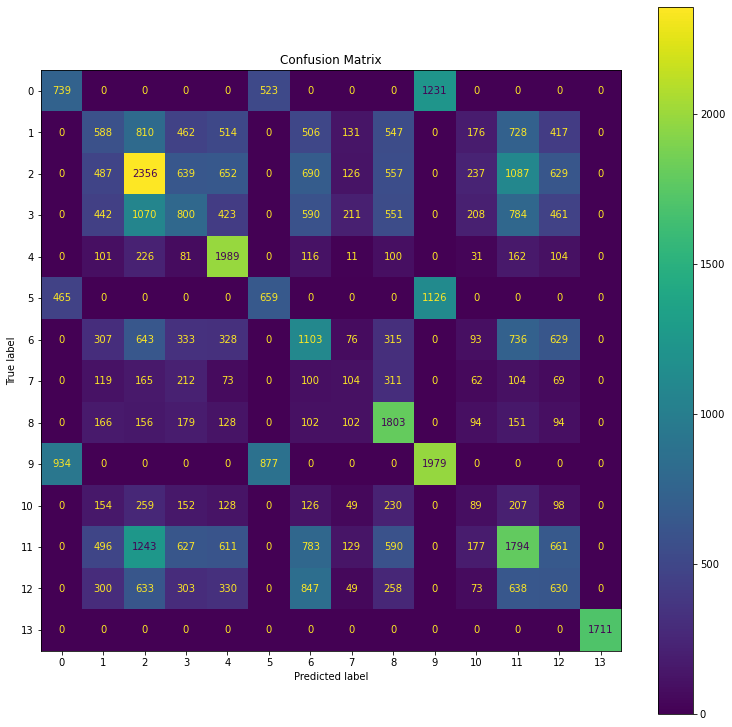

In [34]:
cm2 = confusion_matrix(y_test, CBC_test_pred2);
cmp2 = ConfusionMatrixDisplay(cm2);
fig, ax = plt.subplots(figsize=(13,13));
cmp2.plot(ax=ax);
cmp2.ax_.set_title("Confusion Matrix");

### Classification Report ###

Let's take a look at our classification report test results for each crime:

**0) Aggravated Assault**

For our "Aggravated Assault" results, we have a precision score of .35, a recall score of .30, and an f1 score of .32. This means that:


* Out of all the crimes that the model predicted would be Aggravated Assault crimes, 35% were actually Aggravated Assault crimes.
* Out of all the crimes that were Aggravated Assault crimes, the model correctly predicted 30% of them.
* There is an f1 score of .32, indicating poor performance on predicting probability of the crime being an Aggravated Assault crime.

**1) All Other Larceny**

For our "All Other Larceny" results, we have a precision score of .19, a recall score of .12, and an f1 score of .15. This means that:

* Out of all the crimes that the model predicted would be Larceny crimes, 19% were actually Larceny crimes.
* Out of all the crimes that were Larceny crimes, the model correctly predicted 12% of them.
* There is an f1 score of .15, indicating poor performance on predicting probability of the crime being a Larceny crime.

**2) Burglary/Breaking & Entering**

For our "Burglary/Breaking & Entering" results, we have a precision score of .31, a recall score of .32, and an f1 score of .31. This means that:

* Out of all the crimes that the model predicted would be Burglary/Breaking & Entering crimes, 31% were actually Burglary/Breaking & Entering crimes.
* Out of all the crimes that were Burglary/Breaking & Entering crimes, the model correctly predicted 32% of them.
* There is an f1 score of .31, indicating poor performance on predicting probability of the crime being a Burglary/Breaking & Entering crime.

**3) Destruction/Damage/Vandalism of Property**

For our "Destruction/Damage/Vandalism of Property" results, we have a precision score of .21, a recall score of .14, and an f1 score of .17. This means that:

* Out of all the crimes that the model predicted would be Destruction/Damage/Vandalism of Property crimes, 21% were actually Destruction/Damage/Vandalism of Property crimes.
* Out of all the crimes that were Destruction/Damage/Vandalism of Property crimes, the model correctly predicted 14% of them.
* There is an f1 score of .17, indicating poor performance on predicting probability of the crime being a Destruction/Damage/Vandalism of Property crime.

**4) Identity Theft**

For our "Identity Theft" results, we have a precision score of .38, a recall score of .68, and an f1 score of .49. This means that:

* Out of all the crimes that the model predicted would be Identity Theft crimes, 38% were actually Identity Theft crimes.
* Out of all the crimes that were Identity Theft crimes, the model correctly predicted 68% of them.
* There is an f1 score of .49, indicating poor performance on predicting probability of the crime being an Identity Theft crime.

**5) Intimidation**

For our "Intimidation" results, we have a precision score of .32, a recall score of .29, and an f1 score of .31. This means that:

* Out of all the crimes that the model predicted would be Intimidation crimes, 32% were actually Intimidation crimes.
* Out of all the crimes that were Intimidation crimes, the model correctly predicted 29% of them.
* There is an f1 score of .31, indicating poor performance on predicting probability of the crime being an Intimidation crime.

**6) Motor Vehicle Theft**

For our "Motor Vehicle Theft" results, we have a precision score of .22, a recall score of .24, and an f1 score of .23. This means that:

* Out of all the crimes that the model predicted would be Motor Vehicle Theft crimes, 22% were actually Motor Vehicle Theft crimes.
* Out of all the crimes that were Motor Vehicle Theft crimes, the model correctly predicted 24% of them.
* There is an f1 score of .23, indicating poor performance on predicting probability of the crime being a Motor Vehicle Theft crime.

**7) Robbery**

For our "Robbery" results, we have a precision score of .11, a recall score of .08, and an f1 score of .09. This means that:

* Out of all the crimes that the model predicted would be Robbery crimes, 11% were actually Robbery crimes.
* Out of all the crimes that were Robbery crimes, the model correctly predicted 8% of them.
* There is an f1 score of .09, indicating poor performance on predicting probability of the crime being a Robbery crime.

**8) Shoplifting**

For our "Shoplifting" results, we have a precision score of .34, a recall score of .61, and an f1 score of .44. This means that:

* Out of all the crimes that the model predicted would be Shoplifting crimes, 34% were actually Shoplifting crimes.
* Out of all the crimes that were Shoplifting crimes, the model correctly predicted 61% of them.
* There is an f1 score of .44, indicating poor performance on predicting probability of the crime being a Shoplifting crime.

**9) Simple Assault**

For our "Simple Assault" results, we have a precision score of .46, a recall score of .52, and an f1 score of .49. This means that:

* Out of all the crimes that the model predicted would be Simple Assault crimes, 46% were actually Simple Assault crimes.
* Out of all the crimes that were Simple Assault crimes, the model correctly predicted 52% of them.
* There is an f1 score of .49, indicating poor performance on predicting probability of the crime being a Simple Assault crime.

**10) Theft From Building**

For our "Theft From Building" results, we have a precision score of .07, a recall score of .06, and an f1 score of .07. This means that:

* Out of all the crimes that the model predicted would be Theft From Building crimes, 7% were actually Theft From Building crimes.
* Out of all the crimes that were Theft From Building crimes, the model correctly predicted 6% of them.
* There is an f1 score of .07, indicating extremely poor performance on predicting probability of the crime being a Theft From Building crime.

**11) Theft From Motor Vehicle**

For our "Theft From Motor Vehicle" results, we have a precision score of .28, a recall score of .25, and an f1 score of .27. This means that:

* Out of all the crimes that the model predicted would be Theft From Motor Vehicle crimes, 28% were actually Theft From Motor Vehicle crimes.
* Out of all the crimes that were Theft From Motor Vehicle crimes, the model correctly predicted 25% of them.
* There is an f1 score of .27, indicating poor performance on predicting probability of the crime being a Theft From Motor Vehicle crime.

**12) Theft of Motor Vehicle Parts or Accessories**

For our "Theft of Motor Vehicle Parts or Accessories" results, we have a precision score of .17, a recall score of .16, and an f1 score of .16. This means that:

* Out of all the crimes that the model predicted would be Theft of Motor Vehicle Parts or Accessories crimes, 17% were actually Theft of Motor Vehicle Parts or Accessories crimes.
* Out of all the crimes that were Theft of Motor Vehicle Parts or Accessories crimes, the model correctly predicted 16% of them.
* There is an f1 score of .16, indicating poor performance on predicting probability of the crime being a Theft of Motor Vehicle Parts or Accessories crime.

**13) Trespass of Real Property**

For our "Trespass of Real Property" results, we have a precision score of 1.0, a recall score of 1.0, and an f1 score of 1.0. This means that:

* Out of all the crimes that the model predicted would be Trespass of Real Property crimes, 100% were actually Trespass of Real Property crimes.
* Out of all the crimes that were Trespass of Real Property crimes, the model correctly predicted 100% of them.
* There is an f1 score of 1, indicating perfect performance on predicting probability of the crime being a Trespass of Real Property crime.

### Crime Confusion Matrix ###

**0) Aggravated Assault**

* 739 crimes were correctly predicted as being "Aggravated Assault" crimes
* 1,754 crimes were wrongly predicted as not being "Aggravated Assault" crimes
* 1,399 crimes were wrongly predicted as being "Aggravated Assault" crimes
* 48,673 crimes were correctly predicted as not being "Aggravated Assault" crimes

**1) All Other Larceny**

* 588 crimes were correctly predicted as being "All Other Larceny" crimes
* 4,291 crimes were wrongly predicted as not being "All Other Larceny" crimes
* 2,572 crimes were wrongly predicted as being "All Other Larceny" crimes
* 45,114 crimes were correctly predicted as not being "All Other Larceny" crimes

**2) Burglary/Breaking & Entering**

* 2,356 crimes were correctly predicted as being "Burglary/Breaking & Entering" crimes
* 5,104 crimes were wrongly predicted as not being "Burglary/Breaking & Entering" crimes
* 5,205 crimes were wrongly predicted as being "Burglary/Breaking & Entering" crimes
* 42,440 crimes were correctly predicted as not being "Burglary/Breaking & Entering" crimes

**3) Destruction/Damage/Vandalism of Property**

* 800 crimes were correctly predicted as being "Destruction/Damage/Vandalism of Property" crimes
* 4,740 crimes were wrongly predicted as not being "Destruction/Damage/Vandalism of Property" crimes
* 2,988 crimes were wrongly predicted as being "Destruction/Damage/Vandalism of Property" crimes
* 46,650 crimes were correctly predicted as not being "Destruction/Damage/Vandalism of Property" crimes

**4) Identity Theft**

* 1,989 crimes were correctly predicted as being "Identity Theft" crimes
* 932 crimes were wrongly predicted as not being "Identity Theft" crimes
* 3,187 crimes were wrongly predicted as being "Identity Theft" crimes
* 48,454 crimes were correctly predicted as not being "Identity Theft" crimes

**5) Intimidation**

* 659 crimes were correctly predicted as being "Intimidation" crimes
* 1,591 crimes were wrongly predicted as not being "Intimidation" crimes
* 1,400 crimes were wrongly predicted as being "Intimidation" crimes
* 49,903 crimes were correctly predicted as not being "Intimidation" crimes

**6) Motor Vehicle Theft**

* 1,103 crimes were correctly predicted as being "Motor Vehicle Theft" crimes
* 3,460 crimes were wrongly predicted as not being "Motor Vehicle Theft" crimes
* 3,860 crimes were wrongly predicted as being "Motor Vehicle Theft" crimes
* 47,655 crimes were correctly predicted as not being "Motor Vehicle Theft" crimes

**7) Robbery**

* 104 crimes were correctly predicted as being "Robbery" crimes
* 1,215 crimes were wrongly predicted as not being "Robbery" crimes
* 884 crimes were wrongly predicted as being "Robbery" crimes
* 51,586 crimes were correctly predicted as not being "Robbery" crimes

**8) Shoplifting*** 

* 1,803 crimes were correctly predicted as being "Shoplifting" crimes
* 1,172 crimes were wrongly predicted as not being "Shoplifting" crimes
* 3,516 crimes were wrongly predicted as being "Shoplifting" crimes
* 47,366 crimes were correctly predicted as not being "Shoplifting" crimes

**9) Simple Assault**

* 1,979 crimes were correctly predicted as being "Simple Assault" crimes
* 1,811 crimes were wrongly predicted as not being "Simple Assault" crimes
* 2,357 crimes were wrongly predicted as being "Simple Assault" crimes
* 50,583 crimes were correctly predicted as not being "Simple Assault" crimes

**10) Theft From Building**

* 89 crimes were correctly predicted as being "Theft From Building" crimes
* 1,403 crimes were wrongly predicted as not being "Theft From Building" crimes
* 1,151 crimes were wrongly predicted as being "Theft From Building" crimes
* 51,918 crimes were correctly predicted as not being "Theft From Building" crimes

**11) Theft From Motor Vehicle**

* 1,794 crimes were correctly predicted as being "Theft From Motor Vehicle" crimes
* 5,317 crimes were wrongly predicted as not being "Theft From Motor Vehicle" crimes
* 4,597 crimes were wrongly predicted as being "Theft From Motor Vehicle" crimes
* 49,469 crimes were correctly predicted as not being "Theft From Motor Vehicle" crimes

**12) Theft of Motor Vehicle Parts or Accessories**

* 630 crimes were correctly predicted as being "Theft of Motor Vehicle Parts or Accessories" crimes
* 3,431 crimes were wrongly predicted as not being "Theft of Motor Vehicle Parts or Accessories" crimes
* 3,162 crimes were wrongly predicted as being "Theft of Motor Vehicle Parts or Accessories" crimes
* 51,932 crimes were correctly predicted as not being "Theft of Motor Vehicle Parts or Accessories" crimes

**13) Trespass of Real Property**

* 1,711 crimes were correctly predicted as being "Trespass of Real Property" crimes
* 0 crimes were wrongly predicted as not being "Trespass of Real Property" crimes
* 0 crimes were wrongly predicted as being "Trespass of Real Property" crimes
* 50,851 crimes were correctly predicted as not being "Trespass of Real Property" crimes

In [35]:
print ("My program took", time.time() - start_time, "to run")

My program took 2437.4248774051666 to run
